Implementation Process

Data Preparation — Define corpus, clean, normalise and tokenise words

Hyperparameters — Learning rate, epochs, window size, embedding size

Generate Training Data — Build vocabulary, one-hot encoding for words, build dictionaries that map id to word and vice versa

Model Training — Pass encoded words through forward pass, calculate error rate, adjust weights using backpropagation and compute loss

Inference — Get word vector and find similar words
Further improvements — Speeding up training time with Skip-gram Negative Sampling (SGNS) and Hierarchical Softmax

In [104]:
text = "natural language processing and machine learning is fun and exciting"
import numpy as np
import collections
import matplotlib.pyplot as pl

In [107]:
corpus=[]
for i in range(len(text)):
    corpus.append([word.lower() for word in text[i].split()])

In [109]:
corpus=[[word.lower() for word in text.split()]]

In [110]:
corpus

[['natural',
  'language',
  'processing',
  'and',
  'machine',
  'learning',
  'is',
  'fun',
  'and',
  'exciting']]

In [82]:
corpus

[['natural',
  'language',
  'processing',
  'and',
  'machine',
  'learning',
  'is',
  'fun',
  'and',
  'exciting']]

In [116]:
settings = {
'window_size': 2, # context window +- center word
'n': 10,# dimensions of word embeddings, also refer to size of hidden layer
'epochs': 100000,# number of training epochs
'learning_rate': 0.01# learning rate
}

In [117]:
class word2vec():
    def __init__(self):
        self.n=settings['n']
        self.lr=settings['learning_rate']
        self.epochs=settings['epochs']
        self.window=settings['window_size']

    
    def generate_training_data(self,settings,corpus):
        word_counts=collections.defaultdict(int)
        for row in corpus:
            for word in row:
                word_counts[word]+=1
        
        self.v_count=len(word_counts.keys()) #Unique words of vocabulary
        self.words_list=list(word_counts.keys())
        self.word_index=dict((word,i) for i,word in enumerate(self.words_list))
        self.index_word=dict((i,word) for i,word in enumerate(self.words_list))

        training_data=[]
        
        for sentence in corpus:
            sent_len=len(sentence)
            for i,word in enumerate(sentence):
                w_target=self.wordonehot(sentence[i])
                w_context=[]
                for j in range(i-self.window,i+self.window+1):
                    if j!=i and j>=0 and j<=sent_len-1:
                        w_context.append(self.wordonehot(sentence[j]))
                training_data.append([w_target,w_context])
        
        return np.array(training_data)
           
    def wordonehot(self,word):
        word_vec=[0 for i in range(self.v_count)]
        word_index=self.word_index[word]
        word_vec[word_index]=1
        return word_vec  

    
    def train(self,training_data):
        self.w1=np.random.uniform(-0.5,0.5,(self.v_count,self.n))
        self.w2=np.random.uniform(-0.5,0.5,(self.n,self.v_count))
        losses=[]
        for i in range(self.epochs):
            self.loss=0
            for w_t,w_c in training_data:
                y_pred,h,u=self.forward_pass(w_t)
                EI=np.sum([np.subtract(y_pred,word) for word in w_c],axis=0)
                self.backprop(EI,h,w_t)
                self.loss+=-np.sum([u[word.index(1)] for word in w_c]+len(w_c)*np.log(np.sum(np.exp(u))))
            losses.append(self.loss)
            print('Epoch:', i, "Loss:", self.loss)
        return losses
        
    def forward_pass(self,x):
        h=np.dot(self.w1.T,x)
        u=np.dot(self.w2.T,h)
        y_c=self.softmax(u)
        return y_c,h,u
        
    def softmax(self,x):
        e_x=np.exp(x-np.max(x))
        return e_x/e_x.sum(axis=0)

    
    def backprop(self,e,h,x):
        d1_dw2=np.outer(h,e)
        d1_dw1=np.outer(x,np.dot(self.w2,e.T))
        self.w1=self.w1-(self.lr*d1_dw1)
        self.w2=self.w2-(self.lr*d1_dw2)
        
        
    def word_vec(self,word):
        w_index=self.word_index[word]
        v_w=self.w1[w_index]
        return v_w
    
    def vec_sim(self,word,top_n):
        v_w1=self.word_vec(word)
        word_sim={}
        for i in range(self.v_count):
            v_w2=self.w1[i]
            theta_sum=np.dot(v_w1,v_w2)
            theta_den=(np.linalg.norm(v_w1)*np.linalg.norm(v_w2))
            theta=theta_sum/theta_den
            word=self.index_word[i]
            word_sim[word]=theta
        words_sorted=sorted(word_sim.items(),key=lambda kv: kv[1],reverse=True)
        for word,sim in words_sorted[:top_n]:
            print(word,sim)
    def plot(self,loss):
        pl.plot(loss)
        pl.show()
    
a=word2vec()
tr_d=a.generate_training_data(settings,corpus)
loss=a.train(tr_d)

Epoch: 0 Loss: -275.80367384972294
Epoch: 1 Loss: -276.0162111355687
Epoch: 2 Loss: -276.24465580959503
Epoch: 3 Loss: -276.4883595172345
Epoch: 4 Loss: -276.7468083439672
Epoch: 5 Loss: -277.0196038950884
Epoch: 6 Loss: -277.3064472314305
Epoch: 7 Loss: -277.6071251598795
Epoch: 8 Loss: -277.92149847109783
Epoch: 9 Loss: -278.2494917915384
Epoch: 10 Loss: -278.59108477674465
Epoch: 11 Loss: -278.9463044212789
Epoch: 12 Loss: -279.3152182998495
Epoch: 13 Loss: -279.69792858620707
Epoch: 14 Loss: -280.09456672264105
Epoch: 15 Loss: -280.5052886345666
Epoch: 16 Loss: -280.93027040267333
Epoch: 17 Loss: -281.3697043200997
Epoch: 18 Loss: -281.82379527469226
Epoch: 19 Loss: -282.2927574070243
Epoch: 20 Loss: -282.776811003858
Epoch: 21 Loss: -283.27617959440744
Epoch: 22 Loss: -283.79108722332023
Epoch: 23 Loss: -284.32175587991804
Epoch: 24 Loss: -284.8684030680658
Epoch: 25 Loss: -285.4312395051734
Epoch: 26 Loss: -286.01046694237044
Epoch: 27 Loss: -286.6062761008948
Epoch: 28 Loss: -28

Epoch: 287 Loss: -508.3545772447437
Epoch: 288 Loss: -508.8310084378808
Epoch: 289 Loss: -509.3054857001886
Epoch: 290 Loss: -509.7780226735364
Epoch: 291 Loss: -510.2486328797459
Epoch: 292 Loss: -510.717329721586
Epoch: 293 Loss: -511.1841264837655
Epoch: 294 Loss: -511.6490363339288
Epoch: 295 Loss: -512.1120723236485
Epoch: 296 Loss: -512.5732473894187
Epoch: 297 Loss: -513.0325743536474
Epoch: 298 Loss: -513.4900659256457
Epoch: 299 Loss: -513.9457347026166
Epoch: 300 Loss: -514.399593170641
Epoch: 301 Loss: -514.8516537056615
Epoch: 302 Loss: -515.3019285744622
Epoch: 303 Loss: -515.7504299356467
Epoch: 304 Loss: -516.197169840613
Epoch: 305 Loss: -516.642160234522
Epoch: 306 Loss: -517.0854129572656
Epoch: 307 Loss: -517.5269397444287
Epoch: 308 Loss: -517.9667522282465
Epoch: 309 Loss: -518.4048619385585
Epoch: 310 Loss: -518.8412803037569
Epoch: 311 Loss: -519.2760186517303
Epoch: 312 Loss: -519.7090882108022
Epoch: 313 Loss: -520.1405001106643
Epoch: 314 Loss: -520.5702653833

Epoch: 599 Loss: -601.908532422224
Epoch: 600 Loss: -602.1043301018864
Epoch: 601 Loss: -602.2997319424877
Epoch: 602 Loss: -602.4947394078611
Epoch: 603 Loss: -602.6893539540016
Epoch: 604 Loss: -602.8835770291196
Epoch: 605 Loss: -603.077410073695
Epoch: 606 Loss: -603.270854520531
Epoch: 607 Loss: -603.4639117948072
Epoch: 608 Loss: -603.6565833141326
Epoch: 609 Loss: -603.8488704885972
Epoch: 610 Loss: -604.0407747208245
Epoch: 611 Loss: -604.2322974060224
Epoch: 612 Loss: -604.4234399320346
Epoch: 613 Loss: -604.614203679391
Epoch: 614 Loss: -604.8045900213577
Epoch: 615 Loss: -604.9946003239862
Epoch: 616 Loss: -605.1842359461639
Epoch: 617 Loss: -605.373498239662
Epoch: 618 Loss: -605.5623885491839
Epoch: 619 Loss: -605.7509082124144
Epoch: 620 Loss: -605.9390585600656
Epoch: 621 Loss: -606.126840915926
Epoch: 622 Loss: -606.3142565969059
Epoch: 623 Loss: -606.5013069130844
Epoch: 624 Loss: -606.6879931677562
Epoch: 625 Loss: -606.8743166574762
Epoch: 626 Loss: -607.060278672105

Epoch: 911 Loss: -649.0032251112359
Epoch: 912 Loss: -649.1210681477562
Epoch: 913 Loss: -649.2387549657284
Epoch: 914 Loss: -649.356285943973
Epoch: 915 Loss: -649.4736614599777
Epoch: 916 Loss: -649.5908818899001
Epoch: 917 Loss: -649.7079476085755
Epoch: 918 Loss: -649.8248589895226
Epoch: 919 Loss: -649.9416164049496
Epoch: 920 Loss: -650.0582202257607
Epoch: 921 Loss: -650.174670821561
Epoch: 922 Loss: -650.2909685606637
Epoch: 923 Loss: -650.4071138100952
Epoch: 924 Loss: -650.5231069356015
Epoch: 925 Loss: -650.6389483016543
Epoch: 926 Loss: -650.7546382714556
Epoch: 927 Loss: -650.870177206945
Epoch: 928 Loss: -650.9855654688046
Epoch: 929 Loss: -651.1008034164653
Epoch: 930 Loss: -651.2158914081118
Epoch: 931 Loss: -651.3308298006888
Epoch: 932 Loss: -651.4456189499068
Epoch: 933 Loss: -651.5602592102472
Epoch: 934 Loss: -651.6747509349683
Epoch: 935 Loss: -651.7890944761106
Epoch: 936 Loss: -651.9032901845023
Epoch: 937 Loss: -652.0173384097651
Epoch: 938 Loss: -652.131239500

Epoch: 1222 Loss: -679.6049176531197
Epoch: 1223 Loss: -679.6875580800519
Epoch: 1224 Loss: -679.7701169514067
Epoch: 1225 Loss: -679.8525944148696
Epoch: 1226 Loss: -679.9349906177404
Epoch: 1227 Loss: -680.0173057069347
Epoch: 1228 Loss: -680.0995398289855
Epoch: 1229 Loss: -680.1816931300436
Epoch: 1230 Loss: -680.26376575588
Epoch: 1231 Loss: -680.3457578518862
Epoch: 1232 Loss: -680.4276695630763
Epoch: 1233 Loss: -680.5095010340877
Epoch: 1234 Loss: -680.5912524091834
Epoch: 1235 Loss: -680.6729238322519
Epoch: 1236 Loss: -680.7545154468087
Epoch: 1237 Loss: -680.8360273959992
Epoch: 1238 Loss: -680.9174598225976
Epoch: 1239 Loss: -680.9988128690103
Epoch: 1240 Loss: -681.0800866772757
Epoch: 1241 Loss: -681.1612813890658
Epoch: 1242 Loss: -681.2423971456881
Epoch: 1243 Loss: -681.3234340880856
Epoch: 1244 Loss: -681.4043923568396
Epoch: 1245 Loss: -681.4852720921693
Epoch: 1246 Loss: -681.5660734339344
Epoch: 1247 Loss: -681.6467965216356
Epoch: 1248 Loss: -681.7274414944155
Epo

Epoch: 1534 Loss: -702.049054139164
Epoch: 1535 Loss: -702.1118881526195
Epoch: 1536 Loss: -702.1746729690217
Epoch: 1537 Loss: -702.2374086598968
Epoch: 1538 Loss: -702.3000952966237
Epoch: 1539 Loss: -702.3627329504325
Epoch: 1540 Loss: -702.425321692407
Epoch: 1541 Loss: -702.4878615934828
Epoch: 1542 Loss: -702.55035272445
Epoch: 1543 Loss: -702.6127951559522
Epoch: 1544 Loss: -702.6751889584868
Epoch: 1545 Loss: -702.7375342024067
Epoch: 1546 Loss: -702.7998309579187
Epoch: 1547 Loss: -702.8620792950865
Epoch: 1548 Loss: -702.9242792838279
Epoch: 1549 Loss: -702.9864309939186
Epoch: 1550 Loss: -703.0485344949897
Epoch: 1551 Loss: -703.1105898565293
Epoch: 1552 Loss: -703.1725971478838
Epoch: 1553 Loss: -703.2345564382566
Epoch: 1554 Loss: -703.2964677967095
Epoch: 1555 Loss: -703.3583312921627
Epoch: 1556 Loss: -703.4201469933951
Epoch: 1557 Loss: -703.4819149690452
Epoch: 1558 Loss: -703.5436352876116
Epoch: 1559 Loss: -703.6053080174518
Epoch: 1560 Loss: -703.6669332267849
Epoch

Epoch: 1843 Loss: -719.4246283382661
Epoch: 1844 Loss: -719.4750673596262
Epoch: 1845 Loss: -719.5254737945821
Epoch: 1846 Loss: -719.5758476830389
Epoch: 1847 Loss: -719.6261890648332
Epoch: 1848 Loss: -719.676497979733
Epoch: 1849 Loss: -719.726774467438
Epoch: 1850 Loss: -719.7770185675795
Epoch: 1851 Loss: -719.8272303197202
Epoch: 1852 Loss: -719.8774097633559
Epoch: 1853 Loss: -719.9275569379136
Epoch: 1854 Loss: -719.9776718827527
Epoch: 1855 Loss: -720.0277546371655
Epoch: 1856 Loss: -720.0778052403765
Epoch: 1857 Loss: -720.1278237315433
Epoch: 1858 Loss: -720.1778101497562
Epoch: 1859 Loss: -720.2277645340387
Epoch: 1860 Loss: -720.2776869233475
Epoch: 1861 Loss: -720.3275773565725
Epoch: 1862 Loss: -720.3774358725373
Epoch: 1863 Loss: -720.427262509999
Epoch: 1864 Loss: -720.4770573076488
Epoch: 1865 Loss: -720.5268203041118
Epoch: 1866 Loss: -720.5765515379468
Epoch: 1867 Loss: -720.6262510476472
Epoch: 1868 Loss: -720.6759188716409
Epoch: 1869 Loss: -720.7255550482904
Epoc

Epoch: 2156 Loss: -733.7992248854607
Epoch: 2157 Loss: -733.8411167123311
Epoch: 2158 Loss: -733.8829857303306
Epoch: 2159 Loss: -733.92483196368
Epoch: 2160 Loss: -733.9666554365642
Epoch: 2161 Loss: -734.0084561731326
Epoch: 2162 Loss: -734.0502341974988
Epoch: 2163 Loss: -734.0919895337404
Epoch: 2164 Loss: -734.1337222059005
Epoch: 2165 Loss: -734.1754322379862
Epoch: 2166 Loss: -734.2171196539688
Epoch: 2167 Loss: -734.2587844777847
Epoch: 2168 Loss: -734.3004267333356
Epoch: 2169 Loss: -734.342046444487
Epoch: 2170 Loss: -734.3836436350697
Epoch: 2171 Loss: -734.4252183288795
Epoch: 2172 Loss: -734.4667705496776
Epoch: 2173 Loss: -734.5083003211897
Epoch: 2174 Loss: -734.5498076671068
Epoch: 2175 Loss: -734.5912926110857
Epoch: 2176 Loss: -734.6327551767474
Epoch: 2177 Loss: -734.6741953876792
Epoch: 2178 Loss: -734.7156132674337
Epoch: 2179 Loss: -734.7570088395283
Epoch: 2180 Loss: -734.798382127447
Epoch: 2181 Loss: -734.8397331546386
Epoch: 2182 Loss: -734.8810619445176
Epoch

Epoch: 2470 Loss: -745.9434823600707
Epoch: 2471 Loss: -745.9792433606463
Epoch: 2472 Loss: -746.0149876954064
Epoch: 2473 Loss: -746.0507153800319
Epoch: 2474 Loss: -746.0864264301829
Epoch: 2475 Loss: -746.122120861499
Epoch: 2476 Loss: -746.1577986895996
Epoch: 2477 Loss: -746.1934599300841
Epoch: 2478 Loss: -746.2291045985315
Epoch: 2479 Loss: -746.2647327105005
Epoch: 2480 Loss: -746.3003442815301
Epoch: 2481 Loss: -746.3359393271384
Epoch: 2482 Loss: -746.3715178628241
Epoch: 2483 Loss: -746.4070799040657
Epoch: 2484 Loss: -746.4426254663213
Epoch: 2485 Loss: -746.4781545650295
Epoch: 2486 Loss: -746.5136672156088
Epoch: 2487 Loss: -746.5491634334577
Epoch: 2488 Loss: -746.5846432339549
Epoch: 2489 Loss: -746.6201066324592
Epoch: 2490 Loss: -746.6555536443095
Epoch: 2491 Loss: -746.6909842848249
Epoch: 2492 Loss: -746.7263985693053
Epoch: 2493 Loss: -746.7617965130299
Epoch: 2494 Loss: -746.7971781312594
Epoch: 2495 Loss: -746.8325434392336
Epoch: 2496 Loss: -746.8678924521735
Ep

Epoch: 2781 Loss: -756.3325753864339
Epoch: 2782 Loss: -756.363819695913
Epoch: 2783 Loss: -756.3950513808766
Epoch: 2784 Loss: -756.4262704520245
Epoch: 2785 Loss: -756.4574769200437
Epoch: 2786 Loss: -756.4886707956096
Epoch: 2787 Loss: -756.5198520893845
Epoch: 2788 Loss: -756.5510208120181
Epoch: 2789 Loss: -756.5821769741485
Epoch: 2790 Loss: -756.6133205864008
Epoch: 2791 Loss: -756.6444516593882
Epoch: 2792 Loss: -756.675570203711
Epoch: 2793 Loss: -756.7066762299582
Epoch: 2794 Loss: -756.7377697487054
Epoch: 2795 Loss: -756.7688507705166
Epoch: 2796 Loss: -756.7999193059431
Epoch: 2797 Loss: -756.8309753655246
Epoch: 2798 Loss: -756.8620189597884
Epoch: 2799 Loss: -756.8930500992491
Epoch: 2800 Loss: -756.9240687944093
Epoch: 2801 Loss: -756.95507505576
Epoch: 2802 Loss: -756.9860688937797
Epoch: 2803 Loss: -757.0170503189343
Epoch: 2804 Loss: -757.0480193416784
Epoch: 2805 Loss: -757.078975972454
Epoch: 2806 Loss: -757.1099202216915
Epoch: 2807 Loss: -757.1408520998086
Epoch:

Epoch: 3092 Loss: -765.4897547413464
Epoch: 3093 Loss: -765.5175331637998
Epoch: 3094 Loss: -765.5453017698105
Epoch: 3095 Loss: -765.5730605669552
Epoch: 3096 Loss: -765.6008095628033
Epoch: 3097 Loss: -765.6285487649156
Epoch: 3098 Loss: -765.6562781808457
Epoch: 3099 Loss: -765.6839978181381
Epoch: 3100 Loss: -765.7117076843302
Epoch: 3101 Loss: -765.7394077869518
Epoch: 3102 Loss: -765.7670981335233
Epoch: 3103 Loss: -765.7947787315584
Epoch: 3104 Loss: -765.8224495885624
Epoch: 3105 Loss: -765.8501107120328
Epoch: 3106 Loss: -765.877762109459
Epoch: 3107 Loss: -765.9054037883229
Epoch: 3108 Loss: -765.9330357560979
Epoch: 3109 Loss: -765.96065802025
Epoch: 3110 Loss: -765.9882705882371
Epoch: 3111 Loss: -766.0158734675099
Epoch: 3112 Loss: -766.0434666655101
Epoch: 3113 Loss: -766.0710501896724
Epoch: 3114 Loss: -766.0986240474235
Epoch: 3115 Loss: -766.1261882461816
Epoch: 3116 Loss: -766.1537427933584
Epoch: 3117 Loss: -766.1812876963573
Epoch: 3118 Loss: -766.2088229625729
Epoc

Epoch: 3403 Loss: -773.690431975907
Epoch: 3404 Loss: -773.715486672577
Epoch: 3405 Loss: -773.7405335702396
Epoch: 3406 Loss: -773.7655726744215
Epoch: 3407 Loss: -773.7906039906437
Epoch: 3408 Loss: -773.8156275244219
Epoch: 3409 Loss: -773.8406432812661
Epoch: 3410 Loss: -773.8656512666815
Epoch: 3411 Loss: -773.8906514861679
Epoch: 3412 Loss: -773.9156439452195
Epoch: 3413 Loss: -773.940628649325
Epoch: 3414 Loss: -773.965605603968
Epoch: 3415 Loss: -773.9905748146274
Epoch: 3416 Loss: -774.0155362867753
Epoch: 3417 Loss: -774.0404900258799
Epoch: 3418 Loss: -774.0654360374033
Epoch: 3419 Loss: -774.0903743268027
Epoch: 3420 Loss: -774.1153048995299
Epoch: 3421 Loss: -774.1402277610314
Epoch: 3422 Loss: -774.1651429167478
Epoch: 3423 Loss: -774.1900503721157
Epoch: 3424 Loss: -774.2149501325655
Epoch: 3425 Loss: -774.2398422035227
Epoch: 3426 Loss: -774.2647265904073
Epoch: 3427 Loss: -774.2896032986342
Epoch: 3428 Loss: -774.3144723336131
Epoch: 3429 Loss: -774.3393337007485
Epoch

Epoch: 3717 Loss: -781.2006138309707
Epoch: 3718 Loss: -781.2234661328683
Epoch: 3719 Loss: -781.2463121370165
Epoch: 3720 Loss: -781.2691518475331
Epoch: 3721 Loss: -781.2919852685327
Epoch: 3722 Loss: -781.3148124041257
Epoch: 3723 Loss: -781.337633258419
Epoch: 3724 Loss: -781.3604478355156
Epoch: 3725 Loss: -781.3832561395152
Epoch: 3726 Loss: -781.4060581745136
Epoch: 3727 Loss: -781.4288539446028
Epoch: 3728 Loss: -781.4516434538714
Epoch: 3729 Loss: -781.4744267064037
Epoch: 3730 Loss: -781.4972037062815
Epoch: 3731 Loss: -781.5199744575813
Epoch: 3732 Loss: -781.5427389643776
Epoch: 3733 Loss: -781.5654972307401
Epoch: 3734 Loss: -781.5882492607352
Epoch: 3735 Loss: -781.6109950584256
Epoch: 3736 Loss: -781.6337346278706
Epoch: 3737 Loss: -781.6564679731256
Epoch: 3738 Loss: -781.6791950982423
Epoch: 3739 Loss: -781.7019160072689
Epoch: 3740 Loss: -781.7246307042501
Epoch: 3741 Loss: -781.7473391932266
Epoch: 3742 Loss: -781.7700414782356
Epoch: 3743 Loss: -781.7927375633112
Ep

Epoch: 4028 Loss: -788.0232156834926
Epoch: 4029 Loss: -788.044290939125
Epoch: 4030 Loss: -788.0653610175768
Epoch: 4031 Loss: -788.0864259219886
Epoch: 4032 Loss: -788.1074856554977
Epoch: 4033 Loss: -788.1285402212396
Epoch: 4034 Loss: -788.1495896223466
Epoch: 4035 Loss: -788.1706338619485
Epoch: 4036 Loss: -788.1916729431725
Epoch: 4037 Loss: -788.2127068691433
Epoch: 4038 Loss: -788.2337356429827
Epoch: 4039 Loss: -788.2547592678101
Epoch: 4040 Loss: -788.2757777467419
Epoch: 4041 Loss: -788.2967910828926
Epoch: 4042 Loss: -788.3177992793736
Epoch: 4043 Loss: -788.3388023392932
Epoch: 4044 Loss: -788.3598002657586
Epoch: 4045 Loss: -788.3807930618725
Epoch: 4046 Loss: -788.4017807307363
Epoch: 4047 Loss: -788.4227632754485
Epoch: 4048 Loss: -788.4437406991049
Epoch: 4049 Loss: -788.4647130047987
Epoch: 4050 Loss: -788.4856801956204
Epoch: 4051 Loss: -788.506642274658
Epoch: 4052 Loss: -788.5275992449972
Epoch: 4053 Loss: -788.5485511097208
Epoch: 4054 Loss: -788.5694978719091
Epo

Epoch: 4334 Loss: -794.2446105554794
Epoch: 4335 Loss: -794.26423656653
Epoch: 4336 Loss: -794.2838582500139
Epoch: 4337 Loss: -794.3034756083772
Epoch: 4338 Loss: -794.3230886440648
Epoch: 4339 Loss: -794.3426973595194
Epoch: 4340 Loss: -794.3623017571814
Epoch: 4341 Loss: -794.3819018394898
Epoch: 4342 Loss: -794.4014976088814
Epoch: 4343 Loss: -794.4210890677911
Epoch: 4344 Loss: -794.4406762186517
Epoch: 4345 Loss: -794.4602590638942
Epoch: 4346 Loss: -794.4798376059484
Epoch: 4347 Loss: -794.499411847241
Epoch: 4348 Loss: -794.5189817901974
Epoch: 4349 Loss: -794.538547437241
Epoch: 4350 Loss: -794.5581087907933
Epoch: 4351 Loss: -794.577665853274
Epoch: 4352 Loss: -794.5972186271005
Epoch: 4353 Loss: -794.6167671146887
Epoch: 4354 Loss: -794.6363113184527
Epoch: 4355 Loss: -794.6558512408045
Epoch: 4356 Loss: -794.6753868841538
Epoch: 4357 Loss: -794.6949182509088
Epoch: 4358 Loss: -794.7144453434761
Epoch: 4359 Loss: -794.7339681642599
Epoch: 4360 Loss: -794.7534867156623
Epoch:

Epoch: 4635 Loss: -799.9670469460297
Epoch: 4636 Loss: -799.9854727146333
Epoch: 4637 Loss: -800.0038948126489
Epoch: 4638 Loss: -800.0223132420181
Epoch: 4639 Loss: -800.0407280046808
Epoch: 4640 Loss: -800.0591391025757
Epoch: 4641 Loss: -800.0775465376398
Epoch: 4642 Loss: -800.095950311809
Epoch: 4643 Loss: -800.1143504270173
Epoch: 4644 Loss: -800.1327468851975
Epoch: 4645 Loss: -800.1511396882813
Epoch: 4646 Loss: -800.1695288381982
Epoch: 4647 Loss: -800.1879143368769
Epoch: 4648 Loss: -800.2062961862448
Epoch: 4649 Loss: -800.2246743882264
Epoch: 4650 Loss: -800.243048944747
Epoch: 4651 Loss: -800.261419857729
Epoch: 4652 Loss: -800.2797871290937
Epoch: 4653 Loss: -800.2981507607608
Epoch: 4654 Loss: -800.3165107546489
Epoch: 4655 Loss: -800.3348671126754
Epoch: 4656 Loss: -800.3532198367553
Epoch: 4657 Loss: -800.3715689288032
Epoch: 4658 Loss: -800.3899143907317
Epoch: 4659 Loss: -800.4082562244522
Epoch: 4660 Loss: -800.4265944318746
Epoch: 4661 Loss: -800.4449290149073
Epoc

Epoch: 4945 Loss: -805.5122620602496
Epoch: 4946 Loss: -805.5296362898891
Epoch: 4947 Loss: -805.5470073875559
Epoch: 4948 Loss: -805.564375354801
Epoch: 4949 Loss: -805.5817401931732
Epoch: 4950 Loss: -805.599101904221
Epoch: 4951 Loss: -805.6164604894919
Epoch: 4952 Loss: -805.633815950532
Epoch: 4953 Loss: -805.6511682888864
Epoch: 4954 Loss: -805.6685175060986
Epoch: 4955 Loss: -805.6858636037123
Epoch: 4956 Loss: -805.7032065832688
Epoch: 4957 Loss: -805.7205464463088
Epoch: 4958 Loss: -805.7378831943721
Epoch: 4959 Loss: -805.7552168289973
Epoch: 4960 Loss: -805.7725473517218
Epoch: 4961 Loss: -805.789874764082
Epoch: 4962 Loss: -805.8071990676132
Epoch: 4963 Loss: -805.8245202638498
Epoch: 4964 Loss: -805.8418383543245
Epoch: 4965 Loss: -805.85915334057
Epoch: 4966 Loss: -805.8764652241169
Epoch: 4967 Loss: -805.8937740064954
Epoch: 4968 Loss: -805.9110796892338
Epoch: 4969 Loss: -805.9283822738606
Epoch: 4970 Loss: -805.945681761902
Epoch: 4971 Loss: -805.9629781548839
Epoch: 4

Epoch: 5226 Loss: -810.2766166492065
Epoch: 5227 Loss: -810.2931680255775
Epoch: 5228 Loss: -810.3097166659663
Epoch: 5229 Loss: -810.3262625716516
Epoch: 5230 Loss: -810.3428057439098
Epoch: 5231 Loss: -810.3593461840176
Epoch: 5232 Loss: -810.3758838932498
Epoch: 5233 Loss: -810.3924188728813
Epoch: 5234 Loss: -810.4089511241855
Epoch: 5235 Loss: -810.4254806484356
Epoch: 5236 Loss: -810.4420074469032
Epoch: 5237 Loss: -810.4585315208595
Epoch: 5238 Loss: -810.4750528715748
Epoch: 5239 Loss: -810.4915715003184
Epoch: 5240 Loss: -810.5080874083591
Epoch: 5241 Loss: -810.524600596964
Epoch: 5242 Loss: -810.5411110674005
Epoch: 5243 Loss: -810.5576188209343
Epoch: 5244 Loss: -810.5741238588306
Epoch: 5245 Loss: -810.5906261823538
Epoch: 5246 Loss: -810.6071257927674
Epoch: 5247 Loss: -810.623622691334
Epoch: 5248 Loss: -810.6401168793149
Epoch: 5249 Loss: -810.6566083579717
Epoch: 5250 Loss: -810.673097128564
Epoch: 5251 Loss: -810.689583192351
Epoch: 5252 Loss: -810.7060665505916
Epoch

Epoch: 5537 Loss: -815.2982399444725
Epoch: 5538 Loss: -815.3139980339247
Epoch: 5539 Loss: -815.3297537468045
Epoch: 5540 Loss: -815.3455070841547
Epoch: 5541 Loss: -815.3612580470169
Epoch: 5542 Loss: -815.377006636433
Epoch: 5543 Loss: -815.392752853443
Epoch: 5544 Loss: -815.4084966990871
Epoch: 5545 Loss: -815.4242381744046
Epoch: 5546 Loss: -815.4399772804342
Epoch: 5547 Loss: -815.4557140182138
Epoch: 5548 Loss: -815.4714483887806
Epoch: 5549 Loss: -815.4871803931718
Epoch: 5550 Loss: -815.5029100324226
Epoch: 5551 Loss: -815.5186373075687
Epoch: 5552 Loss: -815.5343622196452
Epoch: 5553 Loss: -815.5500847696854
Epoch: 5554 Loss: -815.5658049587231
Epoch: 5555 Loss: -815.581522787791
Epoch: 5556 Loss: -815.5972382579209
Epoch: 5557 Loss: -815.6129513701442
Epoch: 5558 Loss: -815.628662125492
Epoch: 5559 Loss: -815.6443705249937
Epoch: 5560 Loss: -815.6600765696796
Epoch: 5561 Loss: -815.675780260578
Epoch: 5562 Loss: -815.691481598717
Epoch: 5563 Loss: -815.7071805851242
Epoch: 

Epoch: 5847 Loss: -820.0743093635051
Epoch: 5848 Loss: -820.0893775725108
Epoch: 5849 Loss: -820.104443698751
Epoch: 5850 Loss: -820.1195077430853
Epoch: 5851 Loss: -820.134569706373
Epoch: 5852 Loss: -820.1496295894729
Epoch: 5853 Loss: -820.1646873932424
Epoch: 5854 Loss: -820.1797431185399
Epoch: 5855 Loss: -820.1947967662223
Epoch: 5856 Loss: -820.2098483371458
Epoch: 5857 Loss: -820.2248978321671
Epoch: 5858 Loss: -820.2399452521411
Epoch: 5859 Loss: -820.2549905979229
Epoch: 5860 Loss: -820.270033870367
Epoch: 5861 Loss: -820.2850750703278
Epoch: 5862 Loss: -820.3001141986584
Epoch: 5863 Loss: -820.3151512562116
Epoch: 5864 Loss: -820.3301862438402
Epoch: 5865 Loss: -820.3452191623953
Epoch: 5866 Loss: -820.3602500127295
Epoch: 5867 Loss: -820.3752787956929
Epoch: 5868 Loss: -820.3903055121357
Epoch: 5869 Loss: -820.4053301629082
Epoch: 5870 Loss: -820.4203527488595
Epoch: 5871 Loss: -820.4353732708383
Epoch: 5872 Loss: -820.4503917296933
Epoch: 5873 Loss: -820.4654081262717
Epoc

Epoch: 6152 Loss: -824.5774050208461
Epoch: 6153 Loss: -824.5918755304531
Epoch: 6154 Loss: -824.6063441970391
Epoch: 6155 Loss: -824.6208110213215
Epoch: 6156 Loss: -824.6352760040173
Epoch: 6157 Loss: -824.649739145843
Epoch: 6158 Loss: -824.6642004475148
Epoch: 6159 Loss: -824.678659909748
Epoch: 6160 Loss: -824.6931175332579
Epoch: 6161 Loss: -824.7075733187596
Epoch: 6162 Loss: -824.7220272669674
Epoch: 6163 Loss: -824.736479378595
Epoch: 6164 Loss: -824.7509296543565
Epoch: 6165 Loss: -824.7653780949647
Epoch: 6166 Loss: -824.7798247011325
Epoch: 6167 Loss: -824.7942694735722
Epoch: 6168 Loss: -824.8087124129959
Epoch: 6169 Loss: -824.8231535201147
Epoch: 6170 Loss: -824.8375927956401
Epoch: 6171 Loss: -824.8520302402829
Epoch: 6172 Loss: -824.8664658547531
Epoch: 6173 Loss: -824.8808996397606
Epoch: 6174 Loss: -824.8953315960148
Epoch: 6175 Loss: -824.9097617242251
Epoch: 6176 Loss: -824.9241900250997
Epoch: 6177 Loss: -824.9386164993473
Epoch: 6178 Loss: -824.9530411476755
Epoc

Epoch: 6442 Loss: -828.6993914018652
Epoch: 6443 Loss: -828.7133559039278
Epoch: 6444 Loss: -828.7273187546996
Epoch: 6445 Loss: -828.7412799547892
Epoch: 6446 Loss: -828.7552395048044
Epoch: 6447 Loss: -828.7691974053532
Epoch: 6448 Loss: -828.7831536570425
Epoch: 6449 Loss: -828.7971082604795
Epoch: 6450 Loss: -828.811061216271
Epoch: 6451 Loss: -828.8250125250228
Epoch: 6452 Loss: -828.8389621873413
Epoch: 6453 Loss: -828.8529102038319
Epoch: 6454 Loss: -828.8668565750999
Epoch: 6455 Loss: -828.8808013017502
Epoch: 6456 Loss: -828.8947443843876
Epoch: 6457 Loss: -828.9086858236163
Epoch: 6458 Loss: -828.9226256200405
Epoch: 6459 Loss: -828.9365637742634
Epoch: 6460 Loss: -828.9505002868882
Epoch: 6461 Loss: -828.9644351585182
Epoch: 6462 Loss: -828.9783683897558
Epoch: 6463 Loss: -828.9922999812034
Epoch: 6464 Loss: -829.0062299334628
Epoch: 6465 Loss: -829.0201582471357
Epoch: 6466 Loss: -829.0340849228232
Epoch: 6467 Loss: -829.0480099611264
Epoch: 6468 Loss: -829.0619333626458
Ep

Epoch: 6747 Loss: -832.8847442153108
Epoch: 6748 Loss: -832.8982317696259
Epoch: 6749 Loss: -832.9117178435298
Epoch: 6750 Loss: -832.9252024375381
Epoch: 6751 Loss: -832.9386855521652
Epoch: 6752 Loss: -832.9521671879262
Epoch: 6753 Loss: -832.9656473453348
Epoch: 6754 Loss: -832.9791260249056
Epoch: 6755 Loss: -832.9926032271518
Epoch: 6756 Loss: -833.0060789525874
Epoch: 6757 Loss: -833.0195532017248
Epoch: 6758 Loss: -833.033025975078
Epoch: 6759 Loss: -833.0464972731585
Epoch: 6760 Loss: -833.0599670964796
Epoch: 6761 Loss: -833.0734354455531
Epoch: 6762 Loss: -833.0869023208905
Epoch: 6763 Loss: -833.1003677230038
Epoch: 6764 Loss: -833.1138316524041
Epoch: 6765 Loss: -833.1272941096023
Epoch: 6766 Loss: -833.1407550951093
Epoch: 6767 Loss: -833.1542146094355
Epoch: 6768 Loss: -833.1676726530911
Epoch: 6769 Loss: -833.1811292265863
Epoch: 6770 Loss: -833.1945843304303
Epoch: 6771 Loss: -833.2080379651326
Epoch: 6772 Loss: -833.2214901312024
Epoch: 6773 Loss: -833.2349408291484
Ep

Epoch: 7055 Loss: -836.9713069347897
Epoch: 7056 Loss: -836.9843616138511
Epoch: 7057 Loss: -836.9974149589841
Epoch: 7058 Loss: -837.0104669706267
Epoch: 7059 Loss: -837.0235176492178
Epoch: 7060 Loss: -837.0365669951944
Epoch: 7061 Loss: -837.0496150089948
Epoch: 7062 Loss: -837.0626616910567
Epoch: 7063 Loss: -837.0757070418168
Epoch: 7064 Loss: -837.0887510617125
Epoch: 7065 Loss: -837.1017937511806
Epoch: 7066 Loss: -837.1148351106575
Epoch: 7067 Loss: -837.1278751405797
Epoch: 7068 Loss: -837.1409138413833
Epoch: 7069 Loss: -837.1539512135041
Epoch: 7070 Loss: -837.1669872573781
Epoch: 7071 Loss: -837.1800219734406
Epoch: 7072 Loss: -837.1930553621269
Epoch: 7073 Loss: -837.206087423872
Epoch: 7074 Loss: -837.2191181591105
Epoch: 7075 Loss: -837.2321475682775
Epoch: 7076 Loss: -837.2451756518068
Epoch: 7077 Loss: -837.2582024101329
Epoch: 7078 Loss: -837.2712278436895
Epoch: 7079 Loss: -837.2842519529105
Epoch: 7080 Loss: -837.2972747382291
Epoch: 7081 Loss: -837.3102962000787
Ep

Epoch: 7368 Loss: -840.9944225498205
Epoch: 7369 Loss: -841.007080029712
Epoch: 7370 Loss: -841.0197363025899
Epoch: 7371 Loss: -841.0323913688284
Epoch: 7372 Loss: -841.0450452288021
Epoch: 7373 Loss: -841.0576978828851
Epoch: 7374 Loss: -841.070349331451
Epoch: 7375 Loss: -841.0829995748742
Epoch: 7376 Loss: -841.0956486135271
Epoch: 7377 Loss: -841.108296447784
Epoch: 7378 Loss: -841.1209430780178
Epoch: 7379 Loss: -841.1335885046013
Epoch: 7380 Loss: -841.1462327279074
Epoch: 7381 Loss: -841.1588757483088
Epoch: 7382 Loss: -841.171517566178
Epoch: 7383 Loss: -841.1841581818866
Epoch: 7384 Loss: -841.1967975958077
Epoch: 7385 Loss: -841.2094358083124
Epoch: 7386 Loss: -841.2220728197723
Epoch: 7387 Loss: -841.2347086305595
Epoch: 7388 Loss: -841.2473432410449
Epoch: 7389 Loss: -841.2599766515998
Epoch: 7390 Loss: -841.2726088625952
Epoch: 7391 Loss: -841.285239874402
Epoch: 7392 Loss: -841.2978696873903
Epoch: 7393 Loss: -841.3104983019309
Epoch: 7394 Loss: -841.3231257183938
Epoch:

Epoch: 7679 Loss: -844.8745057572203
Epoch: 7680 Loss: -844.8868050294841
Epoch: 7681 Loss: -844.8991032028055
Epoch: 7682 Loss: -844.9114002775069
Epoch: 7683 Loss: -844.9236962539095
Epoch: 7684 Loss: -844.9359911323357
Epoch: 7685 Loss: -844.9482849131066
Epoch: 7686 Loss: -844.9605775965439
Epoch: 7687 Loss: -844.9728691829688
Epoch: 7688 Loss: -844.9851596727024
Epoch: 7689 Loss: -844.9974490660652
Epoch: 7690 Loss: -845.0097373633783
Epoch: 7691 Loss: -845.0220245649629
Epoch: 7692 Loss: -845.0343106711383
Epoch: 7693 Loss: -845.046595682226
Epoch: 7694 Loss: -845.0588795985451
Epoch: 7695 Loss: -845.0711624204166
Epoch: 7696 Loss: -845.0834441481597
Epoch: 7697 Loss: -845.0957247820943
Epoch: 7698 Loss: -845.10800432254
Epoch: 7699 Loss: -845.1202827698164
Epoch: 7700 Loss: -845.1325601242422
Epoch: 7701 Loss: -845.1448363861373
Epoch: 7702 Loss: -845.1571115558199
Epoch: 7703 Loss: -845.1693856336093
Epoch: 7704 Loss: -845.181658619824
Epoch: 7705 Loss: -845.1939305147823
Epoch

Epoch: 7992 Loss: -848.6720907207722
Epoch: 7993 Loss: -848.6840610047344
Epoch: 7994 Loss: -848.6960302834877
Epoch: 7995 Loss: -848.7079985573107
Epoch: 7996 Loss: -848.7199658264808
Epoch: 7997 Loss: -848.7319320912761
Epoch: 7998 Loss: -848.7438973519745
Epoch: 7999 Loss: -848.7558616088534
Epoch: 8000 Loss: -848.7678248621905
Epoch: 8001 Loss: -848.779787112263
Epoch: 8002 Loss: -848.7917483593478
Epoch: 8003 Loss: -848.8037086037226
Epoch: 8004 Loss: -848.8156678456639
Epoch: 8005 Loss: -848.8276260854487
Epoch: 8006 Loss: -848.8395833233542
Epoch: 8007 Loss: -848.851539559656
Epoch: 8008 Loss: -848.8634947946313
Epoch: 8009 Loss: -848.8754490285561
Epoch: 8010 Loss: -848.8874022617066
Epoch: 8011 Loss: -848.8993544943592
Epoch: 8012 Loss: -848.9113057267896
Epoch: 8013 Loss: -848.9232559592737
Epoch: 8014 Loss: -848.935205192087
Epoch: 8015 Loss: -848.9471534255056
Epoch: 8016 Loss: -848.9591006598043
Epoch: 8017 Loss: -848.9710468952588
Epoch: 8018 Loss: -848.9829921321442
Epoc

Epoch: 8297 Loss: -852.2776843763615
Epoch: 8298 Loss: -852.2893603909835
Epoch: 8299 Loss: -852.3010354796172
Epoch: 8300 Loss: -852.3127096425048
Epoch: 8301 Loss: -852.3243828798885
Epoch: 8302 Loss: -852.3360551920101
Epoch: 8303 Loss: -852.3477265791116
Epoch: 8304 Loss: -852.359397041435
Epoch: 8305 Loss: -852.3710665792221
Epoch: 8306 Loss: -852.3827351927141
Epoch: 8307 Loss: -852.394402882153
Epoch: 8308 Loss: -852.4060696477799
Epoch: 8309 Loss: -852.4177354898361
Epoch: 8310 Loss: -852.4294004085627
Epoch: 8311 Loss: -852.4410644042013
Epoch: 8312 Loss: -852.4527274769923
Epoch: 8313 Loss: -852.4643896271772
Epoch: 8314 Loss: -852.4760508549957
Epoch: 8315 Loss: -852.4877111606895
Epoch: 8316 Loss: -852.4993705444986
Epoch: 8317 Loss: -852.5110290066636
Epoch: 8318 Loss: -852.5226865474249
Epoch: 8319 Loss: -852.5343431670227
Epoch: 8320 Loss: -852.5459988656969
Epoch: 8321 Loss: -852.5576536436877
Epoch: 8322 Loss: -852.5693075012351
Epoch: 8323 Loss: -852.5809604385787
Epo

Epoch: 8592 Loss: -855.6829469774253
Epoch: 8593 Loss: -855.6943598924184
Epoch: 8594 Loss: -855.705771948457
Epoch: 8595 Loss: -855.7171831457536
Epoch: 8596 Loss: -855.7285934845208
Epoch: 8597 Loss: -855.7400029649724
Epoch: 8598 Loss: -855.7514115873198
Epoch: 8599 Loss: -855.7628193517761
Epoch: 8600 Loss: -855.7742262585535
Epoch: 8601 Loss: -855.7856323078646
Epoch: 8602 Loss: -855.7970374999217
Epoch: 8603 Loss: -855.8084418349365
Epoch: 8604 Loss: -855.8198453131212
Epoch: 8605 Loss: -855.8312479346881
Epoch: 8606 Loss: -855.8426496998487
Epoch: 8607 Loss: -855.8540506088151
Epoch: 8608 Loss: -855.8654506617987
Epoch: 8609 Loss: -855.8768498590113
Epoch: 8610 Loss: -855.8882482006645
Epoch: 8611 Loss: -855.8996456869693
Epoch: 8612 Loss: -855.9110423181376
Epoch: 8613 Loss: -855.9224380943803
Epoch: 8614 Loss: -855.9338330159085
Epoch: 8615 Loss: -855.9452270829332
Epoch: 8616 Loss: -855.956620295666
Epoch: 8617 Loss: -855.9680126543174
Epoch: 8618 Loss: -855.9794041590975
Epo

Epoch: 8902 Loss: -859.1808242428724
Epoch: 8903 Loss: -859.1919806444242
Epoch: 8904 Loss: -859.2031362488488
Epoch: 8905 Loss: -859.2142910563324
Epoch: 8906 Loss: -859.225445067062
Epoch: 8907 Loss: -859.2365982812233
Epoch: 8908 Loss: -859.2477506990037
Epoch: 8909 Loss: -859.2589023205891
Epoch: 8910 Loss: -859.2700531461655
Epoch: 8911 Loss: -859.2812031759191
Epoch: 8912 Loss: -859.2923524100365
Epoch: 8913 Loss: -859.3035008487032
Epoch: 8914 Loss: -859.314648492105
Epoch: 8915 Loss: -859.3257953404284
Epoch: 8916 Loss: -859.3369413938585
Epoch: 8917 Loss: -859.3480866525815
Epoch: 8918 Loss: -859.3592311167827
Epoch: 8919 Loss: -859.3703747866477
Epoch: 8920 Loss: -859.3815176623622
Epoch: 8921 Loss: -859.3926597441111
Epoch: 8922 Loss: -859.4038010320804
Epoch: 8923 Loss: -859.4149415264549
Epoch: 8924 Loss: -859.4260812274198
Epoch: 8925 Loss: -859.4372201351601
Epoch: 8926 Loss: -859.4483582498609
Epoch: 8927 Loss: -859.4594955717071
Epoch: 8928 Loss: -859.4706321008837
Epo

Epoch: 9211 Loss: -862.5911008902289
Epoch: 9212 Loss: -862.6020194953269
Epoch: 9213 Loss: -862.6129373574449
Epoch: 9214 Loss: -862.6238544767476
Epoch: 9215 Loss: -862.6347708533991
Epoch: 9216 Loss: -862.6456864875638
Epoch: 9217 Loss: -862.6566013794055
Epoch: 9218 Loss: -862.6675155290886
Epoch: 9219 Loss: -862.6784289367769
Epoch: 9220 Loss: -862.6893416026344
Epoch: 9221 Loss: -862.7002535268253
Epoch: 9222 Loss: -862.711164709513
Epoch: 9223 Loss: -862.7220751508615
Epoch: 9224 Loss: -862.7329848510344
Epoch: 9225 Loss: -862.7438938101955
Epoch: 9226 Loss: -862.7548020285082
Epoch: 9227 Loss: -862.7657095061359
Epoch: 9228 Loss: -862.7766162432422
Epoch: 9229 Loss: -862.7875222399904
Epoch: 9230 Loss: -862.7984274965438
Epoch: 9231 Loss: -862.8093320130656
Epoch: 9232 Loss: -862.820235789719
Epoch: 9233 Loss: -862.8311388266671
Epoch: 9234 Loss: -862.842041124073
Epoch: 9235 Loss: -862.8529426820994
Epoch: 9236 Loss: -862.8638435009095
Epoch: 9237 Loss: -862.8747435806661
Epoc

Epoch: 9522 Loss: -865.9517631132558
Epoch: 9523 Loss: -865.9624582565264
Epoch: 9524 Loss: -865.973152704885
Epoch: 9525 Loss: -865.9838464584768
Epoch: 9526 Loss: -865.9945395174468
Epoch: 9527 Loss: -866.0052318819404
Epoch: 9528 Loss: -866.0159235521021
Epoch: 9529 Loss: -866.0266145280775
Epoch: 9530 Loss: -866.0373048100112
Epoch: 9531 Loss: -866.0479943980479
Epoch: 9532 Loss: -866.0586832923325
Epoch: 9533 Loss: -866.06937149301
Epoch: 9534 Loss: -866.0800590002248
Epoch: 9535 Loss: -866.0907458141215
Epoch: 9536 Loss: -866.1014319348449
Epoch: 9537 Loss: -866.1121173625393
Epoch: 9538 Loss: -866.1228020973494
Epoch: 9539 Loss: -866.1334861394195
Epoch: 9540 Loss: -866.1441694888937
Epoch: 9541 Loss: -866.1548521459167
Epoch: 9542 Loss: -866.1655341106324
Epoch: 9543 Loss: -866.1762153831852
Epoch: 9544 Loss: -866.1868959637189
Epoch: 9545 Loss: -866.197575852378
Epoch: 9546 Loss: -866.2082550493062
Epoch: 9547 Loss: -866.2189335546477
Epoch: 9548 Loss: -866.2296113685462
Epoch

Epoch: 9833 Loss: -869.2451542263636
Epoch: 9834 Loss: -869.2556399788639
Epoch: 9835 Loss: -869.2661250789971
Epoch: 9836 Loss: -869.276609526892
Epoch: 9837 Loss: -869.2870933226773
Epoch: 9838 Loss: -869.2975764664817
Epoch: 9839 Loss: -869.3080589584339
Epoch: 9840 Loss: -869.3185407986625
Epoch: 9841 Loss: -869.3290219872958
Epoch: 9842 Loss: -869.3395025244625
Epoch: 9843 Loss: -869.349982410291
Epoch: 9844 Loss: -869.3604616449095
Epoch: 9845 Loss: -869.3709402284463
Epoch: 9846 Loss: -869.3814181610301
Epoch: 9847 Loss: -869.3918954427887
Epoch: 9848 Loss: -869.4023720738503
Epoch: 9849 Loss: -869.4128480543434
Epoch: 9850 Loss: -869.4233233843956
Epoch: 9851 Loss: -869.4337980641355
Epoch: 9852 Loss: -869.4442720936905
Epoch: 9853 Loss: -869.454745473189
Epoch: 9854 Loss: -869.4652182027584
Epoch: 9855 Loss: -869.4756902825271
Epoch: 9856 Loss: -869.4861617126224
Epoch: 9857 Loss: -869.4966324931725
Epoch: 9858 Loss: -869.5071026243047
Epoch: 9859 Loss: -869.517572106147
Epoch

Epoch: 10135 Loss: -872.3827698502711
Epoch: 10136 Loss: -872.393064225919
Epoch: 10137 Loss: -872.403357985967
Epoch: 10138 Loss: -872.4136511305296
Epoch: 10139 Loss: -872.4239436597223
Epoch: 10140 Loss: -872.4342355736601
Epoch: 10141 Loss: -872.4445268724573
Epoch: 10142 Loss: -872.4548175562294
Epoch: 10143 Loss: -872.4651076250909
Epoch: 10144 Loss: -872.4753970791563
Epoch: 10145 Loss: -872.4856859185405
Epoch: 10146 Loss: -872.4959741433584
Epoch: 10147 Loss: -872.5062617537244
Epoch: 10148 Loss: -872.5165487497529
Epoch: 10149 Loss: -872.5268351315588
Epoch: 10150 Loss: -872.5371208992567
Epoch: 10151 Loss: -872.5474060529605
Epoch: 10152 Loss: -872.5576905927851
Epoch: 10153 Loss: -872.5679745188445
Epoch: 10154 Loss: -872.5782578312534
Epoch: 10155 Loss: -872.5885405301262
Epoch: 10156 Loss: -872.5988226155766
Epoch: 10157 Loss: -872.6091040877193
Epoch: 10158 Loss: -872.619384946668
Epoch: 10159 Loss: -872.6296651925373
Epoch: 10160 Loss: -872.639944825441
Epoch: 10161 Los

Epoch: 10425 Loss: -875.3427928259975
Epoch: 10426 Loss: -875.3529133322227
Epoch: 10427 Loss: -875.3630332545022
Epoch: 10428 Loss: -875.3731525929397
Epoch: 10429 Loss: -875.383271347639
Epoch: 10430 Loss: -875.3933895187031
Epoch: 10431 Loss: -875.4035071062357
Epoch: 10432 Loss: -875.4136241103399
Epoch: 10433 Loss: -875.4237405311193
Epoch: 10434 Loss: -875.433856368677
Epoch: 10435 Loss: -875.4439716231162
Epoch: 10436 Loss: -875.4540862945405
Epoch: 10437 Loss: -875.4642003830528
Epoch: 10438 Loss: -875.4743138887563
Epoch: 10439 Loss: -875.484426811754
Epoch: 10440 Loss: -875.4945391521491
Epoch: 10441 Loss: -875.5046509100448
Epoch: 10442 Loss: -875.5147620855436
Epoch: 10443 Loss: -875.5248726787491
Epoch: 10444 Loss: -875.5349826897638
Epoch: 10445 Loss: -875.5450921186911
Epoch: 10446 Loss: -875.5552009656329
Epoch: 10447 Loss: -875.565309230693
Epoch: 10448 Loss: -875.5754169139736
Epoch: 10449 Loss: -875.5855240155777
Epoch: 10450 Loss: -875.5956305356079
Epoch: 10451 Los

Epoch: 10714 Loss: -878.2437195284432
Epoch: 10715 Loss: -878.253675439938
Epoch: 10716 Loss: -878.2636307959307
Epoch: 10717 Loss: -878.2735855965143
Epoch: 10718 Loss: -878.2835398417831
Epoch: 10719 Loss: -878.2934935318299
Epoch: 10720 Loss: -878.3034466667483
Epoch: 10721 Loss: -878.3133992466315
Epoch: 10722 Loss: -878.3233512715734
Epoch: 10723 Loss: -878.3333027416668
Epoch: 10724 Loss: -878.343253657005
Epoch: 10725 Loss: -878.3532040176815
Epoch: 10726 Loss: -878.3631538237893
Epoch: 10727 Loss: -878.3731030754217
Epoch: 10728 Loss: -878.3830517726716
Epoch: 10729 Loss: -878.3929999156326
Epoch: 10730 Loss: -878.4029475043973
Epoch: 10731 Loss: -878.412894539059
Epoch: 10732 Loss: -878.4228410197107
Epoch: 10733 Loss: -878.4327869464457
Epoch: 10734 Loss: -878.4427323193563
Epoch: 10735 Loss: -878.4526771385359
Epoch: 10736 Loss: -878.4626214040771
Epoch: 10737 Loss: -878.472565116073
Epoch: 10738 Loss: -878.4825082746163
Epoch: 10739 Loss: -878.4924508797999
Epoch: 10740 Los

Epoch: 11013 Loss: -881.1961909986379
Epoch: 11014 Loss: -881.2059848424898
Epoch: 11015 Loss: -881.2157781574166
Epoch: 11016 Loss: -881.2255709435026
Epoch: 11017 Loss: -881.2353632008325
Epoch: 11018 Loss: -881.2451549294904
Epoch: 11019 Loss: -881.2549461295605
Epoch: 11020 Loss: -881.2647368011278
Epoch: 11021 Loss: -881.274526944276
Epoch: 11022 Loss: -881.2843165590893
Epoch: 11023 Loss: -881.2941056456525
Epoch: 11024 Loss: -881.3038942040496
Epoch: 11025 Loss: -881.3136822343646
Epoch: 11026 Loss: -881.3234697366817
Epoch: 11027 Loss: -881.3332567110853
Epoch: 11028 Loss: -881.343043157659
Epoch: 11029 Loss: -881.3528290764873
Epoch: 11030 Loss: -881.3626144676539
Epoch: 11031 Loss: -881.3723993312433
Epoch: 11032 Loss: -881.3821836673391
Epoch: 11033 Loss: -881.3919674760252
Epoch: 11034 Loss: -881.4017507573859
Epoch: 11035 Loss: -881.4115335115049
Epoch: 11036 Loss: -881.4213157384661
Epoch: 11037 Loss: -881.4310974383532
Epoch: 11038 Loss: -881.4408786112502
Epoch: 11039 L

Epoch: 11317 Loss: -884.1495412166678
Epoch: 11318 Loss: -884.1591780291681
Epoch: 11319 Loss: -884.1688143371647
Epoch: 11320 Loss: -884.1784501407335
Epoch: 11321 Loss: -884.1880854399514
Epoch: 11322 Loss: -884.1977202348944
Epoch: 11323 Loss: -884.2073545256388
Epoch: 11324 Loss: -884.2169883122613
Epoch: 11325 Loss: -884.2266215948378
Epoch: 11326 Loss: -884.2362543734441
Epoch: 11327 Loss: -884.2458866481574
Epoch: 11328 Loss: -884.255518419053
Epoch: 11329 Loss: -884.2651496862078
Epoch: 11330 Loss: -884.2747804496973
Epoch: 11331 Loss: -884.2844107095981
Epoch: 11332 Loss: -884.2940404659859
Epoch: 11333 Loss: -884.3036697189368
Epoch: 11334 Loss: -884.3132984685271
Epoch: 11335 Loss: -884.3229267148328
Epoch: 11336 Loss: -884.3325544579296
Epoch: 11337 Loss: -884.3421816978935
Epoch: 11338 Loss: -884.3518084348007
Epoch: 11339 Loss: -884.3614346687268
Epoch: 11340 Loss: -884.3710603997479
Epoch: 11341 Loss: -884.3806856279396
Epoch: 11342 Loss: -884.390310353378
Epoch: 11343 L

Epoch: 11621 Loss: -887.0562424843952
Epoch: 11622 Loss: -887.0657293342691
Epoch: 11623 Loss: -887.075215701766
Epoch: 11624 Loss: -887.0847015869551
Epoch: 11625 Loss: -887.0941869899056
Epoch: 11626 Loss: -887.103671910687
Epoch: 11627 Loss: -887.1131563493684
Epoch: 11628 Loss: -887.122640306019
Epoch: 11629 Loss: -887.1321237807082
Epoch: 11630 Loss: -887.1416067735049
Epoch: 11631 Loss: -887.1510892844785
Epoch: 11632 Loss: -887.1605713136983
Epoch: 11633 Loss: -887.1700528612331
Epoch: 11634 Loss: -887.1795339271521
Epoch: 11635 Loss: -887.1890145115245
Epoch: 11636 Loss: -887.1984946144191
Epoch: 11637 Loss: -887.2079742359053
Epoch: 11638 Loss: -887.2174533760518
Epoch: 11639 Loss: -887.2269320349278
Epoch: 11640 Loss: -887.2364102126023
Epoch: 11641 Loss: -887.2458879091441
Epoch: 11642 Loss: -887.255365124622
Epoch: 11643 Loss: -887.2648418591053
Epoch: 11644 Loss: -887.2743181126626
Epoch: 11645 Loss: -887.2837938853629
Epoch: 11646 Loss: -887.2932691772753
Epoch: 11647 Los

Epoch: 11932 Loss: -889.9837359072604
Epoch: 11933 Loss: -889.9930759751278
Epoch: 11934 Loss: -890.0024155811748
Epoch: 11935 Loss: -890.0117547254642
Epoch: 11936 Loss: -890.0210934080594
Epoch: 11937 Loss: -890.0304316290226
Epoch: 11938 Loss: -890.0397693884174
Epoch: 11939 Loss: -890.0491066863062
Epoch: 11940 Loss: -890.0584435227526
Epoch: 11941 Loss: -890.0677798978188
Epoch: 11942 Loss: -890.0771158115679
Epoch: 11943 Loss: -890.0864512640627
Epoch: 11944 Loss: -890.0957862553664
Epoch: 11945 Loss: -890.1051207855412
Epoch: 11946 Loss: -890.1144548546501
Epoch: 11947 Loss: -890.1237884627561
Epoch: 11948 Loss: -890.1331216099217
Epoch: 11949 Loss: -890.1424542962097
Epoch: 11950 Loss: -890.1517865216828
Epoch: 11951 Loss: -890.1611182864037
Epoch: 11952 Loss: -890.1704495904352
Epoch: 11953 Loss: -890.1797804338398
Epoch: 11954 Loss: -890.1891108166799
Epoch: 11955 Loss: -890.1984407390187
Epoch: 11956 Loss: -890.2077702009184
Epoch: 11957 Loss: -890.2170992024414
Epoch: 11958

Epoch: 12242 Loss: -892.857340802746
Epoch: 12243 Loss: -892.8665406326647
Epoch: 12244 Loss: -892.8757400194172
Epoch: 12245 Loss: -892.8849389630611
Epoch: 12246 Loss: -892.8941374636532
Epoch: 12247 Loss: -892.9033355212517
Epoch: 12248 Loss: -892.9125331359135
Epoch: 12249 Loss: -892.9217303076963
Epoch: 12250 Loss: -892.9309270366573
Epoch: 12251 Loss: -892.9401233228535
Epoch: 12252 Loss: -892.9493191663431
Epoch: 12253 Loss: -892.958514567183
Epoch: 12254 Loss: -892.9677095254299
Epoch: 12255 Loss: -892.976904041142
Epoch: 12256 Loss: -892.9860981143765
Epoch: 12257 Loss: -892.9952917451899
Epoch: 12258 Loss: -893.0044849336401
Epoch: 12259 Loss: -893.0136776797842
Epoch: 12260 Loss: -893.0228699836792
Epoch: 12261 Loss: -893.0320618453826
Epoch: 12262 Loss: -893.0412532649514
Epoch: 12263 Loss: -893.0504442424426
Epoch: 12264 Loss: -893.0596347779136
Epoch: 12265 Loss: -893.0688248714214
Epoch: 12266 Loss: -893.0780145230232
Epoch: 12267 Loss: -893.0872037327761
Epoch: 12268 Lo

Epoch: 12555 Loss: -895.7155330859279
Epoch: 12556 Loss: -895.7245969282894
Epoch: 12557 Loss: -895.7336603446857
Epoch: 12558 Loss: -895.7427233351696
Epoch: 12559 Loss: -895.751785899793
Epoch: 12560 Loss: -895.7608480386086
Epoch: 12561 Loss: -895.7699097516694
Epoch: 12562 Loss: -895.7789710390274
Epoch: 12563 Loss: -895.7880319007352
Epoch: 12564 Loss: -895.7970923368451
Epoch: 12565 Loss: -895.8061523474098
Epoch: 12566 Loss: -895.8152119324817
Epoch: 12567 Loss: -895.8242710921128
Epoch: 12568 Loss: -895.833329826356
Epoch: 12569 Loss: -895.8423881352635
Epoch: 12570 Loss: -895.8514460188876
Epoch: 12571 Loss: -895.8605034772808
Epoch: 12572 Loss: -895.8695605104954
Epoch: 12573 Loss: -895.8786171185835
Epoch: 12574 Loss: -895.8876733015978
Epoch: 12575 Loss: -895.8967290595901
Epoch: 12576 Loss: -895.9057843926129
Epoch: 12577 Loss: -895.9148393007188
Epoch: 12578 Loss: -895.9238937839596
Epoch: 12579 Loss: -895.9329478423878
Epoch: 12580 Loss: -895.9420014760553
Epoch: 12581 L

Epoch: 12866 Loss: -898.5141097918884
Epoch: 12867 Loss: -898.5230436209721
Epoch: 12868 Loss: -898.5319770397501
Epoch: 12869 Loss: -898.5409100482705
Epoch: 12870 Loss: -898.5498426465816
Epoch: 12871 Loss: -898.5587748347316
Epoch: 12872 Loss: -898.5677066127687
Epoch: 12873 Loss: -898.5766379807411
Epoch: 12874 Loss: -898.5855689386971
Epoch: 12875 Loss: -898.5944994866849
Epoch: 12876 Loss: -898.6034296247522
Epoch: 12877 Loss: -898.6123593529475
Epoch: 12878 Loss: -898.6212886713188
Epoch: 12879 Loss: -898.6302175799142
Epoch: 12880 Loss: -898.639146078782
Epoch: 12881 Loss: -898.6480741679698
Epoch: 12882 Loss: -898.6570018475263
Epoch: 12883 Loss: -898.6659291174992
Epoch: 12884 Loss: -898.6748559779365
Epoch: 12885 Loss: -898.6837824288864
Epoch: 12886 Loss: -898.692708470397
Epoch: 12887 Loss: -898.7016341025159
Epoch: 12888 Loss: -898.7105593252912
Epoch: 12889 Loss: -898.7194841387712
Epoch: 12890 Loss: -898.7284085430034
Epoch: 12891 Loss: -898.7373325380365
Epoch: 12892 L

Epoch: 13179 Loss: -901.2906030793325
Epoch: 13180 Loss: -901.2994107742317
Epoch: 13181 Loss: -901.3082180733139
Epoch: 13182 Loss: -901.3170249766239
Epoch: 13183 Loss: -901.3258314842055
Epoch: 13184 Loss: -901.3346375961038
Epoch: 13185 Loss: -901.3434433123626
Epoch: 13186 Loss: -901.3522486330268
Epoch: 13187 Loss: -901.36105355814
Epoch: 13188 Loss: -901.3698580877472
Epoch: 13189 Loss: -901.3786622218923
Epoch: 13190 Loss: -901.38746596062
Epoch: 13191 Loss: -901.3962693039743
Epoch: 13192 Loss: -901.4050722519997
Epoch: 13193 Loss: -901.4138748047403
Epoch: 13194 Loss: -901.4226769622408
Epoch: 13195 Loss: -901.4314787245447
Epoch: 13196 Loss: -901.440280091697
Epoch: 13197 Loss: -901.4490810637413
Epoch: 13198 Loss: -901.4578816407225
Epoch: 13199 Loss: -901.4666818226842
Epoch: 13200 Loss: -901.4754816096711
Epoch: 13201 Loss: -901.4842810017271
Epoch: 13202 Loss: -901.4930799988963
Epoch: 13203 Loss: -901.501878601223
Epoch: 13204 Loss: -901.5106768087517
Epoch: 13205 Loss:

Epoch: 13489 Loss: -904.0022449842419
Epoch: 13490 Loss: -904.0109320480321
Epoch: 13491 Loss: -904.019618729243
Epoch: 13492 Loss: -904.0283050279156
Epoch: 13493 Loss: -904.0369909440914
Epoch: 13494 Loss: -904.045676477811
Epoch: 13495 Loss: -904.0543616291154
Epoch: 13496 Loss: -904.0630463980461
Epoch: 13497 Loss: -904.0717307846436
Epoch: 13498 Loss: -904.0804147889489
Epoch: 13499 Loss: -904.0890984110035
Epoch: 13500 Loss: -904.0977816508477
Epoch: 13501 Loss: -904.1064645085227
Epoch: 13502 Loss: -904.11514698407
Epoch: 13503 Loss: -904.1238290775298
Epoch: 13504 Loss: -904.1325107889431
Epoch: 13505 Loss: -904.1411921183512
Epoch: 13506 Loss: -904.1498730657947
Epoch: 13507 Loss: -904.1585536313145
Epoch: 13508 Loss: -904.1672338149519
Epoch: 13509 Loss: -904.1759136167475
Epoch: 13510 Loss: -904.1845930367418
Epoch: 13511 Loss: -904.193272074976
Epoch: 13512 Loss: -904.2019507314911
Epoch: 13513 Loss: -904.2106290063278
Epoch: 13514 Loss: -904.2193068995269
Epoch: 13515 Loss

Epoch: 13798 Loss: -906.6685384704543
Epoch: 13799 Loss: -906.6771092224483
Epoch: 13800 Loss: -906.6856796040802
Epoch: 13801 Loss: -906.6942496153887
Epoch: 13802 Loss: -906.7028192564115
Epoch: 13803 Loss: -906.711388527187
Epoch: 13804 Loss: -906.7199574277531
Epoch: 13805 Loss: -906.7285259581479
Epoch: 13806 Loss: -906.7370941184091
Epoch: 13807 Loss: -906.7456619085751
Epoch: 13808 Loss: -906.7542293286837
Epoch: 13809 Loss: -906.7627963787733
Epoch: 13810 Loss: -906.7713630588809
Epoch: 13811 Loss: -906.7799293690457
Epoch: 13812 Loss: -906.7884953093048
Epoch: 13813 Loss: -906.7970608796969
Epoch: 13814 Loss: -906.8056260802592
Epoch: 13815 Loss: -906.8141909110302
Epoch: 13816 Loss: -906.8227553720475
Epoch: 13817 Loss: -906.8313194633492
Epoch: 13818 Loss: -906.8398831849732
Epoch: 13819 Loss: -906.8484465369575
Epoch: 13820 Loss: -906.8570095193397
Epoch: 13821 Loss: -906.8655721321583
Epoch: 13822 Loss: -906.8741343754504
Epoch: 13823 Loss: -906.8826962492543
Epoch: 13824 

Epoch: 14109 Loss: -909.3163747092625
Epoch: 14110 Loss: -909.3248320703584
Epoch: 14111 Loss: -909.333289072513
Epoch: 14112 Loss: -909.3417457157608
Epoch: 14113 Loss: -909.3502020001379
Epoch: 14114 Loss: -909.358657925679
Epoch: 14115 Loss: -909.3671134924201
Epoch: 14116 Loss: -909.3755687003962
Epoch: 14117 Loss: -909.384023549643
Epoch: 14118 Loss: -909.3924780401957
Epoch: 14119 Loss: -909.4009321720896
Epoch: 14120 Loss: -909.4093859453598
Epoch: 14121 Loss: -909.417839360042
Epoch: 14122 Loss: -909.4262924161718
Epoch: 14123 Loss: -909.4347451137837
Epoch: 14124 Loss: -909.4431974529138
Epoch: 14125 Loss: -909.4516494335969
Epoch: 14126 Loss: -909.4601010558683
Epoch: 14127 Loss: -909.4685523197637
Epoch: 14128 Loss: -909.477003225318
Epoch: 14129 Loss: -909.4854537725666
Epoch: 14130 Loss: -909.4939039615446
Epoch: 14131 Loss: -909.5023537922875
Epoch: 14132 Loss: -909.5108032648307
Epoch: 14133 Loss: -909.5192523792089
Epoch: 14134 Loss: -909.5277011354576
Epoch: 14135 Loss

Epoch: 14419 Loss: -911.9211362462779
Epoch: 14420 Loss: -911.9294839925035
Epoch: 14421 Loss: -911.9378313903895
Epoch: 14422 Loss: -911.9461784399695
Epoch: 14423 Loss: -911.9545251412758
Epoch: 14424 Loss: -911.9628714943419
Epoch: 14425 Loss: -911.9712174992007
Epoch: 14426 Loss: -911.9795631558854
Epoch: 14427 Loss: -911.9879084644285
Epoch: 14428 Loss: -911.9962534248634
Epoch: 14429 Loss: -912.004598037223
Epoch: 14430 Loss: -912.0129423015401
Epoch: 14431 Loss: -912.0212862178478
Epoch: 14432 Loss: -912.0296297861793
Epoch: 14433 Loss: -912.0379730065672
Epoch: 14434 Loss: -912.0463158790444
Epoch: 14435 Loss: -912.0546584036441
Epoch: 14436 Loss: -912.0630005803993
Epoch: 14437 Loss: -912.0713424093426
Epoch: 14438 Loss: -912.0796838905071
Epoch: 14439 Loss: -912.0880250239254
Epoch: 14440 Loss: -912.096365809631
Epoch: 14441 Loss: -912.1047062476564
Epoch: 14442 Loss: -912.1130463380347
Epoch: 14443 Loss: -912.1213860807984
Epoch: 14444 Loss: -912.1297254759808
Epoch: 14445 L

Epoch: 14729 Loss: -914.4924136132032
Epoch: 14730 Loss: -914.5006549216381
Epoch: 14731 Loss: -914.508895891639
Epoch: 14732 Loss: -914.5171365232371
Epoch: 14733 Loss: -914.525376816463
Epoch: 14734 Loss: -914.5336167713476
Epoch: 14735 Loss: -914.541856387922
Epoch: 14736 Loss: -914.5500956662167
Epoch: 14737 Loss: -914.5583346062631
Epoch: 14738 Loss: -914.5665732080915
Epoch: 14739 Loss: -914.5748114717333
Epoch: 14740 Loss: -914.5830493972188
Epoch: 14741 Loss: -914.5912869845794
Epoch: 14742 Loss: -914.5995242338456
Epoch: 14743 Loss: -914.6077611450481
Epoch: 14744 Loss: -914.6159977182182
Epoch: 14745 Loss: -914.6242339533865
Epoch: 14746 Loss: -914.6324698505836
Epoch: 14747 Loss: -914.6407054098406
Epoch: 14748 Loss: -914.6489406311882
Epoch: 14749 Loss: -914.6571755146572
Epoch: 14750 Loss: -914.6654100602782
Epoch: 14751 Loss: -914.6736442680822
Epoch: 14752 Loss: -914.6818781381
Epoch: 14753 Loss: -914.6901116703622
Epoch: 14754 Loss: -914.6983448648999
Epoch: 14755 Loss:

Epoch: 15042 Loss: -917.0555720486041
Epoch: 15043 Loss: -917.0637089042918
Epoch: 15044 Loss: -917.0718454309132
Epoch: 15045 Loss: -917.0799816284974
Epoch: 15046 Loss: -917.0881174970733
Epoch: 15047 Loss: -917.0962530366695
Epoch: 15048 Loss: -917.1043882473155
Epoch: 15049 Loss: -917.1125231290399
Epoch: 15050 Loss: -917.1206576818719
Epoch: 15051 Loss: -917.1287919058403
Epoch: 15052 Loss: -917.1369258009739
Epoch: 15053 Loss: -917.1450593673019
Epoch: 15054 Loss: -917.153192604853
Epoch: 15055 Loss: -917.1613255136563
Epoch: 15056 Loss: -917.1694580937407
Epoch: 15057 Loss: -917.177590345135
Epoch: 15058 Loss: -917.1857222678681
Epoch: 15059 Loss: -917.193853861969
Epoch: 15060 Loss: -917.2019851274665
Epoch: 15061 Loss: -917.2101160643897
Epoch: 15062 Loss: -917.2182466727672
Epoch: 15063 Loss: -917.2263769526282
Epoch: 15064 Loss: -917.2345069040014
Epoch: 15065 Loss: -917.2426365269152
Epoch: 15066 Loss: -917.250765821399
Epoch: 15067 Loss: -917.2588947874817
Epoch: 15068 Los

Epoch: 15354 Loss: -919.5784491133276
Epoch: 15355 Loss: -919.586484677811
Epoch: 15356 Loss: -919.5945199219966
Epoch: 15357 Loss: -919.6025548459115
Epoch: 15358 Loss: -919.6105894495831
Epoch: 15359 Loss: -919.6186237330381
Epoch: 15360 Loss: -919.6266576963043
Epoch: 15361 Loss: -919.634691339409
Epoch: 15362 Loss: -919.642724662379
Epoch: 15363 Loss: -919.6507576652415
Epoch: 15364 Loss: -919.6587903480241
Epoch: 15365 Loss: -919.6668227107538
Epoch: 15366 Loss: -919.6748547534579
Epoch: 15367 Loss: -919.6828864761634
Epoch: 15368 Loss: -919.6909178788976
Epoch: 15369 Loss: -919.698948961688
Epoch: 15370 Loss: -919.706979724561
Epoch: 15371 Loss: -919.7150101675447
Epoch: 15372 Loss: -919.7230402906656
Epoch: 15373 Loss: -919.7310700939512
Epoch: 15374 Loss: -919.7390995774288
Epoch: 15375 Loss: -919.747128741125
Epoch: 15376 Loss: -919.7551575850676
Epoch: 15377 Loss: -919.7631861092832
Epoch: 15378 Loss: -919.7712143137993
Epoch: 15379 Loss: -919.779242198643
Epoch: 15380 Loss: 

Epoch: 15666 Loss: -922.0701402891501
Epoch: 15667 Loss: -922.0780772171865
Epoch: 15668 Loss: -922.086013833181
Epoch: 15669 Loss: -922.09395013716
Epoch: 15670 Loss: -922.101886129149
Epoch: 15671 Loss: -922.1098218091732
Epoch: 15672 Loss: -922.1177571772588
Epoch: 15673 Loss: -922.1256922334316
Epoch: 15674 Loss: -922.1336269777166
Epoch: 15675 Loss: -922.1415614101401
Epoch: 15676 Loss: -922.1494955307278
Epoch: 15677 Loss: -922.1574293395047
Epoch: 15678 Loss: -922.1653628364969
Epoch: 15679 Loss: -922.1732960217303
Epoch: 15680 Loss: -922.1812288952299
Epoch: 15681 Loss: -922.1891614570219
Epoch: 15682 Loss: -922.1970937071317
Epoch: 15683 Loss: -922.2050256455847
Epoch: 15684 Loss: -922.212957272407
Epoch: 15685 Loss: -922.2208885876239
Epoch: 15686 Loss: -922.2288195912612
Epoch: 15687 Loss: -922.2367502833445
Epoch: 15688 Loss: -922.2446806638991
Epoch: 15689 Loss: -922.252610732951
Epoch: 15690 Loss: -922.2605404905254
Epoch: 15691 Loss: -922.2684699366482
Epoch: 15692 Loss:

Epoch: 15970 Loss: -924.4687125364198
Epoch: 15971 Loss: -924.4765557657886
Epoch: 15972 Loss: -924.4843986907158
Epoch: 15973 Loss: -924.4922413112258
Epoch: 15974 Loss: -924.5000836273423
Epoch: 15975 Loss: -924.5079256390903
Epoch: 15976 Loss: -924.5157673464936
Epoch: 15977 Loss: -924.5236087495767
Epoch: 15978 Loss: -924.5314498483643
Epoch: 15979 Loss: -924.5392906428801
Epoch: 15980 Loss: -924.5471311331482
Epoch: 15981 Loss: -924.554971319194
Epoch: 15982 Loss: -924.5628112010407
Epoch: 15983 Loss: -924.5706507787131
Epoch: 15984 Loss: -924.5784900522352
Epoch: 15985 Loss: -924.5863290216313
Epoch: 15986 Loss: -924.594167686926
Epoch: 15987 Loss: -924.6020060481434
Epoch: 15988 Loss: -924.6098441053073
Epoch: 15989 Loss: -924.6176818584427
Epoch: 15990 Loss: -924.6255193075732
Epoch: 15991 Loss: -924.6333564527235
Epoch: 15992 Loss: -924.6411932939176
Epoch: 15993 Loss: -924.6490298311797
Epoch: 15994 Loss: -924.6568660645343
Epoch: 15995 Loss: -924.6647019940052
Epoch: 15996 L

Epoch: 16279 Loss: -926.8779001068351
Epoch: 16280 Loss: -926.8856504005652
Epoch: 16281 Loss: -926.89340039717
Epoch: 16282 Loss: -926.9011500966733
Epoch: 16283 Loss: -926.9088994990971
Epoch: 16284 Loss: -926.9166486044652
Epoch: 16285 Loss: -926.9243974128003
Epoch: 16286 Loss: -926.9321459241255
Epoch: 16287 Loss: -926.939894138464
Epoch: 16288 Loss: -926.9476420558384
Epoch: 16289 Loss: -926.9553896762724
Epoch: 16290 Loss: -926.9631369997883
Epoch: 16291 Loss: -926.9708840264096
Epoch: 16292 Loss: -926.9786307561595
Epoch: 16293 Loss: -926.9863771890602
Epoch: 16294 Loss: -926.9941233251354
Epoch: 16295 Loss: -927.0018691644077
Epoch: 16296 Loss: -927.0096147069004
Epoch: 16297 Loss: -927.0173599526363
Epoch: 16298 Loss: -927.0251049016384
Epoch: 16299 Loss: -927.03284955393
Epoch: 16300 Loss: -927.0405939095338
Epoch: 16301 Loss: -927.0483379684727
Epoch: 16302 Loss: -927.0560817307698
Epoch: 16303 Loss: -927.0638251964481
Epoch: 16304 Loss: -927.0715683655304
Epoch: 16305 Loss

Epoch: 16588 Loss: -929.2587126991824
Epoch: 16589 Loss: -929.2663722595969
Epoch: 16590 Loss: -929.2740315298288
Epoch: 16591 Loss: -929.2816905099003
Epoch: 16592 Loss: -929.2893491998327
Epoch: 16593 Loss: -929.2970075996482
Epoch: 16594 Loss: -929.3046657093689
Epoch: 16595 Loss: -929.3123235290167
Epoch: 16596 Loss: -929.319981058613
Epoch: 16597 Loss: -929.3276382981801
Epoch: 16598 Loss: -929.3352952477395
Epoch: 16599 Loss: -929.3429519073137
Epoch: 16600 Loss: -929.3506082769239
Epoch: 16601 Loss: -929.3582643565921
Epoch: 16602 Loss: -929.3659201463405
Epoch: 16603 Loss: -929.3735756461906
Epoch: 16604 Loss: -929.3812308561643
Epoch: 16605 Loss: -929.3888857762838
Epoch: 16606 Loss: -929.3965404065707
Epoch: 16607 Loss: -929.4041947470465
Epoch: 16608 Loss: -929.4118487977336
Epoch: 16609 Loss: -929.4195025586537
Epoch: 16610 Loss: -929.4271560298283
Epoch: 16611 Loss: -929.4348092112797
Epoch: 16612 Loss: -929.4424621030292
Epoch: 16613 Loss: -929.4501147050988
Epoch: 16614 

Epoch: 16899 Loss: -931.6269551226084
Epoch: 16900 Loss: -931.6345254745055
Epoch: 16901 Loss: -931.6420955428632
Epoch: 16902 Loss: -931.6496653277027
Epoch: 16903 Loss: -931.6572348290443
Epoch: 16904 Loss: -931.6648040469095
Epoch: 16905 Loss: -931.6723729813186
Epoch: 16906 Loss: -931.6799416322926
Epoch: 16907 Loss: -931.6875099998523
Epoch: 16908 Loss: -931.6950780840185
Epoch: 16909 Loss: -931.7026458848121
Epoch: 16910 Loss: -931.7102134022541
Epoch: 16911 Loss: -931.7177806363649
Epoch: 16912 Loss: -931.7253475871656
Epoch: 16913 Loss: -931.7329142546766
Epoch: 16914 Loss: -931.740480638919
Epoch: 16915 Loss: -931.7480467399139
Epoch: 16916 Loss: -931.7556125576815
Epoch: 16917 Loss: -931.7631780922429
Epoch: 16918 Loss: -931.770743343619
Epoch: 16919 Loss: -931.7783083118302
Epoch: 16920 Loss: -931.7858729968978
Epoch: 16921 Loss: -931.7934373988418
Epoch: 16922 Loss: -931.8010015176839
Epoch: 16923 Loss: -931.8085653534441
Epoch: 16924 Loss: -931.8161289061438
Epoch: 16925 L

Epoch: 17207 Loss: -933.9453176462154
Epoch: 17208 Loss: -933.9528016378011
Epoch: 17209 Loss: -933.960285352116
Epoch: 17210 Loss: -933.9677687891798
Epoch: 17211 Loss: -933.9752519490125
Epoch: 17212 Loss: -933.9827348316337
Epoch: 17213 Loss: -933.9902174370635
Epoch: 17214 Loss: -933.9976997653218
Epoch: 17215 Loss: -934.0051818164284
Epoch: 17216 Loss: -934.012663590403
Epoch: 17217 Loss: -934.0201450872657
Epoch: 17218 Loss: -934.027626307036
Epoch: 17219 Loss: -934.0351072497344
Epoch: 17220 Loss: -934.04258791538
Epoch: 17221 Loss: -934.0500683039929
Epoch: 17222 Loss: -934.0575484155934
Epoch: 17223 Loss: -934.0650282502006
Epoch: 17224 Loss: -934.0725078078351
Epoch: 17225 Loss: -934.079987088516
Epoch: 17226 Loss: -934.0874660922636
Epoch: 17227 Loss: -934.0949448190975
Epoch: 17228 Loss: -934.1024232690377
Epoch: 17229 Loss: -934.1099014421036
Epoch: 17230 Loss: -934.1173793383157
Epoch: 17231 Loss: -934.1248569576933
Epoch: 17232 Loss: -934.1323343002562
Epoch: 17233 Loss:

Epoch: 17511 Loss: -936.207772228085
Epoch: 17512 Loss: -936.2151728311925
Epoch: 17513 Loss: -936.2225731629381
Epoch: 17514 Loss: -936.2299732233406
Epoch: 17515 Loss: -936.2373730124185
Epoch: 17516 Loss: -936.2447725301918
Epoch: 17517 Loss: -936.2521717766787
Epoch: 17518 Loss: -936.2595707518987
Epoch: 17519 Loss: -936.2669694558705
Epoch: 17520 Loss: -936.2743678886128
Epoch: 17521 Loss: -936.2817660501454
Epoch: 17522 Loss: -936.2891639404864
Epoch: 17523 Loss: -936.2965615596556
Epoch: 17524 Loss: -936.3039589076715
Epoch: 17525 Loss: -936.311355984553
Epoch: 17526 Loss: -936.3187527903192
Epoch: 17527 Loss: -936.3261493249894
Epoch: 17528 Loss: -936.3335455885818
Epoch: 17529 Loss: -936.3409415811161
Epoch: 17530 Loss: -936.3483373026111
Epoch: 17531 Loss: -936.3557327530856
Epoch: 17532 Loss: -936.363127932559
Epoch: 17533 Loss: -936.3705228410493
Epoch: 17534 Loss: -936.3779174785761
Epoch: 17535 Loss: -936.3853118451584
Epoch: 17536 Loss: -936.3927059408148
Epoch: 17537 Lo

Epoch: 17818 Loss: -938.4671010129185
Epoch: 17819 Loss: -938.4744191877435
Epoch: 17820 Loss: -938.4817370969159
Epoch: 17821 Loss: -938.4890547404536
Epoch: 17822 Loss: -938.4963721183751
Epoch: 17823 Loss: -938.5036892306983
Epoch: 17824 Loss: -938.5110060774415
Epoch: 17825 Loss: -938.5183226586228
Epoch: 17826 Loss: -938.5256389742606
Epoch: 17827 Loss: -938.5329550243728
Epoch: 17828 Loss: -938.5402708089781
Epoch: 17829 Loss: -938.5475863280941
Epoch: 17830 Loss: -938.554901581739
Epoch: 17831 Loss: -938.5622165699318
Epoch: 17832 Loss: -938.5695312926896
Epoch: 17833 Loss: -938.5768457500312
Epoch: 17834 Loss: -938.584159941974
Epoch: 17835 Loss: -938.5914738685375
Epoch: 17836 Loss: -938.5987875297387
Epoch: 17837 Loss: -938.6061009255961
Epoch: 17838 Loss: -938.613414056128
Epoch: 17839 Loss: -938.6207269213527
Epoch: 17840 Loss: -938.628039521288
Epoch: 17841 Loss: -938.6353518559519
Epoch: 17842 Loss: -938.6426639253627
Epoch: 17843 Loss: -938.649975729539
Epoch: 17844 Loss

Epoch: 18131 Loss: -940.7448095725406
Epoch: 18132 Loss: -940.7520454740096
Epoch: 18133 Loss: -940.7592811154013
Epoch: 18134 Loss: -940.7665164967331
Epoch: 18135 Loss: -940.7737516180221
Epoch: 18136 Loss: -940.7809864792858
Epoch: 18137 Loss: -940.7882210805421
Epoch: 18138 Loss: -940.7954554218078
Epoch: 18139 Loss: -940.8026895031009
Epoch: 18140 Loss: -940.8099233244383
Epoch: 18141 Loss: -940.8171568858377
Epoch: 18142 Loss: -940.8243901873163
Epoch: 18143 Loss: -940.8316232288919
Epoch: 18144 Loss: -940.8388560105818
Epoch: 18145 Loss: -940.8460885324031
Epoch: 18146 Loss: -940.8533207943735
Epoch: 18147 Loss: -940.8605527965101
Epoch: 18148 Loss: -940.8677845388308
Epoch: 18149 Loss: -940.8750160213526
Epoch: 18150 Loss: -940.882247244093
Epoch: 18151 Loss: -940.8894782070694
Epoch: 18152 Loss: -940.8967089102991
Epoch: 18153 Loss: -940.9039393537997
Epoch: 18154 Loss: -940.9111695375888
Epoch: 18155 Loss: -940.9183994616832
Epoch: 18156 Loss: -940.9256291261006
Epoch: 18157 

Epoch: 18443 Loss: -942.989879433255
Epoch: 18444 Loss: -942.997035024988
Epoch: 18445 Loss: -943.0041903619732
Epoch: 18446 Loss: -943.0113454442275
Epoch: 18447 Loss: -943.018500271767
Epoch: 18448 Loss: -943.0256548446089
Epoch: 18449 Loss: -943.0328091627697
Epoch: 18450 Loss: -943.0399632262668
Epoch: 18451 Loss: -943.0471170351159
Epoch: 18452 Loss: -943.0542705893344
Epoch: 18453 Loss: -943.061423888939
Epoch: 18454 Loss: -943.0685769339461
Epoch: 18455 Loss: -943.0757297243724
Epoch: 18456 Loss: -943.082882260235
Epoch: 18457 Loss: -943.0900345415503
Epoch: 18458 Loss: -943.097186568335
Epoch: 18459 Loss: -943.1043383406062
Epoch: 18460 Loss: -943.1114898583802
Epoch: 18461 Loss: -943.1186411216736
Epoch: 18462 Loss: -943.1257921305034
Epoch: 18463 Loss: -943.1329428848863
Epoch: 18464 Loss: -943.1400933848389
Epoch: 18465 Loss: -943.1472436303781
Epoch: 18466 Loss: -943.1543936215201
Epoch: 18467 Loss: -943.1615433582818
Epoch: 18468 Loss: -943.1686928406804
Epoch: 18469 Loss:

Epoch: 18755 Loss: -945.2101477794066
Epoch: 18756 Loss: -945.2172246910867
Epoch: 18757 Loss: -945.2243013531382
Epoch: 18758 Loss: -945.2313777655768
Epoch: 18759 Loss: -945.2384539284188
Epoch: 18760 Loss: -945.2455298416805
Epoch: 18761 Loss: -945.2526055053773
Epoch: 18762 Loss: -945.2596809195261
Epoch: 18763 Loss: -945.2667560841426
Epoch: 18764 Loss: -945.2738309992428
Epoch: 18765 Loss: -945.2809056648429
Epoch: 18766 Loss: -945.2879800809588
Epoch: 18767 Loss: -945.2950542476067
Epoch: 18768 Loss: -945.3021281648029
Epoch: 18769 Loss: -945.309201832563
Epoch: 18770 Loss: -945.3162752509032
Epoch: 18771 Loss: -945.3233484198398
Epoch: 18772 Loss: -945.3304213393887
Epoch: 18773 Loss: -945.3374940095657
Epoch: 18774 Loss: -945.3445664303874
Epoch: 18775 Loss: -945.3516386018696
Epoch: 18776 Loss: -945.3587105240282
Epoch: 18777 Loss: -945.3657821968793
Epoch: 18778 Loss: -945.3728536204392
Epoch: 18779 Loss: -945.3799247947235
Epoch: 18780 Loss: -945.3869957197485
Epoch: 18781 

Epoch: 19067 Loss: -947.4061131121583
Epoch: 19068 Loss: -947.4131129102125
Epoch: 19069 Loss: -947.420112463562
Epoch: 19070 Loss: -947.427111772222
Epoch: 19071 Loss: -947.4341108362078
Epoch: 19072 Loss: -947.4411096555355
Epoch: 19073 Loss: -947.44810823022
Epoch: 19074 Loss: -947.455106560277
Epoch: 19075 Loss: -947.4621046457221
Epoch: 19076 Loss: -947.4691024865705
Epoch: 19077 Loss: -947.476100082838
Epoch: 19078 Loss: -947.4830974345398
Epoch: 19079 Loss: -947.4900945416913
Epoch: 19080 Loss: -947.4970914043081
Epoch: 19081 Loss: -947.5040880224058
Epoch: 19082 Loss: -947.5110843959997
Epoch: 19083 Loss: -947.5180805251052
Epoch: 19084 Loss: -947.5250764097378
Epoch: 19085 Loss: -947.5320720499132
Epoch: 19086 Loss: -947.5390674456464
Epoch: 19087 Loss: -947.546062596953
Epoch: 19088 Loss: -947.553057503849
Epoch: 19089 Loss: -947.5600521663491
Epoch: 19090 Loss: -947.567046584469
Epoch: 19091 Loss: -947.5740407582244
Epoch: 19092 Loss: -947.5810346876302
Epoch: 19093 Loss: -9

Epoch: 19378 Loss: -949.5713304784688
Epoch: 19379 Loss: -949.5782549105544
Epoch: 19380 Loss: -949.5851791026626
Epoch: 19381 Loss: -949.5921030548083
Epoch: 19382 Loss: -949.5990267670064
Epoch: 19383 Loss: -949.6059502392716
Epoch: 19384 Loss: -949.6128734716191
Epoch: 19385 Loss: -949.6197964640636
Epoch: 19386 Loss: -949.6267192166202
Epoch: 19387 Loss: -949.6336417293036
Epoch: 19388 Loss: -949.6405640021289
Epoch: 19389 Loss: -949.6474860351108
Epoch: 19390 Loss: -949.6544078282643
Epoch: 19391 Loss: -949.6613293816047
Epoch: 19392 Loss: -949.6682506951461
Epoch: 19393 Loss: -949.6751717689043
Epoch: 19394 Loss: -949.6820926028936
Epoch: 19395 Loss: -949.6890131971292
Epoch: 19396 Loss: -949.6959335516256
Epoch: 19397 Loss: -949.7028536663978
Epoch: 19398 Loss: -949.7097735414612
Epoch: 19399 Loss: -949.7166931768302
Epoch: 19400 Loss: -949.7236125725199
Epoch: 19401 Loss: -949.7305317285449
Epoch: 19402 Loss: -949.7374506449206
Epoch: 19403 Loss: -949.7443693216615
Epoch: 19404

Epoch: 19683 Loss: -951.672226176751
Epoch: 19684 Loss: -951.6790780995321
Epoch: 19685 Loss: -951.6859297868084
Epoch: 19686 Loss: -951.6927812385942
Epoch: 19687 Loss: -951.6996324549044
Epoch: 19688 Loss: -951.7064834357528
Epoch: 19689 Loss: -951.7133341811546
Epoch: 19690 Loss: -951.7201846911231
Epoch: 19691 Loss: -951.7270349656736
Epoch: 19692 Loss: -951.7338850048201
Epoch: 19693 Loss: -951.7407348085774
Epoch: 19694 Loss: -951.7475843769591
Epoch: 19695 Loss: -951.7544337099804
Epoch: 19696 Loss: -951.7612828076552
Epoch: 19697 Loss: -951.7681316699983
Epoch: 19698 Loss: -951.7749802970237
Epoch: 19699 Loss: -951.7818286887461
Epoch: 19700 Loss: -951.7886768451797
Epoch: 19701 Loss: -951.795524766339
Epoch: 19702 Loss: -951.8023724522384
Epoch: 19703 Loss: -951.8092199028918
Epoch: 19704 Loss: -951.8160671183142
Epoch: 19705 Loss: -951.8229140985197
Epoch: 19706 Loss: -951.8297608435229
Epoch: 19707 Loss: -951.8366073533379
Epoch: 19708 Loss: -951.8434536279792
Epoch: 19709 L

Epoch: 19985 Loss: -953.7308678821912
Epoch: 19986 Loss: -953.7376493302363
Epoch: 19987 Loss: -953.744430547056
Epoch: 19988 Loss: -953.7512115326648
Epoch: 19989 Loss: -953.7579922870761
Epoch: 19990 Loss: -953.7647728103042
Epoch: 19991 Loss: -953.7715531023629
Epoch: 19992 Loss: -953.7783331632659
Epoch: 19993 Loss: -953.7851129930274
Epoch: 19994 Loss: -953.7918925916613
Epoch: 19995 Loss: -953.7986719591817
Epoch: 19996 Loss: -953.8054510956019
Epoch: 19997 Loss: -953.8122300009366
Epoch: 19998 Loss: -953.819008675199
Epoch: 19999 Loss: -953.8257871184037
Epoch: 20000 Loss: -953.8325653305644
Epoch: 20001 Loss: -953.8393433116945
Epoch: 20002 Loss: -953.8461210618085
Epoch: 20003 Loss: -953.8528985809202
Epoch: 20004 Loss: -953.8596758690434
Epoch: 20005 Loss: -953.8664529261919
Epoch: 20006 Loss: -953.8732297523801
Epoch: 20007 Loss: -953.8800063476214
Epoch: 20008 Loss: -953.8867827119298
Epoch: 20009 Loss: -953.8935588453193
Epoch: 20010 Loss: -953.9003347478036
Epoch: 20011 L

Epoch: 20286 Loss: -955.7617061286653
Epoch: 20287 Loss: -955.7684186003318
Epoch: 20288 Loss: -955.7751308449
Epoch: 20289 Loss: -955.7818428623832
Epoch: 20290 Loss: -955.788554652795
Epoch: 20291 Loss: -955.7952662161492
Epoch: 20292 Loss: -955.801977552459
Epoch: 20293 Loss: -955.8086886617376
Epoch: 20294 Loss: -955.8153995439993
Epoch: 20295 Loss: -955.8221101992567
Epoch: 20296 Loss: -955.8288206275239
Epoch: 20297 Loss: -955.8355308288141
Epoch: 20298 Loss: -955.842240803141
Epoch: 20299 Loss: -955.8489505505174
Epoch: 20300 Loss: -955.8556600709576
Epoch: 20301 Loss: -955.8623693644746
Epoch: 20302 Loss: -955.869078431082
Epoch: 20303 Loss: -955.8757872707936
Epoch: 20304 Loss: -955.8824958836224
Epoch: 20305 Loss: -955.8892042695819
Epoch: 20306 Loss: -955.8959124286857
Epoch: 20307 Loss: -955.9026203609473
Epoch: 20308 Loss: -955.9093280663801
Epoch: 20309 Loss: -955.9160355449976
Epoch: 20310 Loss: -955.922742796813
Epoch: 20311 Loss: -955.9294498218401
Epoch: 20312 Loss: -

Epoch: 20592 Loss: -957.8051881948654
Epoch: 20593 Loss: -957.8118317972384
Epoch: 20594 Loss: -957.818475176575
Epoch: 20595 Loss: -957.8251183328882
Epoch: 20596 Loss: -957.8317612661917
Epoch: 20597 Loss: -957.8384039764977
Epoch: 20598 Loss: -957.8450464638199
Epoch: 20599 Loss: -957.8516887281713
Epoch: 20600 Loss: -957.8583307695645
Epoch: 20601 Loss: -957.864972588013
Epoch: 20602 Loss: -957.8716141835296
Epoch: 20603 Loss: -957.8782555561278
Epoch: 20604 Loss: -957.88489670582
Epoch: 20605 Loss: -957.8915376326196
Epoch: 20606 Loss: -957.8981783365397
Epoch: 20607 Loss: -957.9048188175933
Epoch: 20608 Loss: -957.911459075793
Epoch: 20609 Loss: -957.9180991111529
Epoch: 20610 Loss: -957.9247389236849
Epoch: 20611 Loss: -957.9313785134024
Epoch: 20612 Loss: -957.938017880319
Epoch: 20613 Loss: -957.9446570244471
Epoch: 20614 Loss: -957.9512959458
Epoch: 20615 Loss: -957.9579346443905
Epoch: 20616 Loss: -957.9645731202321
Epoch: 20617 Loss: -957.9712113733375
Epoch: 20618 Loss: -9

Epoch: 20909 Loss: -959.9001073004667
Epoch: 20910 Loss: -959.9066808476177
Epoch: 20911 Loss: -959.9132541758074
Epoch: 20912 Loss: -959.9198272850477
Epoch: 20913 Loss: -959.9264001753517
Epoch: 20914 Loss: -959.9329728467324
Epoch: 20915 Loss: -959.9395452992015
Epoch: 20916 Loss: -959.9461175327725
Epoch: 20917 Loss: -959.9526895474578
Epoch: 20918 Loss: -959.95926134327
Epoch: 20919 Loss: -959.9658329202214
Epoch: 20920 Loss: -959.9724042783253
Epoch: 20921 Loss: -959.9789754175939
Epoch: 20922 Loss: -959.9855463380397
Epoch: 20923 Loss: -959.9921170396753
Epoch: 20924 Loss: -959.9986875225143
Epoch: 20925 Loss: -960.0052577865682
Epoch: 20926 Loss: -960.0118278318502
Epoch: 20927 Loss: -960.0183976583727
Epoch: 20928 Loss: -960.0249672661481
Epoch: 20929 Loss: -960.0315366551899
Epoch: 20930 Loss: -960.0381058255098
Epoch: 20931 Loss: -960.0446747771207
Epoch: 20932 Loss: -960.0512435100355
Epoch: 20933 Loss: -960.0578120242666
Epoch: 20934 Loss: -960.0643803198266
Epoch: 20935 L

Epoch: 21225 Loss: -961.9665158501381
Epoch: 21226 Loss: -961.9730208283364
Epoch: 21227 Loss: -961.9795255915077
Epoch: 21228 Loss: -961.9860301396639
Epoch: 21229 Loss: -961.9925344728175
Epoch: 21230 Loss: -961.9990385909807
Epoch: 21231 Loss: -962.0055424941655
Epoch: 21232 Loss: -962.0120461823848
Epoch: 21233 Loss: -962.01854965565
Epoch: 21234 Loss: -962.0250529139737
Epoch: 21235 Loss: -962.0315559573685
Epoch: 21236 Loss: -962.0380587858463
Epoch: 21237 Loss: -962.0445613994192
Epoch: 21238 Loss: -962.0510637980999
Epoch: 21239 Loss: -962.0575659819003
Epoch: 21240 Loss: -962.0640679508327
Epoch: 21241 Loss: -962.0705697049098
Epoch: 21242 Loss: -962.0770712441431
Epoch: 21243 Loss: -962.0835725685453
Epoch: 21244 Loss: -962.0900736781284
Epoch: 21245 Loss: -962.0965745729047
Epoch: 21246 Loss: -962.1030752528864
Epoch: 21247 Loss: -962.1095757180859
Epoch: 21248 Loss: -962.1160759685152
Epoch: 21249 Loss: -962.122576004187
Epoch: 21250 Loss: -962.1290758251127
Epoch: 21251 Lo

Epoch: 21538 Loss: -963.9921362538229
Epoch: 21539 Loss: -963.9985745209854
Epoch: 21540 Loss: -964.0050125768996
Epoch: 21541 Loss: -964.0114504215774
Epoch: 21542 Loss: -964.0178880550303
Epoch: 21543 Loss: -964.0243254772705
Epoch: 21544 Loss: -964.0307626883102
Epoch: 21545 Loss: -964.0371996881607
Epoch: 21546 Loss: -964.0436364768344
Epoch: 21547 Loss: -964.0500730543426
Epoch: 21548 Loss: -964.0565094206977
Epoch: 21549 Loss: -964.0629455759113
Epoch: 21550 Loss: -964.0693815199954
Epoch: 21551 Loss: -964.0758172529618
Epoch: 21552 Loss: -964.0822527748225
Epoch: 21553 Loss: -964.0886880855891
Epoch: 21554 Loss: -964.0951231852739
Epoch: 21555 Loss: -964.1015580738886
Epoch: 21556 Loss: -964.1079927514448
Epoch: 21557 Loss: -964.1144272179547
Epoch: 21558 Loss: -964.1208614734301
Epoch: 21559 Loss: -964.1272955178829
Epoch: 21560 Loss: -964.1337293513246
Epoch: 21561 Loss: -964.1401629737679
Epoch: 21562 Loss: -964.1465963852238
Epoch: 21563 Loss: -964.1530295857048
Epoch: 21564

Epoch: 21855 Loss: -966.0225484300923
Epoch: 21856 Loss: -966.0289203212084
Epoch: 21857 Loss: -966.0352920047897
Epoch: 21858 Loss: -966.041663480848
Epoch: 21859 Loss: -966.0480347493946
Epoch: 21860 Loss: -966.0544058104409
Epoch: 21861 Loss: -966.0607766639988
Epoch: 21862 Loss: -966.0671473100797
Epoch: 21863 Loss: -966.073517748695
Epoch: 21864 Loss: -966.0798879798564
Epoch: 21865 Loss: -966.0862580035753
Epoch: 21866 Loss: -966.0926278198634
Epoch: 21867 Loss: -966.0989974287322
Epoch: 21868 Loss: -966.1053668301931
Epoch: 21869 Loss: -966.1117360242578
Epoch: 21870 Loss: -966.1181050109376
Epoch: 21871 Loss: -966.1244737902441
Epoch: 21872 Loss: -966.130842362189
Epoch: 21873 Loss: -966.1372107267837
Epoch: 21874 Loss: -966.1435788840396
Epoch: 21875 Loss: -966.1499468339687
Epoch: 21876 Loss: -966.1563145765817
Epoch: 21877 Loss: -966.1626821118908
Epoch: 21878 Loss: -966.1690494399074
Epoch: 21879 Loss: -966.1754165606432
Epoch: 21880 Loss: -966.1817834741089
Epoch: 21881 Lo

Epoch: 22169 Loss: -968.0131823359375
Epoch: 22170 Loss: -968.0194896228609
Epoch: 22171 Loss: -968.0257967058216
Epoch: 22172 Loss: -968.0321035848306
Epoch: 22173 Loss: -968.0384102598993
Epoch: 22174 Loss: -968.044716731039
Epoch: 22175 Loss: -968.0510229982604
Epoch: 22176 Loss: -968.0573290615755
Epoch: 22177 Loss: -968.0636349209948
Epoch: 22178 Loss: -968.0699405765298
Epoch: 22179 Loss: -968.0762460281917
Epoch: 22180 Loss: -968.0825512759915
Epoch: 22181 Loss: -968.088856319941
Epoch: 22182 Loss: -968.0951611600506
Epoch: 22183 Loss: -968.101465796332
Epoch: 22184 Loss: -968.1077702287962
Epoch: 22185 Loss: -968.1140744574548
Epoch: 22186 Loss: -968.1203784823182
Epoch: 22187 Loss: -968.1266823033984
Epoch: 22188 Loss: -968.1329859207061
Epoch: 22189 Loss: -968.139289334253
Epoch: 22190 Loss: -968.1455925440496
Epoch: 22191 Loss: -968.1518955501075
Epoch: 22192 Loss: -968.1581983524381
Epoch: 22193 Loss: -968.1645009510521
Epoch: 22194 Loss: -968.1708033459612
Epoch: 22195 Los

Epoch: 22483 Loss: -969.983704393678
Epoch: 22484 Loss: -969.9899481821037
Epoch: 22485 Loss: -969.9961917700379
Epoch: 22486 Loss: -970.0024351574915
Epoch: 22487 Loss: -970.0086783444752
Epoch: 22488 Loss: -970.0149213310003
Epoch: 22489 Loss: -970.0211641170773
Epoch: 22490 Loss: -970.0274067027173
Epoch: 22491 Loss: -970.0336490879312
Epoch: 22492 Loss: -970.0398912727297
Epoch: 22493 Loss: -970.046133257124
Epoch: 22494 Loss: -970.0523750411246
Epoch: 22495 Loss: -970.0586166247429
Epoch: 22496 Loss: -970.0648580079891
Epoch: 22497 Loss: -970.0710991908747
Epoch: 22498 Loss: -970.0773401734104
Epoch: 22499 Loss: -970.0835809556072
Epoch: 22500 Loss: -970.0898215374757
Epoch: 22501 Loss: -970.0960619190272
Epoch: 22502 Loss: -970.102302100272
Epoch: 22503 Loss: -970.1085420812215
Epoch: 22504 Loss: -970.1147818618864
Epoch: 22505 Loss: -970.1210214422774
Epoch: 22506 Loss: -970.1272608224058
Epoch: 22507 Loss: -970.1335000022821
Epoch: 22508 Loss: -970.1397389819174
Epoch: 22509 Lo

Epoch: 22799 Loss: -971.9468194596706
Epoch: 22800 Loss: -971.9530004302512
Epoch: 22801 Loss: -971.9591812037374
Epoch: 22802 Loss: -971.9653617801392
Epoch: 22803 Loss: -971.9715421594674
Epoch: 22804 Loss: -971.9777223417327
Epoch: 22805 Loss: -971.9839023269457
Epoch: 22806 Loss: -971.9900821151168
Epoch: 22807 Loss: -971.9962617062566
Epoch: 22808 Loss: -972.0024411003762
Epoch: 22809 Loss: -972.0086202974854
Epoch: 22810 Loss: -972.0147992975956
Epoch: 22811 Loss: -972.0209781007167
Epoch: 22812 Loss: -972.0271567068598
Epoch: 22813 Loss: -972.033335116035
Epoch: 22814 Loss: -972.0395133282533
Epoch: 22815 Loss: -972.0456913435255
Epoch: 22816 Loss: -972.0518691618613
Epoch: 22817 Loss: -972.0580467832722
Epoch: 22818 Loss: -972.0642242077682
Epoch: 22819 Loss: -972.0704014353603
Epoch: 22820 Loss: -972.076578466059
Epoch: 22821 Loss: -972.0827552998742
Epoch: 22822 Loss: -972.0889319368175
Epoch: 22823 Loss: -972.095108376899
Epoch: 22824 Loss: -972.1012846201293
Epoch: 22825 Lo

Epoch: 23092 Loss: -973.7494562309574
Epoch: 23093 Loss: -973.7555799024501
Epoch: 23094 Loss: -973.7617033799153
Epoch: 23095 Loss: -973.7678266633627
Epoch: 23096 Loss: -973.7739497528031
Epoch: 23097 Loss: -973.7800726482469
Epoch: 23098 Loss: -973.7861953497043
Epoch: 23099 Loss: -973.7923178571856
Epoch: 23100 Loss: -973.7984401707012
Epoch: 23101 Loss: -973.8045622902611
Epoch: 23102 Loss: -973.8106842158763
Epoch: 23103 Loss: -973.8168059475564
Epoch: 23104 Loss: -973.8229274853123
Epoch: 23105 Loss: -973.8290488291542
Epoch: 23106 Loss: -973.8351699790923
Epoch: 23107 Loss: -973.8412909351365
Epoch: 23108 Loss: -973.847411697298
Epoch: 23109 Loss: -973.8535322655864
Epoch: 23110 Loss: -973.8596526400125
Epoch: 23111 Loss: -973.8657728205867
Epoch: 23112 Loss: -973.8718928073189
Epoch: 23113 Loss: -973.8780126002194
Epoch: 23114 Loss: -973.8841321992988
Epoch: 23115 Loss: -973.8902516045673
Epoch: 23116 Loss: -973.8963708160355
Epoch: 23117 Loss: -973.9024898337132
Epoch: 23118 

Epoch: 23378 Loss: -975.4929583154336
Epoch: 23379 Loss: -975.4990269128593
Epoch: 23380 Loss: -975.5050953191776
Epoch: 23381 Loss: -975.5111635343989
Epoch: 23382 Loss: -975.5172315585331
Epoch: 23383 Loss: -975.5232993915903
Epoch: 23384 Loss: -975.5293670335808
Epoch: 23385 Loss: -975.5354344845146
Epoch: 23386 Loss: -975.5415017444016
Epoch: 23387 Loss: -975.5475688132522
Epoch: 23388 Loss: -975.5536356910761
Epoch: 23389 Loss: -975.5597023778837
Epoch: 23390 Loss: -975.565768873685
Epoch: 23391 Loss: -975.5718351784899
Epoch: 23392 Loss: -975.577901292309
Epoch: 23393 Loss: -975.5839672151518
Epoch: 23394 Loss: -975.5900329470287
Epoch: 23395 Loss: -975.5960984879495
Epoch: 23396 Loss: -975.6021638379245
Epoch: 23397 Loss: -975.6082289969638
Epoch: 23398 Loss: -975.6142939650772
Epoch: 23399 Loss: -975.6203587422751
Epoch: 23400 Loss: -975.6264233285673
Epoch: 23401 Loss: -975.6324877239642
Epoch: 23402 Loss: -975.6385519284756
Epoch: 23403 Loss: -975.6446159421117
Epoch: 23404 L

Epoch: 23690 Loss: -977.3771392088942
Epoch: 23691 Loss: -977.3831486661418
Epoch: 23692 Loss: -977.3891579353893
Epoch: 23693 Loss: -977.3951670166467
Epoch: 23694 Loss: -977.4011759099241
Epoch: 23695 Loss: -977.4071846152306
Epoch: 23696 Loss: -977.4131931325765
Epoch: 23697 Loss: -977.4192014619714
Epoch: 23698 Loss: -977.4252096034254
Epoch: 23699 Loss: -977.4312175569481
Epoch: 23700 Loss: -977.4372253225495
Epoch: 23701 Loss: -977.4432329002393
Epoch: 23702 Loss: -977.4492402900273
Epoch: 23703 Loss: -977.4552474919235
Epoch: 23704 Loss: -977.4612545059377
Epoch: 23705 Loss: -977.4672613320797
Epoch: 23706 Loss: -977.473267970359
Epoch: 23707 Loss: -977.4792744207856
Epoch: 23708 Loss: -977.4852806833695
Epoch: 23709 Loss: -977.4912867581204
Epoch: 23710 Loss: -977.4972926450481
Epoch: 23711 Loss: -977.5032983441625
Epoch: 23712 Loss: -977.5093038554733
Epoch: 23713 Loss: -977.5153091789904
Epoch: 23714 Loss: -977.5213143147233
Epoch: 23715 Loss: -977.5273192626826
Epoch: 23716 

Epoch: 24000 Loss: -979.2311147300737
Epoch: 24001 Loss: -979.2370663742022
Epoch: 24002 Loss: -979.24301783334
Epoch: 24003 Loss: -979.2489691074962
Epoch: 24004 Loss: -979.254920196681
Epoch: 24005 Loss: -979.2608711009037
Epoch: 24006 Loss: -979.2668218201737
Epoch: 24007 Loss: -979.272772354501
Epoch: 24008 Loss: -979.278722703895
Epoch: 24009 Loss: -979.284672868365
Epoch: 24010 Loss: -979.2906228479209
Epoch: 24011 Loss: -979.2965726425722
Epoch: 24012 Loss: -979.3025222523285
Epoch: 24013 Loss: -979.3084716771992
Epoch: 24014 Loss: -979.3144209171943
Epoch: 24015 Loss: -979.3203699723229
Epoch: 24016 Loss: -979.3263188425947
Epoch: 24017 Loss: -979.3322675280195
Epoch: 24018 Loss: -979.3382160286066
Epoch: 24019 Loss: -979.3441643443656
Epoch: 24020 Loss: -979.3501124753064
Epoch: 24021 Loss: -979.3560604214382
Epoch: 24022 Loss: -979.362008182771
Epoch: 24023 Loss: -979.3679557593136
Epoch: 24024 Loss: -979.3739031510765
Epoch: 24025 Loss: -979.3798503580687
Epoch: 24026 Loss: 

Epoch: 24308 Loss: -981.0555210626795
Epoch: 24309 Loss: -981.0614161790736
Epoch: 24310 Loss: -981.0673111133931
Epoch: 24311 Loss: -981.0732058656465
Epoch: 24312 Loss: -981.0791004358439
Epoch: 24313 Loss: -981.0849948239945
Epoch: 24314 Loss: -981.0908890301075
Epoch: 24315 Loss: -981.0967830541925
Epoch: 24316 Loss: -981.1026768962585
Epoch: 24317 Loss: -981.108570556315
Epoch: 24318 Loss: -981.1144640343717
Epoch: 24319 Loss: -981.1203573304374
Epoch: 24320 Loss: -981.1262504445219
Epoch: 24321 Loss: -981.132143376634
Epoch: 24322 Loss: -981.1380361267835
Epoch: 24323 Loss: -981.1439286949795
Epoch: 24324 Loss: -981.1498210812315
Epoch: 24325 Loss: -981.1557132855487
Epoch: 24326 Loss: -981.1616053079406
Epoch: 24327 Loss: -981.1674971484166
Epoch: 24328 Loss: -981.1733888069857
Epoch: 24329 Loss: -981.1792802836577
Epoch: 24330 Loss: -981.1851715784412
Epoch: 24331 Loss: -981.1910626913465
Epoch: 24332 Loss: -981.1969536223822
Epoch: 24333 Loss: -981.2028443715578
Epoch: 24334 L

Epoch: 24597 Loss: -982.7516694895186
Epoch: 24598 Loss: -982.7575123724785
Epoch: 24599 Loss: -982.7633550760352
Epoch: 24600 Loss: -982.7691976001981
Epoch: 24601 Loss: -982.7750399449764
Epoch: 24602 Loss: -982.7808821103789
Epoch: 24603 Loss: -982.7867240964148
Epoch: 24604 Loss: -982.7925659030935
Epoch: 24605 Loss: -982.7984075304241
Epoch: 24606 Loss: -982.8042489784154
Epoch: 24607 Loss: -982.8100902470767
Epoch: 24608 Loss: -982.8159313364172
Epoch: 24609 Loss: -982.8217722464461
Epoch: 24610 Loss: -982.8276129771725
Epoch: 24611 Loss: -982.8334535286056
Epoch: 24612 Loss: -982.839293900754
Epoch: 24613 Loss: -982.8451340936274
Epoch: 24614 Loss: -982.8509741072348
Epoch: 24615 Loss: -982.8568139415855
Epoch: 24616 Loss: -982.8626535966881
Epoch: 24617 Loss: -982.8684930725524
Epoch: 24618 Loss: -982.874332369187
Epoch: 24619 Loss: -982.8801714866012
Epoch: 24620 Loss: -982.8860104248038
Epoch: 24621 Loss: -982.8918491838047
Epoch: 24622 Loss: -982.8976877636127
Epoch: 24623 L

Epoch: 24902 Loss: -984.5254742127446
Epoch: 24903 Loss: -984.5312627981887
Epoch: 24904 Loss: -984.5370512069848
Epoch: 24905 Loss: -984.5428394391416
Epoch: 24906 Loss: -984.548627494668
Epoch: 24907 Loss: -984.5544153735734
Epoch: 24908 Loss: -984.560203075866
Epoch: 24909 Loss: -984.5659906015553
Epoch: 24910 Loss: -984.5717779506504
Epoch: 24911 Loss: -984.5775651231596
Epoch: 24912 Loss: -984.5833521190922
Epoch: 24913 Loss: -984.5891389384568
Epoch: 24914 Loss: -984.5949255812629
Epoch: 24915 Loss: -984.600712047519
Epoch: 24916 Loss: -984.6064983372341
Epoch: 24917 Loss: -984.6122844504171
Epoch: 24918 Loss: -984.6180703870768
Epoch: 24919 Loss: -984.6238561472225
Epoch: 24920 Loss: -984.6296417308627
Epoch: 24921 Loss: -984.6354271380067
Epoch: 24922 Loss: -984.6412123686628
Epoch: 24923 Loss: -984.6469974228406
Epoch: 24924 Loss: -984.6527823005484
Epoch: 24925 Loss: -984.6585670017957
Epoch: 24926 Loss: -984.6643515265912
Epoch: 24927 Loss: -984.6701358749435
Epoch: 24928 Lo

Epoch: 25212 Loss: -986.3115187749394
Epoch: 25213 Loss: -986.3172530236466
Epoch: 25214 Loss: -986.3229870984406
Epoch: 25215 Loss: -986.3287209993297
Epoch: 25216 Loss: -986.3344547263227
Epoch: 25217 Loss: -986.3401882794285
Epoch: 25218 Loss: -986.3459216586557
Epoch: 25219 Loss: -986.3516548640129
Epoch: 25220 Loss: -986.3573878955086
Epoch: 25221 Loss: -986.3631207531521
Epoch: 25222 Loss: -986.3688534369517
Epoch: 25223 Loss: -986.3745859469163
Epoch: 25224 Loss: -986.3803182830546
Epoch: 25225 Loss: -986.3860504453753
Epoch: 25226 Loss: -986.3917824338866
Epoch: 25227 Loss: -986.3975142485984
Epoch: 25228 Loss: -986.4032458895183
Epoch: 25229 Loss: -986.4089773566556
Epoch: 25230 Loss: -986.4147086500183
Epoch: 25231 Loss: -986.4204397696158
Epoch: 25232 Loss: -986.4261707154568
Epoch: 25233 Loss: -986.4319014875498
Epoch: 25234 Loss: -986.4376320859034
Epoch: 25235 Loss: -986.4433625105263
Epoch: 25236 Loss: -986.4490927614274
Epoch: 25237 Loss: -986.4548228386154
Epoch: 25238

Epoch: 25524 Loss: -988.0922102311514
Epoch: 25525 Loss: -988.097890638476
Epoch: 25526 Loss: -988.1035708745752
Epoch: 25527 Loss: -988.1092509394572
Epoch: 25528 Loss: -988.114930833131
Epoch: 25529 Loss: -988.1206105556048
Epoch: 25530 Loss: -988.1262901068872
Epoch: 25531 Loss: -988.1319694869867
Epoch: 25532 Loss: -988.1376486959117
Epoch: 25533 Loss: -988.1433277336708
Epoch: 25534 Loss: -988.1490066002727
Epoch: 25535 Loss: -988.1546852957257
Epoch: 25536 Loss: -988.160363820038
Epoch: 25537 Loss: -988.1660421732187
Epoch: 25538 Loss: -988.171720355276
Epoch: 25539 Loss: -988.1773983662185
Epoch: 25540 Loss: -988.1830762060547
Epoch: 25541 Loss: -988.188753874793
Epoch: 25542 Loss: -988.194431372442
Epoch: 25543 Loss: -988.20010869901
Epoch: 25544 Loss: -988.2057858545058
Epoch: 25545 Loss: -988.2114628389378
Epoch: 25546 Loss: -988.2171396523144
Epoch: 25547 Loss: -988.2228162946445
Epoch: 25548 Loss: -988.228492765936
Epoch: 25549 Loss: -988.2341690661979
Epoch: 25550 Loss: -9

Epoch: 25826 Loss: -989.7999493585797
Epoch: 25827 Loss: -989.8055784399363
Epoch: 25828 Loss: -989.8112073526105
Epoch: 25829 Loss: -989.8168360966102
Epoch: 25830 Loss: -989.8224646719436
Epoch: 25831 Loss: -989.8280930786196
Epoch: 25832 Loss: -989.8337213166463
Epoch: 25833 Loss: -989.8393493860318
Epoch: 25834 Loss: -989.8449772867847
Epoch: 25835 Loss: -989.850605018913
Epoch: 25836 Loss: -989.8562325824253
Epoch: 25837 Loss: -989.8618599773299
Epoch: 25838 Loss: -989.8674872036348
Epoch: 25839 Loss: -989.8731142613489
Epoch: 25840 Loss: -989.87874115048
Epoch: 25841 Loss: -989.8843678710366
Epoch: 25842 Loss: -989.8899944230274
Epoch: 25843 Loss: -989.8956208064598
Epoch: 25844 Loss: -989.901247021343
Epoch: 25845 Loss: -989.9068730676847
Epoch: 25846 Loss: -989.9124989454937
Epoch: 25847 Loss: -989.9181246547782
Epoch: 25848 Loss: -989.9237501955464
Epoch: 25849 Loss: -989.9293755678066
Epoch: 25850 Loss: -989.9350007715672
Epoch: 25851 Loss: -989.9406258068362
Epoch: 25852 Los

Epoch: 26113 Loss: -991.4086050948493
Epoch: 26114 Loss: -991.4141861036031
Epoch: 26115 Loss: -991.4197669460391
Epoch: 26116 Loss: -991.4253476221648
Epoch: 26117 Loss: -991.430928131989
Epoch: 26118 Loss: -991.4365084755193
Epoch: 26119 Loss: -991.4420886527644
Epoch: 26120 Loss: -991.4476686637322
Epoch: 26121 Loss: -991.4532485084305
Epoch: 26122 Loss: -991.4588281868681
Epoch: 26123 Loss: -991.4644076990525
Epoch: 26124 Loss: -991.4699870449923
Epoch: 26125 Loss: -991.4755662246956
Epoch: 26126 Loss: -991.4811452381704
Epoch: 26127 Loss: -991.4867240854248
Epoch: 26128 Loss: -991.4923027664671
Epoch: 26129 Loss: -991.4978812813055
Epoch: 26130 Loss: -991.5034596299479
Epoch: 26131 Loss: -991.5090378124028
Epoch: 26132 Loss: -991.5146158286778
Epoch: 26133 Loss: -991.5201936787814
Epoch: 26134 Loss: -991.5257713627219
Epoch: 26135 Loss: -991.531348880507
Epoch: 26136 Loss: -991.5369262321453
Epoch: 26137 Loss: -991.5425034176449
Epoch: 26138 Loss: -991.5480804370134
Epoch: 26139 L

Epoch: 26422 Loss: -993.1252618675384
Epoch: 26423 Loss: -993.1307918690848
Epoch: 26424 Loss: -993.1363217068043
Epoch: 26425 Loss: -993.1418513807051
Epoch: 26426 Loss: -993.1473808907948
Epoch: 26427 Loss: -993.1529102370818
Epoch: 26428 Loss: -993.1584394195736
Epoch: 26429 Loss: -993.1639684382782
Epoch: 26430 Loss: -993.1694972932039
Epoch: 26431 Loss: -993.1750259843586
Epoch: 26432 Loss: -993.1805545117504
Epoch: 26433 Loss: -993.1860828753868
Epoch: 26434 Loss: -993.191611075276
Epoch: 26435 Loss: -993.1971391114262
Epoch: 26436 Loss: -993.2026669838452
Epoch: 26437 Loss: -993.2081946925408
Epoch: 26438 Loss: -993.2137222375211
Epoch: 26439 Loss: -993.2192496187938
Epoch: 26440 Loss: -993.2247768363676
Epoch: 26441 Loss: -993.2303038902496
Epoch: 26442 Loss: -993.2358307804484
Epoch: 26443 Loss: -993.2413575069719
Epoch: 26444 Loss: -993.2468840698276
Epoch: 26445 Loss: -993.2524104690237
Epoch: 26446 Loss: -993.2579367045682
Epoch: 26447 Loss: -993.2634627764692
Epoch: 26448 

Epoch: 26731 Loss: -994.8262750910235
Epoch: 26732 Loss: -994.8317548466786
Epoch: 26733 Loss: -994.8372344409433
Epoch: 26734 Loss: -994.8427138738257
Epoch: 26735 Loss: -994.8481931453331
Epoch: 26736 Loss: -994.8536722554738
Epoch: 26737 Loss: -994.8591512042551
Epoch: 26738 Loss: -994.8646299916853
Epoch: 26739 Loss: -994.8701086177718
Epoch: 26740 Loss: -994.8755870825225
Epoch: 26741 Loss: -994.8810653859455
Epoch: 26742 Loss: -994.886543528048
Epoch: 26743 Loss: -994.8920215088385
Epoch: 26744 Loss: -994.8974993283241
Epoch: 26745 Loss: -994.902976986513
Epoch: 26746 Loss: -994.9084544834129
Epoch: 26747 Loss: -994.9139318190317
Epoch: 26748 Loss: -994.9194089933768
Epoch: 26749 Loss: -994.9248860064569
Epoch: 26750 Loss: -994.9303628582787
Epoch: 26751 Loss: -994.9358395488506
Epoch: 26752 Loss: -994.94131607818
Epoch: 26753 Loss: -994.9467924462751
Epoch: 26754 Loss: -994.9522686531437
Epoch: 26755 Loss: -994.9577446987932
Epoch: 26756 Loss: -994.9632205832314
Epoch: 26757 Los

Epoch: 27041 Loss: -996.5173076936128
Epoch: 27042 Loss: -996.5227377890759
Epoch: 27043 Loss: -996.5281677255401
Epoch: 27044 Loss: -996.5335975030132
Epoch: 27045 Loss: -996.5390271215023
Epoch: 27046 Loss: -996.5444565810152
Epoch: 27047 Loss: -996.5498858815598
Epoch: 27048 Loss: -996.5553150231435
Epoch: 27049 Loss: -996.5607440057739
Epoch: 27050 Loss: -996.5661728294588
Epoch: 27051 Loss: -996.5716014942058
Epoch: 27052 Loss: -996.5770300000222
Epoch: 27053 Loss: -996.582458346916
Epoch: 27054 Loss: -996.5878865348948
Epoch: 27055 Loss: -996.593314563966
Epoch: 27056 Loss: -996.5987424341374
Epoch: 27057 Loss: -996.6041701454167
Epoch: 27058 Loss: -996.6095976978113
Epoch: 27059 Loss: -996.615025091329
Epoch: 27060 Loss: -996.6204523259771
Epoch: 27061 Loss: -996.6258794017637
Epoch: 27062 Loss: -996.631306318696
Epoch: 27063 Loss: -996.636733076782
Epoch: 27064 Loss: -996.642159676029
Epoch: 27065 Loss: -996.6475861164447
Epoch: 27066 Loss: -996.6530123980367
Epoch: 27067 Loss:

Epoch: 27341 Loss: -998.1392390439554
Epoch: 27342 Loss: -998.144621779559
Epoch: 27343 Loss: -998.1500043584293
Epoch: 27344 Loss: -998.1553867805732
Epoch: 27345 Loss: -998.1607690459984
Epoch: 27346 Loss: -998.1661511547123
Epoch: 27347 Loss: -998.1715331067223
Epoch: 27348 Loss: -998.1769149020358
Epoch: 27349 Loss: -998.1822965406604
Epoch: 27350 Loss: -998.1876780226034
Epoch: 27351 Loss: -998.1930593478729
Epoch: 27352 Loss: -998.1984405164754
Epoch: 27353 Loss: -998.2038215284192
Epoch: 27354 Loss: -998.2092023837115
Epoch: 27355 Loss: -998.2145830823596
Epoch: 27356 Loss: -998.219963624371
Epoch: 27357 Loss: -998.2253440097529
Epoch: 27358 Loss: -998.2307242385135
Epoch: 27359 Loss: -998.2361043106597
Epoch: 27360 Loss: -998.2414842261991
Epoch: 27361 Loss: -998.2468639851395
Epoch: 27362 Loss: -998.2522435874878
Epoch: 27363 Loss: -998.2576230332517
Epoch: 27364 Loss: -998.2630023224388
Epoch: 27365 Loss: -998.2683814550563
Epoch: 27366 Loss: -998.2737604311117
Epoch: 27367 L

Epoch: 27652 Loss: -999.8057513705202
Epoch: 27653 Loss: -999.8110857195785
Epoch: 27654 Loss: -999.8164199142024
Epoch: 27655 Loss: -999.8217539543988
Epoch: 27656 Loss: -999.8270878401753
Epoch: 27657 Loss: -999.8324215715395
Epoch: 27658 Loss: -999.837755148498
Epoch: 27659 Loss: -999.8430885710586
Epoch: 27660 Loss: -999.8484218392286
Epoch: 27661 Loss: -999.8537549530153
Epoch: 27662 Loss: -999.8590879124256
Epoch: 27663 Loss: -999.8644207174675
Epoch: 27664 Loss: -999.8697533681476
Epoch: 27665 Loss: -999.8750858644739
Epoch: 27666 Loss: -999.8804182064531
Epoch: 27667 Loss: -999.8857503940931
Epoch: 27668 Loss: -999.8910824274005
Epoch: 27669 Loss: -999.896414306383
Epoch: 27670 Loss: -999.9017460310481
Epoch: 27671 Loss: -999.9070776014028
Epoch: 27672 Loss: -999.9124090174545
Epoch: 27673 Loss: -999.9177402792103
Epoch: 27674 Loss: -999.923071386678
Epoch: 27675 Loss: -999.9284023398646
Epoch: 27676 Loss: -999.9337331387773
Epoch: 27677 Loss: -999.9390637834238
Epoch: 27678 Lo

Epoch: 27968 Loss: -1001.483757361369
Epoch: 27969 Loss: -1001.4890432705267
Epoch: 27970 Loss: -1001.4943290275362
Epoch: 27971 Loss: -1001.4996146324047
Epoch: 27972 Loss: -1001.5049000851395
Epoch: 27973 Loss: -1001.5101853857478
Epoch: 27974 Loss: -1001.5154705342367
Epoch: 27975 Loss: -1001.5207555306133
Epoch: 27976 Loss: -1001.5260403748848
Epoch: 27977 Loss: -1001.5313250670583
Epoch: 27978 Loss: -1001.5366096071413
Epoch: 27979 Loss: -1001.5418939951405
Epoch: 27980 Loss: -1001.5471782310632
Epoch: 27981 Loss: -1001.5524623149164
Epoch: 27982 Loss: -1001.5577462467078
Epoch: 27983 Loss: -1001.563030026444
Epoch: 27984 Loss: -1001.5683136541322
Epoch: 27985 Loss: -1001.5735971297797
Epoch: 27986 Loss: -1001.5788804533938
Epoch: 27987 Loss: -1001.5841636249814
Epoch: 27988 Loss: -1001.5894466445496
Epoch: 27989 Loss: -1001.594729512106
Epoch: 27990 Loss: -1001.6000122276574
Epoch: 27991 Loss: -1001.6052947912106
Epoch: 27992 Loss: -1001.6105772027735
Epoch: 27993 Loss: -1001.615

Epoch: 28283 Loss: -1003.1413310059237
Epoch: 28284 Loss: -1003.1465693399787
Epoch: 28285 Loss: -1003.1518075241163
Epoch: 28286 Loss: -1003.1570455583442
Epoch: 28287 Loss: -1003.1622834426694
Epoch: 28288 Loss: -1003.1675211770986
Epoch: 28289 Loss: -1003.1727587616388
Epoch: 28290 Loss: -1003.1779961962973
Epoch: 28291 Loss: -1003.1832334810807
Epoch: 28292 Loss: -1003.1884706159963
Epoch: 28293 Loss: -1003.1937076010513
Epoch: 28294 Loss: -1003.1989444362524
Epoch: 28295 Loss: -1003.2041811216064
Epoch: 28296 Loss: -1003.2094176571205
Epoch: 28297 Loss: -1003.2146540428023
Epoch: 28298 Loss: -1003.2198902786578
Epoch: 28299 Loss: -1003.2251263646946
Epoch: 28300 Loss: -1003.2303623009194
Epoch: 28301 Loss: -1003.2355980873398
Epoch: 28302 Loss: -1003.240833723962
Epoch: 28303 Loss: -1003.2460692107934
Epoch: 28304 Loss: -1003.251304547841
Epoch: 28305 Loss: -1003.2565397351117
Epoch: 28306 Loss: -1003.2617747726127
Epoch: 28307 Loss: -1003.2670096603508
Epoch: 28308 Loss: -1003.27

Epoch: 28598 Loss: -1004.7840280651615
Epoch: 28599 Loss: -1004.7892195195723
Epoch: 28600 Loss: -1004.794410826251
Epoch: 28601 Loss: -1004.799601985204
Epoch: 28602 Loss: -1004.8047929964387
Epoch: 28603 Loss: -1004.8099838599617
Epoch: 28604 Loss: -1004.8151745757796
Epoch: 28605 Loss: -1004.8203651438998
Epoch: 28606 Loss: -1004.8255555643284
Epoch: 28607 Loss: -1004.830745837073
Epoch: 28608 Loss: -1004.8359359621401
Epoch: 28609 Loss: -1004.8411259395366
Epoch: 28610 Loss: -1004.8463157692693
Epoch: 28611 Loss: -1004.8515054513451
Epoch: 28612 Loss: -1004.8566949857711
Epoch: 28613 Loss: -1004.8618843725538
Epoch: 28614 Loss: -1004.8670736117002
Epoch: 28615 Loss: -1004.8722627032172
Epoch: 28616 Loss: -1004.8774516471117
Epoch: 28617 Loss: -1004.8826404433905
Epoch: 28618 Loss: -1004.8878290920602
Epoch: 28619 Loss: -1004.8930175931279
Epoch: 28620 Loss: -1004.8982059466007
Epoch: 28621 Loss: -1004.9033941524848
Epoch: 28622 Loss: -1004.9085822107879
Epoch: 28623 Loss: -1004.913

Epoch: 28914 Loss: -1006.4172105858943
Epoch: 28915 Loss: -1006.4223556960907
Epoch: 28916 Loss: -1006.4275006607007
Epoch: 28917 Loss: -1006.4326454797318
Epoch: 28918 Loss: -1006.4377901531899
Epoch: 28919 Loss: -1006.4429346810821
Epoch: 28920 Loss: -1006.448079063415
Epoch: 28921 Loss: -1006.4532233001955
Epoch: 28922 Loss: -1006.45836739143
Epoch: 28923 Loss: -1006.4635113371254
Epoch: 28924 Loss: -1006.4686551372885
Epoch: 28925 Loss: -1006.4737987919259
Epoch: 28926 Loss: -1006.4789423010444
Epoch: 28927 Loss: -1006.4840856646508
Epoch: 28928 Loss: -1006.4892288827513
Epoch: 28929 Loss: -1006.494371955353
Epoch: 28930 Loss: -1006.499514882463
Epoch: 28931 Loss: -1006.5046576640875
Epoch: 28932 Loss: -1006.5098003002335
Epoch: 28933 Loss: -1006.5149427909072
Epoch: 28934 Loss: -1006.5200851361158
Epoch: 28935 Loss: -1006.5252273358659
Epoch: 28936 Loss: -1006.5303693901641
Epoch: 28937 Loss: -1006.5355112990175
Epoch: 28938 Loss: -1006.5406530624323
Epoch: 28939 Loss: -1006.54579

Epoch: 29222 Loss: -1007.9950537555296
Epoch: 29223 Loss: -1008.0001543408482
Epoch: 29224 Loss: -1008.0052547826301
Epoch: 29225 Loss: -1008.0103550808819
Epoch: 29226 Loss: -1008.01545523561
Epoch: 29227 Loss: -1008.0205552468216
Epoch: 29228 Loss: -1008.0256551145227
Epoch: 29229 Loss: -1008.03075483872
Epoch: 29230 Loss: -1008.0358544194202
Epoch: 29231 Loss: -1008.04095385663
Epoch: 29232 Loss: -1008.0460531503556
Epoch: 29233 Loss: -1008.0511523006041
Epoch: 29234 Loss: -1008.0562513073817
Epoch: 29235 Loss: -1008.0613501706948
Epoch: 29236 Loss: -1008.0664488905506
Epoch: 29237 Loss: -1008.0715474669553
Epoch: 29238 Loss: -1008.0766458999155
Epoch: 29239 Loss: -1008.081744189438
Epoch: 29240 Loss: -1008.0868423355288
Epoch: 29241 Loss: -1008.0919403381952
Epoch: 29242 Loss: -1008.0970381974432
Epoch: 29243 Loss: -1008.10213591328
Epoch: 29244 Loss: -1008.1072334857116
Epoch: 29245 Loss: -1008.1123309147447
Epoch: 29246 Loss: -1008.1174282003859
Epoch: 29247 Loss: -1008.122525342

Epoch: 29541 Loss: -1009.6148952751928
Epoch: 29542 Loss: -1009.6199504041667
Epoch: 29543 Loss: -1009.6250053916838
Epoch: 29544 Loss: -1009.6300602377504
Epoch: 29545 Loss: -1009.6351149423732
Epoch: 29546 Loss: -1009.6401695055588
Epoch: 29547 Loss: -1009.6452239273134
Epoch: 29548 Loss: -1009.6502782076436
Epoch: 29549 Loss: -1009.6553323465557
Epoch: 29550 Loss: -1009.6603863440563
Epoch: 29551 Loss: -1009.6654402001515
Epoch: 29552 Loss: -1009.6704939148483
Epoch: 29553 Loss: -1009.675547488153
Epoch: 29554 Loss: -1009.6806009200718
Epoch: 29555 Loss: -1009.6856542106111
Epoch: 29556 Loss: -1009.6907073597777
Epoch: 29557 Loss: -1009.6957603675778
Epoch: 29558 Loss: -1009.700813234018
Epoch: 29559 Loss: -1009.7058659591045
Epoch: 29560 Loss: -1009.7109185428441
Epoch: 29561 Loss: -1009.7159709852431
Epoch: 29562 Loss: -1009.7210232863079
Epoch: 29563 Loss: -1009.7260754460448
Epoch: 29564 Loss: -1009.7311274644605
Epoch: 29565 Loss: -1009.7361793415614
Epoch: 29566 Loss: -1009.74

Epoch: 29857 Loss: -1011.205309177007
Epoch: 29858 Loss: -1011.2103199246777
Epoch: 29859 Loss: -1011.2153305329103
Epoch: 29860 Loss: -1011.2203410017115
Epoch: 29861 Loss: -1011.2253513310872
Epoch: 29862 Loss: -1011.2303615210435
Epoch: 29863 Loss: -1011.2353715715876
Epoch: 29864 Loss: -1011.2403814827252
Epoch: 29865 Loss: -1011.2453912544626
Epoch: 29866 Loss: -1011.2504008868062
Epoch: 29867 Loss: -1011.2554103797625
Epoch: 29868 Loss: -1011.2604197333376
Epoch: 29869 Loss: -1011.265428947538
Epoch: 29870 Loss: -1011.2704380223698
Epoch: 29871 Loss: -1011.2754469578397
Epoch: 29872 Loss: -1011.2804557539534
Epoch: 29873 Loss: -1011.2854644107181
Epoch: 29874 Loss: -1011.290472928139
Epoch: 29875 Loss: -1011.2954813062236
Epoch: 29876 Loss: -1011.3004895449774
Epoch: 29877 Loss: -1011.3054976444066
Epoch: 29878 Loss: -1011.3105056045183
Epoch: 29879 Loss: -1011.3155134253184
Epoch: 29880 Loss: -1011.3205211068131
Epoch: 29881 Loss: -1011.3255286490087
Epoch: 29882 Loss: -1011.330

Epoch: 30175 Loss: -1012.7917322491195
Epoch: 30176 Loss: -1012.7966989721228
Epoch: 30177 Loss: -1012.8016655576794
Epoch: 30178 Loss: -1012.8066320057947
Epoch: 30179 Loss: -1012.8115983164753
Epoch: 30180 Loss: -1012.8165644897275
Epoch: 30181 Loss: -1012.8215305255574
Epoch: 30182 Loss: -1012.8264964239709
Epoch: 30183 Loss: -1012.8314621849746
Epoch: 30184 Loss: -1012.8364278085747
Epoch: 30185 Loss: -1012.8413932947768
Epoch: 30186 Loss: -1012.8463586435879
Epoch: 30187 Loss: -1012.8513238550138
Epoch: 30188 Loss: -1012.8562889290607
Epoch: 30189 Loss: -1012.8612538657349
Epoch: 30190 Loss: -1012.8662186650425
Epoch: 30191 Loss: -1012.8711833269897
Epoch: 30192 Loss: -1012.8761478515826
Epoch: 30193 Loss: -1012.8811122388275
Epoch: 30194 Loss: -1012.8860764887305
Epoch: 30195 Loss: -1012.8910406012982
Epoch: 30196 Loss: -1012.8960045765364
Epoch: 30197 Loss: -1012.9009684144512
Epoch: 30198 Loss: -1012.9059321150489
Epoch: 30199 Loss: -1012.9108956783361
Epoch: 30200 Loss: -1012.

Epoch: 30492 Loss: -1014.3593316976853
Epoch: 30493 Loss: -1014.3642551583238
Epoch: 30494 Loss: -1014.3691784834601
Epoch: 30495 Loss: -1014.3741016731009
Epoch: 30496 Loss: -1014.3790247272518
Epoch: 30497 Loss: -1014.3839476459193
Epoch: 30498 Loss: -1014.388870429109
Epoch: 30499 Loss: -1014.3937930768274
Epoch: 30500 Loss: -1014.3987155890802
Epoch: 30501 Loss: -1014.4036379658737
Epoch: 30502 Loss: -1014.4085602072139
Epoch: 30503 Loss: -1014.413482313107
Epoch: 30504 Loss: -1014.4184042835587
Epoch: 30505 Loss: -1014.4233261185753
Epoch: 30506 Loss: -1014.4282478181633
Epoch: 30507 Loss: -1014.4331693823283
Epoch: 30508 Loss: -1014.4380908110761
Epoch: 30509 Loss: -1014.4430121044134
Epoch: 30510 Loss: -1014.4479332623459
Epoch: 30511 Loss: -1014.4528542848797
Epoch: 30512 Loss: -1014.4577751720208
Epoch: 30513 Loss: -1014.4626959237758
Epoch: 30514 Loss: -1014.4676165401501
Epoch: 30515 Loss: -1014.4725370211501
Epoch: 30516 Loss: -1014.4774573667817
Epoch: 30517 Loss: -1014.48

Epoch: 30802 Loss: -1015.8791443646641
Epoch: 30803 Loss: -1015.8840261088458
Epoch: 30804 Loss: -1015.8889077193915
Epoch: 30805 Loss: -1015.8937891963063
Epoch: 30806 Loss: -1015.8986705395965
Epoch: 30807 Loss: -1015.9035517492681
Epoch: 30808 Loss: -1015.9084328253269
Epoch: 30809 Loss: -1015.9133137677791
Epoch: 30810 Loss: -1015.9181945766304
Epoch: 30811 Loss: -1015.9230752518868
Epoch: 30812 Loss: -1015.9279557935545
Epoch: 30813 Loss: -1015.9328362016392
Epoch: 30814 Loss: -1015.9377164761471
Epoch: 30815 Loss: -1015.9425966170837
Epoch: 30816 Loss: -1015.9474766244554
Epoch: 30817 Loss: -1015.9523564982678
Epoch: 30818 Loss: -1015.9572362385272
Epoch: 30819 Loss: -1015.9621158452395
Epoch: 30820 Loss: -1015.9669953184106
Epoch: 30821 Loss: -1015.9718746580461
Epoch: 30822 Loss: -1015.9767538641524
Epoch: 30823 Loss: -1015.9816329367354
Epoch: 30824 Loss: -1015.9865118758012
Epoch: 30825 Loss: -1015.991390681355
Epoch: 30826 Loss: -1015.9962693534037
Epoch: 30827 Loss: -1016.0

Epoch: 31116 Loss: -1017.4054753138658
Epoch: 31117 Loss: -1017.4103153871378
Epoch: 31118 Loss: -1017.4151553286264
Epoch: 31119 Loss: -1017.4199951383378
Epoch: 31120 Loss: -1017.424834816277
Epoch: 31121 Loss: -1017.4296743624507
Epoch: 31122 Loss: -1017.4345137768644
Epoch: 31123 Loss: -1017.439353059524
Epoch: 31124 Loss: -1017.4441922104351
Epoch: 31125 Loss: -1017.449031229604
Epoch: 31126 Loss: -1017.4538701170363
Epoch: 31127 Loss: -1017.4587088727376
Epoch: 31128 Loss: -1017.4635474967142
Epoch: 31129 Loss: -1017.4683859889716
Epoch: 31130 Loss: -1017.4732243495159
Epoch: 31131 Loss: -1017.4780625783526
Epoch: 31132 Loss: -1017.4829006754877
Epoch: 31133 Loss: -1017.4877386409273
Epoch: 31134 Loss: -1017.4925764746765
Epoch: 31135 Loss: -1017.4974141767422
Epoch: 31136 Loss: -1017.5022517471294
Epoch: 31137 Loss: -1017.5070891858445
Epoch: 31138 Loss: -1017.511926492893
Epoch: 31139 Loss: -1017.5167636682805
Epoch: 31140 Loss: -1017.5216007120134
Epoch: 31141 Loss: -1017.5264

Epoch: 31431 Loss: -1018.9236110619864
Epoch: 31432 Loss: -1018.9284099107057
Epoch: 31433 Loss: -1018.9332086294655
Epoch: 31434 Loss: -1018.9380072182707
Epoch: 31435 Loss: -1018.9428056771278
Epoch: 31436 Loss: -1018.9476040060418
Epoch: 31437 Loss: -1018.9524022050192
Epoch: 31438 Loss: -1018.9572002740651
Epoch: 31439 Loss: -1018.9619982131857
Epoch: 31440 Loss: -1018.9667960223863
Epoch: 31441 Loss: -1018.971593701673
Epoch: 31442 Loss: -1018.9763912510514
Epoch: 31443 Loss: -1018.9811886705269
Epoch: 31444 Loss: -1018.9859859601058
Epoch: 31445 Loss: -1018.9907831197937
Epoch: 31446 Loss: -1018.9955801495959
Epoch: 31447 Loss: -1019.0003770495183
Epoch: 31448 Loss: -1019.0051738195668
Epoch: 31449 Loss: -1019.0099704597475
Epoch: 31450 Loss: -1019.0147669700655
Epoch: 31451 Loss: -1019.0195633505265
Epoch: 31452 Loss: -1019.0243596011366
Epoch: 31453 Loss: -1019.0291557219015
Epoch: 31454 Loss: -1019.0339517128265
Epoch: 31455 Loss: -1019.038747573918
Epoch: 31456 Loss: -1019.04

Epoch: 31744 Loss: -1020.4193339112442
Epoch: 31745 Loss: -1020.4240923606793
Epoch: 31746 Loss: -1020.428850681932
Epoch: 31747 Loss: -1020.433608875008
Epoch: 31748 Loss: -1020.4383669399126
Epoch: 31749 Loss: -1020.4431248766517
Epoch: 31750 Loss: -1020.4478826852311
Epoch: 31751 Loss: -1020.4526403656558
Epoch: 31752 Loss: -1020.457397917932
Epoch: 31753 Loss: -1020.4621553420651
Epoch: 31754 Loss: -1020.4669126380609
Epoch: 31755 Loss: -1020.4716698059248
Epoch: 31756 Loss: -1020.4764268456622
Epoch: 31757 Loss: -1020.4811837572794
Epoch: 31758 Loss: -1020.4859405407814
Epoch: 31759 Loss: -1020.4906971961741
Epoch: 31760 Loss: -1020.495453723463
Epoch: 31761 Loss: -1020.500210122654
Epoch: 31762 Loss: -1020.5049663937522
Epoch: 31763 Loss: -1020.5097225367639
Epoch: 31764 Loss: -1020.5144785516941
Epoch: 31765 Loss: -1020.5192344385487
Epoch: 31766 Loss: -1020.5239901973335
Epoch: 31767 Loss: -1020.5287458280537
Epoch: 31768 Loss: -1020.5335013307151
Epoch: 31769 Loss: -1020.53825

Epoch: 32059 Loss: -1021.9119351074119
Epoch: 32060 Loss: -1021.9166534558084
Epoch: 32061 Loss: -1021.9213716777778
Epoch: 32062 Loss: -1021.9260897733255
Epoch: 32063 Loss: -1021.9308077424569
Epoch: 32064 Loss: -1021.9355255851772
Epoch: 32065 Loss: -1021.9402433014925
Epoch: 32066 Loss: -1021.944960891408
Epoch: 32067 Loss: -1021.9496783549292
Epoch: 32068 Loss: -1021.9543956920619
Epoch: 32069 Loss: -1021.9591129028114
Epoch: 32070 Loss: -1021.9638299871831
Epoch: 32071 Loss: -1021.9685469451829
Epoch: 32072 Loss: -1021.9732637768159
Epoch: 32073 Loss: -1021.9779804820879
Epoch: 32074 Loss: -1021.9826970610043
Epoch: 32075 Loss: -1021.9874135135705
Epoch: 32076 Loss: -1021.9921298397921
Epoch: 32077 Loss: -1021.9968460396748
Epoch: 32078 Loss: -1022.001562113224
Epoch: 32079 Loss: -1022.0062780604451
Epoch: 32080 Loss: -1022.0109938813436
Epoch: 32081 Loss: -1022.0157095759253
Epoch: 32082 Loss: -1022.0204251441952
Epoch: 32083 Loss: -1022.0251405861594
Epoch: 32084 Loss: -1022.02

Epoch: 32371 Loss: -1023.3779535999156
Epoch: 32372 Loss: -1023.3826327690939
Epoch: 32373 Loss: -1023.3873118135513
Epoch: 32374 Loss: -1023.3919907332926
Epoch: 32375 Loss: -1023.3966695283233
Epoch: 32376 Loss: -1023.401348198649
Epoch: 32377 Loss: -1023.4060267442749
Epoch: 32378 Loss: -1023.4107051652065
Epoch: 32379 Loss: -1023.4153834614492
Epoch: 32380 Loss: -1023.4200616330086
Epoch: 32381 Loss: -1023.4247396798899
Epoch: 32382 Loss: -1023.4294176020985
Epoch: 32383 Loss: -1023.4340953996401
Epoch: 32384 Loss: -1023.4387730725197
Epoch: 32385 Loss: -1023.4434506207429
Epoch: 32386 Loss: -1023.4481280443154
Epoch: 32387 Loss: -1023.452805343242
Epoch: 32388 Loss: -1023.4574825175287
Epoch: 32389 Loss: -1023.4621595671804
Epoch: 32390 Loss: -1023.4668364922031
Epoch: 32391 Loss: -1023.4715132926018
Epoch: 32392 Loss: -1023.4761899683818
Epoch: 32393 Loss: -1023.480866519549
Epoch: 32394 Loss: -1023.4855429461082
Epoch: 32395 Loss: -1023.4902192480653
Epoch: 32396 Loss: -1023.494

Epoch: 32683 Loss: -1024.8318304334005
Epoch: 32684 Loss: -1024.8364709507034
Epoch: 32685 Loss: -1024.8411113449592
Epoch: 32686 Loss: -1024.8457516161739
Epoch: 32687 Loss: -1024.850391764352
Epoch: 32688 Loss: -1024.8550317894992
Epoch: 32689 Loss: -1024.8596716916209
Epoch: 32690 Loss: -1024.8643114707222
Epoch: 32691 Loss: -1024.8689511268085
Epoch: 32692 Loss: -1024.8735906598852
Epoch: 32693 Loss: -1024.8782300699575
Epoch: 32694 Loss: -1024.8828693570306
Epoch: 32695 Loss: -1024.8875085211102
Epoch: 32696 Loss: -1024.8921475622012
Epoch: 32697 Loss: -1024.8967864803096
Epoch: 32698 Loss: -1024.9014252754394
Epoch: 32699 Loss: -1024.9060639475974
Epoch: 32700 Loss: -1024.910702496788
Epoch: 32701 Loss: -1024.9153409230169
Epoch: 32702 Loss: -1024.919979226289
Epoch: 32703 Loss: -1024.9246174066102
Epoch: 32704 Loss: -1024.929255463985
Epoch: 32705 Loss: -1024.9338933984195
Epoch: 32706 Loss: -1024.938531209919
Epoch: 32707 Loss: -1024.9431688984882
Epoch: 32708 Loss: -1024.94780

Epoch: 32999 Loss: -1026.2921374287073
Epoch: 33000 Loss: -1026.296739326202
Epoch: 33001 Loss: -1026.3013411023144
Epoch: 33002 Loss: -1026.30594275705
Epoch: 33003 Loss: -1026.3105442904134
Epoch: 33004 Loss: -1026.3151457024105
Epoch: 33005 Loss: -1026.3197469930462
Epoch: 33006 Loss: -1026.3243481623258
Epoch: 33007 Loss: -1026.3289492102547
Epoch: 33008 Loss: -1026.3335501368379
Epoch: 33009 Loss: -1026.3381509420806
Epoch: 33010 Loss: -1026.342751625988
Epoch: 33011 Loss: -1026.3473521885655
Epoch: 33012 Loss: -1026.351952629818
Epoch: 33013 Loss: -1026.3565529497512
Epoch: 33014 Loss: -1026.3611531483698
Epoch: 33015 Loss: -1026.3657532256793
Epoch: 33016 Loss: -1026.370353181685
Epoch: 33017 Loss: -1026.3749530163918
Epoch: 33018 Loss: -1026.379552729805
Epoch: 33019 Loss: -1026.38415232193
Epoch: 33020 Loss: -1026.3887517927722
Epoch: 33021 Loss: -1026.393351142336
Epoch: 33022 Loss: -1026.3979503706275
Epoch: 33023 Loss: -1026.4025494776515
Epoch: 33024 Loss: -1026.4071484634

Epoch: 33313 Loss: -1027.731194950357
Epoch: 33314 Loss: -1027.7357589887458
Epoch: 33315 Loss: -1027.7403229073766
Epoch: 33316 Loss: -1027.7448867062537
Epoch: 33317 Loss: -1027.749450385383
Epoch: 33318 Loss: -1027.7540139447692
Epoch: 33319 Loss: -1027.7585773844173
Epoch: 33320 Loss: -1027.7631407043327
Epoch: 33321 Loss: -1027.7677039045207
Epoch: 33322 Loss: -1027.7722669849854
Epoch: 33323 Loss: -1027.7768299457334
Epoch: 33324 Loss: -1027.781392786769
Epoch: 33325 Loss: -1027.785955508097
Epoch: 33326 Loss: -1027.790518109723
Epoch: 33327 Loss: -1027.7950805916523
Epoch: 33328 Loss: -1027.7996429538898
Epoch: 33329 Loss: -1027.8042051964403
Epoch: 33330 Loss: -1027.8087673193095
Epoch: 33331 Loss: -1027.8133293225019
Epoch: 33332 Loss: -1027.8178912060232
Epoch: 33333 Loss: -1027.8224529698782
Epoch: 33334 Loss: -1027.827014614072
Epoch: 33335 Loss: -1027.83157613861
Epoch: 33336 Loss: -1027.8361375434968
Epoch: 33337 Loss: -1027.8406988287384
Epoch: 33338 Loss: -1027.84525999

Epoch: 33616 Loss: -1029.108642693387
Epoch: 33617 Loss: -1029.113170678034
Epoch: 33618 Loss: -1029.1176985444615
Epoch: 33619 Loss: -1029.1222262926747
Epoch: 33620 Loss: -1029.1267539226783
Epoch: 33621 Loss: -1029.1312814344774
Epoch: 33622 Loss: -1029.135808828077
Epoch: 33623 Loss: -1029.1403361034827
Epoch: 33624 Loss: -1029.1448632606985
Epoch: 33625 Loss: -1029.1493902997304
Epoch: 33626 Loss: -1029.153917220583
Epoch: 33627 Loss: -1029.1584440232612
Epoch: 33628 Loss: -1029.1629707077705
Epoch: 33629 Loss: -1029.1674972741152
Epoch: 33630 Loss: -1029.172023722301
Epoch: 33631 Loss: -1029.1765500523327
Epoch: 33632 Loss: -1029.181076264215
Epoch: 33633 Loss: -1029.185602357954
Epoch: 33634 Loss: -1029.1901283335533
Epoch: 33635 Loss: -1029.1946541910188
Epoch: 33636 Loss: -1029.1991799303555
Epoch: 33637 Loss: -1029.2037055515682
Epoch: 33638 Loss: -1029.208231054662
Epoch: 33639 Loss: -1029.212756439642
Epoch: 33640 Loss: -1029.217281706513
Epoch: 33641 Loss: -1029.2218068552

Epoch: 33926 Loss: -1030.5066804536254
Epoch: 33927 Loss: -1030.5111720298976
Epoch: 33928 Loss: -1030.515663489497
Epoch: 33929 Loss: -1030.5201548324283
Epoch: 33930 Loss: -1030.5246460586966
Epoch: 33931 Loss: -1030.5291371683068
Epoch: 33932 Loss: -1030.533628161264
Epoch: 33933 Loss: -1030.5381190375733
Epoch: 33934 Loss: -1030.5426097972393
Epoch: 33935 Loss: -1030.547100440267
Epoch: 33936 Loss: -1030.5515909666615
Epoch: 33937 Loss: -1030.5560813764275
Epoch: 33938 Loss: -1030.56057166957
Epoch: 33939 Loss: -1030.5650618460943
Epoch: 33940 Loss: -1030.5695519060048
Epoch: 33941 Loss: -1030.574041849307
Epoch: 33942 Loss: -1030.5785316760055
Epoch: 33943 Loss: -1030.583021386105
Epoch: 33944 Loss: -1030.587510979611
Epoch: 33945 Loss: -1030.592000456528
Epoch: 33946 Loss: -1030.596489816861
Epoch: 33947 Loss: -1030.6009790606154
Epoch: 33948 Loss: -1030.6054681877954
Epoch: 33949 Loss: -1030.6099571984066
Epoch: 33950 Loss: -1030.6144460924536
Epoch: 33951 Loss: -1030.6189348699

Epoch: 34226 Loss: -1031.8489424923787
Epoch: 34227 Loss: -1031.853399287295
Epoch: 34228 Loss: -1031.8578559670084
Epoch: 34229 Loss: -1031.8623125315248
Epoch: 34230 Loss: -1031.8667689808487
Epoch: 34231 Loss: -1031.8712253149854
Epoch: 34232 Loss: -1031.875681533939
Epoch: 34233 Loss: -1031.8801376377153
Epoch: 34234 Loss: -1031.8845936263178
Epoch: 34235 Loss: -1031.8890494997524
Epoch: 34236 Loss: -1031.8935052580239
Epoch: 34237 Loss: -1031.8979609011367
Epoch: 34238 Loss: -1031.9024164290956
Epoch: 34239 Loss: -1031.9068718419062
Epoch: 34240 Loss: -1031.9113271395727
Epoch: 34241 Loss: -1031.9157823221005
Epoch: 34242 Loss: -1031.9202373894939
Epoch: 34243 Loss: -1031.9246923417581
Epoch: 34244 Loss: -1031.9291471788977
Epoch: 34245 Loss: -1031.9336019009177
Epoch: 34246 Loss: -1031.9380565078231
Epoch: 34247 Loss: -1031.9425109996184
Epoch: 34248 Loss: -1031.9469653763088
Epoch: 34249 Loss: -1031.9514196378993
Epoch: 34250 Loss: -1031.9558737843938
Epoch: 34251 Loss: -1031.96

Epoch: 34535 Loss: -1033.220633673247
Epoch: 34536 Loss: -1033.2250551006055
Epoch: 34537 Loss: -1033.2294764142503
Epoch: 34538 Loss: -1033.2338976141862
Epoch: 34539 Loss: -1033.2383187004182
Epoch: 34540 Loss: -1033.2427396729506
Epoch: 34541 Loss: -1033.2471605317887
Epoch: 34542 Loss: -1033.2515812769373
Epoch: 34543 Loss: -1033.2560019084005
Epoch: 34544 Loss: -1033.2604224261838
Epoch: 34545 Loss: -1033.2648428302914
Epoch: 34546 Loss: -1033.2692631207285
Epoch: 34547 Loss: -1033.2736832975
Epoch: 34548 Loss: -1033.27810336061
Epoch: 34549 Loss: -1033.2825233100639
Epoch: 34550 Loss: -1033.2869431458662
Epoch: 34551 Loss: -1033.2913628680217
Epoch: 34552 Loss: -1033.2957824765351
Epoch: 34553 Loss: -1033.3002019714113
Epoch: 34554 Loss: -1033.304621352655
Epoch: 34555 Loss: -1033.3090406202712
Epoch: 34556 Loss: -1033.3134597742642
Epoch: 34557 Loss: -1033.317878814639
Epoch: 34558 Loss: -1033.3222977414007
Epoch: 34559 Loss: -1033.3267165545535
Epoch: 34560 Loss: -1033.33113525

Epoch: 34851 Loss: -1034.6121699550686
Epoch: 34852 Loss: -1034.6165556851608
Epoch: 34853 Loss: -1034.620941303035
Epoch: 34854 Loss: -1034.6253268086955
Epoch: 34855 Loss: -1034.6297122021472
Epoch: 34856 Loss: -1034.6340974833943
Epoch: 34857 Loss: -1034.638482652443
Epoch: 34858 Loss: -1034.642867709296
Epoch: 34859 Loss: -1034.6472526539596
Epoch: 34860 Loss: -1034.6516374864377
Epoch: 34861 Loss: -1034.6560222067349
Epoch: 34862 Loss: -1034.660406814856
Epoch: 34863 Loss: -1034.664791310806
Epoch: 34864 Loss: -1034.6691756945893
Epoch: 34865 Loss: -1034.6735599662106
Epoch: 34866 Loss: -1034.677944125675
Epoch: 34867 Loss: -1034.6823281729867
Epoch: 34868 Loss: -1034.6867121081502
Epoch: 34869 Loss: -1034.6910959311706
Epoch: 34870 Loss: -1034.6954796420528
Epoch: 34871 Loss: -1034.6998632408008
Epoch: 34872 Loss: -1034.70424672742
Epoch: 34873 Loss: -1034.7086301019144
Epoch: 34874 Loss: -1034.7130133642895
Epoch: 34875 Loss: -1034.7173965145494
Epoch: 34876 Loss: -1034.72177955

Epoch: 35164 Loss: -1035.9794477196076
Epoch: 35165 Loss: -1035.9837985530658
Epoch: 35166 Loss: -1035.9881492757606
Epoch: 35167 Loss: -1035.992499887697
Epoch: 35168 Loss: -1035.9968503888792
Epoch: 35169 Loss: -1036.0012007793125
Epoch: 35170 Loss: -1036.005551059001
Epoch: 35171 Loss: -1036.009901227949
Epoch: 35172 Loss: -1036.0142512861619
Epoch: 35173 Loss: -1036.018601233644
Epoch: 35174 Loss: -1036.0229510703994
Epoch: 35175 Loss: -1036.0273007964333
Epoch: 35176 Loss: -1036.0316504117504
Epoch: 35177 Loss: -1036.0359999163547
Epoch: 35178 Loss: -1036.0403493102513
Epoch: 35179 Loss: -1036.0446985934445
Epoch: 35180 Loss: -1036.0490477659391
Epoch: 35181 Loss: -1036.0533968277398
Epoch: 35182 Loss: -1036.0577457788513
Epoch: 35183 Loss: -1036.0620946192776
Epoch: 35184 Loss: -1036.0664433490235
Epoch: 35185 Loss: -1036.070791968094
Epoch: 35186 Loss: -1036.0751404764935
Epoch: 35187 Loss: -1036.0794888742264
Epoch: 35188 Loss: -1036.0838371612979
Epoch: 35189 Loss: -1036.08818

Epoch: 35474 Loss: -1037.3229236509317
Epoch: 35475 Loss: -1037.3272403672354
Epoch: 35476 Loss: -1037.3315569741922
Epoch: 35477 Loss: -1037.3358734718067
Epoch: 35478 Loss: -1037.340189860083
Epoch: 35479 Loss: -1037.3445061390257
Epoch: 35480 Loss: -1037.3488223086395
Epoch: 35481 Loss: -1037.3531383689287
Epoch: 35482 Loss: -1037.3574543198984
Epoch: 35483 Loss: -1037.3617701615524
Epoch: 35484 Loss: -1037.3660858938958
Epoch: 35485 Loss: -1037.3704015169324
Epoch: 35486 Loss: -1037.3747170306679
Epoch: 35487 Loss: -1037.3790324351055
Epoch: 35488 Loss: -1037.3833477302503
Epoch: 35489 Loss: -1037.387662916107
Epoch: 35490 Loss: -1037.3919779926803
Epoch: 35491 Loss: -1037.3962929599743
Epoch: 35492 Loss: -1037.4006078179934
Epoch: 35493 Loss: -1037.4049225667427
Epoch: 35494 Loss: -1037.4092372062262
Epoch: 35495 Loss: -1037.4135517364484
Epoch: 35496 Loss: -1037.4178661574142
Epoch: 35497 Loss: -1037.422180469128
Epoch: 35498 Loss: -1037.4264946715944
Epoch: 35499 Loss: -1037.430

Epoch: 35785 Loss: -1038.660173731909
Epoch: 35786 Loss: -1038.6644566583
Epoch: 35787 Loss: -1038.6687394767405
Epoch: 35788 Loss: -1038.673022187234
Epoch: 35789 Loss: -1038.677304789786
Epoch: 35790 Loss: -1038.6815872844
Epoch: 35791 Loss: -1038.6858696710808
Epoch: 35792 Loss: -1038.690151949833
Epoch: 35793 Loss: -1038.694434120661
Epoch: 35794 Loss: -1038.698716183569
Epoch: 35795 Loss: -1038.7029981385622
Epoch: 35796 Loss: -1038.7072799856442
Epoch: 35797 Loss: -1038.7115617248194
Epoch: 35798 Loss: -1038.715843356093
Epoch: 35799 Loss: -1038.7201248794688
Epoch: 35800 Loss: -1038.724406294952
Epoch: 35801 Loss: -1038.7286876025457
Epoch: 35802 Loss: -1038.7329688022558
Epoch: 35803 Loss: -1038.7372498940858
Epoch: 35804 Loss: -1038.7415308780407
Epoch: 35805 Loss: -1038.7458117541246
Epoch: 35806 Loss: -1038.7500925223421
Epoch: 35807 Loss: -1038.7543731826977
Epoch: 35808 Loss: -1038.7586537351958
Epoch: 35809 Loss: -1038.7629341798404
Epoch: 35810 Loss: -1038.7672145166368


Epoch: 36095 Loss: -1039.9827323921834
Epoch: 36096 Loss: -1039.986982065713
Epoch: 36097 Loss: -1039.9912316326588
Epoch: 36098 Loss: -1039.9954810930262
Epoch: 36099 Loss: -1039.999730446819
Epoch: 36100 Loss: -1040.0039796940418
Epoch: 36101 Loss: -1040.0082288346991
Epoch: 36102 Loss: -1040.0124778687948
Epoch: 36103 Loss: -1040.0167267963338
Epoch: 36104 Loss: -1040.0209756173203
Epoch: 36105 Loss: -1040.0252243317584
Epoch: 36106 Loss: -1040.029472939653
Epoch: 36107 Loss: -1040.0337214410079
Epoch: 36108 Loss: -1040.0379698358279
Epoch: 36109 Loss: -1040.0422181241172
Epoch: 36110 Loss: -1040.0464663058801
Epoch: 36111 Loss: -1040.050714381121
Epoch: 36112 Loss: -1040.0549623498446
Epoch: 36113 Loss: -1040.059210212055
Epoch: 36114 Loss: -1040.0634579677562
Epoch: 36115 Loss: -1040.0677056169532
Epoch: 36116 Loss: -1040.07195315965
Epoch: 36117 Loss: -1040.076200595851
Epoch: 36118 Loss: -1040.080447925561
Epoch: 36119 Loss: -1040.0846951487838
Epoch: 36120 Loss: -1040.088942265

Epoch: 36411 Loss: -1041.3203472719613
Epoch: 36412 Loss: -1041.3245634816647
Epoch: 36413 Loss: -1041.328779586155
Epoch: 36414 Loss: -1041.3329955854367
Epoch: 36415 Loss: -1041.3372114795143
Epoch: 36416 Loss: -1041.3414272683917
Epoch: 36417 Loss: -1041.3456429520738
Epoch: 36418 Loss: -1041.3498585305642
Epoch: 36419 Loss: -1041.354074003868
Epoch: 36420 Loss: -1041.3582893719886
Epoch: 36421 Loss: -1041.3625046349307
Epoch: 36422 Loss: -1041.3667197926989
Epoch: 36423 Loss: -1041.3709348452971
Epoch: 36424 Loss: -1041.3751497927296
Epoch: 36425 Loss: -1041.3793646350007
Epoch: 36426 Loss: -1041.3835793721153
Epoch: 36427 Loss: -1041.3877940040768
Epoch: 36428 Loss: -1041.39200853089
Epoch: 36429 Loss: -1041.396222952559
Epoch: 36430 Loss: -1041.4004372690883
Epoch: 36431 Loss: -1041.404651480482
Epoch: 36432 Loss: -1041.4088655867445
Epoch: 36433 Loss: -1041.41307958788
Epoch: 36434 Loss: -1041.4172934838928
Epoch: 36435 Loss: -1041.4215072747877
Epoch: 36436 Loss: -1041.42572096

Epoch: 36724 Loss: -1042.6349052419043
Epoch: 36725 Loss: -1042.6390887286827
Epoch: 36726 Loss: -1042.6432721115818
Epoch: 36727 Loss: -1042.6474553906066
Epoch: 36728 Loss: -1042.6516385657605
Epoch: 36729 Loss: -1042.6558216370486
Epoch: 36730 Loss: -1042.6600046044748
Epoch: 36731 Loss: -1042.6641874680429
Epoch: 36732 Loss: -1042.6683702277578
Epoch: 36733 Loss: -1042.6725528836232
Epoch: 36734 Loss: -1042.6767354356436
Epoch: 36735 Loss: -1042.6809178838232
Epoch: 36736 Loss: -1042.685100228166
Epoch: 36737 Loss: -1042.6892824686765
Epoch: 36738 Loss: -1042.6934646053587
Epoch: 36739 Loss: -1042.6976466382168
Epoch: 36740 Loss: -1042.7018285672557
Epoch: 36741 Loss: -1042.7060103924787
Epoch: 36742 Loss: -1042.7101921138903
Epoch: 36743 Loss: -1042.714373731495
Epoch: 36744 Loss: -1042.718555245297
Epoch: 36745 Loss: -1042.7227366553
Epoch: 36746 Loss: -1042.7269179615087
Epoch: 36747 Loss: -1042.7310991639274
Epoch: 36748 Loss: -1042.73528026256
Epoch: 36749 Loss: -1042.73946125

Epoch: 37037 Loss: -1043.9392857030791
Epoch: 37038 Loss: -1043.9434368809168
Epoch: 37039 Loss: -1043.9475879561871
Epoch: 37040 Loss: -1043.9517389288937
Epoch: 37041 Loss: -1043.9558897990412
Epoch: 37042 Loss: -1043.9600405666333
Epoch: 37043 Loss: -1043.9641912316747
Epoch: 37044 Loss: -1043.9683417941692
Epoch: 37045 Loss: -1043.972492254121
Epoch: 37046 Loss: -1043.9766426115345
Epoch: 37047 Loss: -1043.9807928664134
Epoch: 37048 Loss: -1043.9849430187624
Epoch: 37049 Loss: -1043.9890930685851
Epoch: 37050 Loss: -1043.993243015886
Epoch: 37051 Loss: -1043.9973928606694
Epoch: 37052 Loss: -1044.0015426029388
Epoch: 37053 Loss: -1044.0056922426988
Epoch: 37054 Loss: -1044.0098417799534
Epoch: 37055 Loss: -1044.0139912147072
Epoch: 37056 Loss: -1044.0181405469639
Epoch: 37057 Loss: -1044.0222897767276
Epoch: 37058 Loss: -1044.0264389040028
Epoch: 37059 Loss: -1044.0305879287932
Epoch: 37060 Loss: -1044.0347368511034
Epoch: 37061 Loss: -1044.0388856709374
Epoch: 37062 Loss: -1044.04

Epoch: 37349 Loss: -1045.2294977561758
Epoch: 37350 Loss: -1045.2336171333193
Epoch: 37351 Loss: -1045.23773640918
Epoch: 37352 Loss: -1045.2418555837626
Epoch: 37353 Loss: -1045.2459746570705
Epoch: 37354 Loss: -1045.2500936291083
Epoch: 37355 Loss: -1045.25421249988
Epoch: 37356 Loss: -1045.2583312693894
Epoch: 37357 Loss: -1045.262449937641
Epoch: 37358 Loss: -1045.2665685046384
Epoch: 37359 Loss: -1045.270686970386
Epoch: 37360 Loss: -1045.2748053348878
Epoch: 37361 Loss: -1045.278923598148
Epoch: 37362 Loss: -1045.2830417601701
Epoch: 37363 Loss: -1045.287159820959
Epoch: 37364 Loss: -1045.2912777805184
Epoch: 37365 Loss: -1045.2953956388526
Epoch: 37366 Loss: -1045.2995133959653
Epoch: 37367 Loss: -1045.3036310518607
Epoch: 37368 Loss: -1045.307748606543
Epoch: 37369 Loss: -1045.3118660600164
Epoch: 37370 Loss: -1045.3159834122848
Epoch: 37371 Loss: -1045.3201006633522
Epoch: 37372 Loss: -1045.324217813223
Epoch: 37373 Loss: -1045.3283348619009
Epoch: 37374 Loss: -1045.3324518093

Epoch: 37662 Loss: -1046.5139379631064
Epoch: 37663 Loss: -1046.5180258371029
Epoch: 37664 Loss: -1046.522113611084
Epoch: 37665 Loss: -1046.5262012850544
Epoch: 37666 Loss: -1046.5302888590174
Epoch: 37667 Loss: -1046.5343763329777
Epoch: 37668 Loss: -1046.538463706939
Epoch: 37669 Loss: -1046.542550980905
Epoch: 37670 Loss: -1046.5466381548802
Epoch: 37671 Loss: -1046.5507252288685
Epoch: 37672 Loss: -1046.5548122028738
Epoch: 37673 Loss: -1046.5588990769004
Epoch: 37674 Loss: -1046.562985850952
Epoch: 37675 Loss: -1046.5670725250325
Epoch: 37676 Loss: -1046.571159099146
Epoch: 37677 Loss: -1046.575245573297
Epoch: 37678 Loss: -1046.5793319474892
Epoch: 37679 Loss: -1046.5834182217263
Epoch: 37680 Loss: -1046.5875043960127
Epoch: 37681 Loss: -1046.591590470352
Epoch: 37682 Loss: -1046.595676444749
Epoch: 37683 Loss: -1046.599762319207
Epoch: 37684 Loss: -1046.6038480937298
Epoch: 37685 Loss: -1046.6079337683223
Epoch: 37686 Loss: -1046.6120193429879
Epoch: 37687 Loss: -1046.616104817

Epoch: 37969 Loss: -1047.7642365689915
Epoch: 37970 Loss: -1047.7682939259373
Epoch: 37971 Loss: -1047.7723511840907
Epoch: 37972 Loss: -1047.7764083434554
Epoch: 37973 Loss: -1047.780465404036
Epoch: 37974 Loss: -1047.7845223658358
Epoch: 37975 Loss: -1047.788579228859
Epoch: 37976 Loss: -1047.7926359931091
Epoch: 37977 Loss: -1047.7966926585905
Epoch: 37978 Loss: -1047.8007492253075
Epoch: 37979 Loss: -1047.8048056932632
Epoch: 37980 Loss: -1047.8088620624621
Epoch: 37981 Loss: -1047.812918332908
Epoch: 37982 Loss: -1047.8169745046048
Epoch: 37983 Loss: -1047.8210305775567
Epoch: 37984 Loss: -1047.8250865517673
Epoch: 37985 Loss: -1047.8291424272406
Epoch: 37986 Loss: -1047.8331982039808
Epoch: 37987 Loss: -1047.8372538819917
Epoch: 37988 Loss: -1047.841309461277
Epoch: 37989 Loss: -1047.8453649418411
Epoch: 37990 Loss: -1047.8494203236876
Epoch: 37991 Loss: -1047.8534756068204
Epoch: 37992 Loss: -1047.8575307912438
Epoch: 37993 Loss: -1047.8615858769617
Epoch: 37994 Loss: -1047.8656

Epoch: 38280 Loss: -1049.0213318163355
Epoch: 38281 Loss: -1049.0253586381552
Epoch: 38282 Loss: -1049.0293853624003
Epoch: 38283 Loss: -1049.033411989075
Epoch: 38284 Loss: -1049.037438518183
Epoch: 38285 Loss: -1049.0414649497286
Epoch: 38286 Loss: -1049.0454912837151
Epoch: 38287 Loss: -1049.049517520147
Epoch: 38288 Loss: -1049.0535436590276
Epoch: 38289 Loss: -1049.057569700361
Epoch: 38290 Loss: -1049.0615956441509
Epoch: 38291 Loss: -1049.0656214904018
Epoch: 38292 Loss: -1049.069647239117
Epoch: 38293 Loss: -1049.0736728903005
Epoch: 38294 Loss: -1049.0776984439563
Epoch: 38295 Loss: -1049.0817239000883
Epoch: 38296 Loss: -1049.0857492587002
Epoch: 38297 Loss: -1049.0897745197958
Epoch: 38298 Loss: -1049.0937996833798
Epoch: 38299 Loss: -1049.0978247494547
Epoch: 38300 Loss: -1049.1018497180257
Epoch: 38301 Loss: -1049.1058745890955
Epoch: 38302 Loss: -1049.109899362669
Epoch: 38303 Loss: -1049.1139240387497
Epoch: 38304 Loss: -1049.1179486173412
Epoch: 38305 Loss: -1049.121973

Epoch: 38594 Loss: -1050.2809787347176
Epoch: 38595 Loss: -1050.2849751080057
Epoch: 38596 Loss: -1050.288971384929
Epoch: 38597 Loss: -1050.2929675654914
Epoch: 38598 Loss: -1050.2969636496964
Epoch: 38599 Loss: -1050.3009596375477
Epoch: 38600 Loss: -1050.30495552905
Epoch: 38601 Loss: -1050.3089513242062
Epoch: 38602 Loss: -1050.3129470230206
Epoch: 38603 Loss: -1050.3169426254967
Epoch: 38604 Loss: -1050.3209381316387
Epoch: 38605 Loss: -1050.3249335414503
Epoch: 38606 Loss: -1050.328928854935
Epoch: 38607 Loss: -1050.3329240720968
Epoch: 38608 Loss: -1050.3369191929396
Epoch: 38609 Loss: -1050.3409142174676
Epoch: 38610 Loss: -1050.3449091456837
Epoch: 38611 Loss: -1050.3489039775927
Epoch: 38612 Loss: -1050.3528987131974
Epoch: 38613 Loss: -1050.3568933525023
Epoch: 38614 Loss: -1050.3608878955113
Epoch: 38615 Loss: -1050.3648823422277
Epoch: 38616 Loss: -1050.368876692656
Epoch: 38617 Loss: -1050.3728709467994
Epoch: 38618 Loss: -1050.3768651046619
Epoch: 38619 Loss: -1050.38085

Epoch: 38902 Loss: -1051.5073241154093
Epoch: 38903 Loss: -1051.5112909879354
Epoch: 38904 Loss: -1051.5152577652634
Epoch: 38905 Loss: -1051.5192244473972
Epoch: 38906 Loss: -1051.5231910343405
Epoch: 38907 Loss: -1051.5271575260974
Epoch: 38908 Loss: -1051.5311239226712
Epoch: 38909 Loss: -1051.5350902240662
Epoch: 38910 Loss: -1051.5390564302854
Epoch: 38911 Loss: -1051.5430225413331
Epoch: 38912 Loss: -1051.5469885572131
Epoch: 38913 Loss: -1051.5509544779288
Epoch: 38914 Loss: -1051.5549203034843
Epoch: 38915 Loss: -1051.558886033883
Epoch: 38916 Loss: -1051.562851669129
Epoch: 38917 Loss: -1051.5668172092257
Epoch: 38918 Loss: -1051.5707826541775
Epoch: 38919 Loss: -1051.5747480039875
Epoch: 38920 Loss: -1051.5787132586597
Epoch: 38921 Loss: -1051.5826784181977
Epoch: 38922 Loss: -1051.5866434826055
Epoch: 38923 Loss: -1051.5906084518865
Epoch: 38924 Loss: -1051.594573326045
Epoch: 38925 Loss: -1051.5985381050841
Epoch: 38926 Loss: -1051.6025027890084
Epoch: 38927 Loss: -1051.606

Epoch: 39216 Loss: -1052.748263093325
Epoch: 39217 Loss: -1052.7522002573521
Epoch: 39218 Loss: -1052.7561373273516
Epoch: 39219 Loss: -1052.7600743033265
Epoch: 39220 Loss: -1052.764011185282
Epoch: 39221 Loss: -1052.7679479732203
Epoch: 39222 Loss: -1052.7718846671457
Epoch: 39223 Loss: -1052.7758212670622
Epoch: 39224 Loss: -1052.779757772973
Epoch: 39225 Loss: -1052.7836941848818
Epoch: 39226 Loss: -1052.7876305027926
Epoch: 39227 Loss: -1052.7915667267089
Epoch: 39228 Loss: -1052.7955028566348
Epoch: 39229 Loss: -1052.7994388925733
Epoch: 39230 Loss: -1052.8033748345288
Epoch: 39231 Loss: -1052.807310682504
Epoch: 39232 Loss: -1052.8112464365038
Epoch: 39233 Loss: -1052.8151820965309
Epoch: 39234 Loss: -1052.81911766259
Epoch: 39235 Loss: -1052.8230531346837
Epoch: 39236 Loss: -1052.8269885128166
Epoch: 39237 Loss: -1052.8309237969916
Epoch: 39238 Loss: -1052.8348589872132
Epoch: 39239 Loss: -1052.8387940834846
Epoch: 39240 Loss: -1052.8427290858094
Epoch: 39241 Loss: -1052.846663

Epoch: 39527 Loss: -1053.9682067777073
Epoch: 39528 Loss: -1053.9721148763251
Epoch: 39529 Loss: -1053.9760228820553
Epoch: 39530 Loss: -1053.979930794902
Epoch: 39531 Loss: -1053.983838614868
Epoch: 39532 Loss: -1053.9877463419573
Epoch: 39533 Loss: -1053.9916539761737
Epoch: 39534 Loss: -1053.9955615175206
Epoch: 39535 Loss: -1053.9994689660018
Epoch: 39536 Loss: -1054.0033763216206
Epoch: 39537 Loss: -1054.0072835843814
Epoch: 39538 Loss: -1054.011190754287
Epoch: 39539 Loss: -1054.0150978313418
Epoch: 39540 Loss: -1054.0190048155487
Epoch: 39541 Loss: -1054.022911706912
Epoch: 39542 Loss: -1054.0268185054347
Epoch: 39543 Loss: -1054.0307252111206
Epoch: 39544 Loss: -1054.0346318239735
Epoch: 39545 Loss: -1054.0385383439973
Epoch: 39546 Loss: -1054.042444771195
Epoch: 39547 Loss: -1054.0463511055707
Epoch: 39548 Loss: -1054.0502573471276
Epoch: 39549 Loss: -1054.05416349587
Epoch: 39550 Loss: -1054.058069551801
Epoch: 39551 Loss: -1054.0619755149246
Epoch: 39552 Loss: -1054.06588138

Epoch: 39840 Loss: -1055.1869244615111
Epoch: 39841 Loss: -1055.1908036629004
Epoch: 39842 Loss: -1055.1946827725312
Epoch: 39843 Loss: -1055.1985617904065
Epoch: 39844 Loss: -1055.2024407165306
Epoch: 39845 Loss: -1055.2063195509068
Epoch: 39846 Loss: -1055.210198293538
Epoch: 39847 Loss: -1055.2140769444288
Epoch: 39848 Loss: -1055.217955503582
Epoch: 39849 Loss: -1055.221833971002
Epoch: 39850 Loss: -1055.2257123466916
Epoch: 39851 Loss: -1055.2295906306545
Epoch: 39852 Loss: -1055.2334688228946
Epoch: 39853 Loss: -1055.2373469234153
Epoch: 39854 Loss: -1055.2412249322201
Epoch: 39855 Loss: -1055.2451028493128
Epoch: 39856 Loss: -1055.2489806746967
Epoch: 39857 Loss: -1055.2528584083755
Epoch: 39858 Loss: -1055.2567360503529
Epoch: 39859 Loss: -1055.2606136006318
Epoch: 39860 Loss: -1055.264491059217
Epoch: 39861 Loss: -1055.268368426111
Epoch: 39862 Loss: -1055.2722457013178
Epoch: 39863 Loss: -1055.2761228848412
Epoch: 39864 Loss: -1055.2799999766846
Epoch: 39865 Loss: -1055.28387

Epoch: 40141 Loss: -1056.3504372065106
Epoch: 40142 Loss: -1056.3542889491832
Epoch: 40143 Loss: -1056.3581406011656
Epoch: 40144 Loss: -1056.3619921624609
Epoch: 40145 Loss: -1056.3658436330727
Epoch: 40146 Loss: -1056.3696950130047
Epoch: 40147 Loss: -1056.3735463022604
Epoch: 40148 Loss: -1056.3773975008432
Epoch: 40149 Loss: -1056.3812486087568
Epoch: 40150 Loss: -1056.3850996260041
Epoch: 40151 Loss: -1056.3889505525894
Epoch: 40152 Loss: -1056.392801388516
Epoch: 40153 Loss: -1056.3966521337877
Epoch: 40154 Loss: -1056.4005027884073
Epoch: 40155 Loss: -1056.4043533523786
Epoch: 40156 Loss: -1056.4082038257054
Epoch: 40157 Loss: -1056.4120542083908
Epoch: 40158 Loss: -1056.4159045004387
Epoch: 40159 Loss: -1056.4197547018523
Epoch: 40160 Loss: -1056.4236048126356
Epoch: 40161 Loss: -1056.4274548327915
Epoch: 40162 Loss: -1056.4313047623243
Epoch: 40163 Loss: -1056.4351546012367
Epoch: 40164 Loss: -1056.4390043495325
Epoch: 40165 Loss: -1056.4428540072154
Epoch: 40166 Loss: -1056.4

Epoch: 40445 Loss: -1057.51720640163
Epoch: 40446 Loss: -1057.5210307357363
Epoch: 40447 Loss: -1057.5248549802147
Epoch: 40448 Loss: -1057.528679135068
Epoch: 40449 Loss: -1057.5325032003
Epoch: 40450 Loss: -1057.5363271759138
Epoch: 40451 Loss: -1057.540151061913
Epoch: 40452 Loss: -1057.5439748583015
Epoch: 40453 Loss: -1057.547798565082
Epoch: 40454 Loss: -1057.5516221822588
Epoch: 40455 Loss: -1057.5554457098349
Epoch: 40456 Loss: -1057.559269147814
Epoch: 40457 Loss: -1057.563092496199
Epoch: 40458 Loss: -1057.5669157549942
Epoch: 40459 Loss: -1057.5707389242023
Epoch: 40460 Loss: -1057.574562003827
Epoch: 40461 Loss: -1057.578384993872
Epoch: 40462 Loss: -1057.5822078943409
Epoch: 40463 Loss: -1057.5860307052365
Epoch: 40464 Loss: -1057.5898534265627
Epoch: 40465 Loss: -1057.593676058323
Epoch: 40466 Loss: -1057.5974986005208
Epoch: 40467 Loss: -1057.6013210531596
Epoch: 40468 Loss: -1057.6051434162425
Epoch: 40469 Loss: -1057.6089656897734
Epoch: 40470 Loss: -1057.6127878737557

Epoch: 40755 Loss: -1058.6984742008083
Epoch: 40756 Loss: -1058.7022709152577
Epoch: 40757 Loss: -1058.706067541144
Epoch: 40758 Loss: -1058.7098640784716
Epoch: 40759 Loss: -1058.713660527244
Epoch: 40760 Loss: -1058.7174568874636
Epoch: 40761 Loss: -1058.721253159135
Epoch: 40762 Loss: -1058.7250493422607
Epoch: 40763 Loss: -1058.7288454368447
Epoch: 40764 Loss: -1058.73264144289
Epoch: 40765 Loss: -1058.7364373604003
Epoch: 40766 Loss: -1058.740233189379
Epoch: 40767 Loss: -1058.7440289298295
Epoch: 40768 Loss: -1058.747824581755
Epoch: 40769 Loss: -1058.751620145159
Epoch: 40770 Loss: -1058.755415620045
Epoch: 40771 Loss: -1058.7592110064163
Epoch: 40772 Loss: -1058.7630063042766
Epoch: 40773 Loss: -1058.7668015136287
Epoch: 40774 Loss: -1058.7705966344765
Epoch: 40775 Loss: -1058.7743916668232
Epoch: 40776 Loss: -1058.7781866106725
Epoch: 40777 Loss: -1058.7819814660274
Epoch: 40778 Loss: -1058.7857762328917
Epoch: 40779 Loss: -1058.7895709112684
Epoch: 40780 Loss: -1058.793365501

Epoch: 41071 Loss: -1059.8938459146095
Epoch: 41072 Loss: -1059.8976148122028
Epoch: 41073 Loss: -1059.9013836223032
Epoch: 41074 Loss: -1059.905152344914
Epoch: 41075 Loss: -1059.9089209800381
Epoch: 41076 Loss: -1059.912689527679
Epoch: 41077 Loss: -1059.9164579878404
Epoch: 41078 Loss: -1059.920226360525
Epoch: 41079 Loss: -1059.9239946457371
Epoch: 41080 Loss: -1059.9277628434788
Epoch: 41081 Loss: -1059.9315309537549
Epoch: 41082 Loss: -1059.9352989765675
Epoch: 41083 Loss: -1059.9390669119207
Epoch: 41084 Loss: -1059.9428347598175
Epoch: 41085 Loss: -1059.9466025202619
Epoch: 41086 Loss: -1059.9503701932563
Epoch: 41087 Loss: -1059.9541377788044
Epoch: 41088 Loss: -1059.9579052769097
Epoch: 41089 Loss: -1059.9616726875756
Epoch: 41090 Loss: -1059.9654400108052
Epoch: 41091 Loss: -1059.9692072466023
Epoch: 41092 Loss: -1059.9729743949697
Epoch: 41093 Loss: -1059.9767414559112
Epoch: 41094 Loss: -1059.9805084294298
Epoch: 41095 Loss: -1059.9842753155292
Epoch: 41096 Loss: -1059.988

Epoch: 41382 Loss: -1061.0617720554255
Epoch: 41383 Loss: -1061.0655139035705
Epoch: 41384 Loss: -1061.0692556652575
Epoch: 41385 Loss: -1061.0729973404902
Epoch: 41386 Loss: -1061.0767389292719
Epoch: 41387 Loss: -1061.0804804316058
Epoch: 41388 Loss: -1061.0842218474954
Epoch: 41389 Loss: -1061.0879631769435
Epoch: 41390 Loss: -1061.0917044199539
Epoch: 41391 Loss: -1061.0954455765298
Epoch: 41392 Loss: -1061.0991866466743
Epoch: 41393 Loss: -1061.102927630391
Epoch: 41394 Loss: -1061.1066685276828
Epoch: 41395 Loss: -1061.1104093385534
Epoch: 41396 Loss: -1061.1141500630058
Epoch: 41397 Loss: -1061.1178907010437
Epoch: 41398 Loss: -1061.1216312526699
Epoch: 41399 Loss: -1061.1253717178881
Epoch: 41400 Loss: -1061.1291120967014
Epoch: 41401 Loss: -1061.1328523891132
Epoch: 41402 Loss: -1061.1365925951266
Epoch: 41403 Loss: -1061.1403327147452
Epoch: 41404 Loss: -1061.144072747972
Epoch: 41405 Loss: -1061.1478126948105
Epoch: 41406 Loss: -1061.151552555264
Epoch: 41407 Loss: -1061.155

Epoch: 41694 Loss: -1062.2250505896238
Epoch: 41695 Loss: -1062.2287656223787
Epoch: 41696 Loss: -1062.2324805696983
Epoch: 41697 Loss: -1062.236195431586
Epoch: 41698 Loss: -1062.2399102080449
Epoch: 41699 Loss: -1062.243624899078
Epoch: 41700 Loss: -1062.247339504689
Epoch: 41701 Loss: -1062.2510540248813
Epoch: 41702 Loss: -1062.2547684596573
Epoch: 41703 Loss: -1062.258482809021
Epoch: 41704 Loss: -1062.2621970729754
Epoch: 41705 Loss: -1062.2659112515237
Epoch: 41706 Loss: -1062.2696253446693
Epoch: 41707 Loss: -1062.2733393524154
Epoch: 41708 Loss: -1062.2770532747652
Epoch: 41709 Loss: -1062.2807671117218
Epoch: 41710 Loss: -1062.284480863289
Epoch: 41711 Loss: -1062.2881945294694
Epoch: 41712 Loss: -1062.2919081102664
Epoch: 41713 Loss: -1062.2956216056837
Epoch: 41714 Loss: -1062.299335015724
Epoch: 41715 Loss: -1062.303048340391
Epoch: 41716 Loss: -1062.3067615796874
Epoch: 41717 Loss: -1062.310474733617
Epoch: 41718 Loss: -1062.3141878021827
Epoch: 41719 Loss: -1062.31790078

Epoch: 42006 Loss: -1063.3800120650499
Epoch: 42007 Loss: -1063.3837005988921
Epoch: 42008 Loss: -1063.387389048305
Epoch: 42009 Loss: -1063.3910774132924
Epoch: 42010 Loss: -1063.3947656938572
Epoch: 42011 Loss: -1063.3984538900022
Epoch: 42012 Loss: -1063.4021420017311
Epoch: 42013 Loss: -1063.4058300290474
Epoch: 42014 Loss: -1063.4095179719536
Epoch: 42015 Loss: -1063.4132058304533
Epoch: 42016 Loss: -1063.4168936045496
Epoch: 42017 Loss: -1063.4205812942455
Epoch: 42018 Loss: -1063.4242688995446
Epoch: 42019 Loss: -1063.4279564204503
Epoch: 42020 Loss: -1063.431643856965
Epoch: 42021 Loss: -1063.435331209092
Epoch: 42022 Loss: -1063.4390184768354
Epoch: 42023 Loss: -1063.4427056601974
Epoch: 42024 Loss: -1063.4463927591817
Epoch: 42025 Loss: -1063.4500797737912
Epoch: 42026 Loss: -1063.4537667040297
Epoch: 42027 Loss: -1063.4574535498996
Epoch: 42028 Loss: -1063.4611403114047
Epoch: 42029 Loss: -1063.464826988548
Epoch: 42030 Loss: -1063.4685135813324
Epoch: 42031 Loss: -1063.4722

Epoch: 42319 Loss: -1064.5304167923541
Epoch: 42320 Loss: -1064.5340790553441
Epoch: 42321 Loss: -1064.5377412348987
Epoch: 42322 Loss: -1064.5414033310212
Epoch: 42323 Loss: -1064.5450653437144
Epoch: 42324 Loss: -1064.548727272982
Epoch: 42325 Loss: -1064.5523891188268
Epoch: 42326 Loss: -1064.5560508812516
Epoch: 42327 Loss: -1064.5597125602606
Epoch: 42328 Loss: -1064.5633741558559
Epoch: 42329 Loss: -1064.5670356680412
Epoch: 42330 Loss: -1064.5706970968192
Epoch: 42331 Loss: -1064.5743584421937
Epoch: 42332 Loss: -1064.5780197041672
Epoch: 42333 Loss: -1064.5816808827437
Epoch: 42334 Loss: -1064.5853419779253
Epoch: 42335 Loss: -1064.5890029897157
Epoch: 42336 Loss: -1064.5926639181182
Epoch: 42337 Loss: -1064.5963247631357
Epoch: 42338 Loss: -1064.5999855247715
Epoch: 42339 Loss: -1064.6036462030283
Epoch: 42340 Loss: -1064.6073067979098
Epoch: 42341 Loss: -1064.6109673094188
Epoch: 42342 Loss: -1064.6146277375587
Epoch: 42343 Loss: -1064.6182880823324
Epoch: 42344 Loss: -1064.6

Epoch: 42635 Loss: -1065.6835556623123
Epoch: 42636 Loss: -1065.6871917156604
Epoch: 42637 Loss: -1065.6908276865609
Epoch: 42638 Loss: -1065.694463575016
Epoch: 42639 Loss: -1065.6980993810296
Epoch: 42640 Loss: -1065.7017351046045
Epoch: 42641 Loss: -1065.7053707457437
Epoch: 42642 Loss: -1065.7090063044504
Epoch: 42643 Loss: -1065.712641780728
Epoch: 42644 Loss: -1065.7162771745793
Epoch: 42645 Loss: -1065.7199124860072
Epoch: 42646 Loss: -1065.7235477150152
Epoch: 42647 Loss: -1065.727182861606
Epoch: 42648 Loss: -1065.730817925783
Epoch: 42649 Loss: -1065.7344529075494
Epoch: 42650 Loss: -1065.7380878069082
Epoch: 42651 Loss: -1065.7417226238622
Epoch: 42652 Loss: -1065.7453573584146
Epoch: 42653 Loss: -1065.7489920105688
Epoch: 42654 Loss: -1065.7526265803274
Epoch: 42655 Loss: -1065.7562610676941
Epoch: 42656 Loss: -1065.7598954726716
Epoch: 42657 Loss: -1065.763529795263
Epoch: 42658 Loss: -1065.7671640354715
Epoch: 42659 Loss: -1065.7707981933004
Epoch: 42660 Loss: -1065.77443

Epoch: 42948 Loss: -1066.8176302200345
Epoch: 42949 Loss: -1066.8212406177345
Epoch: 42950 Loss: -1066.8248509339492
Epoch: 42951 Loss: -1066.828461168682
Epoch: 42952 Loss: -1066.8320713219355
Epoch: 42953 Loss: -1066.8356813937125
Epoch: 42954 Loss: -1066.8392913840166
Epoch: 42955 Loss: -1066.8429012928507
Epoch: 42956 Loss: -1066.8465111202174
Epoch: 42957 Loss: -1066.8501208661205
Epoch: 42958 Loss: -1066.8537305305626
Epoch: 42959 Loss: -1066.8573401135468
Epoch: 42960 Loss: -1066.8609496150762
Epoch: 42961 Loss: -1066.8645590351537
Epoch: 42962 Loss: -1066.8681683737825
Epoch: 42963 Loss: -1066.871777630966
Epoch: 42964 Loss: -1066.8753868067065
Epoch: 42965 Loss: -1066.8789959010073
Epoch: 42966 Loss: -1066.882604913872
Epoch: 42967 Loss: -1066.886213845303
Epoch: 42968 Loss: -1066.8898226953038
Epoch: 42969 Loss: -1066.8934314638768
Epoch: 42970 Loss: -1066.8970401510257
Epoch: 42971 Loss: -1066.900648756753
Epoch: 42972 Loss: -1066.9042572810627
Epoch: 42973 Loss: -1066.90786

Epoch: 43259 Loss: -1067.9365509967668
Epoch: 43260 Loss: -1067.9401361988662
Epoch: 43261 Loss: -1067.943721320422
Epoch: 43262 Loss: -1067.9473063614369
Epoch: 43263 Loss: -1067.9508913219145
Epoch: 43264 Loss: -1067.954476201857
Epoch: 43265 Loss: -1067.9580610012683
Epoch: 43266 Loss: -1067.9616457201507
Epoch: 43267 Loss: -1067.9652303585074
Epoch: 43268 Loss: -1067.9688149163417
Epoch: 43269 Loss: -1067.972399393656
Epoch: 43270 Loss: -1067.9759837904537
Epoch: 43271 Loss: -1067.979568106738
Epoch: 43272 Loss: -1067.9831523425116
Epoch: 43273 Loss: -1067.9867364977777
Epoch: 43274 Loss: -1067.990320572539
Epoch: 43275 Loss: -1067.9939045667986
Epoch: 43276 Loss: -1067.9974884805597
Epoch: 43277 Loss: -1068.001072313825
Epoch: 43278 Loss: -1068.004656066598
Epoch: 43279 Loss: -1068.0082397388812
Epoch: 43280 Loss: -1068.0118233306775
Epoch: 43281 Loss: -1068.0154068419906
Epoch: 43282 Loss: -1068.018990272823
Epoch: 43283 Loss: -1068.0225736231778
Epoch: 43284 Loss: -1068.02615689

Epoch: 43552 Loss: -1068.983582135978
Epoch: 43553 Loss: -1068.9871438666798
Epoch: 43554 Loss: -1068.990705517712
Epoch: 43555 Loss: -1068.9942670890778
Epoch: 43556 Loss: -1068.997828580779
Epoch: 43557 Loss: -1069.0013899928197
Epoch: 43558 Loss: -1069.0049513252025
Epoch: 43559 Loss: -1069.0085125779299
Epoch: 43560 Loss: -1069.0120737510058
Epoch: 43561 Loss: -1069.0156348444325
Epoch: 43562 Loss: -1069.019195858213
Epoch: 43563 Loss: -1069.02275679235
Epoch: 43564 Loss: -1069.0263176468475
Epoch: 43565 Loss: -1069.0298784217075
Epoch: 43566 Loss: -1069.0334391169329
Epoch: 43567 Loss: -1069.0369997325272
Epoch: 43568 Loss: -1069.0405602684932
Epoch: 43569 Loss: -1069.0441207248339
Epoch: 43570 Loss: -1069.0476811015521
Epoch: 43571 Loss: -1069.051241398651
Epoch: 43572 Loss: -1069.054801616133
Epoch: 43573 Loss: -1069.058361754002
Epoch: 43574 Loss: -1069.0619218122595
Epoch: 43575 Loss: -1069.0654817909103
Epoch: 43576 Loss: -1069.069041689956
Epoch: 43577 Loss: -1069.0726015093

Epoch: 43851 Loss: -1070.0450032578965
Epoch: 43852 Loss: -1070.0485412985906
Epoch: 43853 Loss: -1070.0520792604939
Epoch: 43854 Loss: -1070.0556171436092
Epoch: 43855 Loss: -1070.059154947939
Epoch: 43856 Loss: -1070.0626926734867
Epoch: 43857 Loss: -1070.066230320255
Epoch: 43858 Loss: -1070.0697678882468
Epoch: 43859 Loss: -1070.073305377465
Epoch: 43860 Loss: -1070.0768427879125
Epoch: 43861 Loss: -1070.0803801195925
Epoch: 43862 Loss: -1070.0839173725076
Epoch: 43863 Loss: -1070.0874545466609
Epoch: 43864 Loss: -1070.090991642055
Epoch: 43865 Loss: -1070.0945286586937
Epoch: 43866 Loss: -1070.0980655965786
Epoch: 43867 Loss: -1070.1016024557136
Epoch: 43868 Loss: -1070.1051392361014
Epoch: 43869 Loss: -1070.1086759377447
Epoch: 43870 Loss: -1070.1122125606466
Epoch: 43871 Loss: -1070.11574910481
Epoch: 43872 Loss: -1070.1192855702375
Epoch: 43873 Loss: -1070.1228219569323
Epoch: 43874 Loss: -1070.1263582648974
Epoch: 43875 Loss: -1070.1298944941357
Epoch: 43876 Loss: -1070.133430

Epoch: 44149 Loss: -1071.0958653358634
Epoch: 44150 Loss: -1071.0993800252936
Epoch: 44151 Loss: -1071.1028946367958
Epoch: 44152 Loss: -1071.1064091703731
Epoch: 44153 Loss: -1071.1099236260277
Epoch: 44154 Loss: -1071.113438003763
Epoch: 44155 Loss: -1071.1169523035817
Epoch: 44156 Loss: -1071.1204665254866
Epoch: 44157 Loss: -1071.1239806694807
Epoch: 44158 Loss: -1071.1274947355669
Epoch: 44159 Loss: -1071.1310087237478
Epoch: 44160 Loss: -1071.1345226340268
Epoch: 44161 Loss: -1071.1380364664064
Epoch: 44162 Loss: -1071.1415502208893
Epoch: 44163 Loss: -1071.1450638974788
Epoch: 44164 Loss: -1071.1485774961777
Epoch: 44165 Loss: -1071.1520910169884
Epoch: 44166 Loss: -1071.1556044599145
Epoch: 44167 Loss: -1071.1591178249582
Epoch: 44168 Loss: -1071.1626311121229
Epoch: 44169 Loss: -1071.166144321411
Epoch: 44170 Loss: -1071.1696574528255
Epoch: 44171 Loss: -1071.1731705063698
Epoch: 44172 Loss: -1071.176683482046
Epoch: 44173 Loss: -1071.1801963798575
Epoch: 44174 Loss: -1071.183

Epoch: 44449 Loss: -1072.1467898499884
Epoch: 44450 Loss: -1072.1502812892866
Epoch: 44451 Loss: -1072.1537726515128
Epoch: 44452 Loss: -1072.1572639366698
Epoch: 44453 Loss: -1072.1607551447605
Epoch: 44454 Loss: -1072.1642462757875
Epoch: 44455 Loss: -1072.167737329754
Epoch: 44456 Loss: -1072.1712283066622
Epoch: 44457 Loss: -1072.1747192065156
Epoch: 44458 Loss: -1072.1782100293167
Epoch: 44459 Loss: -1072.1817007750685
Epoch: 44460 Loss: -1072.1851914437739
Epoch: 44461 Loss: -1072.188682035435
Epoch: 44462 Loss: -1072.1921725500554
Epoch: 44463 Loss: -1072.195662987638
Epoch: 44464 Loss: -1072.1991533481848
Epoch: 44465 Loss: -1072.2026436316999
Epoch: 44466 Loss: -1072.206133838185
Epoch: 44467 Loss: -1072.2096239676434
Epoch: 44468 Loss: -1072.2131140200777
Epoch: 44469 Loss: -1072.2166039954914
Epoch: 44470 Loss: -1072.2200938938865
Epoch: 44471 Loss: -1072.2235837152662
Epoch: 44472 Loss: -1072.2270734596332
Epoch: 44473 Loss: -1072.2305631269908
Epoch: 44474 Loss: -1072.2340

Epoch: 44745 Loss: -1073.1769029914021
Epoch: 44746 Loss: -1073.1803717404377
Epoch: 44747 Loss: -1073.1838404132332
Epoch: 44748 Loss: -1073.187309009792
Epoch: 44749 Loss: -1073.1907775301167
Epoch: 44750 Loss: -1073.19424597421
Epoch: 44751 Loss: -1073.1977143420747
Epoch: 44752 Loss: -1073.2011826337136
Epoch: 44753 Loss: -1073.2046508491296
Epoch: 44754 Loss: -1073.2081189883256
Epoch: 44755 Loss: -1073.211587051304
Epoch: 44756 Loss: -1073.2150550380677
Epoch: 44757 Loss: -1073.2185229486195
Epoch: 44758 Loss: -1073.2219907829622
Epoch: 44759 Loss: -1073.225458541099
Epoch: 44760 Loss: -1073.228926223032
Epoch: 44761 Loss: -1073.2323938287648
Epoch: 44762 Loss: -1073.2358613582992
Epoch: 44763 Loss: -1073.239328811639
Epoch: 44764 Loss: -1073.2427961887863
Epoch: 44765 Loss: -1073.2462634897438
Epoch: 44766 Loss: -1073.249730714515
Epoch: 44767 Loss: -1073.2531978631023
Epoch: 44768 Loss: -1073.256664935508
Epoch: 44769 Loss: -1073.2601319317357
Epoch: 44770 Loss: -1073.263598851

Epoch: 45050 Loss: -1074.23134999563
Epoch: 45051 Loss: -1074.2347956203216
Epoch: 45052 Loss: -1074.2382411696185
Epoch: 45053 Loss: -1074.2416866435235
Epoch: 45054 Loss: -1074.2451320420391
Epoch: 45055 Loss: -1074.2485773651686
Epoch: 45056 Loss: -1074.2520226129145
Epoch: 45057 Loss: -1074.255467785279
Epoch: 45058 Loss: -1074.2589128822658
Epoch: 45059 Loss: -1074.2623579038775
Epoch: 45060 Loss: -1074.265802850116
Epoch: 45061 Loss: -1074.2692477209848
Epoch: 45062 Loss: -1074.2726925164866
Epoch: 45063 Loss: -1074.276137236624
Epoch: 45064 Loss: -1074.2795818813993
Epoch: 45065 Loss: -1074.2830264508161
Epoch: 45066 Loss: -1074.2864709448768
Epoch: 45067 Loss: -1074.289915363584
Epoch: 45068 Loss: -1074.2933597069405
Epoch: 45069 Loss: -1074.296803974949
Epoch: 45070 Loss: -1074.3002481676122
Epoch: 45071 Loss: -1074.3036922849335
Epoch: 45072 Loss: -1074.3071363269148
Epoch: 45073 Loss: -1074.3105802935595
Epoch: 45074 Loss: -1074.3140241848698
Epoch: 45075 Loss: -1074.3174680

Epoch: 45366 Loss: -1075.3164292785868
Epoch: 45367 Loss: -1075.3198512147505
Epoch: 45368 Loss: -1075.3232730763816
Epoch: 45369 Loss: -1075.3266948634837
Epoch: 45370 Loss: -1075.3301165760586
Epoch: 45371 Loss: -1075.3335382141092
Epoch: 45372 Loss: -1075.3369597776389
Epoch: 45373 Loss: -1075.3403812666497
Epoch: 45374 Loss: -1075.3438026811448
Epoch: 45375 Loss: -1075.3472240211263
Epoch: 45376 Loss: -1075.3506452865972
Epoch: 45377 Loss: -1075.3540664775603
Epoch: 45378 Loss: -1075.357487594018
Epoch: 45379 Loss: -1075.3609086359736
Epoch: 45380 Loss: -1075.3643296034293
Epoch: 45381 Loss: -1075.367750496388
Epoch: 45382 Loss: -1075.3711713148523
Epoch: 45383 Loss: -1075.374592058825
Epoch: 45384 Loss: -1075.3780127283087
Epoch: 45385 Loss: -1075.3814333233065
Epoch: 45386 Loss: -1075.3848538438203
Epoch: 45387 Loss: -1075.3882742898534
Epoch: 45388 Loss: -1075.3916946614088
Epoch: 45389 Loss: -1075.3951149584884
Epoch: 45390 Loss: -1075.3985351810957
Epoch: 45391 Loss: -1075.401

Epoch: 45681 Loss: -1076.3906670988702
Epoch: 45682 Loss: -1076.3940656906325
Epoch: 45683 Loss: -1076.3974642087092
Epoch: 45684 Loss: -1076.4008626531029
Epoch: 45685 Loss: -1076.4042610238162
Epoch: 45686 Loss: -1076.4076593208517
Epoch: 45687 Loss: -1076.4110575442123
Epoch: 45688 Loss: -1076.414455693901
Epoch: 45689 Loss: -1076.4178537699195
Epoch: 45690 Loss: -1076.4212517722715
Epoch: 45691 Loss: -1076.4246497009588
Epoch: 45692 Loss: -1076.4280475559844
Epoch: 45693 Loss: -1076.4314453373513
Epoch: 45694 Loss: -1076.4348430450616
Epoch: 45695 Loss: -1076.4382406791185
Epoch: 45696 Loss: -1076.4416382395243
Epoch: 45697 Loss: -1076.4450357262817
Epoch: 45698 Loss: -1076.4484331393935
Epoch: 45699 Loss: -1076.4518304788621
Epoch: 45700 Loss: -1076.4552277446908
Epoch: 45701 Loss: -1076.4586249368817
Epoch: 45702 Loss: -1076.4620220554373
Epoch: 45703 Loss: -1076.4654191003606
Epoch: 45704 Loss: -1076.4688160716544
Epoch: 45705 Loss: -1076.4722129693212
Epoch: 45706 Loss: -1076.4

Epoch: 45998 Loss: -1077.4643440406035
Epoch: 45999 Loss: -1077.467719406917
Epoch: 46000 Loss: -1077.4710947003841
Epoch: 46001 Loss: -1077.4744699210073
Epoch: 46002 Loss: -1077.4778450687886
Epoch: 46003 Loss: -1077.4812201437312
Epoch: 46004 Loss: -1077.4845951458383
Epoch: 46005 Loss: -1077.4879700751112
Epoch: 46006 Loss: -1077.4913449315534
Epoch: 46007 Loss: -1077.4947197151675
Epoch: 46008 Loss: -1077.498094425956
Epoch: 46009 Loss: -1077.5014690639211
Epoch: 46010 Loss: -1077.5048436290663
Epoch: 46011 Loss: -1077.5082181213934
Epoch: 46012 Loss: -1077.5115925409054
Epoch: 46013 Loss: -1077.5149668876052
Epoch: 46014 Loss: -1077.5183411614948
Epoch: 46015 Loss: -1077.5217153625772
Epoch: 46016 Loss: -1077.5250894908552
Epoch: 46017 Loss: -1077.528463546331
Epoch: 46018 Loss: -1077.5318375290071
Epoch: 46019 Loss: -1077.5352114388868
Epoch: 46020 Loss: -1077.5385852759725
Epoch: 46021 Loss: -1077.5419590402664
Epoch: 46022 Loss: -1077.5453327317714
Epoch: 46023 Loss: -1077.548

Epoch: 46311 Loss: -1078.5172899859633
Epoch: 46312 Loss: -1078.5206426788832
Epoch: 46313 Loss: -1078.5239952997722
Epoch: 46314 Loss: -1078.5273478486326
Epoch: 46315 Loss: -1078.5307003254677
Epoch: 46316 Loss: -1078.5340527302797
Epoch: 46317 Loss: -1078.5374050630714
Epoch: 46318 Loss: -1078.5407573238454
Epoch: 46319 Loss: -1078.5441095126043
Epoch: 46320 Loss: -1078.5474616293504
Epoch: 46321 Loss: -1078.5508136740866
Epoch: 46322 Loss: -1078.5541656468154
Epoch: 46323 Loss: -1078.5575175475392
Epoch: 46324 Loss: -1078.5608693762608
Epoch: 46325 Loss: -1078.5642211329828
Epoch: 46326 Loss: -1078.5675728177077
Epoch: 46327 Loss: -1078.570924430438
Epoch: 46328 Loss: -1078.5742759711763
Epoch: 46329 Loss: -1078.5776274399254
Epoch: 46330 Loss: -1078.5809788366876
Epoch: 46331 Loss: -1078.584330161466
Epoch: 46332 Loss: -1078.5876814142625
Epoch: 46333 Loss: -1078.59103259508
Epoch: 46334 Loss: -1078.594383703921
Epoch: 46335 Loss: -1078.5977347407882
Epoch: 46336 Loss: -1078.60108

Epoch: 46626 Loss: -1079.5698392755262
Epoch: 46627 Loss: -1079.5731694060762
Epoch: 46628 Loss: -1079.576499465404
Epoch: 46629 Loss: -1079.5798294535127
Epoch: 46630 Loss: -1079.5831593704045
Epoch: 46631 Loss: -1079.5864892160826
Epoch: 46632 Loss: -1079.5898189905483
Epoch: 46633 Loss: -1079.5931486938048
Epoch: 46634 Loss: -1079.596478325855
Epoch: 46635 Loss: -1079.5998078867015
Epoch: 46636 Loss: -1079.6031373763458
Epoch: 46637 Loss: -1079.6064667947915
Epoch: 46638 Loss: -1079.609796142041
Epoch: 46639 Loss: -1079.613125418096
Epoch: 46640 Loss: -1079.6164546229602
Epoch: 46641 Loss: -1079.6197837566356
Epoch: 46642 Loss: -1079.6231128191246
Epoch: 46643 Loss: -1079.62644181043
Epoch: 46644 Loss: -1079.6297707305544
Epoch: 46645 Loss: -1079.6330995795
Epoch: 46646 Loss: -1079.6364283572696
Epoch: 46647 Loss: -1079.6397570638658
Epoch: 46648 Loss: -1079.643085699291
Epoch: 46649 Loss: -1079.6464142635477
Epoch: 46650 Loss: -1079.6497427566387
Epoch: 46651 Loss: -1079.6530711785

Epoch: 46922 Loss: -1080.5524592356987
Epoch: 46923 Loss: -1080.5557683953068
Epoch: 46924 Loss: -1080.5590774844422
Epoch: 46925 Loss: -1080.562386503107
Epoch: 46926 Loss: -1080.565695451304
Epoch: 46927 Loss: -1080.5690043290358
Epoch: 46928 Loss: -1080.5723131363045
Epoch: 46929 Loss: -1080.5756218731133
Epoch: 46930 Loss: -1080.5789305394637
Epoch: 46931 Loss: -1080.582239135359
Epoch: 46932 Loss: -1080.5855476608017
Epoch: 46933 Loss: -1080.588856115794
Epoch: 46934 Loss: -1080.5921645003386
Epoch: 46935 Loss: -1080.5954728144377
Epoch: 46936 Loss: -1080.5987810580941
Epoch: 46937 Loss: -1080.60208923131
Epoch: 46938 Loss: -1080.6053973340886
Epoch: 46939 Loss: -1080.608705366432
Epoch: 46940 Loss: -1080.6120133283423
Epoch: 46941 Loss: -1080.6153212198226
Epoch: 46942 Loss: -1080.6186290408755
Epoch: 46943 Loss: -1080.6219367915032
Epoch: 46944 Loss: -1080.6252444717077
Epoch: 46945 Loss: -1080.6285520814922
Epoch: 46946 Loss: -1080.6318596208594
Epoch: 46947 Loss: -1080.6351670

Epoch: 47234 Loss: -1081.5815105198033
Epoch: 47235 Loss: -1081.5847978131628
Epoch: 47236 Loss: -1081.5880850368278
Epoch: 47237 Loss: -1081.5913721908005
Epoch: 47238 Loss: -1081.5946592750831
Epoch: 47239 Loss: -1081.5979462896787
Epoch: 47240 Loss: -1081.6012332345892
Epoch: 47241 Loss: -1081.6045201098175
Epoch: 47242 Loss: -1081.6078069153655
Epoch: 47243 Loss: -1081.6110936512364
Epoch: 47244 Loss: -1081.6143803174318
Epoch: 47245 Loss: -1081.617666913955
Epoch: 47246 Loss: -1081.620953440808
Epoch: 47247 Loss: -1081.6242398979937
Epoch: 47248 Loss: -1081.6275262855143
Epoch: 47249 Loss: -1081.6308126033719
Epoch: 47250 Loss: -1081.6340988515697
Epoch: 47251 Loss: -1081.6373850301097
Epoch: 47252 Loss: -1081.6406711389943
Epoch: 47253 Loss: -1081.6439571782264
Epoch: 47254 Loss: -1081.6472431478082
Epoch: 47255 Loss: -1081.6505290477423
Epoch: 47256 Loss: -1081.653814878031
Epoch: 47257 Loss: -1081.6571006386769
Epoch: 47258 Loss: -1081.6603863296823
Epoch: 47259 Loss: -1081.663

Epoch: 47548 Loss: -1082.610308366914
Epoch: 47549 Loss: -1082.6135738971504
Epoch: 47550 Loss: -1082.6168393584637
Epoch: 47551 Loss: -1082.620104750856
Epoch: 47552 Loss: -1082.6233700743298
Epoch: 47553 Loss: -1082.626635328888
Epoch: 47554 Loss: -1082.6299005145322
Epoch: 47555 Loss: -1082.6331656312657
Epoch: 47556 Loss: -1082.6364306790906
Epoch: 47557 Loss: -1082.6396956580086
Epoch: 47558 Loss: -1082.6429605680237
Epoch: 47559 Loss: -1082.6462254091368
Epoch: 47560 Loss: -1082.6494901813512
Epoch: 47561 Loss: -1082.652754884669
Epoch: 47562 Loss: -1082.6560195190934
Epoch: 47563 Loss: -1082.6592840846256
Epoch: 47564 Loss: -1082.6625485812685
Epoch: 47565 Loss: -1082.6658130090254
Epoch: 47566 Loss: -1082.6690773678974
Epoch: 47567 Loss: -1082.6723416578882
Epoch: 47568 Loss: -1082.6756058789988
Epoch: 47569 Loss: -1082.678870031233
Epoch: 47570 Loss: -1082.6821341145924
Epoch: 47571 Loss: -1082.6853981290799
Epoch: 47572 Loss: -1082.6886620746975
Epoch: 47573 Loss: -1082.69192

Epoch: 47864 Loss: -1083.63879826674
Epoch: 47865 Loss: -1083.642042137994
Epoch: 47866 Loss: -1083.6452859410897
Epoch: 47867 Loss: -1083.6485296760295
Epoch: 47868 Loss: -1083.6517733428157
Epoch: 47869 Loss: -1083.6550169414506
Epoch: 47870 Loss: -1083.6582604719367
Epoch: 47871 Loss: -1083.6615039342767
Epoch: 47872 Loss: -1083.6647473284727
Epoch: 47873 Loss: -1083.6679906545269
Epoch: 47874 Loss: -1083.6712339124422
Epoch: 47875 Loss: -1083.6744771022206
Epoch: 47876 Loss: -1083.6777202238648
Epoch: 47877 Loss: -1083.680963277377
Epoch: 47878 Loss: -1083.6842062627597
Epoch: 47879 Loss: -1083.6874491800154
Epoch: 47880 Loss: -1083.690692029146
Epoch: 47881 Loss: -1083.6939348101544
Epoch: 47882 Loss: -1083.697177523043
Epoch: 47883 Loss: -1083.700420167814
Epoch: 47884 Loss: -1083.7036627444697
Epoch: 47885 Loss: -1083.7069052530128
Epoch: 47886 Loss: -1083.7101476934454
Epoch: 47887 Loss: -1083.71339006577
Epoch: 47888 Loss: -1083.7166323699894
Epoch: 47889 Loss: -1083.719874606

Epoch: 48180 Loss: -1084.66048181023
Epoch: 48181 Loss: -1084.6637042624243
Epoch: 48182 Loss: -1084.6669266472134
Epoch: 48183 Loss: -1084.6701489646005
Epoch: 48184 Loss: -1084.673371214587
Epoch: 48185 Loss: -1084.6765933971762
Epoch: 48186 Loss: -1084.67981551237
Epoch: 48187 Loss: -1084.6830375601708
Epoch: 48188 Loss: -1084.686259540581
Epoch: 48189 Loss: -1084.6894814536029
Epoch: 48190 Loss: -1084.6927032992394
Epoch: 48191 Loss: -1084.695925077492
Epoch: 48192 Loss: -1084.6991467883634
Epoch: 48193 Loss: -1084.702368431856
Epoch: 48194 Loss: -1084.7055900079727
Epoch: 48195 Loss: -1084.7088115167148
Epoch: 48196 Loss: -1084.7120329580855
Epoch: 48197 Loss: -1084.715254332087
Epoch: 48198 Loss: -1084.7184756387214
Epoch: 48199 Loss: -1084.721696877991
Epoch: 48200 Loss: -1084.7249180498989
Epoch: 48201 Loss: -1084.728139154447
Epoch: 48202 Loss: -1084.7313601916371
Epoch: 48203 Loss: -1084.7345811614728
Epoch: 48204 Loss: -1084.7378020639553
Epoch: 48205 Loss: -1084.74102289908

Epoch: 48495 Loss: -1085.6722329159456
Epoch: 48496 Loss: -1085.6754342521176
Epoch: 48497 Loss: -1085.6786355216248
Epoch: 48498 Loss: -1085.6818367244696
Epoch: 48499 Loss: -1085.6850378606546
Epoch: 48500 Loss: -1085.6882389301818
Epoch: 48501 Loss: -1085.6914399330533
Epoch: 48502 Loss: -1085.694640869272
Epoch: 48503 Loss: -1085.6978417388402
Epoch: 48504 Loss: -1085.70104254176
Epoch: 48505 Loss: -1085.7042432780336
Epoch: 48506 Loss: -1085.7074439476637
Epoch: 48507 Loss: -1085.7106445506524
Epoch: 48508 Loss: -1085.713845087002
Epoch: 48509 Loss: -1085.717045556715
Epoch: 48510 Loss: -1085.7202459597936
Epoch: 48511 Loss: -1085.7234462962404
Epoch: 48512 Loss: -1085.7266465660568
Epoch: 48513 Loss: -1085.7298467692467
Epoch: 48514 Loss: -1085.733046905811
Epoch: 48515 Loss: -1085.736246975753
Epoch: 48516 Loss: -1085.7394469790743
Epoch: 48517 Loss: -1085.7426469157776
Epoch: 48518 Loss: -1085.7458467858653
Epoch: 48519 Loss: -1085.7490465893397
Epoch: 48520 Loss: -1085.7522463

Epoch: 48807 Loss: -1086.6678271482497
Epoch: 48808 Loss: -1086.6710077976472
Epoch: 48809 Loss: -1086.6741883811026
Epoch: 48810 Loss: -1086.6773688986177
Epoch: 48811 Loss: -1086.6805493501954
Epoch: 48812 Loss: -1086.6837297358375
Epoch: 48813 Loss: -1086.6869100555464
Epoch: 48814 Loss: -1086.6900903093247
Epoch: 48815 Loss: -1086.6932704971741
Epoch: 48816 Loss: -1086.6964506190977
Epoch: 48817 Loss: -1086.6996306750973
Epoch: 48818 Loss: -1086.702810665175
Epoch: 48819 Loss: -1086.7059905893339
Epoch: 48820 Loss: -1086.7091704475754
Epoch: 48821 Loss: -1086.7123502399024
Epoch: 48822 Loss: -1086.7155299663168
Epoch: 48823 Loss: -1086.718709626821
Epoch: 48824 Loss: -1086.7218892214173
Epoch: 48825 Loss: -1086.7250687501082
Epoch: 48826 Loss: -1086.7282482128962
Epoch: 48827 Loss: -1086.7314276097825
Epoch: 48828 Loss: -1086.7346069407704
Epoch: 48829 Loss: -1086.7377862058622
Epoch: 48830 Loss: -1086.74096540506
Epoch: 48831 Loss: -1086.7441445383658
Epoch: 48832 Loss: -1086.7473

Epoch: 49121 Loss: -1087.6633222920661
Epoch: 49122 Loss: -1087.6664823479784
Epoch: 49123 Loss: -1087.6696423386645
Epoch: 49124 Loss: -1087.6728022641273
Epoch: 49125 Loss: -1087.6759621243687
Epoch: 49126 Loss: -1087.6791219193913
Epoch: 49127 Loss: -1087.6822816491967
Epoch: 49128 Loss: -1087.6854413137876
Epoch: 49129 Loss: -1087.6886009131663
Epoch: 49130 Loss: -1087.691760447335
Epoch: 49131 Loss: -1087.6949199162962
Epoch: 49132 Loss: -1087.6980793200512
Epoch: 49133 Loss: -1087.7012386586036
Epoch: 49134 Loss: -1087.7043979319549
Epoch: 49135 Loss: -1087.7075571401076
Epoch: 49136 Loss: -1087.7107162830637
Epoch: 49137 Loss: -1087.7138753608258
Epoch: 49138 Loss: -1087.7170343733958
Epoch: 49139 Loss: -1087.7201933207764
Epoch: 49140 Loss: -1087.7233522029696
Epoch: 49141 Loss: -1087.7265110199776
Epoch: 49142 Loss: -1087.7296697718027
Epoch: 49143 Loss: -1087.7328284584473
Epoch: 49144 Loss: -1087.7359870799135
Epoch: 49145 Loss: -1087.7391456362036
Epoch: 49146 Loss: -1087.7

Epoch: 49435 Loss: -1088.6523861178905
Epoch: 49436 Loss: -1088.655525803646
Epoch: 49437 Loss: -1088.6586654248815
Epoch: 49438 Loss: -1088.6618049815997
Epoch: 49439 Loss: -1088.664944473802
Epoch: 49440 Loss: -1088.6680839014919
Epoch: 49441 Loss: -1088.6712232646705
Epoch: 49442 Loss: -1088.6743625633403
Epoch: 49443 Loss: -1088.6775017975037
Epoch: 49444 Loss: -1088.6806409671633
Epoch: 49445 Loss: -1088.6837800723204
Epoch: 49446 Loss: -1088.686919112978
Epoch: 49447 Loss: -1088.6900580891383
Epoch: 49448 Loss: -1088.6931970008031
Epoch: 49449 Loss: -1088.6963358479748
Epoch: 49450 Loss: -1088.6994746306557
Epoch: 49451 Loss: -1088.7026133488478
Epoch: 49452 Loss: -1088.705752002554
Epoch: 49453 Loss: -1088.7088905917756
Epoch: 49454 Loss: -1088.7120291165156
Epoch: 49455 Loss: -1088.7151675767761
Epoch: 49456 Loss: -1088.718305972559
Epoch: 49457 Loss: -1088.7214443038665
Epoch: 49458 Loss: -1088.7245825707012
Epoch: 49459 Loss: -1088.7277207730651
Epoch: 49460 Loss: -1088.73085

Epoch: 49748 Loss: -1089.6319686431982
Epoch: 49749 Loss: -1089.6350882427143
Epoch: 49750 Loss: -1089.6382077784042
Epoch: 49751 Loss: -1089.64132725027
Epoch: 49752 Loss: -1089.644446658314
Epoch: 49753 Loss: -1089.6475660025385
Epoch: 49754 Loss: -1089.6506852829455
Epoch: 49755 Loss: -1089.6538044995373
Epoch: 49756 Loss: -1089.6569236523162
Epoch: 49757 Loss: -1089.6600427412843
Epoch: 49758 Loss: -1089.6631617664436
Epoch: 49759 Loss: -1089.6662807277964
Epoch: 49760 Loss: -1089.6693996253452
Epoch: 49761 Loss: -1089.6725184590919
Epoch: 49762 Loss: -1089.6756372290388
Epoch: 49763 Loss: -1089.6787559351883
Epoch: 49764 Loss: -1089.6818745775422
Epoch: 49765 Loss: -1089.684993156103
Epoch: 49766 Loss: -1089.6881116708723
Epoch: 49767 Loss: -1089.6912301218533
Epoch: 49768 Loss: -1089.6943485090471
Epoch: 49769 Loss: -1089.697466832457
Epoch: 49770 Loss: -1089.7005850920848
Epoch: 49771 Loss: -1089.7037032879318
Epoch: 49772 Loss: -1089.7068214200017
Epoch: 49773 Loss: -1089.70993

Epoch: 50064 Loss: -1090.614596878608
Epoch: 50065 Loss: -1090.6176964180056
Epoch: 50066 Loss: -1090.6207958942673
Epoch: 50067 Loss: -1090.623895307395
Epoch: 50068 Loss: -1090.6269946573912
Epoch: 50069 Loss: -1090.6300939442574
Epoch: 50070 Loss: -1090.6331931679965
Epoch: 50071 Loss: -1090.6362923286104
Epoch: 50072 Loss: -1090.6393914261014
Epoch: 50073 Loss: -1090.642490460471
Epoch: 50074 Loss: -1090.6455894317226
Epoch: 50075 Loss: -1090.6486883398572
Epoch: 50076 Loss: -1090.6517871848773
Epoch: 50077 Loss: -1090.6548859667853
Epoch: 50078 Loss: -1090.6579846855836
Epoch: 50079 Loss: -1090.6610833412738
Epoch: 50080 Loss: -1090.664181933858
Epoch: 50081 Loss: -1090.667280463339
Epoch: 50082 Loss: -1090.6703789297185
Epoch: 50083 Loss: -1090.6734773329988
Epoch: 50084 Loss: -1090.676575673182
Epoch: 50085 Loss: -1090.6796739502706
Epoch: 50086 Loss: -1090.6827721642662
Epoch: 50087 Loss: -1090.6858703151713
Epoch: 50088 Loss: -1090.688968402988
Epoch: 50089 Loss: -1090.6920664

Epoch: 50378 Loss: -1091.5847607212054
Epoch: 50379 Loss: -1091.587840541914
Epoch: 50380 Loss: -1091.5909203001625
Epoch: 50381 Loss: -1091.5939999959528
Epoch: 50382 Loss: -1091.5970796292875
Epoch: 50383 Loss: -1091.600159200168
Epoch: 50384 Loss: -1091.603238708597
Epoch: 50385 Loss: -1091.6063181545767
Epoch: 50386 Loss: -1091.609397538109
Epoch: 50387 Loss: -1091.6124768591965
Epoch: 50388 Loss: -1091.6155561178402
Epoch: 50389 Loss: -1091.6186353140436
Epoch: 50390 Loss: -1091.6217144478078
Epoch: 50391 Loss: -1091.6247935191354
Epoch: 50392 Loss: -1091.6278725280285
Epoch: 50393 Loss: -1091.6309514744892
Epoch: 50394 Loss: -1091.6340303585198
Epoch: 50395 Loss: -1091.637109180122
Epoch: 50396 Loss: -1091.6401879392984
Epoch: 50397 Loss: -1091.6432666360513
Epoch: 50398 Loss: -1091.646345270382
Epoch: 50399 Loss: -1091.649423842293
Epoch: 50400 Loss: -1091.6525023517868
Epoch: 50401 Loss: -1091.6555807988652
Epoch: 50402 Loss: -1091.6586591835305
Epoch: 50403 Loss: -1091.6617375

Epoch: 50693 Loss: -1092.5518262640824
Epoch: 50694 Loss: -1092.5548865150197
Epoch: 50695 Loss: -1092.557946704165
Epoch: 50696 Loss: -1092.5610068315211
Epoch: 50697 Loss: -1092.5640668970893
Epoch: 50698 Loss: -1092.5671269008715
Epoch: 50699 Loss: -1092.5701868428707
Epoch: 50700 Loss: -1092.5732467230887
Epoch: 50701 Loss: -1092.5763065415272
Epoch: 50702 Loss: -1092.579366298189
Epoch: 50703 Loss: -1092.5824259930753
Epoch: 50704 Loss: -1092.585485626189
Epoch: 50705 Loss: -1092.588545197532
Epoch: 50706 Loss: -1092.5916047071064
Epoch: 50707 Loss: -1092.594664154914
Epoch: 50708 Loss: -1092.5977235409568
Epoch: 50709 Loss: -1092.6007828652378
Epoch: 50710 Loss: -1092.6038421277583
Epoch: 50711 Loss: -1092.6069013285207
Epoch: 50712 Loss: -1092.6099604675271
Epoch: 50713 Loss: -1092.6130195447797
Epoch: 50714 Loss: -1092.61607856028
Epoch: 50715 Loss: -1092.619137514031
Epoch: 50716 Loss: -1092.6221964060342
Epoch: 50717 Loss: -1092.6252552362917
Epoch: 50718 Loss: -1092.62831400

Epoch: 51009 Loss: -1093.5158011135902
Epoch: 51010 Loss: -1093.5188419426374
Epoch: 51011 Loss: -1093.521882710554
Epoch: 51012 Loss: -1093.5249234173414
Epoch: 51013 Loss: -1093.5279640630017
Epoch: 51014 Loss: -1093.5310046475377
Epoch: 51015 Loss: -1093.5340451709508
Epoch: 51016 Loss: -1093.5370856332434
Epoch: 51017 Loss: -1093.5401260344172
Epoch: 51018 Loss: -1093.5431663744748
Epoch: 51019 Loss: -1093.5462066534178
Epoch: 51020 Loss: -1093.5492468712487
Epoch: 51021 Loss: -1093.552287027969
Epoch: 51022 Loss: -1093.555327123581
Epoch: 51023 Loss: -1093.5583671580873
Epoch: 51024 Loss: -1093.5614071314894
Epoch: 51025 Loss: -1093.5644470437896
Epoch: 51026 Loss: -1093.56748689499
Epoch: 51027 Loss: -1093.5705266850923
Epoch: 51028 Loss: -1093.5735664140993
Epoch: 51029 Loss: -1093.5766060820124
Epoch: 51030 Loss: -1093.5796456888336
Epoch: 51031 Loss: -1093.5826852345658
Epoch: 51032 Loss: -1093.5857247192102
Epoch: 51033 Loss: -1093.5887641427696
Epoch: 51034 Loss: -1093.59180

Epoch: 51322 Loss: -1094.4646061723229
Epoch: 51323 Loss: -1094.4676279682592
Epoch: 51324 Loss: -1094.4706497037093
Epoch: 51325 Loss: -1094.4736713786758
Epoch: 51326 Loss: -1094.476692993161
Epoch: 51327 Loss: -1094.4797145471662
Epoch: 51328 Loss: -1094.482736040694
Epoch: 51329 Loss: -1094.4857574737457
Epoch: 51330 Loss: -1094.4887788463247
Epoch: 51331 Loss: -1094.4918001584317
Epoch: 51332 Loss: -1094.4948214100696
Epoch: 51333 Loss: -1094.4978426012399
Epoch: 51334 Loss: -1094.500863731945
Epoch: 51335 Loss: -1094.5038848021868
Epoch: 51336 Loss: -1094.5069058119673
Epoch: 51337 Loss: -1094.5099267612886
Epoch: 51338 Loss: -1094.512947650153
Epoch: 51339 Loss: -1094.515968478562
Epoch: 51340 Loss: -1094.518989246518
Epoch: 51341 Loss: -1094.5220099540231
Epoch: 51342 Loss: -1094.5250306010792
Epoch: 51343 Loss: -1094.5280511876886
Epoch: 51344 Loss: -1094.531071713853
Epoch: 51345 Loss: -1094.5340921795746
Epoch: 51346 Loss: -1094.5371125848553
Epoch: 51347 Loss: -1094.5401329

Epoch: 51625 Loss: -1095.3774522986091
Epoch: 51626 Loss: -1095.3804558605716
Epoch: 51627 Loss: -1095.3834593626639
Epoch: 51628 Loss: -1095.3864628048887
Epoch: 51629 Loss: -1095.3894661872478
Epoch: 51630 Loss: -1095.3924695097428
Epoch: 51631 Loss: -1095.3954727723763
Epoch: 51632 Loss: -1095.3984759751497
Epoch: 51633 Loss: -1095.401479118066
Epoch: 51634 Loss: -1095.4044822011258
Epoch: 51635 Loss: -1095.4074852243323
Epoch: 51636 Loss: -1095.410488187687
Epoch: 51637 Loss: -1095.4134910911919
Epoch: 51638 Loss: -1095.4164939348493
Epoch: 51639 Loss: -1095.419496718661
Epoch: 51640 Loss: -1095.4224994426293
Epoch: 51641 Loss: -1095.4255021067559
Epoch: 51642 Loss: -1095.4285047110427
Epoch: 51643 Loss: -1095.4315072554923
Epoch: 51644 Loss: -1095.434509740106
Epoch: 51645 Loss: -1095.4375121648861
Epoch: 51646 Loss: -1095.440514529835
Epoch: 51647 Loss: -1095.4435168349542
Epoch: 51648 Loss: -1095.446519080246
Epoch: 51649 Loss: -1095.4495212657125
Epoch: 51650 Loss: -1095.452523

Epoch: 51918 Loss: -1096.2549431902444
Epoch: 51919 Loss: -1096.2579292963196
Epoch: 51920 Loss: -1096.2609153431124
Epoch: 51921 Loss: -1096.263901330625
Epoch: 51922 Loss: -1096.2668872588595
Epoch: 51923 Loss: -1096.2698731278178
Epoch: 51924 Loss: -1096.2728589375015
Epoch: 51925 Loss: -1096.2758446879131
Epoch: 51926 Loss: -1096.2788303790544
Epoch: 51927 Loss: -1096.2818160109273
Epoch: 51928 Loss: -1096.2848015835339
Epoch: 51929 Loss: -1096.2877870968764
Epoch: 51930 Loss: -1096.2907725509563
Epoch: 51931 Loss: -1096.293757945776
Epoch: 51932 Loss: -1096.2967432813375
Epoch: 51933 Loss: -1096.299728557642
Epoch: 51934 Loss: -1096.3027137746926
Epoch: 51935 Loss: -1096.305698932491
Epoch: 51936 Loss: -1096.3086840310389
Epoch: 51937 Loss: -1096.3116690703382
Epoch: 51938 Loss: -1096.3146540503913
Epoch: 51939 Loss: -1096.3176389712
Epoch: 51940 Loss: -1096.3206238327662
Epoch: 51941 Loss: -1096.323608635092
Epoch: 51942 Loss: -1096.3265933781793
Epoch: 51943 Loss: -1096.32957806

Epoch: 52225 Loss: -1097.16890268966
Epoch: 52226 Loss: -1097.1718706892311
Epoch: 52227 Loss: -1097.1748386301276
Epoch: 52228 Loss: -1097.1778065123513
Epoch: 52229 Loss: -1097.180774335904
Epoch: 52230 Loss: -1097.1837421007879
Epoch: 52231 Loss: -1097.1867098070047
Epoch: 52232 Loss: -1097.1896774545562
Epoch: 52233 Loss: -1097.1926450434446
Epoch: 52234 Loss: -1097.1956125736724
Epoch: 52235 Loss: -1097.1985800452408
Epoch: 52236 Loss: -1097.2015474581522
Epoch: 52237 Loss: -1097.2045148124078
Epoch: 52238 Loss: -1097.2074821080107
Epoch: 52239 Loss: -1097.210449344962
Epoch: 52240 Loss: -1097.2134165232642
Epoch: 52241 Loss: -1097.2163836429188
Epoch: 52242 Loss: -1097.2193507039283
Epoch: 52243 Loss: -1097.2223177062945
Epoch: 52244 Loss: -1097.2252846500187
Epoch: 52245 Loss: -1097.228251535104
Epoch: 52246 Loss: -1097.2312183615513
Epoch: 52247 Loss: -1097.2341851293634
Epoch: 52248 Loss: -1097.2371518385414
Epoch: 52249 Loss: -1097.2401184890882
Epoch: 52250 Loss: -1097.24308

Epoch: 52523 Loss: -1098.0507785740606
Epoch: 52524 Loss: -1098.0537291750886
Epoch: 52525 Loss: -1098.0566797180231
Epoch: 52526 Loss: -1098.0596302028666
Epoch: 52527 Loss: -1098.0625806296205
Epoch: 52528 Loss: -1098.065530998287
Epoch: 52529 Loss: -1098.068481308868
Epoch: 52530 Loss: -1098.0714315613657
Epoch: 52531 Loss: -1098.0743817557816
Epoch: 52532 Loss: -1098.0773318921179
Epoch: 52533 Loss: -1098.0802819703763
Epoch: 52534 Loss: -1098.083231990559
Epoch: 52535 Loss: -1098.0861819526676
Epoch: 52536 Loss: -1098.0891318567049
Epoch: 52537 Loss: -1098.0920817026717
Epoch: 52538 Loss: -1098.0950314905706
Epoch: 52539 Loss: -1098.0979812204034
Epoch: 52540 Loss: -1098.100930892172
Epoch: 52541 Loss: -1098.1038805058781
Epoch: 52542 Loss: -1098.1068300615243
Epoch: 52543 Loss: -1098.1097795591122
Epoch: 52544 Loss: -1098.1127289986434
Epoch: 52545 Loss: -1098.1156783801202
Epoch: 52546 Loss: -1098.1186277035445
Epoch: 52547 Loss: -1098.1215769689181
Epoch: 52548 Loss: -1098.1245

Epoch: 52838 Loss: -1098.9773548646704
Epoch: 52839 Loss: -1098.9802872617552
Epoch: 52840 Loss: -1098.9832196013533
Epoch: 52841 Loss: -1098.9861518834666
Epoch: 52842 Loss: -1098.9890841080967
Epoch: 52843 Loss: -1098.9920162752458
Epoch: 52844 Loss: -1098.9949483849157
Epoch: 52845 Loss: -1098.997880437108
Epoch: 52846 Loss: -1099.0008124318251
Epoch: 52847 Loss: -1099.003744369069
Epoch: 52848 Loss: -1099.0066762488414
Epoch: 52849 Loss: -1099.0096080711437
Epoch: 52850 Loss: -1099.0125398359783
Epoch: 52851 Loss: -1099.0154715433475
Epoch: 52852 Loss: -1099.0184031932524
Epoch: 52853 Loss: -1099.0213347856954
Epoch: 52854 Loss: -1099.0242663206784
Epoch: 52855 Loss: -1099.027197798203
Epoch: 52856 Loss: -1099.0301292182717
Epoch: 52857 Loss: -1099.0330605808856
Epoch: 52858 Loss: -1099.035991886047
Epoch: 52859 Loss: -1099.038923133758
Epoch: 52860 Loss: -1099.0418543240203
Epoch: 52861 Loss: -1099.0447854568363
Epoch: 52862 Loss: -1099.0477165322072
Epoch: 52863 Loss: -1099.05064

Epoch: 53153 Loss: -1099.8982267627428
Epoch: 53154 Loss: -1099.9011411455622
Epoch: 53155 Loss: -1099.9040554714923
Epoch: 53156 Loss: -1099.9069697405355
Epoch: 53157 Loss: -1099.9098839526935
Epoch: 53158 Loss: -1099.9127981079682
Epoch: 53159 Loss: -1099.9157122063616
Epoch: 53160 Loss: -1099.9186262478756
Epoch: 53161 Loss: -1099.921540232512
Epoch: 53162 Loss: -1099.924454160272
Epoch: 53163 Loss: -1099.9273680311587
Epoch: 53164 Loss: -1099.930281845173
Epoch: 53165 Loss: -1099.9331956023177
Epoch: 53166 Loss: -1099.9361093025939
Epoch: 53167 Loss: -1099.9390229460041
Epoch: 53168 Loss: -1099.9419365325493
Epoch: 53169 Loss: -1099.9448500622325
Epoch: 53170 Loss: -1099.9477635350545
Epoch: 53171 Loss: -1099.9506769510178
Epoch: 53172 Loss: -1099.9535903101244
Epoch: 53173 Loss: -1099.956503612376
Epoch: 53174 Loss: -1099.9594168577742
Epoch: 53175 Loss: -1099.9623300463213
Epoch: 53176 Loss: -1099.9652431780191
Epoch: 53177 Loss: -1099.9681562528694
Epoch: 53178 Loss: -1099.9710

Epoch: 53466 Loss: -1100.807660319257
Epoch: 53467 Loss: -1100.810556987442
Epoch: 53468 Loss: -1100.8134535993238
Epoch: 53469 Loss: -1100.8163501549045
Epoch: 53470 Loss: -1100.8192466541855
Epoch: 53471 Loss: -1100.8221430971694
Epoch: 53472 Loss: -1100.8250394838576
Epoch: 53473 Loss: -1100.8279358142515
Epoch: 53474 Loss: -1100.830832088354
Epoch: 53475 Loss: -1100.8337283061662
Epoch: 53476 Loss: -1100.8366244676904
Epoch: 53477 Loss: -1100.839520572928
Epoch: 53478 Loss: -1100.8424166218815
Epoch: 53479 Loss: -1100.8453126145519
Epoch: 53480 Loss: -1100.8482085509413
Epoch: 53481 Loss: -1100.851104431052
Epoch: 53482 Loss: -1100.8540002548857
Epoch: 53483 Loss: -1100.856896022444
Epoch: 53484 Loss: -1100.859791733729
Epoch: 53485 Loss: -1100.8626873887424
Epoch: 53486 Loss: -1100.865582987487
Epoch: 53487 Loss: -1100.8684785299629
Epoch: 53488 Loss: -1100.871374016173
Epoch: 53489 Loss: -1100.874269446119
Epoch: 53490 Loss: -1100.8771648198028
Epoch: 53491 Loss: -1100.8800601372

Epoch: 53780 Loss: -1101.7144568052984
Epoch: 53781 Loss: -1101.7173358852283
Epoch: 53782 Loss: -1101.7202149094348
Epoch: 53783 Loss: -1101.7230938779198
Epoch: 53784 Loss: -1101.7259727906846
Epoch: 53785 Loss: -1101.7288516477315
Epoch: 53786 Loss: -1101.7317304490625
Epoch: 53787 Loss: -1101.7346091946788
Epoch: 53788 Loss: -1101.7374878845828
Epoch: 53789 Loss: -1101.740366518776
Epoch: 53790 Loss: -1101.7432450972601
Epoch: 53791 Loss: -1101.7461236200377
Epoch: 53792 Loss: -1101.7490020871098
Epoch: 53793 Loss: -1101.7518804984786
Epoch: 53794 Loss: -1101.7547588541463
Epoch: 53795 Loss: -1101.757637154114
Epoch: 53796 Loss: -1101.7605153983839
Epoch: 53797 Loss: -1101.7633935869576
Epoch: 53798 Loss: -1101.7662717198373
Epoch: 53799 Loss: -1101.7691497970243
Epoch: 53800 Loss: -1101.772027818521
Epoch: 53801 Loss: -1101.7749057843293
Epoch: 53802 Loss: -1101.7777836944504
Epoch: 53803 Loss: -1101.7806615488864
Epoch: 53804 Loss: -1101.7835393476396
Epoch: 53805 Loss: -1101.786

Epoch: 54094 Loss: -1102.6157589300092
Epoch: 54095 Loss: -1102.6186206024186
Epoch: 54096 Loss: -1102.621482219676
Epoch: 54097 Loss: -1102.6243437817839
Epoch: 54098 Loss: -1102.627205288743
Epoch: 54099 Loss: -1102.6300667405558
Epoch: 54100 Loss: -1102.6329281372239
Epoch: 54101 Loss: -1102.6357894787488
Epoch: 54102 Loss: -1102.6386507651332
Epoch: 54103 Loss: -1102.6415119963779
Epoch: 54104 Loss: -1102.6443731724853
Epoch: 54105 Loss: -1102.647234293457
Epoch: 54106 Loss: -1102.6500953592945
Epoch: 54107 Loss: -1102.6529563700003
Epoch: 54108 Loss: -1102.6558173255758
Epoch: 54109 Loss: -1102.658678226023
Epoch: 54110 Loss: -1102.6615390713434
Epoch: 54111 Loss: -1102.6643998615393
Epoch: 54112 Loss: -1102.667260596612
Epoch: 54113 Loss: -1102.6701212765633
Epoch: 54114 Loss: -1102.6729819013956
Epoch: 54115 Loss: -1102.6758424711097
Epoch: 54116 Loss: -1102.6787029857087
Epoch: 54117 Loss: -1102.6815634451934
Epoch: 54118 Loss: -1102.6844238495657
Epoch: 54119 Loss: -1102.68728

Epoch: 54402 Loss: -1103.494555247637
Epoch: 54403 Loss: -1103.4974000183347
Epoch: 54404 Loss: -1103.5002447344339
Epoch: 54405 Loss: -1103.503089395936
Epoch: 54406 Loss: -1103.505934002843
Epoch: 54407 Loss: -1103.5087785551564
Epoch: 54408 Loss: -1103.5116230528777
Epoch: 54409 Loss: -1103.5144674960093
Epoch: 54410 Loss: -1103.5173118845523
Epoch: 54411 Loss: -1103.5201562185093
Epoch: 54412 Loss: -1103.5230004978812
Epoch: 54413 Loss: -1103.5258447226706
Epoch: 54414 Loss: -1103.528688892879
Epoch: 54415 Loss: -1103.5315330085077
Epoch: 54416 Loss: -1103.5343770695592
Epoch: 54417 Loss: -1103.537221076035
Epoch: 54418 Loss: -1103.5400650279364
Epoch: 54419 Loss: -1103.5429089252661
Epoch: 54420 Loss: -1103.5457527680253
Epoch: 54421 Loss: -1103.548596556216
Epoch: 54422 Loss: -1103.5514402898398
Epoch: 54423 Loss: -1103.5542839688985
Epoch: 54424 Loss: -1103.557127593394
Epoch: 54425 Loss: -1103.5599711633279
Epoch: 54426 Loss: -1103.562814678702
Epoch: 54427 Loss: -1103.56565813

Epoch: 54708 Loss: -1104.3625156280762
Epoch: 54709 Loss: -1104.365343774358
Epoch: 54710 Loss: -1104.3681718665825
Epoch: 54711 Loss: -1104.3709999047524
Epoch: 54712 Loss: -1104.3738278888686
Epoch: 54713 Loss: -1104.3766558189334
Epoch: 54714 Loss: -1104.379483694948
Epoch: 54715 Loss: -1104.382311516915
Epoch: 54716 Loss: -1104.3851392848355
Epoch: 54717 Loss: -1104.3879669987118
Epoch: 54718 Loss: -1104.390794658545
Epoch: 54719 Loss: -1104.3936222643374
Epoch: 54720 Loss: -1104.3964498160901
Epoch: 54721 Loss: -1104.3992773138057
Epoch: 54722 Loss: -1104.4021047574854
Epoch: 54723 Loss: -1104.4049321471311
Epoch: 54724 Loss: -1104.4077594827447
Epoch: 54725 Loss: -1104.4105867643277
Epoch: 54726 Loss: -1104.4134139918822
Epoch: 54727 Loss: -1104.4162411654092
Epoch: 54728 Loss: -1104.4190682849114
Epoch: 54729 Loss: -1104.4218953503903
Epoch: 54730 Loss: -1104.4247223618472
Epoch: 54731 Loss: -1104.4275493192847
Epoch: 54732 Loss: -1104.4303762227037
Epoch: 54733 Loss: -1104.4332

Epoch: 55015 Loss: -1105.2282258064213
Epoch: 55016 Loss: -1105.231037439527
Epoch: 55017 Loss: -1105.2338490191128
Epoch: 55018 Loss: -1105.2366605451798
Epoch: 55019 Loss: -1105.23947201773
Epoch: 55020 Loss: -1105.2422834367653
Epoch: 55021 Loss: -1105.245094802287
Epoch: 55022 Loss: -1105.2479061142974
Epoch: 55023 Loss: -1105.2507173727975
Epoch: 55024 Loss: -1105.2535285777897
Epoch: 55025 Loss: -1105.2563397292752
Epoch: 55026 Loss: -1105.2591508272565
Epoch: 55027 Loss: -1105.2619618717347
Epoch: 55028 Loss: -1105.2647728627117
Epoch: 55029 Loss: -1105.2675838001894
Epoch: 55030 Loss: -1105.2703946841689
Epoch: 55031 Loss: -1105.273205514653
Epoch: 55032 Loss: -1105.2760162916425
Epoch: 55033 Loss: -1105.2788270151393
Epoch: 55034 Loss: -1105.2816376851456
Epoch: 55035 Loss: -1105.284448301663
Epoch: 55036 Loss: -1105.2872588646926
Epoch: 55037 Loss: -1105.290069374237
Epoch: 55038 Loss: -1105.2928798302971
Epoch: 55039 Loss: -1105.2956902328754
Epoch: 55040 Loss: -1105.2985005

Epoch: 55306 Loss: -1106.0441597858396
Epoch: 55307 Loss: -1106.0469559174835
Epoch: 55308 Loss: -1106.04975199611
Epoch: 55309 Loss: -1106.0525480217188
Epoch: 55310 Loss: -1106.0553439943133
Epoch: 55311 Loss: -1106.0581399138946
Epoch: 55312 Loss: -1106.0609357804642
Epoch: 55313 Loss: -1106.0637315940241
Epoch: 55314 Loss: -1106.0665273545762
Epoch: 55315 Loss: -1106.069323062122
Epoch: 55316 Loss: -1106.072118716663
Epoch: 55317 Loss: -1106.0749143182013
Epoch: 55318 Loss: -1106.0777098667386
Epoch: 55319 Loss: -1106.0805053622762
Epoch: 55320 Loss: -1106.083300804816
Epoch: 55321 Loss: -1106.0860961943597
Epoch: 55322 Loss: -1106.0888915309095
Epoch: 55323 Loss: -1106.0916868144666
Epoch: 55324 Loss: -1106.0944820450327
Epoch: 55325 Loss: -1106.0972772226096
Epoch: 55326 Loss: -1106.1000723471986
Epoch: 55327 Loss: -1106.1028674188028
Epoch: 55328 Loss: -1106.1056624374223
Epoch: 55329 Loss: -1106.1084574030597
Epoch: 55330 Loss: -1106.1112523157162
Epoch: 55331 Loss: -1106.11404

Epoch: 55621 Loss: -1106.9223280480205
Epoch: 55622 Loss: -1106.9251075632862
Epoch: 55623 Loss: -1106.9278870260696
Epoch: 55624 Loss: -1106.9306664363728
Epoch: 55625 Loss: -1106.933445794197
Epoch: 55626 Loss: -1106.9362250995443
Epoch: 55627 Loss: -1106.9390043524163
Epoch: 55628 Loss: -1106.941783552815
Epoch: 55629 Loss: -1106.9445627007415
Epoch: 55630 Loss: -1106.947341796198
Epoch: 55631 Loss: -1106.9501208391857
Epoch: 55632 Loss: -1106.952899829707
Epoch: 55633 Loss: -1106.9556787677627
Epoch: 55634 Loss: -1106.9584576533557
Epoch: 55635 Loss: -1106.961236486486
Epoch: 55636 Loss: -1106.964015267157
Epoch: 55637 Loss: -1106.9667939953692
Epoch: 55638 Loss: -1106.9695726711248
Epoch: 55639 Loss: -1106.9723512944256
Epoch: 55640 Loss: -1106.9751298652732
Epoch: 55641 Loss: -1106.9779083836686
Epoch: 55642 Loss: -1106.9806868496144
Epoch: 55643 Loss: -1106.9834652631118
Epoch: 55644 Loss: -1106.9862436241629
Epoch: 55645 Loss: -1106.989021932769
Epoch: 55646 Loss: -1106.9918001

Epoch: 55916 Loss: -1107.7400163059372
Epoch: 55917 Loss: -1107.742780412011
Epoch: 55918 Loss: -1107.745544466098
Epoch: 55919 Loss: -1107.7483084682003
Epoch: 55920 Loss: -1107.7510724183194
Epoch: 55921 Loss: -1107.7538363164576
Epoch: 55922 Loss: -1107.756600162615
Epoch: 55923 Loss: -1107.7593639567954
Epoch: 55924 Loss: -1107.7621276989987
Epoch: 55925 Loss: -1107.7648913892274
Epoch: 55926 Loss: -1107.7676550274834
Epoch: 55927 Loss: -1107.7704186137676
Epoch: 55928 Loss: -1107.7731821480825
Epoch: 55929 Loss: -1107.7759456304286
Epoch: 55930 Loss: -1107.7787090608085
Epoch: 55931 Loss: -1107.781472439224
Epoch: 55932 Loss: -1107.7842357656764
Epoch: 55933 Loss: -1107.786999040167
Epoch: 55934 Loss: -1107.789762262698
Epoch: 55935 Loss: -1107.7925254332713
Epoch: 55936 Loss: -1107.795288551888
Epoch: 55937 Loss: -1107.79805161855
Epoch: 55938 Loss: -1107.8008146332588
Epoch: 55939 Loss: -1107.8035775960163
Epoch: 55940 Loss: -1107.8063405068237
Epoch: 55941 Loss: -1107.809103365

Epoch: 56228 Loss: -1108.5999035675322
Epoch: 56229 Loss: -1108.602651534462
Epoch: 56230 Loss: -1108.605399449923
Epoch: 56231 Loss: -1108.6081473139163
Epoch: 56232 Loss: -1108.6108951264437
Epoch: 56233 Loss: -1108.613642887507
Epoch: 56234 Loss: -1108.6163905971075
Epoch: 56235 Loss: -1108.6191382552474
Epoch: 56236 Loss: -1108.6218858619281
Epoch: 56237 Loss: -1108.6246334171512
Epoch: 56238 Loss: -1108.6273809209183
Epoch: 56239 Loss: -1108.6301283732312
Epoch: 56240 Loss: -1108.6328757740914
Epoch: 56241 Loss: -1108.6356231235006
Epoch: 56242 Loss: -1108.6383704214602
Epoch: 56243 Loss: -1108.6411176679724
Epoch: 56244 Loss: -1108.6438648630383
Epoch: 56245 Loss: -1108.6466120066598
Epoch: 56246 Loss: -1108.6493590988389
Epoch: 56247 Loss: -1108.6521061395763
Epoch: 56248 Loss: -1108.6548531288745
Epoch: 56249 Loss: -1108.6576000667349
Epoch: 56250 Loss: -1108.6603469531592
Epoch: 56251 Loss: -1108.6630937881487
Epoch: 56252 Loss: -1108.6658405717053
Epoch: 56253 Loss: -1108.668

Epoch: 56543 Loss: -1109.462976214253
Epoch: 56544 Loss: -1109.4657080494915
Epoch: 56545 Loss: -1109.4684398337768
Epoch: 56546 Loss: -1109.4711715671092
Epoch: 56547 Loss: -1109.473903249491
Epoch: 56548 Loss: -1109.4766348809242
Epoch: 56549 Loss: -1109.4793664614097
Epoch: 56550 Loss: -1109.4820979909498
Epoch: 56551 Loss: -1109.4848294695455
Epoch: 56552 Loss: -1109.4875608971988
Epoch: 56553 Loss: -1109.4902922739116
Epoch: 56554 Loss: -1109.4930235996846
Epoch: 56555 Loss: -1109.4957548745203
Epoch: 56556 Loss: -1109.49848609842
Epoch: 56557 Loss: -1109.5012172713857
Epoch: 56558 Loss: -1109.503948393418
Epoch: 56559 Loss: -1109.5066794645195
Epoch: 56560 Loss: -1109.5094104846917
Epoch: 56561 Loss: -1109.5121414539356
Epoch: 56562 Loss: -1109.5148723722536
Epoch: 56563 Loss: -1109.517603239647
Epoch: 56564 Loss: -1109.520334056117
Epoch: 56565 Loss: -1109.523064821666
Epoch: 56566 Loss: -1109.5257955362954
Epoch: 56567 Loss: -1109.5285262000064
Epoch: 56568 Loss: -1109.53125681

Epoch: 56847 Loss: -1110.2911149045074
Epoch: 56848 Loss: -1110.293831324279
Epoch: 56849 Loss: -1110.2965476935874
Epoch: 56850 Loss: -1110.2992640124344
Epoch: 56851 Loss: -1110.3019802808212
Epoch: 56852 Loss: -1110.3046964987498
Epoch: 56853 Loss: -1110.3074126662218
Epoch: 56854 Loss: -1110.3101287832387
Epoch: 56855 Loss: -1110.3128448498016
Epoch: 56856 Loss: -1110.315560865913
Epoch: 56857 Loss: -1110.318276831574
Epoch: 56858 Loss: -1110.3209927467863
Epoch: 56859 Loss: -1110.3237086115514
Epoch: 56860 Loss: -1110.3264244258708
Epoch: 56861 Loss: -1110.3291401897468
Epoch: 56862 Loss: -1110.33185590318
Epoch: 56863 Loss: -1110.3345715661728
Epoch: 56864 Loss: -1110.3372871787262
Epoch: 56865 Loss: -1110.3400027408422
Epoch: 56866 Loss: -1110.3427182525227
Epoch: 56867 Loss: -1110.3454337137684
Epoch: 56868 Loss: -1110.3481491245814
Epoch: 56869 Loss: -1110.3508644849635
Epoch: 56870 Loss: -1110.3535797949164
Epoch: 56871 Loss: -1110.356295054441
Epoch: 56872 Loss: -1110.359010

Epoch: 57159 Loss: -1111.13619761569
Epoch: 57160 Loss: -1111.1388983684142
Epoch: 57161 Loss: -1111.1415990711723
Epoch: 57162 Loss: -1111.1442997239656
Epoch: 57163 Loss: -1111.1470003267962
Epoch: 57164 Loss: -1111.1497008796653
Epoch: 57165 Loss: -1111.1524013825745
Epoch: 57166 Loss: -1111.1551018355253
Epoch: 57167 Loss: -1111.1578022385197
Epoch: 57168 Loss: -1111.1605025915592
Epoch: 57169 Loss: -1111.1632028946447
Epoch: 57170 Loss: -1111.1659031477784
Epoch: 57171 Loss: -1111.1686033509618
Epoch: 57172 Loss: -1111.1713035041967
Epoch: 57173 Loss: -1111.1740036074843
Epoch: 57174 Loss: -1111.176703660826
Epoch: 57175 Loss: -1111.1794036642243
Epoch: 57176 Loss: -1111.1821036176798
Epoch: 57177 Loss: -1111.1848035211945
Epoch: 57178 Loss: -1111.18750337477
Epoch: 57179 Loss: -1111.1902031784077
Epoch: 57180 Loss: -1111.1929029321095
Epoch: 57181 Loss: -1111.1956026358764
Epoch: 57182 Loss: -1111.1983022897107
Epoch: 57183 Loss: -1111.2010018936137
Epoch: 57184 Loss: -1111.20370

Epoch: 57470 Loss: -1111.9737309249886
Epoch: 57471 Loss: -1111.976416214179
Epoch: 57472 Loss: -1111.9791014538923
Epoch: 57473 Loss: -1111.98178664413
Epoch: 57474 Loss: -1111.984471784893
Epoch: 57475 Loss: -1111.9871568761837
Epoch: 57476 Loss: -1111.989841918003
Epoch: 57477 Loss: -1111.9925269103533
Epoch: 57478 Loss: -1111.9952118532356
Epoch: 57479 Loss: -1111.9978967466513
Epoch: 57480 Loss: -1112.0005815906025
Epoch: 57481 Loss: -1112.00326638509
Epoch: 57482 Loss: -1112.005951130116
Epoch: 57483 Loss: -1112.0086358256822
Epoch: 57484 Loss: -1112.0113204717893
Epoch: 57485 Loss: -1112.0140050684397
Epoch: 57486 Loss: -1112.0166896156345
Epoch: 57487 Loss: -1112.0193741133755
Epoch: 57488 Loss: -1112.0220585616644
Epoch: 57489 Loss: -1112.024742960502
Epoch: 57490 Loss: -1112.0274273098908
Epoch: 57491 Loss: -1112.030111609832
Epoch: 57492 Loss: -1112.0327958603268
Epoch: 57493 Loss: -1112.0354800613773
Epoch: 57494 Loss: -1112.0381642129846
Epoch: 57495 Loss: -1112.0408483151

Epoch: 57776 Loss: -1112.7931279187142
Epoch: 57777 Loss: -1112.7957981404002
Epoch: 57778 Loss: -1112.798468313084
Epoch: 57779 Loss: -1112.8011384367665
Epoch: 57780 Loss: -1112.8038085114495
Epoch: 57781 Loss: -1112.8064785371344
Epoch: 57782 Loss: -1112.809148513823
Epoch: 57783 Loss: -1112.8118184415168
Epoch: 57784 Loss: -1112.8144883202172
Epoch: 57785 Loss: -1112.8171581499257
Epoch: 57786 Loss: -1112.819827930644
Epoch: 57787 Loss: -1112.8224976623733
Epoch: 57788 Loss: -1112.825167345116
Epoch: 57789 Loss: -1112.8278369788725
Epoch: 57790 Loss: -1112.8305065636455
Epoch: 57791 Loss: -1112.8331760994354
Epoch: 57792 Loss: -1112.8358455862442
Epoch: 57793 Loss: -1112.8385150240738
Epoch: 57794 Loss: -1112.8411844129255
Epoch: 57795 Loss: -1112.8438537528004
Epoch: 57796 Loss: -1112.846523043701
Epoch: 57797 Loss: -1112.8491922856279
Epoch: 57798 Loss: -1112.8518614785833
Epoch: 57799 Loss: -1112.854530622568
Epoch: 57800 Loss: -1112.8571997175843
Epoch: 57801 Loss: -1112.859868

Epoch: 58076 Loss: -1113.5920035028103
Epoch: 58077 Loss: -1113.5946590925505
Epoch: 58078 Loss: -1113.5973146337476
Epoch: 58079 Loss: -1113.5999701264032
Epoch: 58080 Loss: -1113.6026255705185
Epoch: 58081 Loss: -1113.6052809660955
Epoch: 58082 Loss: -1113.6079363131353
Epoch: 58083 Loss: -1113.6105916116394
Epoch: 58084 Loss: -1113.6132468616097
Epoch: 58085 Loss: -1113.6159020630475
Epoch: 58086 Loss: -1113.618557215954
Epoch: 58087 Loss: -1113.6212123203313
Epoch: 58088 Loss: -1113.623867376181
Epoch: 58089 Loss: -1113.6265223835037
Epoch: 58090 Loss: -1113.629177342302
Epoch: 58091 Loss: -1113.6318322525767
Epoch: 58092 Loss: -1113.6344871143294
Epoch: 58093 Loss: -1113.6371419275617
Epoch: 58094 Loss: -1113.6397966922755
Epoch: 58095 Loss: -1113.642451408472
Epoch: 58096 Loss: -1113.6451060761524
Epoch: 58097 Loss: -1113.6477606953185
Epoch: 58098 Loss: -1113.6504152659722
Epoch: 58099 Loss: -1113.6530697881149
Epoch: 58100 Loss: -1113.6557242617473
Epoch: 58101 Loss: -1113.6583

Epoch: 58373 Loss: -1114.3785864498861
Epoch: 58374 Loss: -1114.3812276889216
Epoch: 58375 Loss: -1114.3838688798633
Epoch: 58376 Loss: -1114.3865100227124
Epoch: 58377 Loss: -1114.3891511174702
Epoch: 58378 Loss: -1114.3917921641385
Epoch: 58379 Loss: -1114.394433162719
Epoch: 58380 Loss: -1114.397074113213
Epoch: 58381 Loss: -1114.399715015622
Epoch: 58382 Loss: -1114.4023558699473
Epoch: 58383 Loss: -1114.404996676191
Epoch: 58384 Loss: -1114.4076374343535
Epoch: 58385 Loss: -1114.4102781444378
Epoch: 58386 Loss: -1114.412918806444
Epoch: 58387 Loss: -1114.4155594203744
Epoch: 58388 Loss: -1114.4181999862305
Epoch: 58389 Loss: -1114.4208405040138
Epoch: 58390 Loss: -1114.423480973725
Epoch: 58391 Loss: -1114.4261213953666
Epoch: 58392 Loss: -1114.4287617689397
Epoch: 58393 Loss: -1114.431402094446
Epoch: 58394 Loss: -1114.4340423718866
Epoch: 58395 Loss: -1114.4366826012629
Epoch: 58396 Loss: -1114.439322782577
Epoch: 58397 Loss: -1114.4419629158301
Epoch: 58398 Loss: -1114.44460300

Epoch: 58667 Loss: -1115.1530455493494
Epoch: 58668 Loss: -1115.1556727132022
Epoch: 58669 Loss: -1115.1582998294004
Epoch: 58670 Loss: -1115.1609268979448
Epoch: 58671 Loss: -1115.1635539188374
Epoch: 58672 Loss: -1115.1661808920794
Epoch: 58673 Loss: -1115.1688078176724
Epoch: 58674 Loss: -1115.171434695618
Epoch: 58675 Loss: -1115.1740615259178
Epoch: 58676 Loss: -1115.1766883085725
Epoch: 58677 Loss: -1115.1793150435844
Epoch: 58678 Loss: -1115.1819417309548
Epoch: 58679 Loss: -1115.1845683706852
Epoch: 58680 Loss: -1115.1871949627766
Epoch: 58681 Loss: -1115.189821507231
Epoch: 58682 Loss: -1115.19244800405
Epoch: 58683 Loss: -1115.1950744532348
Epoch: 58684 Loss: -1115.197700854787
Epoch: 58685 Loss: -1115.2003272087074
Epoch: 58686 Loss: -1115.2029535149986
Epoch: 58687 Loss: -1115.2055797736614
Epoch: 58688 Loss: -1115.2082059846978
Epoch: 58689 Loss: -1115.2108321481085
Epoch: 58690 Loss: -1115.2134582638955
Epoch: 58691 Loss: -1115.2160843320603
Epoch: 58692 Loss: -1115.21871

Epoch: 58974 Loss: -1115.9573535172244
Epoch: 58975 Loss: -1115.9599661204295
Epoch: 58976 Loss: -1115.9625786764323
Epoch: 58977 Loss: -1115.965191185234
Epoch: 58978 Loss: -1115.9678036468367
Epoch: 58979 Loss: -1115.9704160612416
Epoch: 58980 Loss: -1115.9730284284499
Epoch: 58981 Loss: -1115.9756407484635
Epoch: 58982 Loss: -1115.9782530212838
Epoch: 58983 Loss: -1115.9808652469123
Epoch: 58984 Loss: -1115.98347742535
Epoch: 58985 Loss: -1115.9860895565987
Epoch: 58986 Loss: -1115.9887016406599
Epoch: 58987 Loss: -1115.9913136775347
Epoch: 58988 Loss: -1115.9939256672255
Epoch: 58989 Loss: -1115.9965376097327
Epoch: 58990 Loss: -1115.9991495050583
Epoch: 58991 Loss: -1116.0017613532036
Epoch: 58992 Loss: -1116.0043731541703
Epoch: 58993 Loss: -1116.0069849079598
Epoch: 58994 Loss: -1116.0095966145732
Epoch: 58995 Loss: -1116.0122082740122
Epoch: 58996 Loss: -1116.0148198862785
Epoch: 58997 Loss: -1116.0174314513729
Epoch: 58998 Loss: -1116.0200429692977
Epoch: 58999 Loss: -1116.022

Epoch: 59273 Loss: -1116.736425412272
Epoch: 59274 Loss: -1116.7390239670226
Epoch: 59275 Loss: -1116.7416224750061
Epoch: 59276 Loss: -1116.7442209362243
Epoch: 59277 Loss: -1116.7468193506782
Epoch: 59278 Loss: -1116.7494177183703
Epoch: 59279 Loss: -1116.7520160393008
Epoch: 59280 Loss: -1116.754614313472
Epoch: 59281 Loss: -1116.757212540885
Epoch: 59282 Loss: -1116.7598107215408
Epoch: 59283 Loss: -1116.7624088554417
Epoch: 59284 Loss: -1116.7650069425886
Epoch: 59285 Loss: -1116.7676049829834
Epoch: 59286 Loss: -1116.7702029766274
Epoch: 59287 Loss: -1116.7728009235213
Epoch: 59288 Loss: -1116.7753988236677
Epoch: 59289 Loss: -1116.7779966770677
Epoch: 59290 Loss: -1116.7805944837223
Epoch: 59291 Loss: -1116.7831922436328
Epoch: 59292 Loss: -1116.7857899568012
Epoch: 59293 Loss: -1116.788387623229
Epoch: 59294 Loss: -1116.7909852429175
Epoch: 59295 Loss: -1116.793582815868
Epoch: 59296 Loss: -1116.796180342082
Epoch: 59297 Loss: -1116.7987778215609
Epoch: 59298 Loss: -1116.801375

Epoch: 59586 Loss: -1117.54749681811
Epoch: 59587 Loss: -1117.5500808051838
Epoch: 59588 Loss: -1117.55266474594
Epoch: 59589 Loss: -1117.5552486403813
Epoch: 59590 Loss: -1117.557832488508
Epoch: 59591 Loss: -1117.5604162903223
Epoch: 59592 Loss: -1117.5630000458257
Epoch: 59593 Loss: -1117.5655837550191
Epoch: 59594 Loss: -1117.568167417904
Epoch: 59595 Loss: -1117.570751034482
Epoch: 59596 Loss: -1117.5733346047548
Epoch: 59597 Loss: -1117.5759181287235
Epoch: 59598 Loss: -1117.5785016063896
Epoch: 59599 Loss: -1117.5810850377545
Epoch: 59600 Loss: -1117.5836684228195
Epoch: 59601 Loss: -1117.586251761586
Epoch: 59602 Loss: -1117.588835054056
Epoch: 59603 Loss: -1117.5914183002303
Epoch: 59604 Loss: -1117.594001500111
Epoch: 59605 Loss: -1117.5965846536983
Epoch: 59606 Loss: -1117.5991677609948
Epoch: 59607 Loss: -1117.6017508220013
Epoch: 59608 Loss: -1117.60433383672
Epoch: 59609 Loss: -1117.6069168051515
Epoch: 59610 Loss: -1117.6094997272974
Epoch: 59611 Loss: -1117.612082603159

Epoch: 59902 Loss: -1118.3617389565416
Epoch: 59903 Loss: -1118.3643083782438
Epoch: 59904 Loss: -1118.3668777540777
Epoch: 59905 Loss: -1118.3694470840444
Epoch: 59906 Loss: -1118.372016368145
Epoch: 59907 Loss: -1118.374585606381
Epoch: 59908 Loss: -1118.3771547987549
Epoch: 59909 Loss: -1118.3797239452665
Epoch: 59910 Loss: -1118.3822930459185
Epoch: 59911 Loss: -1118.3848621007114
Epoch: 59912 Loss: -1118.3874311096474
Epoch: 59913 Loss: -1118.3900000727272
Epoch: 59914 Loss: -1118.3925689899527
Epoch: 59915 Loss: -1118.395137861325
Epoch: 59916 Loss: -1118.3977066868458
Epoch: 59917 Loss: -1118.4002754665164
Epoch: 59918 Loss: -1118.4028442003382
Epoch: 59919 Loss: -1118.4054128883126
Epoch: 59920 Loss: -1118.4079815304408
Epoch: 59921 Loss: -1118.4105501267243
Epoch: 59922 Loss: -1118.4131186771651
Epoch: 59923 Loss: -1118.4156871817636
Epoch: 59924 Loss: -1118.4182556405217
Epoch: 59925 Loss: -1118.4208240534413
Epoch: 59926 Loss: -1118.423392420523
Epoch: 59927 Loss: -1118.4259

Epoch: 60216 Loss: -1119.1662905240482
Epoch: 60217 Loss: -1119.1688456119855
Epoch: 60218 Loss: -1119.1714006544935
Epoch: 60219 Loss: -1119.1739556515745
Epoch: 60220 Loss: -1119.1765106032292
Epoch: 60221 Loss: -1119.1790655094594
Epoch: 60222 Loss: -1119.181620370266
Epoch: 60223 Loss: -1119.184175185651
Epoch: 60224 Loss: -1119.1867299556154
Epoch: 60225 Loss: -1119.1892846801607
Epoch: 60226 Loss: -1119.1918393592882
Epoch: 60227 Loss: -1119.1943939929993
Epoch: 60228 Loss: -1119.1969485812956
Epoch: 60229 Loss: -1119.1995031241784
Epoch: 60230 Loss: -1119.2020576216487
Epoch: 60231 Loss: -1119.2046120737086
Epoch: 60232 Loss: -1119.2071664803589
Epoch: 60233 Loss: -1119.2097208416012
Epoch: 60234 Loss: -1119.2122751574368
Epoch: 60235 Loss: -1119.2148294278672
Epoch: 60236 Loss: -1119.217383652894
Epoch: 60237 Loss: -1119.219937832518
Epoch: 60238 Loss: -1119.2224919667412
Epoch: 60239 Loss: -1119.225046055565
Epoch: 60240 Loss: -1119.2276000989903
Epoch: 60241 Loss: -1119.23015

Epoch: 60528 Loss: -1119.9612808860495
Epoch: 60529 Loss: -1119.9638218673886
Epoch: 60530 Loss: -1119.9663628037308
Epoch: 60531 Loss: -1119.9689036950765
Epoch: 60532 Loss: -1119.9714445414274
Epoch: 60533 Loss: -1119.9739853427845
Epoch: 60534 Loss: -1119.9765260991496
Epoch: 60535 Loss: -1119.9790668105243
Epoch: 60536 Loss: -1119.9816074769096
Epoch: 60537 Loss: -1119.984148098307
Epoch: 60538 Loss: -1119.9866886747177
Epoch: 60539 Loss: -1119.9892292061427
Epoch: 60540 Loss: -1119.9917696925845
Epoch: 60541 Loss: -1119.9943101340434
Epoch: 60542 Loss: -1119.9968505305214
Epoch: 60543 Loss: -1119.9993908820195
Epoch: 60544 Loss: -1120.0019311885392
Epoch: 60545 Loss: -1120.004471450082
Epoch: 60546 Loss: -1120.0070116666493
Epoch: 60547 Loss: -1120.0095518382423
Epoch: 60548 Loss: -1120.012091964862
Epoch: 60549 Loss: -1120.0146320465108
Epoch: 60550 Loss: -1120.017172083189
Epoch: 60551 Loss: -1120.0197120748985
Epoch: 60552 Loss: -1120.0222520216407
Epoch: 60553 Loss: -1120.0247

Epoch: 60831 Loss: -1120.7291457418812
Epoch: 60832 Loss: -1120.7316731515243
Epoch: 60833 Loss: -1120.734200516583
Epoch: 60834 Loss: -1120.7367278370598
Epoch: 60835 Loss: -1120.7392551129547
Epoch: 60836 Loss: -1120.7417823442697
Epoch: 60837 Loss: -1120.744309531006
Epoch: 60838 Loss: -1120.746836673165
Epoch: 60839 Loss: -1120.7493637707485
Epoch: 60840 Loss: -1120.7518908237569
Epoch: 60841 Loss: -1120.7544178321923
Epoch: 60842 Loss: -1120.7569447960557
Epoch: 60843 Loss: -1120.7594717153488
Epoch: 60844 Loss: -1120.761998590073
Epoch: 60845 Loss: -1120.7645254202291
Epoch: 60846 Loss: -1120.7670522058188
Epoch: 60847 Loss: -1120.7695789468437
Epoch: 60848 Loss: -1120.7721056433047
Epoch: 60849 Loss: -1120.774632295203
Epoch: 60850 Loss: -1120.7771589025401
Epoch: 60851 Loss: -1120.7796854653182
Epoch: 60852 Loss: -1120.782211983538
Epoch: 60853 Loss: -1120.7847384572008
Epoch: 60854 Loss: -1120.7872648863076
Epoch: 60855 Loss: -1120.7897912708604
Epoch: 60856 Loss: -1120.792317

Epoch: 61144 Loss: -1121.5180548531598
Epoch: 61145 Loss: -1121.5205683739348
Epoch: 61146 Loss: -1121.523081850548
Epoch: 61147 Loss: -1121.5255952829996
Epoch: 61148 Loss: -1121.528108671292
Epoch: 61149 Loss: -1121.5306220154262
Epoch: 61150 Loss: -1121.5331353154033
Epoch: 61151 Loss: -1121.5356485712248
Epoch: 61152 Loss: -1121.5381617828925
Epoch: 61153 Loss: -1121.540674950407
Epoch: 61154 Loss: -1121.5431880737704
Epoch: 61155 Loss: -1121.545701152983
Epoch: 61156 Loss: -1121.5482141880466
Epoch: 61157 Loss: -1121.5507271789627
Epoch: 61158 Loss: -1121.553240125733
Epoch: 61159 Loss: -1121.5557530283586
Epoch: 61160 Loss: -1121.5582658868402
Epoch: 61161 Loss: -1121.56077870118
Epoch: 61162 Loss: -1121.5632914713788
Epoch: 61163 Loss: -1121.5658041974377
Epoch: 61164 Loss: -1121.5683168793591
Epoch: 61165 Loss: -1121.5708295171432
Epoch: 61166 Loss: -1121.573342110792
Epoch: 61167 Loss: -1121.5758546603067
Epoch: 61168 Loss: -1121.5783671656884
Epoch: 61169 Loss: -1121.58087962

Epoch: 61457 Loss: -1122.3026372567729
Epoch: 61458 Loss: -1122.3051370198593
Epoch: 61459 Loss: -1122.3076367392002
Epoch: 61460 Loss: -1122.3101364147967
Epoch: 61461 Loss: -1122.31263604665
Epoch: 61462 Loss: -1122.3151356347612
Epoch: 61463 Loss: -1122.317635179132
Epoch: 61464 Loss: -1122.3201346797632
Epoch: 61465 Loss: -1122.3226341366567
Epoch: 61466 Loss: -1122.3251335498137
Epoch: 61467 Loss: -1122.3276329192354
Epoch: 61468 Loss: -1122.330132244923
Epoch: 61469 Loss: -1122.3326315268782
Epoch: 61470 Loss: -1122.335130765102
Epoch: 61471 Loss: -1122.337629959596
Epoch: 61472 Loss: -1122.340129110361
Epoch: 61473 Loss: -1122.3426282173987
Epoch: 61474 Loss: -1122.3451272807104
Epoch: 61475 Loss: -1122.3476263002972
Epoch: 61476 Loss: -1122.3501252761607
Epoch: 61477 Loss: -1122.3526242083021
Epoch: 61478 Loss: -1122.355123096723
Epoch: 61479 Loss: -1122.3576219414244
Epoch: 61480 Loss: -1122.3601207424078
Epoch: 61481 Loss: -1122.362619499674
Epoch: 61482 Loss: -1122.365118213

Epoch: 61771 Loss: -1123.0854198851014
Epoch: 61772 Loss: -1123.087905976671
Epoch: 61773 Loss: -1123.0903920249077
Epoch: 61774 Loss: -1123.0928780298118
Epoch: 61775 Loss: -1123.0953639913855
Epoch: 61776 Loss: -1123.0978499096293
Epoch: 61777 Loss: -1123.100335784545
Epoch: 61778 Loss: -1123.1028216161337
Epoch: 61779 Loss: -1123.105307404397
Epoch: 61780 Loss: -1123.107793149336
Epoch: 61781 Loss: -1123.1102788509515
Epoch: 61782 Loss: -1123.1127645092458
Epoch: 61783 Loss: -1123.1152501242198
Epoch: 61784 Loss: -1123.1177356958744
Epoch: 61785 Loss: -1123.1202212242113
Epoch: 61786 Loss: -1123.1227067092316
Epoch: 61787 Loss: -1123.125192150937
Epoch: 61788 Loss: -1123.1276775493282
Epoch: 61789 Loss: -1123.1301629044071
Epoch: 61790 Loss: -1123.1326482161744
Epoch: 61791 Loss: -1123.1351334846322
Epoch: 61792 Loss: -1123.137618709781
Epoch: 61793 Loss: -1123.1401038916226
Epoch: 61794 Loss: -1123.142589030158
Epoch: 61795 Loss: -1123.1450741253889
Epoch: 61796 Loss: -1123.1475591

Epoch: 62085 Loss: -1123.8639298375172
Epoch: 62086 Loss: -1123.8664023862423
Epoch: 62087 Loss: -1123.8688748920415
Epoch: 62088 Loss: -1123.8713473549153
Epoch: 62089 Loss: -1123.873819774866
Epoch: 62090 Loss: -1123.8762921518937
Epoch: 62091 Loss: -1123.8787644860008
Epoch: 62092 Loss: -1123.8812367771877
Epoch: 62093 Loss: -1123.883709025456
Epoch: 62094 Loss: -1123.886181230807
Epoch: 62095 Loss: -1123.8886533932425
Epoch: 62096 Loss: -1123.8911255127628
Epoch: 62097 Loss: -1123.89359758937
Epoch: 62098 Loss: -1123.896069623065
Epoch: 62099 Loss: -1123.898541613849
Epoch: 62100 Loss: -1123.9010135617234
Epoch: 62101 Loss: -1123.9034854666897
Epoch: 62102 Loss: -1123.9059573287493
Epoch: 62103 Loss: -1123.9084291479028
Epoch: 62104 Loss: -1123.9109009241522
Epoch: 62105 Loss: -1123.9133726574983
Epoch: 62106 Loss: -1123.9158443479425
Epoch: 62107 Loss: -1123.9183159954864
Epoch: 62108 Loss: -1123.9207876001312
Epoch: 62109 Loss: -1123.923259161878
Epoch: 62110 Loss: -1123.92573068

Epoch: 62401 Loss: -1124.6431254836632
Epoch: 62402 Loss: -1124.645584531533
Epoch: 62403 Loss: -1124.6480435368803
Epoch: 62404 Loss: -1124.6505024997075
Epoch: 62405 Loss: -1124.6529614200156
Epoch: 62406 Loss: -1124.6554202978054
Epoch: 62407 Loss: -1124.657879133079
Epoch: 62408 Loss: -1124.6603379258368
Epoch: 62409 Loss: -1124.6627966760805
Epoch: 62410 Loss: -1124.6652553838117
Epoch: 62411 Loss: -1124.667714049031
Epoch: 62412 Loss: -1124.6701726717404
Epoch: 62413 Loss: -1124.67263125194
Epoch: 62414 Loss: -1124.6750897896327
Epoch: 62415 Loss: -1124.6775482848184
Epoch: 62416 Loss: -1124.6800067374988
Epoch: 62417 Loss: -1124.6824651476757
Epoch: 62418 Loss: -1124.6849235153495
Epoch: 62419 Loss: -1124.6873818405222
Epoch: 62420 Loss: -1124.6898401231945
Epoch: 62421 Loss: -1124.6922983633679
Epoch: 62422 Loss: -1124.6947565610437
Epoch: 62423 Loss: -1124.6972147162235
Epoch: 62424 Loss: -1124.6996728289078
Epoch: 62425 Loss: -1124.7021308990986
Epoch: 62426 Loss: -1124.70458

Epoch: 62712 Loss: -1125.4058459054836
Epoch: 62713 Loss: -1125.4082917901455
Epoch: 62714 Loss: -1125.410737632679
Epoch: 62715 Loss: -1125.4131834330847
Epoch: 62716 Loss: -1125.415629191365
Epoch: 62717 Loss: -1125.4180749075197
Epoch: 62718 Loss: -1125.4205205815508
Epoch: 62719 Loss: -1125.4229662134599
Epoch: 62720 Loss: -1125.4254118032475
Epoch: 62721 Loss: -1125.4278573509155
Epoch: 62722 Loss: -1125.4303028564646
Epoch: 62723 Loss: -1125.4327483198963
Epoch: 62724 Loss: -1125.4351937412123
Epoch: 62725 Loss: -1125.4376391204135
Epoch: 62726 Loss: -1125.440084457501
Epoch: 62727 Loss: -1125.442529752476
Epoch: 62728 Loss: -1125.4449750053398
Epoch: 62729 Loss: -1125.447420216094
Epoch: 62730 Loss: -1125.4498653847395
Epoch: 62731 Loss: -1125.4523105112778
Epoch: 62732 Loss: -1125.4547555957101
Epoch: 62733 Loss: -1125.4572006380372
Epoch: 62734 Loss: -1125.4596456382615
Epoch: 62735 Loss: -1125.462090596383
Epoch: 62736 Loss: -1125.4645355124037
Epoch: 62737 Loss: -1125.466980

Epoch: 63026 Loss: -1126.171789843909
Epoch: 63027 Loss: -1126.1742225616354
Epoch: 63028 Loss: -1126.1766552376248
Epoch: 63029 Loss: -1126.1790878718791
Epoch: 63030 Loss: -1126.1815204643992
Epoch: 63031 Loss: -1126.183953015186
Epoch: 63032 Loss: -1126.1863855242411
Epoch: 63033 Loss: -1126.1888179915657
Epoch: 63034 Loss: -1126.1912504171612
Epoch: 63035 Loss: -1126.193682801028
Epoch: 63036 Loss: -1126.1961151431685
Epoch: 63037 Loss: -1126.1985474435835
Epoch: 63038 Loss: -1126.2009797022738
Epoch: 63039 Loss: -1126.203411919241
Epoch: 63040 Loss: -1126.2058440944866
Epoch: 63041 Loss: -1126.2082762280113
Epoch: 63042 Loss: -1126.2107083198168
Epoch: 63043 Loss: -1126.2131403699038
Epoch: 63044 Loss: -1126.2155723782744
Epoch: 63045 Loss: -1126.2180043449287
Epoch: 63046 Loss: -1126.2204362698692
Epoch: 63047 Loss: -1126.222868153096
Epoch: 63048 Loss: -1126.2252999946113
Epoch: 63049 Loss: -1126.2277317944154
Epoch: 63050 Loss: -1126.23016355251
Epoch: 63051 Loss: -1126.2325952

Epoch: 63342 Loss: -1126.938457847373
Epoch: 63343 Loss: -1126.9408774377496
Epoch: 63344 Loss: -1126.9432969867792
Epoch: 63345 Loss: -1126.9457164944627
Epoch: 63346 Loss: -1126.9481359608012
Epoch: 63347 Loss: -1126.950555385796
Epoch: 63348 Loss: -1126.9529747694482
Epoch: 63349 Loss: -1126.9553941117595
Epoch: 63350 Loss: -1126.9578134127307
Epoch: 63351 Loss: -1126.960232672363
Epoch: 63352 Loss: -1126.962651890658
Epoch: 63353 Loss: -1126.9650710676165
Epoch: 63354 Loss: -1126.9674902032398
Epoch: 63355 Loss: -1126.9699092975295
Epoch: 63356 Loss: -1126.9723283504866
Epoch: 63357 Loss: -1126.974747362112
Epoch: 63358 Loss: -1126.9771663324075
Epoch: 63359 Loss: -1126.9795852613738
Epoch: 63360 Loss: -1126.9820041490125
Epoch: 63361 Loss: -1126.9844229953246
Epoch: 63362 Loss: -1126.9868418003116
Epoch: 63363 Loss: -1126.9892605639743
Epoch: 63364 Loss: -1126.9916792863141
Epoch: 63365 Loss: -1126.9940979673327
Epoch: 63366 Loss: -1126.9965166070306
Epoch: 63367 Loss: -1126.99893

Epoch: 63652 Loss: -1127.6865565363835
Epoch: 63653 Loss: -1127.688963367494
Epoch: 63654 Loss: -1127.6913701576345
Epoch: 63655 Loss: -1127.6937769068059
Epoch: 63656 Loss: -1127.6961836150099
Epoch: 63657 Loss: -1127.6985902822476
Epoch: 63658 Loss: -1127.70099690852
Epoch: 63659 Loss: -1127.7034034938283
Epoch: 63660 Loss: -1127.7058100381737
Epoch: 63661 Loss: -1127.7082165415575
Epoch: 63662 Loss: -1127.7106230039806
Epoch: 63663 Loss: -1127.7130294254453
Epoch: 63664 Loss: -1127.715435805951
Epoch: 63665 Loss: -1127.7178421455003
Epoch: 63666 Loss: -1127.7202484440945
Epoch: 63667 Loss: -1127.722654701734
Epoch: 63668 Loss: -1127.7250609184207
Epoch: 63669 Loss: -1127.7274670941545
Epoch: 63670 Loss: -1127.7298732289385
Epoch: 63671 Loss: -1127.7322793227727
Epoch: 63672 Loss: -1127.7346853756585
Epoch: 63673 Loss: -1127.737091387597
Epoch: 63674 Loss: -1127.73949735859
Epoch: 63675 Loss: -1127.741903288638
Epoch: 63676 Loss: -1127.7443091777427
Epoch: 63677 Loss: -1127.746715025

Epoch: 63969 Loss: -1128.4474763111134
Epoch: 63970 Loss: -1128.4498702150265
Epoch: 63971 Loss: -1128.4522640783507
Epoch: 63972 Loss: -1128.454657901087
Epoch: 63973 Loss: -1128.4570516832364
Epoch: 63974 Loss: -1128.4594454248002
Epoch: 63975 Loss: -1128.46183912578
Epoch: 63976 Loss: -1128.4642327861764
Epoch: 63977 Loss: -1128.4666264059908
Epoch: 63978 Loss: -1128.4690199852241
Epoch: 63979 Loss: -1128.4714135238785
Epoch: 63980 Loss: -1128.4738070219541
Epoch: 63981 Loss: -1128.4762004794525
Epoch: 63982 Loss: -1128.4785938963753
Epoch: 63983 Loss: -1128.4809872727228
Epoch: 63984 Loss: -1128.483380608497
Epoch: 63985 Loss: -1128.4857739036988
Epoch: 63986 Loss: -1128.4881671583296
Epoch: 63987 Loss: -1128.49056037239
Epoch: 63988 Loss: -1128.4929535458816
Epoch: 63989 Loss: -1128.4953466788056
Epoch: 63990 Loss: -1128.4977397711632
Epoch: 63991 Loss: -1128.5001328229553
Epoch: 63992 Loss: -1128.5025258341834
Epoch: 63993 Loss: -1128.5049188048488
Epoch: 63994 Loss: -1128.507311

Epoch: 64287 Loss: -1129.206698261553
Epoch: 64288 Loss: -1129.2090793180582
Epoch: 64289 Loss: -1129.2114603343518
Epoch: 64290 Loss: -1129.2138413104349
Epoch: 64291 Loss: -1129.2162222463087
Epoch: 64292 Loss: -1129.218603141974
Epoch: 64293 Loss: -1129.220983997432
Epoch: 64294 Loss: -1129.2233648126844
Epoch: 64295 Loss: -1129.2257455877323
Epoch: 64296 Loss: -1129.2281263225764
Epoch: 64297 Loss: -1129.230507017218
Epoch: 64298 Loss: -1129.232887671659
Epoch: 64299 Loss: -1129.2352682858993
Epoch: 64300 Loss: -1129.2376488599411
Epoch: 64301 Loss: -1129.2400293937853
Epoch: 64302 Loss: -1129.242409887433
Epoch: 64303 Loss: -1129.2447903408854
Epoch: 64304 Loss: -1129.2471707541436
Epoch: 64305 Loss: -1129.2495511272089
Epoch: 64306 Loss: -1129.2519314600822
Epoch: 64307 Loss: -1129.2543117527653
Epoch: 64308 Loss: -1129.256692005259
Epoch: 64309 Loss: -1129.2590722175644
Epoch: 64310 Loss: -1129.2614523896827
Epoch: 64311 Loss: -1129.2638325216153
Epoch: 64312 Loss: -1129.2662126

Epoch: 64600 Loss: -1129.950011436304
Epoch: 64601 Loss: -1129.9523799638534
Epoch: 64602 Loss: -1129.954748451558
Epoch: 64603 Loss: -1129.957116899419
Epoch: 64604 Loss: -1129.9594853074368
Epoch: 64605 Loss: -1129.961853675613
Epoch: 64606 Loss: -1129.9642220039486
Epoch: 64607 Loss: -1129.9665902924455
Epoch: 64608 Loss: -1129.9689585411047
Epoch: 64609 Loss: -1129.9713267499262
Epoch: 64610 Loss: -1129.9736949189125
Epoch: 64611 Loss: -1129.9760630480641
Epoch: 64612 Loss: -1129.9784311373824
Epoch: 64613 Loss: -1129.9807991868688
Epoch: 64614 Loss: -1129.9831671965235
Epoch: 64615 Loss: -1129.9855351663487
Epoch: 64616 Loss: -1129.987903096345
Epoch: 64617 Loss: -1129.9902709865135
Epoch: 64618 Loss: -1129.992638836856
Epoch: 64619 Loss: -1129.995006647373
Epoch: 64620 Loss: -1129.9973744180663
Epoch: 64621 Loss: -1129.999742148936
Epoch: 64622 Loss: -1130.0021098399848
Epoch: 64623 Loss: -1130.0044774912126
Epoch: 64624 Loss: -1130.006845102621
Epoch: 64625 Loss: -1130.009212674

Epoch: 64916 Loss: -1130.6964891023085
Epoch: 64917 Loss: -1130.698845096546
Epoch: 64918 Loss: -1130.701201051304
Epoch: 64919 Loss: -1130.703556966584
Epoch: 64920 Loss: -1130.705912842387
Epoch: 64921 Loss: -1130.7082686787144
Epoch: 64922 Loss: -1130.7106244755666
Epoch: 64923 Loss: -1130.7129802329455
Epoch: 64924 Loss: -1130.715335950852
Epoch: 64925 Loss: -1130.717691629287
Epoch: 64926 Loss: -1130.7200472682518
Epoch: 64927 Loss: -1130.7224028677479
Epoch: 64928 Loss: -1130.724758427776
Epoch: 64929 Loss: -1130.7271139483375
Epoch: 64930 Loss: -1130.7294694294333
Epoch: 64931 Loss: -1130.7318248710644
Epoch: 64932 Loss: -1130.734180273233
Epoch: 64933 Loss: -1130.736535635939
Epoch: 64934 Loss: -1130.738890959184
Epoch: 64935 Loss: -1130.7412462429693
Epoch: 64936 Loss: -1130.743601487296
Epoch: 64937 Loss: -1130.7459566921652
Epoch: 64938 Loss: -1130.748311857578
Epoch: 64939 Loss: -1130.750666983536
Epoch: 64940 Loss: -1130.7530220700394
Epoch: 64941 Loss: -1130.7553771170903

Epoch: 65233 Loss: -1131.4413679424058
Epoch: 65234 Loss: -1131.4437114790514
Epoch: 65235 Loss: -1131.4460549765802
Epoch: 65236 Loss: -1131.4483984349931
Epoch: 65237 Loss: -1131.450741854291
Epoch: 65238 Loss: -1131.4530852344758
Epoch: 65239 Loss: -1131.4554285755478
Epoch: 65240 Loss: -1131.457771877508
Epoch: 65241 Loss: -1131.4601151403583
Epoch: 65242 Loss: -1131.4624583640998
Epoch: 65243 Loss: -1131.4648015487328
Epoch: 65244 Loss: -1131.4671446942589
Epoch: 65245 Loss: -1131.4694878006799
Epoch: 65246 Loss: -1131.4718308679958
Epoch: 65247 Loss: -1131.4741738962086
Epoch: 65248 Loss: -1131.4765168853185
Epoch: 65249 Loss: -1131.4788598353277
Epoch: 65250 Loss: -1131.481202746237
Epoch: 65251 Loss: -1131.4835456180472
Epoch: 65252 Loss: -1131.4858884507598
Epoch: 65253 Loss: -1131.4882312443756
Epoch: 65254 Loss: -1131.490573998896
Epoch: 65255 Loss: -1131.4929167143218
Epoch: 65256 Loss: -1131.4952593906546
Epoch: 65257 Loss: -1131.4976020278953
Epoch: 65258 Loss: -1131.4999

Epoch: 65548 Loss: -1132.1776532931272
Epoch: 65549 Loss: -1132.1799845638309
Epoch: 65550 Loss: -1132.1823157957726
Epoch: 65551 Loss: -1132.1846469889542
Epoch: 65552 Loss: -1132.1869781433763
Epoch: 65553 Loss: -1132.1893092590403
Epoch: 65554 Loss: -1132.1916403359476
Epoch: 65555 Loss: -1132.1939713740985
Epoch: 65556 Loss: -1132.1963023734945
Epoch: 65557 Loss: -1132.198633334137
Epoch: 65558 Loss: -1132.2009642560272
Epoch: 65559 Loss: -1132.2032951391654
Epoch: 65560 Loss: -1132.2056259835538
Epoch: 65561 Loss: -1132.2079567891928
Epoch: 65562 Loss: -1132.2102875560836
Epoch: 65563 Loss: -1132.2126182842276
Epoch: 65564 Loss: -1132.2149489736257
Epoch: 65565 Loss: -1132.217279624279
Epoch: 65566 Loss: -1132.2196102361888
Epoch: 65567 Loss: -1132.2219408093563
Epoch: 65568 Loss: -1132.2242713437818
Epoch: 65569 Loss: -1132.2266018394675
Epoch: 65570 Loss: -1132.2289322964143
Epoch: 65571 Loss: -1132.231262714623
Epoch: 65572 Loss: -1132.2335930940944
Epoch: 65573 Loss: -1132.235

Epoch: 65863 Loss: -1132.910092382479
Epoch: 65864 Loss: -1132.9124114985411
Epoch: 65865 Loss: -1132.914730576193
Epoch: 65866 Loss: -1132.9170496154356
Epoch: 65867 Loss: -1132.91936861627
Epoch: 65868 Loss: -1132.9216875786972
Epoch: 65869 Loss: -1132.9240065027186
Epoch: 65870 Loss: -1132.9263253883348
Epoch: 65871 Loss: -1132.9286442355474
Epoch: 65872 Loss: -1132.9309630443577
Epoch: 65873 Loss: -1132.933281814766
Epoch: 65874 Loss: -1132.9356005467741
Epoch: 65875 Loss: -1132.937919240383
Epoch: 65876 Loss: -1132.9402378955936
Epoch: 65877 Loss: -1132.942556512407
Epoch: 65878 Loss: -1132.9448750908246
Epoch: 65879 Loss: -1132.9471936308473
Epoch: 65880 Loss: -1132.9495121324758
Epoch: 65881 Loss: -1132.9518305957122
Epoch: 65882 Loss: -1132.9541490205565
Epoch: 65883 Loss: -1132.956467407011
Epoch: 65884 Loss: -1132.9587857550755
Epoch: 65885 Loss: -1132.961104064752
Epoch: 65886 Loss: -1132.9634223360413
Epoch: 65887 Loss: -1132.9657405689447
Epoch: 65888 Loss: -1132.968058763

Epoch: 66178 Loss: -1133.6387200548374
Epoch: 66179 Loss: -1133.641027126191
Epoch: 66180 Loss: -1133.6433341594802
Epoch: 66181 Loss: -1133.6456411547072
Epoch: 66182 Loss: -1133.6479481118727
Epoch: 66183 Loss: -1133.6502550309783
Epoch: 66184 Loss: -1133.6525619120243
Epoch: 66185 Loss: -1133.6548687550126
Epoch: 66186 Loss: -1133.6571755599434
Epoch: 66187 Loss: -1133.6594823268185
Epoch: 66188 Loss: -1133.6617890556388
Epoch: 66189 Loss: -1133.6640957464058
Epoch: 66190 Loss: -1133.6664023991195
Epoch: 66191 Loss: -1133.668709013782
Epoch: 66192 Loss: -1133.6710155903938
Epoch: 66193 Loss: -1133.6733221289567
Epoch: 66194 Loss: -1133.6756286294712
Epoch: 66195 Loss: -1133.6779350919385
Epoch: 66196 Loss: -1133.68024151636
Epoch: 66197 Loss: -1133.6825479027364
Epoch: 66198 Loss: -1133.6848542510686
Epoch: 66199 Loss: -1133.6871605613583
Epoch: 66200 Loss: -1133.6894668336063
Epoch: 66201 Loss: -1133.6917730678133
Epoch: 66202 Loss: -1133.6940792639816
Epoch: 66203 Loss: -1133.6963

Epoch: 66488 Loss: -1134.3520944845936
Epoch: 66489 Loss: -1134.3543898084422
Epoch: 66490 Loss: -1134.356685094565
Epoch: 66491 Loss: -1134.358980342962
Epoch: 66492 Loss: -1134.361275553635
Epoch: 66493 Loss: -1134.3635707265848
Epoch: 66494 Loss: -1134.3658658618124
Epoch: 66495 Loss: -1134.3681609593189
Epoch: 66496 Loss: -1134.3704560191059
Epoch: 66497 Loss: -1134.3727510411736
Epoch: 66498 Loss: -1134.3750460255237
Epoch: 66499 Loss: -1134.3773409721575
Epoch: 66500 Loss: -1134.3796358810753
Epoch: 66501 Loss: -1134.381930752279
Epoch: 66502 Loss: -1134.384225585769
Epoch: 66503 Loss: -1134.3865203815467
Epoch: 66504 Loss: -1134.3888151396134
Epoch: 66505 Loss: -1134.3911098599694
Epoch: 66506 Loss: -1134.393404542617
Epoch: 66507 Loss: -1134.3956991875561
Epoch: 66508 Loss: -1134.3979937947881
Epoch: 66509 Loss: -1134.400288364315
Epoch: 66510 Loss: -1134.4025828961364
Epoch: 66511 Loss: -1134.4048773902548
Epoch: 66512 Loss: -1134.40717184667
Epoch: 66513 Loss: -1134.409466265

Epoch: 66804 Loss: -1135.0755447933457
Epoch: 66805 Loss: -1135.077828249245
Epoch: 66806 Loss: -1135.0801116677578
Epoch: 66807 Loss: -1135.0823950488839
Epoch: 66808 Loss: -1135.084678392626
Epoch: 66809 Loss: -1135.0869616989846
Epoch: 66810 Loss: -1135.0892449679602
Epoch: 66811 Loss: -1135.0915281995547
Epoch: 66812 Loss: -1135.0938113937682
Epoch: 66813 Loss: -1135.0960945506026
Epoch: 66814 Loss: -1135.098377670059
Epoch: 66815 Loss: -1135.1006607521376
Epoch: 66816 Loss: -1135.1029437968407
Epoch: 66817 Loss: -1135.1052268041678
Epoch: 66818 Loss: -1135.1075097741216
Epoch: 66819 Loss: -1135.1097927067026
Epoch: 66820 Loss: -1135.112075601911
Epoch: 66821 Loss: -1135.1143584597492
Epoch: 66822 Loss: -1135.1166412802172
Epoch: 66823 Loss: -1135.1189240633166
Epoch: 66824 Loss: -1135.1212068090483
Epoch: 66825 Loss: -1135.1234895174139
Epoch: 66826 Loss: -1135.1257721884135
Epoch: 66827 Loss: -1135.1280548220489
Epoch: 66828 Loss: -1135.1303374183208
Epoch: 66829 Loss: -1135.1326

Epoch: 67115 Loss: -1135.7839026314311
Epoch: 67116 Loss: -1135.7861745112928
Epoch: 67117 Loss: -1135.7884463540981
Epoch: 67118 Loss: -1135.7907181598473
Epoch: 67119 Loss: -1135.7929899285418
Epoch: 67120 Loss: -1135.795261660183
Epoch: 67121 Loss: -1135.7975333547718
Epoch: 67122 Loss: -1135.7998050123088
Epoch: 67123 Loss: -1135.8020766327957
Epoch: 67124 Loss: -1135.8043482162332
Epoch: 67125 Loss: -1135.8066197626222
Epoch: 67126 Loss: -1135.808891271964
Epoch: 67127 Loss: -1135.81116274426
Epoch: 67128 Loss: -1135.8134341795105
Epoch: 67129 Loss: -1135.815705577717
Epoch: 67130 Loss: -1135.8179769388803
Epoch: 67131 Loss: -1135.820248263002
Epoch: 67132 Loss: -1135.8225195500825
Epoch: 67133 Loss: -1135.8247908001233
Epoch: 67134 Loss: -1135.8270620131254
Epoch: 67135 Loss: -1135.8293331890895
Epoch: 67136 Loss: -1135.831604328017
Epoch: 67137 Loss: -1135.8338754299089
Epoch: 67138 Loss: -1135.8361464947661
Epoch: 67139 Loss: -1135.8384175225901
Epoch: 67140 Loss: -1135.8406885

Epoch: 67431 Loss: -1136.4999778337053
Epoch: 67432 Loss: -1136.5022380559383
Epoch: 67433 Loss: -1136.5044982414458
Epoch: 67434 Loss: -1136.5067583902285
Epoch: 67435 Loss: -1136.5090185022884
Epoch: 67436 Loss: -1136.511278577626
Epoch: 67437 Loss: -1136.5135386162422
Epoch: 67438 Loss: -1136.5157986181384
Epoch: 67439 Loss: -1136.5180585833152
Epoch: 67440 Loss: -1136.5203185117743
Epoch: 67441 Loss: -1136.5225784035165
Epoch: 67442 Loss: -1136.5248382585426
Epoch: 67443 Loss: -1136.5270980768535
Epoch: 67444 Loss: -1136.5293578584506
Epoch: 67445 Loss: -1136.5316176033352
Epoch: 67446 Loss: -1136.5338773115075
Epoch: 67447 Loss: -1136.5361369829693
Epoch: 67448 Loss: -1136.538396617721
Epoch: 67449 Loss: -1136.5406562157646
Epoch: 67450 Loss: -1136.5429157771002
Epoch: 67451 Loss: -1136.5451753017296
Epoch: 67452 Loss: -1136.5474347896532
Epoch: 67453 Loss: -1136.549694240872
Epoch: 67454 Loss: -1136.5519536553875
Epoch: 67455 Loss: -1136.5542130332003
Epoch: 67456 Loss: -1136.556

Epoch: 67724 Loss: -1137.160656223051
Epoch: 67725 Loss: -1137.162905729171
Epoch: 67726 Loss: -1137.1651551988693
Epoch: 67727 Loss: -1137.1674046321473
Epoch: 67728 Loss: -1137.1696540290052
Epoch: 67729 Loss: -1137.1719033894442
Epoch: 67730 Loss: -1137.1741527134664
Epoch: 67731 Loss: -1137.1764020010717
Epoch: 67732 Loss: -1137.1786512522615
Epoch: 67733 Loss: -1137.1809004670367
Epoch: 67734 Loss: -1137.1831496453985
Epoch: 67735 Loss: -1137.1853987873478
Epoch: 67736 Loss: -1137.187647892886
Epoch: 67737 Loss: -1137.1898969620133
Epoch: 67738 Loss: -1137.1921459947318
Epoch: 67739 Loss: -1137.1943949910412
Epoch: 67740 Loss: -1137.1966439509442
Epoch: 67741 Loss: -1137.1988928744406
Epoch: 67742 Loss: -1137.2011417615317
Epoch: 67743 Loss: -1137.2033906122188
Epoch: 67744 Loss: -1137.2056394265028
Epoch: 67745 Loss: -1137.2078882043845
Epoch: 67746 Loss: -1137.210136945865
Epoch: 67747 Loss: -1137.2123856509456
Epoch: 67748 Loss: -1137.2146343196273
Epoch: 67749 Loss: -1137.2168

Epoch: 68020 Loss: -1137.8249242597826
Epoch: 68021 Loss: -1137.8271630299007
Epoch: 68022 Loss: -1137.8294017639003
Epoch: 68023 Loss: -1137.8316404617824
Epoch: 68024 Loss: -1137.8338791235487
Epoch: 68025 Loss: -1137.8361177491993
Epoch: 68026 Loss: -1137.8383563387356
Epoch: 68027 Loss: -1137.8405948921586
Epoch: 68028 Loss: -1137.8428334094694
Epoch: 68029 Loss: -1137.845071890669
Epoch: 68030 Loss: -1137.8473103357583
Epoch: 68031 Loss: -1137.849548744738
Epoch: 68032 Loss: -1137.85178711761
Epoch: 68033 Loss: -1137.8540254543748
Epoch: 68034 Loss: -1137.8562637550328
Epoch: 68035 Loss: -1137.858502019586
Epoch: 68036 Loss: -1137.860740248035
Epoch: 68037 Loss: -1137.862978440381
Epoch: 68038 Loss: -1137.865216596625
Epoch: 68039 Loss: -1137.8674547167677
Epoch: 68040 Loss: -1137.8696928008103
Epoch: 68041 Loss: -1137.8719308487543
Epoch: 68042 Loss: -1137.8741688605999
Epoch: 68043 Loss: -1137.876406836349
Epoch: 68044 Loss: -1137.8786447760012
Epoch: 68045 Loss: -1137.880882679

Epoch: 68336 Loss: -1138.5305832957094
Epoch: 68337 Loss: -1138.5328107029168
Epoch: 68338 Loss: -1138.5350380743253
Epoch: 68339 Loss: -1138.5372654099367
Epoch: 68340 Loss: -1138.5394927097518
Epoch: 68341 Loss: -1138.5417199737713
Epoch: 68342 Loss: -1138.5439472019964
Epoch: 68343 Loss: -1138.5461743944284
Epoch: 68344 Loss: -1138.5484015510679
Epoch: 68345 Loss: -1138.550628671916
Epoch: 68346 Loss: -1138.552855756974
Epoch: 68347 Loss: -1138.5550828062424
Epoch: 68348 Loss: -1138.5573098197226
Epoch: 68349 Loss: -1138.5595367974154
Epoch: 68350 Loss: -1138.5617637393218
Epoch: 68351 Loss: -1138.5639906454433
Epoch: 68352 Loss: -1138.56621751578
Epoch: 68353 Loss: -1138.5684443503337
Epoch: 68354 Loss: -1138.570671149105
Epoch: 68355 Loss: -1138.5728979120954
Epoch: 68356 Loss: -1138.5751246393047
Epoch: 68357 Loss: -1138.5773513307356
Epoch: 68358 Loss: -1138.5795779863877
Epoch: 68359 Loss: -1138.581804606263
Epoch: 68360 Loss: -1138.5840311903614
Epoch: 68361 Loss: -1138.586257

Epoch: 68642 Loss: -1139.210504115041
Epoch: 68643 Loss: -1139.2127206147288
Epoch: 68644 Loss: -1139.2149370789248
Epoch: 68645 Loss: -1139.2171535076293
Epoch: 68646 Loss: -1139.2193699008437
Epoch: 68647 Loss: -1139.221586258569
Epoch: 68648 Loss: -1139.223802580806
Epoch: 68649 Loss: -1139.226018867556
Epoch: 68650 Loss: -1139.2282351188194
Epoch: 68651 Loss: -1139.2304513345978
Epoch: 68652 Loss: -1139.2326675148918
Epoch: 68653 Loss: -1139.234883659703
Epoch: 68654 Loss: -1139.2370997690318
Epoch: 68655 Loss: -1139.239315842879
Epoch: 68656 Loss: -1139.2415318812464
Epoch: 68657 Loss: -1139.243747884134
Epoch: 68658 Loss: -1139.2459638515438
Epoch: 68659 Loss: -1139.2481797834762
Epoch: 68660 Loss: -1139.2503956799328
Epoch: 68661 Loss: -1139.2526115409134
Epoch: 68662 Loss: -1139.25482736642
Epoch: 68663 Loss: -1139.2570431564534
Epoch: 68664 Loss: -1139.2592589110145
Epoch: 68665 Loss: -1139.2614746301037
Epoch: 68666 Loss: -1139.2636903137236
Epoch: 68667 Loss: -1139.265905961

Epoch: 68949 Loss: -1139.8893071529476
Epoch: 68950 Loss: -1139.891512803083
Epoch: 68951 Loss: -1139.8937184180302
Epoch: 68952 Loss: -1139.8959239977899
Epoch: 68953 Loss: -1139.8981295423625
Epoch: 68954 Loss: -1139.9003350517498
Epoch: 68955 Loss: -1139.9025405259526
Epoch: 68956 Loss: -1139.9047459649717
Epoch: 68957 Loss: -1139.9069513688078
Epoch: 68958 Loss: -1139.9091567374626
Epoch: 68959 Loss: -1139.9113620709365
Epoch: 68960 Loss: -1139.9135673692313
Epoch: 68961 Loss: -1139.9157726323467
Epoch: 68962 Loss: -1139.9179778602845
Epoch: 68963 Loss: -1139.9201830530458
Epoch: 68964 Loss: -1139.922388210631
Epoch: 68965 Loss: -1139.9245933330417
Epoch: 68966 Loss: -1139.9267984202786
Epoch: 68967 Loss: -1139.9290034723426
Epoch: 68968 Loss: -1139.931208489235
Epoch: 68969 Loss: -1139.9334134709557
Epoch: 68970 Loss: -1139.9356184175074
Epoch: 68971 Loss: -1139.9378233288899
Epoch: 68972 Loss: -1139.9400282051042
Epoch: 68973 Loss: -1139.942233046152
Epoch: 68974 Loss: -1139.9444

Epoch: 69264 Loss: -1140.582351754369
Epoch: 69265 Loss: -1140.584546368546
Epoch: 69266 Loss: -1140.5867409478426
Epoch: 69267 Loss: -1140.588935492259
Epoch: 69268 Loss: -1140.5911300017965
Epoch: 69269 Loss: -1140.5933244764567
Epoch: 69270 Loss: -1140.5955189162398
Epoch: 69271 Loss: -1140.5977133211472
Epoch: 69272 Loss: -1140.5999076911796
Epoch: 69273 Loss: -1140.6021020263383
Epoch: 69274 Loss: -1140.6042963266243
Epoch: 69275 Loss: -1140.6064905920382
Epoch: 69276 Loss: -1140.6086848225814
Epoch: 69277 Loss: -1140.6108790182539
Epoch: 69278 Loss: -1140.613073179058
Epoch: 69279 Loss: -1140.615267304994
Epoch: 69280 Loss: -1140.6174613960627
Epoch: 69281 Loss: -1140.6196554522653
Epoch: 69282 Loss: -1140.621849473603
Epoch: 69283 Loss: -1140.6240434600763
Epoch: 69284 Loss: -1140.6262374116868
Epoch: 69285 Loss: -1140.6284313284345
Epoch: 69286 Loss: -1140.6306252103213
Epoch: 69287 Loss: -1140.6328190573481
Epoch: 69288 Loss: -1140.635012869515
Epoch: 69289 Loss: -1140.6372066

Epoch: 69580 Loss: -1141.274118869212
Epoch: 69581 Loss: -1141.2763025092581
Epoch: 69582 Loss: -1141.2784861147288
Epoch: 69583 Loss: -1141.2806696856248
Epoch: 69584 Loss: -1141.2828532219473
Epoch: 69585 Loss: -1141.2850367236974
Epoch: 69586 Loss: -1141.2872201908758
Epoch: 69587 Loss: -1141.2894036234834
Epoch: 69588 Loss: -1141.2915870215213
Epoch: 69589 Loss: -1141.2937703849905
Epoch: 69590 Loss: -1141.2959537138918
Epoch: 69591 Loss: -1141.298137008226
Epoch: 69592 Loss: -1141.3003202679945
Epoch: 69593 Loss: -1141.302503493198
Epoch: 69594 Loss: -1141.3046866838379
Epoch: 69595 Loss: -1141.306869839914
Epoch: 69596 Loss: -1141.3090529614287
Epoch: 69597 Loss: -1141.3112360483822
Epoch: 69598 Loss: -1141.3134191007755
Epoch: 69599 Loss: -1141.3156021186096
Epoch: 69600 Loss: -1141.3177851018852
Epoch: 69601 Loss: -1141.3199680506038
Epoch: 69602 Loss: -1141.3221509647663
Epoch: 69603 Loss: -1141.3243338443733
Epoch: 69604 Loss: -1141.3265166894257
Epoch: 69605 Loss: -1141.3286

Epoch: 69896 Loss: -1141.962433287138
Epoch: 69897 Loss: -1141.964606048915
Epoch: 69898 Loss: -1141.9667787764179
Epoch: 69899 Loss: -1141.9689514696477
Epoch: 69900 Loss: -1141.9711241286052
Epoch: 69901 Loss: -1141.9732967532918
Epoch: 69902 Loss: -1141.9754693437087
Epoch: 69903 Loss: -1141.977641899856
Epoch: 69904 Loss: -1141.979814421735
Epoch: 69905 Loss: -1141.9819869093467
Epoch: 69906 Loss: -1141.9841593626923
Epoch: 69907 Loss: -1141.986331781772
Epoch: 69908 Loss: -1141.9885041665875
Epoch: 69909 Loss: -1141.9906765171395
Epoch: 69910 Loss: -1141.992848833429
Epoch: 69911 Loss: -1141.9950211154564
Epoch: 69912 Loss: -1141.9971933632237
Epoch: 69913 Loss: -1141.999365576731
Epoch: 69914 Loss: -1142.0015377559796
Epoch: 69915 Loss: -1142.0037099009703
Epoch: 69916 Loss: -1142.0058820117042
Epoch: 69917 Loss: -1142.008054088182
Epoch: 69918 Loss: -1142.010226130405
Epoch: 69919 Loss: -1142.012398138374
Epoch: 69920 Loss: -1142.0145701120896
Epoch: 69921 Loss: -1142.0167420515

Epoch: 70212 Loss: -1142.6473251204761
Epoch: 70213 Loss: -1142.649487098706
Epoch: 70214 Loss: -1142.65164904296
Epoch: 70215 Loss: -1142.6538109532382
Epoch: 70216 Loss: -1142.655972829543
Epoch: 70217 Loss: -1142.6581346718744
Epoch: 70218 Loss: -1142.6602964802335
Epoch: 70219 Loss: -1142.6624582546212
Epoch: 70220 Loss: -1142.6646199950387
Epoch: 70221 Loss: -1142.6667817014866
Epoch: 70222 Loss: -1142.6689433739666
Epoch: 70223 Loss: -1142.6711050124782
Epoch: 70224 Loss: -1142.6732666170235
Epoch: 70225 Loss: -1142.6754281876033
Epoch: 70226 Loss: -1142.6775897242183
Epoch: 70227 Loss: -1142.6797512268695
Epoch: 70228 Loss: -1142.6819126955577
Epoch: 70229 Loss: -1142.684074130284
Epoch: 70230 Loss: -1142.6862355310493
Epoch: 70231 Loss: -1142.6883968978545
Epoch: 70232 Loss: -1142.6905582307006
Epoch: 70233 Loss: -1142.6927195295884
Epoch: 70234 Loss: -1142.6948807945193
Epoch: 70235 Loss: -1142.6970420254936
Epoch: 70236 Loss: -1142.6992032225126
Epoch: 70237 Loss: -1142.70136

Epoch: 70527 Loss: -1143.3266728022913
Epoch: 70528 Loss: -1143.3288241242562
Epoch: 70529 Loss: -1143.3309754125394
Epoch: 70530 Loss: -1143.33312666714
Epoch: 70531 Loss: -1143.3352778880605
Epoch: 70532 Loss: -1143.3374290753013
Epoch: 70533 Loss: -1143.339580228863
Epoch: 70534 Loss: -1143.3417313487469
Epoch: 70535 Loss: -1143.343882434954
Epoch: 70536 Loss: -1143.3460334874853
Epoch: 70537 Loss: -1143.3481845063413
Epoch: 70538 Loss: -1143.3503354915233
Epoch: 70539 Loss: -1143.352486443032
Epoch: 70540 Loss: -1143.3546373608685
Epoch: 70541 Loss: -1143.3567882450338
Epoch: 70542 Loss: -1143.3589390955283
Epoch: 70543 Loss: -1143.361089912353
Epoch: 70544 Loss: -1143.3632406955098
Epoch: 70545 Loss: -1143.3653914449985
Epoch: 70546 Loss: -1143.367542160821
Epoch: 70547 Loss: -1143.369692842977
Epoch: 70548 Loss: -1143.3718434914686
Epoch: 70549 Loss: -1143.373994106296
Epoch: 70550 Loss: -1143.3761446874603
Epoch: 70551 Loss: -1143.3782952349625
Epoch: 70552 Loss: -1143.380445748

Epoch: 70833 Loss: -1143.9834098983065
Epoch: 70834 Loss: -1143.9855509564932
Epoch: 70835 Loss: -1143.987691981279
Epoch: 70836 Loss: -1143.989832972665
Epoch: 70837 Loss: -1143.9919739306524
Epoch: 70838 Loss: -1143.9941148552416
Epoch: 70839 Loss: -1143.9962557464341
Epoch: 70840 Loss: -1143.99839660423
Epoch: 70841 Loss: -1144.0005374286313
Epoch: 70842 Loss: -1144.0026782196378
Epoch: 70843 Loss: -1144.0048189772515
Epoch: 70844 Loss: -1144.0069597014726
Epoch: 70845 Loss: -1144.0091003923023
Epoch: 70846 Loss: -1144.0112410497413
Epoch: 70847 Loss: -1144.0133816737905
Epoch: 70848 Loss: -1144.0155222644512
Epoch: 70849 Loss: -1144.0176628217241
Epoch: 70850 Loss: -1144.0198033456097
Epoch: 70851 Loss: -1144.0219438361096
Epoch: 70852 Loss: -1144.0240842932244
Epoch: 70853 Loss: -1144.0262247169549
Epoch: 70854 Loss: -1144.028365107302
Epoch: 70855 Loss: -1144.0305054642668
Epoch: 70856 Loss: -1144.0326457878502
Epoch: 70857 Loss: -1144.034786078053
Epoch: 70858 Loss: -1144.036926

Epoch: 71134 Loss: -1144.626364481808
Epoch: 71135 Loss: -1144.628495527586
Epoch: 71136 Loss: -1144.6306265402375
Epoch: 71137 Loss: -1144.632757519763
Epoch: 71138 Loss: -1144.6348884661643
Epoch: 71139 Loss: -1144.637019379441
Epoch: 71140 Loss: -1144.6391502595952
Epoch: 71141 Loss: -1144.6412811066275
Epoch: 71142 Loss: -1144.6434119205383
Epoch: 71143 Loss: -1144.6455427013295
Epoch: 71144 Loss: -1144.6476734490009
Epoch: 71145 Loss: -1144.6498041635537
Epoch: 71146 Loss: -1144.651934844989
Epoch: 71147 Loss: -1144.654065493308
Epoch: 71148 Loss: -1144.6561961085113
Epoch: 71149 Loss: -1144.6583266905993
Epoch: 71150 Loss: -1144.6604572395738
Epoch: 71151 Loss: -1144.662587755435
Epoch: 71152 Loss: -1144.6647182381846
Epoch: 71153 Loss: -1144.6668486878227
Epoch: 71154 Loss: -1144.6689791043507
Epoch: 71155 Loss: -1144.671109487769
Epoch: 71156 Loss: -1144.673239838079
Epoch: 71157 Loss: -1144.6753701552816
Epoch: 71158 Loss: -1144.6775004393771
Epoch: 71159 Loss: -1144.679630690

Epoch: 71441 Loss: -1145.279043858869
Epoch: 71442 Loss: -1145.281164777157
Epoch: 71443 Loss: -1145.2832856625946
Epoch: 71444 Loss: -1145.2854065151835
Epoch: 71445 Loss: -1145.2875273349232
Epoch: 71446 Loss: -1145.2896481218158
Epoch: 71447 Loss: -1145.2917688758619
Epoch: 71448 Loss: -1145.2938895970622
Epoch: 71449 Loss: -1145.2960102854174
Epoch: 71450 Loss: -1145.2981309409292
Epoch: 71451 Loss: -1145.3002515635976
Epoch: 71452 Loss: -1145.3023721534241
Epoch: 71453 Loss: -1145.304492710409
Epoch: 71454 Loss: -1145.3066132345539
Epoch: 71455 Loss: -1145.3087337258594
Epoch: 71456 Loss: -1145.3108541843258
Epoch: 71457 Loss: -1145.312974609955
Epoch: 71458 Loss: -1145.3150950027475
Epoch: 71459 Loss: -1145.3172153627042
Epoch: 71460 Loss: -1145.3193356898257
Epoch: 71461 Loss: -1145.3214559841133
Epoch: 71462 Loss: -1145.3235762455672
Epoch: 71463 Loss: -1145.3256964741893
Epoch: 71464 Loss: -1145.32781666998
Epoch: 71465 Loss: -1145.3299368329401
Epoch: 71466 Loss: -1145.332056

Epoch: 71734 Loss: -1145.8990713563558
Epoch: 71735 Loss: -1145.9011826876933
Epoch: 71736 Loss: -1145.9032939864423
Epoch: 71737 Loss: -1145.9054052526026
Epoch: 71738 Loss: -1145.9075164861752
Epoch: 71739 Loss: -1145.9096276871612
Epoch: 71740 Loss: -1145.9117388555612
Epoch: 71741 Loss: -1145.9138499913768
Epoch: 71742 Loss: -1145.915961094608
Epoch: 71743 Loss: -1145.9180721652563
Epoch: 71744 Loss: -1145.920183203322
Epoch: 71745 Loss: -1145.922294208807
Epoch: 71746 Loss: -1145.9244051817107
Epoch: 71747 Loss: -1145.926516122035
Epoch: 71748 Loss: -1145.9286270297812
Epoch: 71749 Loss: -1145.930737904949
Epoch: 71750 Loss: -1145.9328487475404
Epoch: 71751 Loss: -1145.9349595575552
Epoch: 71752 Loss: -1145.937070334995
Epoch: 71753 Loss: -1145.9391810798604
Epoch: 71754 Loss: -1145.9412917921525
Epoch: 71755 Loss: -1145.9434024718723
Epoch: 71756 Loss: -1145.9455131190202
Epoch: 71757 Loss: -1145.9476237335975
Epoch: 71758 Loss: -1145.9497343156047
Epoch: 71759 Loss: -1145.951844

Epoch: 72039 Loss: -1146.541520707477
Epoch: 72040 Loss: -1146.5436221399652
Epoch: 72041 Loss: -1146.5457235401323
Epoch: 72042 Loss: -1146.5478249079795
Epoch: 72043 Loss: -1146.5499262435076
Epoch: 72044 Loss: -1146.5520275467172
Epoch: 72045 Loss: -1146.5541288176103
Epoch: 72046 Loss: -1146.5562300561867
Epoch: 72047 Loss: -1146.5583312624474
Epoch: 72048 Loss: -1146.5604324363935
Epoch: 72049 Loss: -1146.562533578026
Epoch: 72050 Loss: -1146.5646346873452
Epoch: 72051 Loss: -1146.5667357643526
Epoch: 72052 Loss: -1146.5688368090491
Epoch: 72053 Loss: -1146.5709378214349
Epoch: 72054 Loss: -1146.5730388015113
Epoch: 72055 Loss: -1146.5751397492795
Epoch: 72056 Loss: -1146.5772406647397
Epoch: 72057 Loss: -1146.5793415478936
Epoch: 72058 Loss: -1146.581442398741
Epoch: 72059 Loss: -1146.583543217284
Epoch: 72060 Loss: -1146.585644003522
Epoch: 72061 Loss: -1146.5877447574574
Epoch: 72062 Loss: -1146.58984547909
Epoch: 72063 Loss: -1146.5919461684211
Epoch: 72064 Loss: -1146.5940468

Epoch: 72330 Loss: -1147.1516773349442
Epoch: 72331 Loss: -1147.153769398892
Epoch: 72332 Loss: -1147.1558614307723
Epoch: 72333 Loss: -1147.1579534305863
Epoch: 72334 Loss: -1147.1600453983347
Epoch: 72335 Loss: -1147.162137334018
Epoch: 72336 Loss: -1147.1642292376375
Epoch: 72337 Loss: -1147.166321109194
Epoch: 72338 Loss: -1147.168412948688
Epoch: 72339 Loss: -1147.170504756121
Epoch: 72340 Loss: -1147.1725965314936
Epoch: 72341 Loss: -1147.1746882748066
Epoch: 72342 Loss: -1147.1767799860609
Epoch: 72343 Loss: -1147.1788716652575
Epoch: 72344 Loss: -1147.1809633123964
Epoch: 72345 Loss: -1147.1830549274798
Epoch: 72346 Loss: -1147.1851465105076
Epoch: 72347 Loss: -1147.187238061481
Epoch: 72348 Loss: -1147.1893295804014
Epoch: 72349 Loss: -1147.1914210672683
Epoch: 72350 Loss: -1147.193512522084
Epoch: 72351 Loss: -1147.1956039448487
Epoch: 72352 Loss: -1147.1976953355631
Epoch: 72353 Loss: -1147.1997866942284
Epoch: 72354 Loss: -1147.201878020845
Epoch: 72355 Loss: -1147.20396931

Epoch: 72647 Loss: -1147.813260020951
Epoch: 72648 Loss: -1147.8153419627492
Epoch: 72649 Loss: -1147.817423872753
Epoch: 72650 Loss: -1147.819505750963
Epoch: 72651 Loss: -1147.8215875973806
Epoch: 72652 Loss: -1147.823669412006
Epoch: 72653 Loss: -1147.8257511948407
Epoch: 72654 Loss: -1147.8278329458851
Epoch: 72655 Loss: -1147.8299146651407
Epoch: 72656 Loss: -1147.8319963526073
Epoch: 72657 Loss: -1147.8340780082863
Epoch: 72658 Loss: -1147.8361596321788
Epoch: 72659 Loss: -1147.8382412242856
Epoch: 72660 Loss: -1147.840322784607
Epoch: 72661 Loss: -1147.8424043131442
Epoch: 72662 Loss: -1147.8444858098987
Epoch: 72663 Loss: -1147.8465672748703
Epoch: 72664 Loss: -1147.8486487080602
Epoch: 72665 Loss: -1147.8507301094699
Epoch: 72666 Loss: -1147.8528114790988
Epoch: 72667 Loss: -1147.8548928169496
Epoch: 72668 Loss: -1147.8569741230222
Epoch: 72669 Loss: -1147.8590553973168
Epoch: 72670 Loss: -1147.8611366398352
Epoch: 72671 Loss: -1147.8632178505784
Epoch: 72672 Loss: -1147.86529

Epoch: 72946 Loss: -1148.4343479104407
Epoch: 72947 Loss: -1148.4364203837038
Epoch: 72948 Loss: -1148.4384928254276
Epoch: 72949 Loss: -1148.4405652356118
Epoch: 72950 Loss: -1148.4426376142583
Epoch: 72951 Loss: -1148.4447099613672
Epoch: 72952 Loss: -1148.4467822769393
Epoch: 72953 Loss: -1148.4488545609765
Epoch: 72954 Loss: -1148.4509268134784
Epoch: 72955 Loss: -1148.4529990344463
Epoch: 72956 Loss: -1148.4550712238813
Epoch: 72957 Loss: -1148.4571433817841
Epoch: 72958 Loss: -1148.4592155081555
Epoch: 72959 Loss: -1148.4612876029964
Epoch: 72960 Loss: -1148.4633596663075
Epoch: 72961 Loss: -1148.4654316980898
Epoch: 72962 Loss: -1148.4675036983435
Epoch: 72963 Loss: -1148.4695756670706
Epoch: 72964 Loss: -1148.4716476042715
Epoch: 72965 Loss: -1148.4737195099465
Epoch: 72966 Loss: -1148.4757913840972
Epoch: 72967 Loss: -1148.477863226724
Epoch: 72968 Loss: -1148.4799350378278
Epoch: 72969 Loss: -1148.4820068174095
Epoch: 72970 Loss: -1148.48407856547
Epoch: 72971 Loss: -1148.486

Epoch: 73246 Loss: -1149.0546790880283
Epoch: 73247 Loss: -1149.0567421371659
Epoch: 73248 Loss: -1149.058805155016
Epoch: 73249 Loss: -1149.0608681415797
Epoch: 73250 Loss: -1149.0629310968582
Epoch: 73251 Loss: -1149.0649940208518
Epoch: 73252 Loss: -1149.0670569135614
Epoch: 73253 Loss: -1149.069119774988
Epoch: 73254 Loss: -1149.0711826051322
Epoch: 73255 Loss: -1149.0732454039953
Epoch: 73256 Loss: -1149.0753081715777
Epoch: 73257 Loss: -1149.0773709078803
Epoch: 73258 Loss: -1149.079433612904
Epoch: 73259 Loss: -1149.0814962866498
Epoch: 73260 Loss: -1149.0835589291185
Epoch: 73261 Loss: -1149.0856215403105
Epoch: 73262 Loss: -1149.087684120227
Epoch: 73263 Loss: -1149.089746668869
Epoch: 73264 Loss: -1149.091809186237
Epoch: 73265 Loss: -1149.0938716723322
Epoch: 73266 Loss: -1149.095934127155
Epoch: 73267 Loss: -1149.0979965507065
Epoch: 73268 Loss: -1149.1000589429877
Epoch: 73269 Loss: -1149.1021213039985
Epoch: 73270 Loss: -1149.1041836337413
Epoch: 73271 Loss: -1149.1062459

Epoch: 73557 Loss: -1149.6947833137338
Epoch: 73558 Loss: -1149.6968366727504
Epoch: 73559 Loss: -1149.6988900007382
Epoch: 73560 Loss: -1149.7009432976986
Epoch: 73561 Loss: -1149.7029965636323
Epoch: 73562 Loss: -1149.7050497985404
Epoch: 73563 Loss: -1149.7071030024233
Epoch: 73564 Loss: -1149.709156175282
Epoch: 73565 Loss: -1149.7112093171177
Epoch: 73566 Loss: -1149.7132624279309
Epoch: 73567 Loss: -1149.715315507722
Epoch: 73568 Loss: -1149.7173685564926
Epoch: 73569 Loss: -1149.719421574243
Epoch: 73570 Loss: -1149.7214745609742
Epoch: 73571 Loss: -1149.7235275166872
Epoch: 73572 Loss: -1149.7255804413826
Epoch: 73573 Loss: -1149.7276333350612
Epoch: 73574 Loss: -1149.7296861977243
Epoch: 73575 Loss: -1149.731739029372
Epoch: 73576 Loss: -1149.7337918300052
Epoch: 73577 Loss: -1149.7358445996256
Epoch: 73578 Loss: -1149.7378973382333
Epoch: 73579 Loss: -1149.7399500458291
Epoch: 73580 Loss: -1149.7420027224139
Epoch: 73581 Loss: -1149.7440553679887
Epoch: 73582 Loss: -1149.7461

Epoch: 73846 Loss: -1150.286916083531
Epoch: 73847 Loss: -1150.2889605097052
Epoch: 73848 Loss: -1150.2910049050893
Epoch: 73849 Loss: -1150.2930492696837
Epoch: 73850 Loss: -1150.2950936034895
Epoch: 73851 Loss: -1150.2971379065077
Epoch: 73852 Loss: -1150.2991821787386
Epoch: 73853 Loss: -1150.3012264201836
Epoch: 73854 Loss: -1150.3032706308431
Epoch: 73855 Loss: -1150.3053148107183
Epoch: 73856 Loss: -1150.3073589598096
Epoch: 73857 Loss: -1150.309403078118
Epoch: 73858 Loss: -1150.311447165644
Epoch: 73859 Loss: -1150.313491222389
Epoch: 73860 Loss: -1150.3155352483536
Epoch: 73861 Loss: -1150.3175792435384
Epoch: 73862 Loss: -1150.3196232079447
Epoch: 73863 Loss: -1150.3216671415726
Epoch: 73864 Loss: -1150.3237110444238
Epoch: 73865 Loss: -1150.3257549164987
Epoch: 73866 Loss: -1150.3277987577976
Epoch: 73867 Loss: -1150.3298425683217
Epoch: 73868 Loss: -1150.3318863480722
Epoch: 73869 Loss: -1150.3339300970495
Epoch: 73870 Loss: -1150.335973815255
Epoch: 73871 Loss: -1150.33801

Epoch: 74140 Loss: -1150.886654636229
Epoch: 74141 Loss: -1150.8886900452235
Epoch: 74142 Loss: -1150.8907254236674
Epoch: 74143 Loss: -1150.8927607715614
Epoch: 74144 Loss: -1150.8947960889059
Epoch: 74145 Loss: -1150.8968313757027
Epoch: 74146 Loss: -1150.898866631952
Epoch: 74147 Loss: -1150.9009018576542
Epoch: 74148 Loss: -1150.902937052811
Epoch: 74149 Loss: -1150.9049722174223
Epoch: 74150 Loss: -1150.9070073514897
Epoch: 74151 Loss: -1150.9090424550138
Epoch: 74152 Loss: -1150.9110775279955
Epoch: 74153 Loss: -1150.9131125704353
Epoch: 74154 Loss: -1150.9151475823337
Epoch: 74155 Loss: -1150.9171825636922
Epoch: 74156 Loss: -1150.9192175145113
Epoch: 74157 Loss: -1150.9212524347918
Epoch: 74158 Loss: -1150.9232873245348
Epoch: 74159 Loss: -1150.925322183741
Epoch: 74160 Loss: -1150.9273570124108
Epoch: 74161 Loss: -1150.9293918105452
Epoch: 74162 Loss: -1150.9314265781452
Epoch: 74163 Loss: -1150.9334613152118
Epoch: 74164 Loss: -1150.9354960217452
Epoch: 74165 Loss: -1150.9375

Epoch: 74441 Loss: -1151.4979370171673
Epoch: 74442 Loss: -1151.4999632668657
Epoch: 74443 Loss: -1151.5019894862562
Epoch: 74444 Loss: -1151.5040156753394
Epoch: 74445 Loss: -1151.506041834116
Epoch: 74446 Loss: -1151.5080679625871
Epoch: 74447 Loss: -1151.5100940607535
Epoch: 74448 Loss: -1151.5121201286156
Epoch: 74449 Loss: -1151.5141461661744
Epoch: 74450 Loss: -1151.5161721734312
Epoch: 74451 Loss: -1151.518198150386
Epoch: 74452 Loss: -1151.5202240970402
Epoch: 74453 Loss: -1151.5222500133943
Epoch: 74454 Loss: -1151.524275899449
Epoch: 74455 Loss: -1151.5263017552054
Epoch: 74456 Loss: -1151.5283275806644
Epoch: 74457 Loss: -1151.5303533758263
Epoch: 74458 Loss: -1151.5323791406922
Epoch: 74459 Loss: -1151.534404875263
Epoch: 74460 Loss: -1151.536430579539
Epoch: 74461 Loss: -1151.5384562535216
Epoch: 74462 Loss: -1151.5404818972113
Epoch: 74463 Loss: -1151.5425075106093
Epoch: 74464 Loss: -1151.5445330937157
Epoch: 74465 Loss: -1151.546558646532
Epoch: 74466 Loss: -1151.548584

Epoch: 74754 Loss: -1152.1306773382028
Epoch: 74755 Loss: -1152.1326941404818
Epoch: 74756 Loss: -1152.1347109127023
Epoch: 74757 Loss: -1152.1367276548654
Epoch: 74758 Loss: -1152.1387443669714
Epoch: 74759 Loss: -1152.1407610490214
Epoch: 74760 Loss: -1152.1427777010156
Epoch: 74761 Loss: -1152.1447943229555
Epoch: 74762 Loss: -1152.1468109148418
Epoch: 74763 Loss: -1152.1488274766748
Epoch: 74764 Loss: -1152.1508440084558
Epoch: 74765 Loss: -1152.1528605101855
Epoch: 74766 Loss: -1152.1548769818644
Epoch: 74767 Loss: -1152.156893423494
Epoch: 74768 Loss: -1152.1589098350737
Epoch: 74769 Loss: -1152.160926216606
Epoch: 74770 Loss: -1152.1629425680906
Epoch: 74771 Loss: -1152.1649588895282
Epoch: 74772 Loss: -1152.1669751809204
Epoch: 74773 Loss: -1152.1689914422675
Epoch: 74774 Loss: -1152.1710076735703
Epoch: 74775 Loss: -1152.1730238748298
Epoch: 74776 Loss: -1152.1750400460464
Epoch: 74777 Loss: -1152.177056187221
Epoch: 74778 Loss: -1152.1790722983546
Epoch: 74779 Loss: -1152.181

Epoch: 75067 Loss: -1152.7604727553958
Epoch: 75068 Loss: -1152.7624801879192
Epoch: 75069 Loss: -1152.7644875906306
Epoch: 75070 Loss: -1152.7664949635312
Epoch: 75071 Loss: -1152.7685023066213
Epoch: 75072 Loss: -1152.770509619902
Epoch: 75073 Loss: -1152.772516903374
Epoch: 75074 Loss: -1152.7745241570383
Epoch: 75075 Loss: -1152.7765313808954
Epoch: 75076 Loss: -1152.7785385749462
Epoch: 75077 Loss: -1152.7805457391917
Epoch: 75078 Loss: -1152.7825528736323
Epoch: 75079 Loss: -1152.7845599782686
Epoch: 75080 Loss: -1152.786567053102
Epoch: 75081 Loss: -1152.788574098133
Epoch: 75082 Loss: -1152.7905811133626
Epoch: 75083 Loss: -1152.792588098791
Epoch: 75084 Loss: -1152.7945950544195
Epoch: 75085 Loss: -1152.7966019802486
Epoch: 75086 Loss: -1152.798608876279
Epoch: 75087 Loss: -1152.8006157425127
Epoch: 75088 Loss: -1152.8026225789488
Epoch: 75089 Loss: -1152.804629385589
Epoch: 75090 Loss: -1152.8066361624333
Epoch: 75091 Loss: -1152.8086429094835
Epoch: 75092 Loss: -1152.8106496

Epoch: 75383 Loss: -1153.3933417709661
Epoch: 75384 Loss: -1153.3953398218234
Epoch: 75385 Loss: -1153.397337843115
Epoch: 75386 Loss: -1153.399335834842
Epoch: 75387 Loss: -1153.401333797005
Epoch: 75388 Loss: -1153.403331729605
Epoch: 75389 Loss: -1153.4053296326422
Epoch: 75390 Loss: -1153.4073275061178
Epoch: 75391 Loss: -1153.409325350033
Epoch: 75392 Loss: -1153.4113231643878
Epoch: 75393 Loss: -1153.4133209491831
Epoch: 75394 Loss: -1153.4153187044196
Epoch: 75395 Loss: -1153.4173164300992
Epoch: 75396 Loss: -1153.419314126221
Epoch: 75397 Loss: -1153.4213117927873
Epoch: 75398 Loss: -1153.4233094297974
Epoch: 75399 Loss: -1153.425307037253
Epoch: 75400 Loss: -1153.427304615155
Epoch: 75401 Loss: -1153.4293021635037
Epoch: 75402 Loss: -1153.4312996823
Epoch: 75403 Loss: -1153.433297171545
Epoch: 75404 Loss: -1153.4352946312388
Epoch: 75405 Loss: -1153.4372920613828
Epoch: 75406 Loss: -1153.4392894619775
Epoch: 75407 Loss: -1153.441286833024
Epoch: 75408 Loss: -1153.4432841745224

Epoch: 75693 Loss: -1154.0113252960882
Epoch: 75694 Loss: -1154.0133142186128
Epoch: 75695 Loss: -1154.0153031118107
Epoch: 75696 Loss: -1154.0172919756826
Epoch: 75697 Loss: -1154.0192808102292
Epoch: 75698 Loss: -1154.021269615452
Epoch: 75699 Loss: -1154.023258391351
Epoch: 75700 Loss: -1154.0252471379272
Epoch: 75701 Loss: -1154.0272358551815
Epoch: 75702 Loss: -1154.0292245431142
Epoch: 75703 Loss: -1154.0312132017264
Epoch: 75704 Loss: -1154.0332018310194
Epoch: 75705 Loss: -1154.0351904309928
Epoch: 75706 Loss: -1154.0371790016486
Epoch: 75707 Loss: -1154.0391675429867
Epoch: 75708 Loss: -1154.0411560550083
Epoch: 75709 Loss: -1154.0431445377137
Epoch: 75710 Loss: -1154.045132991104
Epoch: 75711 Loss: -1154.04712141518
Epoch: 75712 Loss: -1154.0491098099428
Epoch: 75713 Loss: -1154.0510981753923
Epoch: 75714 Loss: -1154.0530865115295
Epoch: 75715 Loss: -1154.0550748183564
Epoch: 75716 Loss: -1154.0570630958716
Epoch: 75717 Loss: -1154.0590513440782
Epoch: 75718 Loss: -1154.06103

Epoch: 76008 Loss: -1154.6363894864608
Epoch: 76009 Loss: -1154.6383692088586
Epoch: 76010 Loss: -1154.6403489021698
Epoch: 76011 Loss: -1154.642328566395
Epoch: 76012 Loss: -1154.6443082015353
Epoch: 76013 Loss: -1154.6462878075913
Epoch: 76014 Loss: -1154.6482673845635
Epoch: 76015 Loss: -1154.6502469324532
Epoch: 76016 Loss: -1154.6522264512605
Epoch: 76017 Loss: -1154.654205940987
Epoch: 76018 Loss: -1154.6561854016327
Epoch: 76019 Loss: -1154.6581648331987
Epoch: 76020 Loss: -1154.6601442356862
Epoch: 76021 Loss: -1154.6621236090946
Epoch: 76022 Loss: -1154.664102953426
Epoch: 76023 Loss: -1154.6660822686806
Epoch: 76024 Loss: -1154.6680615548592
Epoch: 76025 Loss: -1154.6700408119625
Epoch: 76026 Loss: -1154.6720200399916
Epoch: 76027 Loss: -1154.673999238947
Epoch: 76028 Loss: -1154.6759784088295
Epoch: 76029 Loss: -1154.6779575496394
Epoch: 76030 Loss: -1154.6799366613784
Epoch: 76031 Loss: -1154.6819157440464
Epoch: 76032 Loss: -1154.6838947976448
Epoch: 76033 Loss: -1154.6858

Epoch: 76322 Loss: -1155.2565968380584
Epoch: 76323 Loss: -1155.2585674643717
Epoch: 76324 Loss: -1155.2605380618352
Epoch: 76325 Loss: -1155.2625086304497
Epoch: 76326 Loss: -1155.2644791702155
Epoch: 76327 Loss: -1155.2664496811337
Epoch: 76328 Loss: -1155.268420163205
Epoch: 76329 Loss: -1155.27039061643
Epoch: 76330 Loss: -1155.2723610408095
Epoch: 76331 Loss: -1155.2743314363443
Epoch: 76332 Loss: -1155.2763018030353
Epoch: 76333 Loss: -1155.278272140883
Epoch: 76334 Loss: -1155.2802424498882
Epoch: 76335 Loss: -1155.2822127300515
Epoch: 76336 Loss: -1155.2841829813738
Epoch: 76337 Loss: -1155.2861532038562
Epoch: 76338 Loss: -1155.288123397499
Epoch: 76339 Loss: -1155.2900935623034
Epoch: 76340 Loss: -1155.2920636982694
Epoch: 76341 Loss: -1155.2940338053982
Epoch: 76342 Loss: -1155.2960038836907
Epoch: 76343 Loss: -1155.2979739331474
Epoch: 76344 Loss: -1155.299943953769
Epoch: 76345 Loss: -1155.3019139455562
Epoch: 76346 Loss: -1155.3038839085102
Epoch: 76347 Loss: -1155.305853

Epoch: 76638 Loss: -1155.8778827832257
Epoch: 76639 Loss: -1155.8798443301073
Epoch: 76640 Loss: -1155.8818058483741
Epoch: 76641 Loss: -1155.8837673380274
Epoch: 76642 Loss: -1155.8857287990675
Epoch: 76643 Loss: -1155.8876902314955
Epoch: 76644 Loss: -1155.889651635312
Epoch: 76645 Loss: -1155.8916130105179
Epoch: 76646 Loss: -1155.8935743571133
Epoch: 76647 Loss: -1155.8955356750994
Epoch: 76648 Loss: -1155.8974969644769
Epoch: 76649 Loss: -1155.8994582252471
Epoch: 76650 Loss: -1155.90141945741
Epoch: 76651 Loss: -1155.9033806609664
Epoch: 76652 Loss: -1155.9053418359172
Epoch: 76653 Loss: -1155.907302982263
Epoch: 76654 Loss: -1155.909264100005
Epoch: 76655 Loss: -1155.9112251891431
Epoch: 76656 Loss: -1155.9131862496793
Epoch: 76657 Loss: -1155.9151472816131
Epoch: 76658 Loss: -1155.9171082849457
Epoch: 76659 Loss: -1155.919069259678
Epoch: 76660 Loss: -1155.9210302058104
Epoch: 76661 Loss: -1155.922991123344
Epoch: 76662 Loss: -1155.9249520122796
Epoch: 76663 Loss: -1155.9269128

Epoch: 76954 Loss: -1156.4963113032857
Epoch: 76955 Loss: -1156.498263844726
Epoch: 76956 Loss: -1156.500216357784
Epoch: 76957 Loss: -1156.5021688424617
Epoch: 76958 Loss: -1156.5041212987592
Epoch: 76959 Loss: -1156.506073726677
Epoch: 76960 Loss: -1156.508026126216
Epoch: 76961 Loss: -1156.5099784973772
Epoch: 76962 Loss: -1156.5119308401609
Epoch: 76963 Loss: -1156.5138831545682
Epoch: 76964 Loss: -1156.5158354405999
Epoch: 76965 Loss: -1156.5177876982561
Epoch: 76966 Loss: -1156.5197399275385
Epoch: 76967 Loss: -1156.521692128447
Epoch: 76968 Loss: -1156.5236443009824
Epoch: 76969 Loss: -1156.525596445146
Epoch: 76970 Loss: -1156.5275485609382
Epoch: 76971 Loss: -1156.5295006483593
Epoch: 76972 Loss: -1156.5314527074106
Epoch: 76973 Loss: -1156.5334047380932
Epoch: 76974 Loss: -1156.5353567404072
Epoch: 76975 Loss: -1156.5373087143525
Epoch: 76976 Loss: -1156.5392606599316
Epoch: 76977 Loss: -1156.5412125771447
Epoch: 76978 Loss: -1156.5431644659918
Epoch: 76979 Loss: -1156.545116

Epoch: 77270 Loss: -1157.1119056489988
Epoch: 77271 Loss: -1157.113849258163
Epoch: 77272 Loss: -1157.1157928391758
Epoch: 77273 Loss: -1157.1177363920378
Epoch: 77274 Loss: -1157.1196799167496
Epoch: 77275 Loss: -1157.1216234133126
Epoch: 77276 Loss: -1157.123566881727
Epoch: 77277 Loss: -1157.1255103219933
Epoch: 77278 Loss: -1157.1274537341126
Epoch: 77279 Loss: -1157.1293971180855
Epoch: 77280 Loss: -1157.131340473913
Epoch: 77281 Loss: -1157.1332838015953
Epoch: 77282 Loss: -1157.1352271011335
Epoch: 77283 Loss: -1157.1371703725285
Epoch: 77284 Loss: -1157.1391136157806
Epoch: 77285 Loss: -1157.1410568308906
Epoch: 77286 Loss: -1157.1430000178595
Epoch: 77287 Loss: -1157.144943176688
Epoch: 77288 Loss: -1157.146886307376
Epoch: 77289 Loss: -1157.1488294099256
Epoch: 77290 Loss: -1157.1507724843364
Epoch: 77291 Loss: -1157.1527155306096
Epoch: 77292 Loss: -1157.1546585487456
Epoch: 77293 Loss: -1157.156601538746
Epoch: 77294 Loss: -1157.1585445006106
Epoch: 77295 Loss: -1157.160487

Epoch: 77584 Loss: -1157.720819229901
Epoch: 77585 Loss: -1157.7227540349904
Epoch: 77586 Loss: -1157.7246888121547
Epoch: 77587 Loss: -1157.7266235613943
Epoch: 77588 Loss: -1157.7285582827103
Epoch: 77589 Loss: -1157.7304929761037
Epoch: 77590 Loss: -1157.732427641574
Epoch: 77591 Loss: -1157.734362279123
Epoch: 77592 Loss: -1157.7362968887514
Epoch: 77593 Loss: -1157.7382314704594
Epoch: 77594 Loss: -1157.7401660242479
Epoch: 77595 Loss: -1157.7421005501176
Epoch: 77596 Loss: -1157.7440350480692
Epoch: 77597 Loss: -1157.7459695181035
Epoch: 77598 Loss: -1157.747903960222
Epoch: 77599 Loss: -1157.7498383744237
Epoch: 77600 Loss: -1157.7517727607105
Epoch: 77601 Loss: -1157.7537071190832
Epoch: 77602 Loss: -1157.7556414495418
Epoch: 77603 Loss: -1157.7575757520876
Epoch: 77604 Loss: -1157.7595100267215
Epoch: 77605 Loss: -1157.761444273443
Epoch: 77606 Loss: -1157.763378492254
Epoch: 77607 Loss: -1157.765312683155
Epoch: 77608 Loss: -1157.7672468461465
Epoch: 77609 Loss: -1157.7691809

Epoch: 77898 Loss: -1158.3269794087007
Epoch: 77899 Loss: -1158.3289054803665
Epoch: 77900 Loss: -1158.330831524331
Epoch: 77901 Loss: -1158.3327575405945
Epoch: 77902 Loss: -1158.3346835291582
Epoch: 77903 Loss: -1158.3366094900227
Epoch: 77904 Loss: -1158.3385354231882
Epoch: 77905 Loss: -1158.3404613286561
Epoch: 77906 Loss: -1158.342387206427
Epoch: 77907 Loss: -1158.3443130565015
Epoch: 77908 Loss: -1158.34623887888
Epoch: 77909 Loss: -1158.3481646735634
Epoch: 77910 Loss: -1158.3500904405523
Epoch: 77911 Loss: -1158.352016179848
Epoch: 77912 Loss: -1158.3539418914506
Epoch: 77913 Loss: -1158.355867575361
Epoch: 77914 Loss: -1158.3577932315798
Epoch: 77915 Loss: -1158.3597188601082
Epoch: 77916 Loss: -1158.361644460946
Epoch: 77917 Loss: -1158.363570034095
Epoch: 77918 Loss: -1158.3654955795546
Epoch: 77919 Loss: -1158.3674210973265
Epoch: 77920 Loss: -1158.3693465874114
Epoch: 77921 Loss: -1158.3712720498097
Epoch: 77922 Loss: -1158.3731974845218
Epoch: 77923 Loss: -1158.37512289

Epoch: 78213 Loss: -1158.932325656168
Epoch: 78214 Loss: -1158.934243036805
Epoch: 78215 Loss: -1158.936160389962
Epoch: 78216 Loss: -1158.9380777156402
Epoch: 78217 Loss: -1158.939995013841
Epoch: 78218 Loss: -1158.9419122845645
Epoch: 78219 Loss: -1158.943829527811
Epoch: 78220 Loss: -1158.9457467435814
Epoch: 78221 Loss: -1158.9476639318768
Epoch: 78222 Loss: -1158.9495810926978
Epoch: 78223 Loss: -1158.9514982260448
Epoch: 78224 Loss: -1158.953415331919
Epoch: 78225 Loss: -1158.9553324103208
Epoch: 78226 Loss: -1158.9572494612507
Epoch: 78227 Loss: -1158.9591664847096
Epoch: 78228 Loss: -1158.9610834806979
Epoch: 78229 Loss: -1158.963000449217
Epoch: 78230 Loss: -1158.9649173902671
Epoch: 78231 Loss: -1158.966834303849
Epoch: 78232 Loss: -1158.9687511899633
Epoch: 78233 Loss: -1158.970668048611
Epoch: 78234 Loss: -1158.972584879792
Epoch: 78235 Loss: -1158.9745016835084
Epoch: 78236 Loss: -1158.9764184597598
Epoch: 78237 Loss: -1158.978335208547
Epoch: 78238 Loss: -1158.98025192987

Epoch: 78524 Loss: -1159.5273098592702
Epoch: 78525 Loss: -1159.5292187274713
Epoch: 78526 Loss: -1159.5311275684096
Epoch: 78527 Loss: -1159.533036382086
Epoch: 78528 Loss: -1159.534945168501
Epoch: 78529 Loss: -1159.5368539276556
Epoch: 78530 Loss: -1159.5387626595505
Epoch: 78531 Loss: -1159.5406713641858
Epoch: 78532 Loss: -1159.542580041563
Epoch: 78533 Loss: -1159.544488691682
Epoch: 78534 Loss: -1159.5463973145443
Epoch: 78535 Loss: -1159.5483059101502
Epoch: 78536 Loss: -1159.5502144785003
Epoch: 78537 Loss: -1159.5521230195952
Epoch: 78538 Loss: -1159.554031533436
Epoch: 78539 Loss: -1159.5559400200234
Epoch: 78540 Loss: -1159.5578484793575
Epoch: 78541 Loss: -1159.5597569114398
Epoch: 78542 Loss: -1159.5616653162701
Epoch: 78543 Loss: -1159.5635736938498
Epoch: 78544 Loss: -1159.5654820441794
Epoch: 78545 Loss: -1159.5673903672593
Epoch: 78546 Loss: -1159.5692986630902
Epoch: 78547 Loss: -1159.5712069316737
Epoch: 78548 Loss: -1159.5731151730095
Epoch: 78549 Loss: -1159.57502

Epoch: 78838 Loss: -1160.12535829503
Epoch: 78839 Loss: -1160.1272586367104
Epoch: 78840 Loss: -1160.1291589513448
Epoch: 78841 Loss: -1160.1310592389336
Epoch: 78842 Loss: -1160.1329594994777
Epoch: 78843 Loss: -1160.1348597329782
Epoch: 78844 Loss: -1160.1367599394346
Epoch: 78845 Loss: -1160.1386601188487
Epoch: 78846 Loss: -1160.1405602712205
Epoch: 78847 Loss: -1160.1424603965515
Epoch: 78848 Loss: -1160.1443604948415
Epoch: 78849 Loss: -1160.146260566091
Epoch: 78850 Loss: -1160.148160610302
Epoch: 78851 Loss: -1160.1500606274744
Epoch: 78852 Loss: -1160.1519606176087
Epoch: 78853 Loss: -1160.1538605807061
Epoch: 78854 Loss: -1160.1557605167666
Epoch: 78855 Loss: -1160.1576604257916
Epoch: 78856 Loss: -1160.159560307781
Epoch: 78857 Loss: -1160.1614601627357
Epoch: 78858 Loss: -1160.1633599906577
Epoch: 78859 Loss: -1160.1652597915456
Epoch: 78860 Loss: -1160.1671595654013
Epoch: 78861 Loss: -1160.1690593122253
Epoch: 78862 Loss: -1160.1709590320183
Epoch: 78863 Loss: -1160.17285

Epoch: 79152 Loss: -1160.720740004083
Epoch: 79153 Loss: -1160.7226318868554
Epoch: 79154 Loss: -1160.724523742796
Epoch: 79155 Loss: -1160.7264155719051
Epoch: 79156 Loss: -1160.7283073741837
Epoch: 79157 Loss: -1160.730199149632
Epoch: 79158 Loss: -1160.7320908982515
Epoch: 79159 Loss: -1160.7339826200423
Epoch: 79160 Loss: -1160.7358743150053
Epoch: 79161 Loss: -1160.737765983141
Epoch: 79162 Loss: -1160.7396576244498
Epoch: 79163 Loss: -1160.7415492389327
Epoch: 79164 Loss: -1160.743440826591
Epoch: 79165 Loss: -1160.7453323874247
Epoch: 79166 Loss: -1160.7472239214337
Epoch: 79167 Loss: -1160.7491154286204
Epoch: 79168 Loss: -1160.7510069089844
Epoch: 79169 Loss: -1160.7528983625266
Epoch: 79170 Loss: -1160.7547897892475
Epoch: 79171 Loss: -1160.7566811891481
Epoch: 79172 Loss: -1160.7585725622287
Epoch: 79173 Loss: -1160.760463908491
Epoch: 79174 Loss: -1160.762355227934
Epoch: 79175 Loss: -1160.7642465205597
Epoch: 79176 Loss: -1160.766137786368
Epoch: 79177 Loss: -1160.76802902

Epoch: 79468 Loss: -1161.3172430562743
Epoch: 79469 Loss: -1161.3191264937764
Epoch: 79470 Loss: -1161.3210099046594
Epoch: 79471 Loss: -1161.3228932889244
Epoch: 79472 Loss: -1161.324776646572
Epoch: 79473 Loss: -1161.3266599776027
Epoch: 79474 Loss: -1161.3285432820173
Epoch: 79475 Loss: -1161.3304265598167
Epoch: 79476 Loss: -1161.332309811001
Epoch: 79477 Loss: -1161.3341930355716
Epoch: 79478 Loss: -1161.336076233528
Epoch: 79479 Loss: -1161.3379594048724
Epoch: 79480 Loss: -1161.339842549604
Epoch: 79481 Loss: -1161.3417256677244
Epoch: 79482 Loss: -1161.3436087592345
Epoch: 79483 Loss: -1161.345491824134
Epoch: 79484 Loss: -1161.3473748624242
Epoch: 79485 Loss: -1161.3492578741052
Epoch: 79486 Loss: -1161.351140859179
Epoch: 79487 Loss: -1161.353023817645
Epoch: 79488 Loss: -1161.3549067495042
Epoch: 79489 Loss: -1161.356789654757
Epoch: 79490 Loss: -1161.3586725334048
Epoch: 79491 Loss: -1161.3605553854475
Epoch: 79492 Loss: -1161.3624382108865
Epoch: 79493 Loss: -1161.36432100

Epoch: 79784 Loss: -1161.9110879736863
Epoch: 79785 Loss: -1161.9129630329107
Epoch: 79786 Loss: -1161.914838065727
Epoch: 79787 Loss: -1161.9167130721362
Epoch: 79788 Loss: -1161.918588052138
Epoch: 79789 Loss: -1161.9204630057345
Epoch: 79790 Loss: -1161.9223379329253
Epoch: 79791 Loss: -1161.9242128337119
Epoch: 79792 Loss: -1161.9260877080942
Epoch: 79793 Loss: -1161.927962556073
Epoch: 79794 Loss: -1161.9298373776496
Epoch: 79795 Loss: -1161.9317121728238
Epoch: 79796 Loss: -1161.933586941597
Epoch: 79797 Loss: -1161.9354616839694
Epoch: 79798 Loss: -1161.9373363999416
Epoch: 79799 Loss: -1161.9392110895146
Epoch: 79800 Loss: -1161.9410857526889
Epoch: 79801 Loss: -1161.942960389465
Epoch: 79802 Loss: -1161.944834999844
Epoch: 79803 Loss: -1161.9467095838263
Epoch: 79804 Loss: -1161.9485841414123
Epoch: 79805 Loss: -1161.950458672603
Epoch: 79806 Loss: -1161.9523331773994
Epoch: 79807 Loss: -1161.9542076558012
Epoch: 79808 Loss: -1161.9560821078098
Epoch: 79809 Loss: -1161.9579565

Epoch: 80100 Loss: -1162.502295810907
Epoch: 80101 Loss: -1162.504162558117
Epoch: 80102 Loss: -1162.5060292791277
Epoch: 80103 Loss: -1162.5078959739394
Epoch: 80104 Loss: -1162.5097626425527
Epoch: 80105 Loss: -1162.511629284969
Epoch: 80106 Loss: -1162.513495901189
Epoch: 80107 Loss: -1162.5153624912123
Epoch: 80108 Loss: -1162.51722905504
Epoch: 80109 Loss: -1162.5190955926732
Epoch: 80110 Loss: -1162.5209621041117
Epoch: 80111 Loss: -1162.5228285893568
Epoch: 80112 Loss: -1162.5246950484095
Epoch: 80113 Loss: -1162.5265614812697
Epoch: 80114 Loss: -1162.5284278879385
Epoch: 80115 Loss: -1162.530294268416
Epoch: 80116 Loss: -1162.5321606227037
Epoch: 80117 Loss: -1162.5340269508013
Epoch: 80118 Loss: -1162.5358932527106
Epoch: 80119 Loss: -1162.5377595284313
Epoch: 80120 Loss: -1162.5396257779646
Epoch: 80121 Loss: -1162.5414920013106
Epoch: 80122 Loss: -1162.5433581984707
Epoch: 80123 Loss: -1162.545224369445
Epoch: 80124 Loss: -1162.5470905142338
Epoch: 80125 Loss: -1162.54895663

Epoch: 80415 Loss: -1163.0890288669411
Epoch: 80416 Loss: -1163.090887393675
Epoch: 80417 Loss: -1163.0927458944154
Epoch: 80418 Loss: -1163.0946043691622
Epoch: 80419 Loss: -1163.0964628179167
Epoch: 80420 Loss: -1163.0983212406793
Epoch: 80421 Loss: -1163.1001796374508
Epoch: 80422 Loss: -1163.1020380082314
Epoch: 80423 Loss: -1163.1038963530225
Epoch: 80424 Loss: -1163.1057546718246
Epoch: 80425 Loss: -1163.1076129646376
Epoch: 80426 Loss: -1163.109471231463
Epoch: 80427 Loss: -1163.1113294723007
Epoch: 80428 Loss: -1163.113187687152
Epoch: 80429 Loss: -1163.1150458760173
Epoch: 80430 Loss: -1163.1169040388975
Epoch: 80431 Loss: -1163.1187621757927
Epoch: 80432 Loss: -1163.1206202867038
Epoch: 80433 Loss: -1163.1224783716316
Epoch: 80434 Loss: -1163.1243364305765
Epoch: 80435 Loss: -1163.1261944635394
Epoch: 80436 Loss: -1163.128052470521
Epoch: 80437 Loss: -1163.1299104515215
Epoch: 80438 Loss: -1163.1317684065416
Epoch: 80439 Loss: -1163.133626335583
Epoch: 80440 Loss: -1163.13548

Epoch: 80727 Loss: -1163.667631339596
Epoch: 80728 Loss: -1163.6694817876562
Epoch: 80729 Loss: -1163.671332209924
Epoch: 80730 Loss: -1163.6731826064
Epoch: 80731 Loss: -1163.6750329770848
Epoch: 80732 Loss: -1163.6768833219794
Epoch: 80733 Loss: -1163.6787336410846
Epoch: 80734 Loss: -1163.6805839344004
Epoch: 80735 Loss: -1163.682434201928
Epoch: 80736 Loss: -1163.6842844436674
Epoch: 80737 Loss: -1163.68613465962
Epoch: 80738 Loss: -1163.687984849786
Epoch: 80739 Loss: -1163.689835014166
Epoch: 80740 Loss: -1163.6916851527608
Epoch: 80741 Loss: -1163.6935352655712
Epoch: 80742 Loss: -1163.6953853525977
Epoch: 80743 Loss: -1163.6972354138406
Epoch: 80744 Loss: -1163.6990854493008
Epoch: 80745 Loss: -1163.7009354589793
Epoch: 80746 Loss: -1163.7027854428763
Epoch: 80747 Loss: -1163.7046354009922
Epoch: 80748 Loss: -1163.7064853333284
Epoch: 80749 Loss: -1163.708335239885
Epoch: 80750 Loss: -1163.7101851206626
Epoch: 80751 Loss: -1163.712034975663
Epoch: 80752 Loss: -1163.713884804884

Epoch: 81039 Loss: -1164.243723007134
Epoch: 81040 Loss: -1164.2455654390524
Epoch: 81041 Loss: -1164.2474078453777
Epoch: 81042 Loss: -1164.2492502261105
Epoch: 81043 Loss: -1164.2510925812517
Epoch: 81044 Loss: -1164.2529349108017
Epoch: 81045 Loss: -1164.2547772147618
Epoch: 81046 Loss: -1164.256619493132
Epoch: 81047 Loss: -1164.2584617459127
Epoch: 81048 Loss: -1164.2603039731052
Epoch: 81049 Loss: -1164.2621461747099
Epoch: 81050 Loss: -1164.263988350727
Epoch: 81051 Loss: -1164.2658305011578
Epoch: 81052 Loss: -1164.2676726260026
Epoch: 81053 Loss: -1164.2695147252618
Epoch: 81054 Loss: -1164.2713567989367
Epoch: 81055 Loss: -1164.2731988470273
Epoch: 81056 Loss: -1164.275040869535
Epoch: 81057 Loss: -1164.2768828664591
Epoch: 81058 Loss: -1164.2787248378017
Epoch: 81059 Loss: -1164.2805667835623
Epoch: 81060 Loss: -1164.2824087037427
Epoch: 81061 Loss: -1164.2842505983426
Epoch: 81062 Loss: -1164.2860924673626
Epoch: 81063 Loss: -1164.2879343108038
Epoch: 81064 Loss: -1164.2897

Epoch: 81353 Loss: -1164.820992205839
Epoch: 81354 Loss: -1164.822826632692
Epoch: 81355 Loss: -1164.8246610341503
Epoch: 81356 Loss: -1164.8264954102149
Epoch: 81357 Loss: -1164.8283297608862
Epoch: 81358 Loss: -1164.8301640861646
Epoch: 81359 Loss: -1164.8319983860515
Epoch: 81360 Loss: -1164.833832660547
Epoch: 81361 Loss: -1164.835666909652
Epoch: 81362 Loss: -1164.8375011333667
Epoch: 81363 Loss: -1164.8393353316922
Epoch: 81364 Loss: -1164.8411695046284
Epoch: 81365 Loss: -1164.8430036521768
Epoch: 81366 Loss: -1164.8448377743373
Epoch: 81367 Loss: -1164.8466718711113
Epoch: 81368 Loss: -1164.8485059424993
Epoch: 81369 Loss: -1164.850339988501
Epoch: 81370 Loss: -1164.852174009118
Epoch: 81371 Loss: -1164.8540080043508
Epoch: 81372 Loss: -1164.8558419741992
Epoch: 81373 Loss: -1164.857675918665
Epoch: 81374 Loss: -1164.859509837748
Epoch: 81375 Loss: -1164.8613437314493
Epoch: 81376 Loss: -1164.8631775997692
Epoch: 81377 Loss: -1164.8650114427087
Epoch: 81378 Loss: -1164.86684526

Epoch: 81667 Loss: -1165.3957575334848
Epoch: 81668 Loss: -1165.3975840172664
Epoch: 81669 Loss: -1165.39941047585
Epoch: 81670 Loss: -1165.4012369092359
Epoch: 81671 Loss: -1165.4030633174254
Epoch: 81672 Loss: -1165.4048897004184
Epoch: 81673 Loss: -1165.4067160582158
Epoch: 81674 Loss: -1165.4085423908184
Epoch: 81675 Loss: -1165.4103686982264
Epoch: 81676 Loss: -1165.4121949804407
Epoch: 81677 Loss: -1165.4140212374618
Epoch: 81678 Loss: -1165.4158474692904
Epoch: 81679 Loss: -1165.4176736759273
Epoch: 81680 Loss: -1165.4194998573735
Epoch: 81681 Loss: -1165.4213260136285
Epoch: 81682 Loss: -1165.4231521446936
Epoch: 81683 Loss: -1165.4249782505692
Epoch: 81684 Loss: -1165.4268043312563
Epoch: 81685 Loss: -1165.428630386755
Epoch: 81686 Loss: -1165.4304564170664
Epoch: 81687 Loss: -1165.4322824221908
Epoch: 81688 Loss: -1165.434108402129
Epoch: 81689 Loss: -1165.4359343568815
Epoch: 81690 Loss: -1165.437760286449
Epoch: 81691 Loss: -1165.4395861908322
Epoch: 81692 Loss: -1165.44141

Epoch: 81982 Loss: -1165.9698569548032
Epoch: 81983 Loss: -1165.9716755318439
Epoch: 81984 Loss: -1165.9734940838816
Epoch: 81985 Loss: -1165.975312610917
Epoch: 81986 Loss: -1165.9771311129507
Epoch: 81987 Loss: -1165.9789495899824
Epoch: 81988 Loss: -1165.9807680420138
Epoch: 81989 Loss: -1165.982586469045
Epoch: 81990 Loss: -1165.9844048710763
Epoch: 81991 Loss: -1165.9862232481094
Epoch: 81992 Loss: -1165.9880416001438
Epoch: 81993 Loss: -1165.9898599271808
Epoch: 81994 Loss: -1165.9916782292207
Epoch: 81995 Loss: -1165.9934965062641
Epoch: 81996 Loss: -1165.995314758312
Epoch: 81997 Loss: -1165.9971329853643
Epoch: 81998 Loss: -1165.9989511874223
Epoch: 81999 Loss: -1166.0007693644861
Epoch: 82000 Loss: -1166.0025875165572
Epoch: 82001 Loss: -1166.0044056436352
Epoch: 82002 Loss: -1166.006223745721
Epoch: 82003 Loss: -1166.0080418228151
Epoch: 82004 Loss: -1166.009859874919
Epoch: 82005 Loss: -1166.011677902032
Epoch: 82006 Loss: -1166.0134959041557
Epoch: 82007 Loss: -1166.015313

Epoch: 82295 Loss: -1166.5378538205268
Epoch: 82296 Loss: -1166.5396646015183
Epoch: 82297 Loss: -1166.541475357698
Epoch: 82298 Loss: -1166.5432860890667
Epoch: 82299 Loss: -1166.5450967956247
Epoch: 82300 Loss: -1166.5469074773735
Epoch: 82301 Loss: -1166.5487181343133
Epoch: 82302 Loss: -1166.5505287664441
Epoch: 82303 Loss: -1166.5523393737672
Epoch: 82304 Loss: -1166.5541499562828
Epoch: 82305 Loss: -1166.555960513992
Epoch: 82306 Loss: -1166.557771046895
Epoch: 82307 Loss: -1166.5595815549927
Epoch: 82308 Loss: -1166.5613920382855
Epoch: 82309 Loss: -1166.5632024967733
Epoch: 82310 Loss: -1166.5650129304586
Epoch: 82311 Loss: -1166.56682333934
Epoch: 82312 Loss: -1166.5686337234195
Epoch: 82313 Loss: -1166.5704440826967
Epoch: 82314 Loss: -1166.5722544171729
Epoch: 82315 Loss: -1166.5740647268485
Epoch: 82316 Loss: -1166.5758750117243
Epoch: 82317 Loss: -1166.5776852718002
Epoch: 82318 Loss: -1166.579495507078
Epoch: 82319 Loss: -1166.5813057175571
Epoch: 82320 Loss: -1166.583115

Epoch: 82611 Loss: -1167.1088289059032
Epoch: 82612 Loss: -1167.1106318766394
Epoch: 82613 Loss: -1167.112434822756
Epoch: 82614 Loss: -1167.1142377442525
Epoch: 82615 Loss: -1167.1160406411302
Epoch: 82616 Loss: -1167.1178435133895
Epoch: 82617 Loss: -1167.1196463610313
Epoch: 82618 Loss: -1167.1214491840558
Epoch: 82619 Loss: -1167.1232519824632
Epoch: 82620 Loss: -1167.1250547562552
Epoch: 82621 Loss: -1167.1268575054319
Epoch: 82622 Loss: -1167.1286602299936
Epoch: 82623 Loss: -1167.1304629299416
Epoch: 82624 Loss: -1167.1322656052755
Epoch: 82625 Loss: -1167.1340682559967
Epoch: 82626 Loss: -1167.1358708821058
Epoch: 82627 Loss: -1167.1376734836026
Epoch: 82628 Loss: -1167.1394760604887
Epoch: 82629 Loss: -1167.1412786127644
Epoch: 82630 Loss: -1167.1430811404298
Epoch: 82631 Loss: -1167.144883643486
Epoch: 82632 Loss: -1167.1466861219337
Epoch: 82633 Loss: -1167.1484885757732
Epoch: 82634 Loss: -1167.150291005005
Epoch: 82635 Loss: -1167.15209340963
Epoch: 82636 Loss: -1167.15389

Epoch: 82922 Loss: -1167.6683689734427
Epoch: 82923 Loss: -1167.670164316249
Epoch: 82924 Loss: -1167.6719596346213
Epoch: 82925 Loss: -1167.6737549285608
Epoch: 82926 Loss: -1167.6755501980674
Epoch: 82927 Loss: -1167.6773454431423
Epoch: 82928 Loss: -1167.6791406637856
Epoch: 82929 Loss: -1167.6809358599983
Epoch: 82930 Loss: -1167.6827310317808
Epoch: 82931 Loss: -1167.6845261791334
Epoch: 82932 Loss: -1167.6863213020572
Epoch: 82933 Loss: -1167.6881164005526
Epoch: 82934 Loss: -1167.6899114746204
Epoch: 82935 Loss: -1167.6917065242606
Epoch: 82936 Loss: -1167.6935015494744
Epoch: 82937 Loss: -1167.6952965502621
Epoch: 82938 Loss: -1167.6970915266243
Epoch: 82939 Loss: -1167.698886478562
Epoch: 82940 Loss: -1167.700681406075
Epoch: 82941 Loss: -1167.7024763091645
Epoch: 82942 Loss: -1167.7042711878312
Epoch: 82943 Loss: -1167.706066042075
Epoch: 82944 Loss: -1167.707860871897
Epoch: 82945 Loss: -1167.7096556772983
Epoch: 82946 Loss: -1167.7114504582783
Epoch: 82947 Loss: -1167.71324

Epoch: 83238 Loss: -1168.2344843287167
Epoch: 83239 Loss: -1168.2362719800174
Epoch: 83240 Loss: -1168.2380596070718
Epoch: 83241 Loss: -1168.2398472098803
Epoch: 83242 Loss: -1168.2416347884437
Epoch: 83243 Loss: -1168.2434223427624
Epoch: 83244 Loss: -1168.2452098728372
Epoch: 83245 Loss: -1168.2469973786688
Epoch: 83246 Loss: -1168.248784860257
Epoch: 83247 Loss: -1168.2505723176032
Epoch: 83248 Loss: -1168.252359750708
Epoch: 83249 Loss: -1168.2541471595716
Epoch: 83250 Loss: -1168.2559345441944
Epoch: 83251 Loss: -1168.2577219045777
Epoch: 83252 Loss: -1168.2595092407214
Epoch: 83253 Loss: -1168.2612965526266
Epoch: 83254 Loss: -1168.2630838402936
Epoch: 83255 Loss: -1168.264871103723
Epoch: 83256 Loss: -1168.2666583429157
Epoch: 83257 Loss: -1168.2684455578717
Epoch: 83258 Loss: -1168.2702327485922
Epoch: 83259 Loss: -1168.2720199150774
Epoch: 83260 Loss: -1168.273807057328
Epoch: 83261 Loss: -1168.2755941753448
Epoch: 83262 Loss: -1168.277381269128
Epoch: 83263 Loss: -1168.27916

Epoch: 83540 Loss: -1168.7732556736996
Epoch: 83541 Loss: -1168.7750360293146
Epoch: 83542 Loss: -1168.7768163608603
Epoch: 83543 Loss: -1168.7785966683375
Epoch: 83544 Loss: -1168.780376951747
Epoch: 83545 Loss: -1168.7821572110888
Epoch: 83546 Loss: -1168.7839374463638
Epoch: 83547 Loss: -1168.7857176575726
Epoch: 83548 Loss: -1168.787497844716
Epoch: 83549 Loss: -1168.789278007794
Epoch: 83550 Loss: -1168.7910581468077
Epoch: 83551 Loss: -1168.7928382617579
Epoch: 83552 Loss: -1168.794618352644
Epoch: 83553 Loss: -1168.796398419468
Epoch: 83554 Loss: -1168.7981784622298
Epoch: 83555 Loss: -1168.79995848093
Epoch: 83556 Loss: -1168.8017384755692
Epoch: 83557 Loss: -1168.803518446148
Epoch: 83558 Loss: -1168.805298392667
Epoch: 83559 Loss: -1168.807078315127
Epoch: 83560 Loss: -1168.808858213528
Epoch: 83561 Loss: -1168.8106380878717
Epoch: 83562 Loss: -1168.812417938157
Epoch: 83563 Loss: -1168.8141977643859
Epoch: 83564 Loss: -1168.8159775665586
Epoch: 83565 Loss: -1168.817757344675

Epoch: 83853 Loss: -1169.3293346815967
Epoch: 83854 Loss: -1169.331107531986
Epoch: 83855 Loss: -1169.332880358488
Epoch: 83856 Loss: -1169.3346531611032
Epoch: 83857 Loss: -1169.3364259398325
Epoch: 83858 Loss: -1169.338198694676
Epoch: 83859 Loss: -1169.3399714256348
Epoch: 83860 Loss: -1169.3417441327085
Epoch: 83861 Loss: -1169.3435168158992
Epoch: 83862 Loss: -1169.3452894752058
Epoch: 83863 Loss: -1169.3470621106303
Epoch: 83864 Loss: -1169.3488347221723
Epoch: 83865 Loss: -1169.3506073098333
Epoch: 83866 Loss: -1169.352379873613
Epoch: 83867 Loss: -1169.3541524135123
Epoch: 83868 Loss: -1169.355924929532
Epoch: 83869 Loss: -1169.3576974216717
Epoch: 83870 Loss: -1169.3594698899337
Epoch: 83871 Loss: -1169.3612423343172
Epoch: 83872 Loss: -1169.3630147548236
Epoch: 83873 Loss: -1169.3647871514522
Epoch: 83874 Loss: -1169.3665595242053
Epoch: 83875 Loss: -1169.3683318730823
Epoch: 83876 Loss: -1169.370104198084
Epoch: 83877 Loss: -1169.3718764992116
Epoch: 83878 Loss: -1169.373648

Epoch: 84167 Loss: -1169.8848388028073
Epoch: 84168 Loss: -1169.886604180877
Epoch: 84169 Loss: -1169.8883695352401
Epoch: 84170 Loss: -1169.8901348658967
Epoch: 84171 Loss: -1169.891900172848
Epoch: 84172 Loss: -1169.893665456094
Epoch: 84173 Loss: -1169.8954307156355
Epoch: 84174 Loss: -1169.897195951473
Epoch: 84175 Loss: -1169.898961163607
Epoch: 84176 Loss: -1169.9007263520384
Epoch: 84177 Loss: -1169.9024915167677
Epoch: 84178 Loss: -1169.9042566577948
Epoch: 84179 Loss: -1169.906021775121
Epoch: 84180 Loss: -1169.9077868687468
Epoch: 84181 Loss: -1169.9095519386728
Epoch: 84182 Loss: -1169.911316984899
Epoch: 84183 Loss: -1169.9130820074267
Epoch: 84184 Loss: -1169.9148470062562
Epoch: 84185 Loss: -1169.9166119813879
Epoch: 84186 Loss: -1169.9183769328226
Epoch: 84187 Loss: -1169.9201418605605
Epoch: 84188 Loss: -1169.9219067646027
Epoch: 84189 Loss: -1169.9236716449493
Epoch: 84190 Loss: -1169.9254365016013
Epoch: 84191 Loss: -1169.9272013345592
Epoch: 84192 Loss: -1169.9289661

Epoch: 84482 Loss: -1170.439763417019
Epoch: 84483 Loss: -1170.4415213556235
Epoch: 84484 Loss: -1170.4432792706996
Epoch: 84485 Loss: -1170.445037162249
Epoch: 84486 Loss: -1170.4467950302715
Epoch: 84487 Loss: -1170.4485528747687
Epoch: 84488 Loss: -1170.45031069574
Epoch: 84489 Loss: -1170.4520684931867
Epoch: 84490 Loss: -1170.4538262671092
Epoch: 84491 Loss: -1170.4555840175078
Epoch: 84492 Loss: -1170.4573417443835
Epoch: 84493 Loss: -1170.4590994477367
Epoch: 84494 Loss: -1170.4608571275676
Epoch: 84495 Loss: -1170.4626147838774
Epoch: 84496 Loss: -1170.4643724166665
Epoch: 84497 Loss: -1170.466130025935
Epoch: 84498 Loss: -1170.4678876116839
Epoch: 84499 Loss: -1170.4696451739137
Epoch: 84500 Loss: -1170.471402712625
Epoch: 84501 Loss: -1170.4731602278184
Epoch: 84502 Loss: -1170.4749177194938
Epoch: 84503 Loss: -1170.4766751876527
Epoch: 84504 Loss: -1170.4784326322954
Epoch: 84505 Loss: -1170.480190053422
Epoch: 84506 Loss: -1170.4819474510336
Epoch: 84507 Loss: -1170.4837048

Epoch: 84798 Loss: -1170.994103985725
Epoch: 84799 Loss: -1170.9958545176623
Epoch: 84800 Loss: -1170.9976050262503
Epoch: 84801 Loss: -1170.9993555114888
Epoch: 84802 Loss: -1171.0011059733786
Epoch: 84803 Loss: -1171.002856411921
Epoch: 84804 Loss: -1171.0046068271154
Epoch: 84805 Loss: -1171.0063572189629
Epoch: 84806 Loss: -1171.0081075874639
Epoch: 84807 Loss: -1171.0098579326193
Epoch: 84808 Loss: -1171.0116082544291
Epoch: 84809 Loss: -1171.0133585528945
Epoch: 84810 Loss: -1171.0151088280159
Epoch: 84811 Loss: -1171.0168590797934
Epoch: 84812 Loss: -1171.018609308228
Epoch: 84813 Loss: -1171.0203595133198
Epoch: 84814 Loss: -1171.0221096950697
Epoch: 84815 Loss: -1171.0238598534784
Epoch: 84816 Loss: -1171.0256099885466
Epoch: 84817 Loss: -1171.0273601002743
Epoch: 84818 Loss: -1171.0291101886623
Epoch: 84819 Loss: -1171.0308602537116
Epoch: 84820 Loss: -1171.0326102954218
Epoch: 84821 Loss: -1171.0343603137942
Epoch: 84822 Loss: -1171.036110308829
Epoch: 84823 Loss: -1171.0378

Epoch: 85115 Loss: -1171.5478560514396
Epoch: 85116 Loss: -1171.5495992094543
Epoch: 85117 Loss: -1171.551342344296
Epoch: 85118 Loss: -1171.5530854559647
Epoch: 85119 Loss: -1171.5548285444618
Epoch: 85120 Loss: -1171.5565716097874
Epoch: 85121 Loss: -1171.5583146519416
Epoch: 85122 Loss: -1171.5600576709257
Epoch: 85123 Loss: -1171.56180066674
Epoch: 85124 Loss: -1171.5635436393852
Epoch: 85125 Loss: -1171.565286588861
Epoch: 85126 Loss: -1171.5670295151692
Epoch: 85127 Loss: -1171.5687724183097
Epoch: 85128 Loss: -1171.570515298283
Epoch: 85129 Loss: -1171.5722581550897
Epoch: 85130 Loss: -1171.5740009887304
Epoch: 85131 Loss: -1171.5757437992058
Epoch: 85132 Loss: -1171.5774865865162
Epoch: 85133 Loss: -1171.5792293506624
Epoch: 85134 Loss: -1171.580972091645
Epoch: 85135 Loss: -1171.582714809464
Epoch: 85136 Loss: -1171.5844575041208
Epoch: 85137 Loss: -1171.5862001756152
Epoch: 85138 Loss: -1171.5879428239484
Epoch: 85139 Loss: -1171.5896854491198
Epoch: 85140 Loss: -1171.5914280

Epoch: 85426 Loss: -1172.0888638754839
Epoch: 85427 Loss: -1172.0905998532621
Epoch: 85428 Loss: -1172.0923358080386
Epoch: 85429 Loss: -1172.094071739814
Epoch: 85430 Loss: -1172.0958076485886
Epoch: 85431 Loss: -1172.0975435343635
Epoch: 85432 Loss: -1172.0992793971386
Epoch: 85433 Loss: -1172.1010152369147
Epoch: 85434 Loss: -1172.1027510536924
Epoch: 85435 Loss: -1172.1044868474726
Epoch: 85436 Loss: -1172.1062226182546
Epoch: 85437 Loss: -1172.1079583660403
Epoch: 85438 Loss: -1172.1096940908299
Epoch: 85439 Loss: -1172.1114297926238
Epoch: 85440 Loss: -1172.1131654714225
Epoch: 85441 Loss: -1172.1149011272264
Epoch: 85442 Loss: -1172.1166367600363
Epoch: 85443 Loss: -1172.118372369853
Epoch: 85444 Loss: -1172.1201079566763
Epoch: 85445 Loss: -1172.1218435205078
Epoch: 85446 Loss: -1172.123579061347
Epoch: 85447 Loss: -1172.125314579195
Epoch: 85448 Loss: -1172.127050074052
Epoch: 85449 Loss: -1172.128785545919
Epoch: 85450 Loss: -1172.1305209947964
Epoch: 85451 Loss: -1172.132256

Epoch: 85742 Loss: -1172.636290907253
Epoch: 85743 Loss: -1172.6380196436887
Epoch: 85744 Loss: -1172.6397483572953
Epoch: 85745 Loss: -1172.6414770480726
Epoch: 85746 Loss: -1172.6432057160223
Epoch: 85747 Loss: -1172.644934361144
Epoch: 85748 Loss: -1172.6466629834385
Epoch: 85749 Loss: -1172.6483915829065
Epoch: 85750 Loss: -1172.6501201595481
Epoch: 85751 Loss: -1172.6518487133644
Epoch: 85752 Loss: -1172.6535772443563
Epoch: 85753 Loss: -1172.655305752523
Epoch: 85754 Loss: -1172.6570342378664
Epoch: 85755 Loss: -1172.658762700386
Epoch: 85756 Loss: -1172.6604911400832
Epoch: 85757 Loss: -1172.6622195569578
Epoch: 85758 Loss: -1172.6639479510106
Epoch: 85759 Loss: -1172.6656763222427
Epoch: 85760 Loss: -1172.667404670654
Epoch: 85761 Loss: -1172.669132996245
Epoch: 85762 Loss: -1172.6708612990165
Epoch: 85763 Loss: -1172.672589578969
Epoch: 85764 Loss: -1172.6743178361032
Epoch: 85765 Loss: -1172.6760460704195
Epoch: 85766 Loss: -1172.6777742819181
Epoch: 85767 Loss: -1172.6795024

Epoch: 86057 Loss: -1173.179716654318
Epoch: 86058 Loss: -1173.1814382262714
Epoch: 86059 Loss: -1173.1831597755656
Epoch: 86060 Loss: -1173.184881302201
Epoch: 86061 Loss: -1173.1866028061786
Epoch: 86062 Loss: -1173.188324287498
Epoch: 86063 Loss: -1173.1900457461609
Epoch: 86064 Loss: -1173.191767182167
Epoch: 86065 Loss: -1173.1934885955172
Epoch: 86066 Loss: -1173.195209986212
Epoch: 86067 Loss: -1173.1969313542518
Epoch: 86068 Loss: -1173.198652699637
Epoch: 86069 Loss: -1173.2003740223688
Epoch: 86070 Loss: -1173.2020953224467
Epoch: 86071 Loss: -1173.2038165998722
Epoch: 86072 Loss: -1173.2055378546456
Epoch: 86073 Loss: -1173.207259086767
Epoch: 86074 Loss: -1173.2089802962373
Epoch: 86075 Loss: -1173.2107014830572
Epoch: 86076 Loss: -1173.2124226472265
Epoch: 86077 Loss: -1173.214143788747
Epoch: 86078 Loss: -1173.2158649076177
Epoch: 86079 Loss: -1173.2175860038406
Epoch: 86080 Loss: -1173.2193070774151
Epoch: 86081 Loss: -1173.2210281283424
Epoch: 86082 Loss: -1173.22274915

Epoch: 86366 Loss: -1173.710606735669
Epoch: 86367 Loss: -1173.7123213314005
Epoch: 86368 Loss: -1173.714035904638
Epoch: 86369 Loss: -1173.7157504553822
Epoch: 86370 Loss: -1173.717464983633
Epoch: 86371 Loss: -1173.7191794893915
Epoch: 86372 Loss: -1173.7208939726581
Epoch: 86373 Loss: -1173.7226084334332
Epoch: 86374 Loss: -1173.7243228717175
Epoch: 86375 Loss: -1173.7260372875116
Epoch: 86376 Loss: -1173.7277516808156
Epoch: 86377 Loss: -1173.7294660516304
Epoch: 86378 Loss: -1173.7311803999567
Epoch: 86379 Loss: -1173.7328947257945
Epoch: 86380 Loss: -1173.7346090291446
Epoch: 86381 Loss: -1173.736323310008
Epoch: 86382 Loss: -1173.7380375683842
Epoch: 86383 Loss: -1173.7397518042746
Epoch: 86384 Loss: -1173.7414660176794
Epoch: 86385 Loss: -1173.7431802085991
Epoch: 86386 Loss: -1173.7448943770346
Epoch: 86387 Loss: -1173.746608522986
Epoch: 86388 Loss: -1173.7483226464535
Epoch: 86389 Loss: -1173.7500367474388
Epoch: 86390 Loss: -1173.7517508259411
Epoch: 86391 Loss: -1173.75346

Epoch: 86683 Loss: -1174.2530097342724
Epoch: 86684 Loss: -1174.2547172259283
Epoch: 86685 Loss: -1174.2564246952577
Epoch: 86686 Loss: -1174.2581321422617
Epoch: 86687 Loss: -1174.2598395669402
Epoch: 86688 Loss: -1174.261546969294
Epoch: 86689 Loss: -1174.2632543493232
Epoch: 86690 Loss: -1174.264961707029
Epoch: 86691 Loss: -1174.2666690424116
Epoch: 86692 Loss: -1174.2683763554714
Epoch: 86693 Loss: -1174.270083646209
Epoch: 86694 Loss: -1174.2717909146252
Epoch: 86695 Loss: -1174.27349816072
Epoch: 86696 Loss: -1174.2752053844945
Epoch: 86697 Loss: -1174.2769125859488
Epoch: 86698 Loss: -1174.2786197650835
Epoch: 86699 Loss: -1174.2803269218994
Epoch: 86700 Loss: -1174.2820340563965
Epoch: 86701 Loss: -1174.2837411685762
Epoch: 86702 Loss: -1174.285448258438
Epoch: 86703 Loss: -1174.2871553259831
Epoch: 86704 Loss: -1174.288862371212
Epoch: 86705 Loss: -1174.2905693941248
Epoch: 86706 Loss: -1174.2922763947224
Epoch: 86707 Loss: -1174.2939833730052
Epoch: 86708 Loss: -1174.2956903

Epoch: 86980 Loss: -1174.7591556478892
Epoch: 86981 Loss: -1174.7608565316752
Epoch: 86982 Loss: -1174.7625573932903
Epoch: 86983 Loss: -1174.7642582327353
Epoch: 86984 Loss: -1174.7659590500107
Epoch: 86985 Loss: -1174.7676598451167
Epoch: 86986 Loss: -1174.7693606180537
Epoch: 86987 Loss: -1174.7710613688228
Epoch: 86988 Loss: -1174.7727620974238
Epoch: 86989 Loss: -1174.7744628038583
Epoch: 86990 Loss: -1174.7761634881253
Epoch: 86991 Loss: -1174.777864150227
Epoch: 86992 Loss: -1174.779564790163
Epoch: 86993 Loss: -1174.7812654079337
Epoch: 86994 Loss: -1174.7829660035397
Epoch: 86995 Loss: -1174.7846665769819
Epoch: 86996 Loss: -1174.7863671282607
Epoch: 86997 Loss: -1174.7880676573761
Epoch: 86998 Loss: -1174.7897681643292
Epoch: 86999 Loss: -1174.7914686491204
Epoch: 87000 Loss: -1174.79316911175
Epoch: 87001 Loss: -1174.7948695522193
Epoch: 87002 Loss: -1174.7965699705278
Epoch: 87003 Loss: -1174.7982703666764
Epoch: 87004 Loss: -1174.7999707406657
Epoch: 87005 Loss: -1174.8016

Epoch: 87289 Loss: -1175.2836762496074
Epoch: 87290 Loss: -1175.2853703073345
Epoch: 87291 Loss: -1175.287064343051
Epoch: 87292 Loss: -1175.2887583567576
Epoch: 87293 Loss: -1175.2904523484547
Epoch: 87294 Loss: -1175.2921463181424
Epoch: 87295 Loss: -1175.2938402658224
Epoch: 87296 Loss: -1175.2955341914937
Epoch: 87297 Loss: -1175.2972280951578
Epoch: 87298 Loss: -1175.2989219768149
Epoch: 87299 Loss: -1175.3006158364656
Epoch: 87300 Loss: -1175.3023096741103
Epoch: 87301 Loss: -1175.30400348975
Epoch: 87302 Loss: -1175.3056972833845
Epoch: 87303 Loss: -1175.3073910550145
Epoch: 87304 Loss: -1175.3090848046409
Epoch: 87305 Loss: -1175.3107785322638
Epoch: 87306 Loss: -1175.3124722378839
Epoch: 87307 Loss: -1175.3141659215016
Epoch: 87308 Loss: -1175.315859583118
Epoch: 87309 Loss: -1175.3175532227326
Epoch: 87310 Loss: -1175.3192468403468
Epoch: 87311 Loss: -1175.3209404359607
Epoch: 87312 Loss: -1175.3226340095746
Epoch: 87313 Loss: -1175.3243275611899
Epoch: 87314 Loss: -1175.3260

Epoch: 87601 Loss: -1175.811156976844
Epoch: 87602 Loss: -1175.812844192229
Epoch: 87603 Loss: -1175.8145313857638
Epoch: 87604 Loss: -1175.8162185574483
Epoch: 87605 Loss: -1175.817905707284
Epoch: 87606 Loss: -1175.8195928352702
Epoch: 87607 Loss: -1175.8212799414086
Epoch: 87608 Loss: -1175.822967025699
Epoch: 87609 Loss: -1175.824654088142
Epoch: 87610 Loss: -1175.8263411287385
Epoch: 87611 Loss: -1175.8280281474883
Epoch: 87612 Loss: -1175.8297151443926
Epoch: 87613 Loss: -1175.8314021194517
Epoch: 87614 Loss: -1175.833089072666
Epoch: 87615 Loss: -1175.834776004036
Epoch: 87616 Loss: -1175.8364629135622
Epoch: 87617 Loss: -1175.8381498012452
Epoch: 87618 Loss: -1175.8398366670858
Epoch: 87619 Loss: -1175.8415235110836
Epoch: 87620 Loss: -1175.8432103332402
Epoch: 87621 Loss: -1175.8448971335554
Epoch: 87622 Loss: -1175.8465839120302
Epoch: 87623 Loss: -1175.8482706686646
Epoch: 87624 Loss: -1175.849957403459
Epoch: 87625 Loss: -1175.8516441164147
Epoch: 87626 Loss: -1175.85333080

Epoch: 87908 Loss: -1176.3281081996167
Epoch: 87909 Loss: -1176.3297887308527
Epoch: 87910 Loss: -1176.3314692403942
Epoch: 87911 Loss: -1176.333149728242
Epoch: 87912 Loss: -1176.334830194396
Epoch: 87913 Loss: -1176.3365106388574
Epoch: 87914 Loss: -1176.3381910616267
Epoch: 87915 Loss: -1176.3398714627042
Epoch: 87916 Loss: -1176.3415518420904
Epoch: 87917 Loss: -1176.343232199786
Epoch: 87918 Loss: -1176.3449125357909
Epoch: 87919 Loss: -1176.3465928501062
Epoch: 87920 Loss: -1176.3482731427328
Epoch: 87921 Loss: -1176.3499534136695
Epoch: 87922 Loss: -1176.3516336629186
Epoch: 87923 Loss: -1176.3533138904797
Epoch: 87924 Loss: -1176.354994096354
Epoch: 87925 Loss: -1176.3566742805413
Epoch: 87926 Loss: -1176.3583544430421
Epoch: 87927 Loss: -1176.3600345838577
Epoch: 87928 Loss: -1176.361714702988
Epoch: 87929 Loss: -1176.3633948004328
Epoch: 87930 Loss: -1176.3650748761943
Epoch: 87931 Loss: -1176.3667549302718
Epoch: 87932 Loss: -1176.3684349626658
Epoch: 87933 Loss: -1176.37011

Epoch: 88219 Loss: -1176.8497101439311
Epoch: 88220 Loss: -1176.8513839525315
Epoch: 88221 Loss: -1176.8530577395932
Epoch: 88222 Loss: -1176.8547315051183
Epoch: 88223 Loss: -1176.8564052491063
Epoch: 88224 Loss: -1176.858078971558
Epoch: 88225 Loss: -1176.8597526724739
Epoch: 88226 Loss: -1176.861426351854
Epoch: 88227 Loss: -1176.8631000097
Epoch: 88228 Loss: -1176.8647736460114
Epoch: 88229 Loss: -1176.8664472607888
Epoch: 88230 Loss: -1176.8681208540331
Epoch: 88231 Loss: -1176.8697944257449
Epoch: 88232 Loss: -1176.871467975924
Epoch: 88233 Loss: -1176.873141504571
Epoch: 88234 Loss: -1176.8748150116874
Epoch: 88235 Loss: -1176.8764884972727
Epoch: 88236 Loss: -1176.8781619613276
Epoch: 88237 Loss: -1176.8798354038527
Epoch: 88238 Loss: -1176.8815088248487
Epoch: 88239 Loss: -1176.8831822243155
Epoch: 88240 Loss: -1176.884855602254
Epoch: 88241 Loss: -1176.8865289586652
Epoch: 88242 Loss: -1176.8882022935486
Epoch: 88243 Loss: -1176.8898756069054
Epoch: 88244 Loss: -1176.89154889

Epoch: 88519 Loss: -1177.3508889781585
Epoch: 88520 Loss: -1177.352556347798
Epoch: 88521 Loss: -1177.3542236960498
Epoch: 88522 Loss: -1177.355891022913
Epoch: 88523 Loss: -1177.3575583283891
Epoch: 88524 Loss: -1177.3592256124784
Epoch: 88525 Loss: -1177.3608928751814
Epoch: 88526 Loss: -1177.3625601164988
Epoch: 88527 Loss: -1177.3642273364303
Epoch: 88528 Loss: -1177.3658945349773
Epoch: 88529 Loss: -1177.3675617121398
Epoch: 88530 Loss: -1177.3692288679188
Epoch: 88531 Loss: -1177.370896002314
Epoch: 88532 Loss: -1177.3725631153263
Epoch: 88533 Loss: -1177.3742302069563
Epoch: 88534 Loss: -1177.3758972772048
Epoch: 88535 Loss: -1177.3775643260717
Epoch: 88536 Loss: -1177.3792313535573
Epoch: 88537 Loss: -1177.3808983596632
Epoch: 88538 Loss: -1177.3825653443887
Epoch: 88539 Loss: -1177.3842323077351
Epoch: 88540 Loss: -1177.3858992497023
Epoch: 88541 Loss: -1177.3875661702912
Epoch: 88542 Loss: -1177.389233069502
Epoch: 88543 Loss: -1177.3908999473358
Epoch: 88544 Loss: -1177.3925

Epoch: 88826 Loss: -1177.861769188802
Epoch: 88827 Loss: -1177.8634300154426
Epoch: 88828 Loss: -1177.8650908208463
Epoch: 88829 Loss: -1177.8667516050134
Epoch: 88830 Loss: -1177.868412367945
Epoch: 88831 Loss: -1177.8700731096408
Epoch: 88832 Loss: -1177.8717338301024
Epoch: 88833 Loss: -1177.8733945293293
Epoch: 88834 Loss: -1177.8750552073222
Epoch: 88835 Loss: -1177.8767158640817
Epoch: 88836 Loss: -1177.8783764996083
Epoch: 88837 Loss: -1177.8800371139023
Epoch: 88838 Loss: -1177.8816977069646
Epoch: 88839 Loss: -1177.8833582787956
Epoch: 88840 Loss: -1177.8850188293957
Epoch: 88841 Loss: -1177.8866793587652
Epoch: 88842 Loss: -1177.8883398669047
Epoch: 88843 Loss: -1177.890000353815
Epoch: 88844 Loss: -1177.8916608194959
Epoch: 88845 Loss: -1177.8933212639486
Epoch: 88846 Loss: -1177.8949816871734
Epoch: 88847 Loss: -1177.8966420891702
Epoch: 88848 Loss: -1177.8983024699403
Epoch: 88849 Loss: -1177.899962829484
Epoch: 88850 Loss: -1177.9016231678017
Epoch: 88851 Loss: -1177.9032

Epoch: 89137 Loss: -1178.3772649845548
Epoch: 89138 Loss: -1178.3789192301329
Epoch: 89139 Loss: -1178.3805734546263
Epoch: 89140 Loss: -1178.3822276580352
Epoch: 89141 Loss: -1178.3838818403601
Epoch: 89142 Loss: -1178.3855360016016
Epoch: 89143 Loss: -1178.3871901417604
Epoch: 89144 Loss: -1178.3888442608363
Epoch: 89145 Loss: -1178.3904983588309
Epoch: 89146 Loss: -1178.3921524357436
Epoch: 89147 Loss: -1178.3938064915753
Epoch: 89148 Loss: -1178.3954605263268
Epoch: 89149 Loss: -1178.3971145399978
Epoch: 89150 Loss: -1178.3987685325897
Epoch: 89151 Loss: -1178.4004225041028
Epoch: 89152 Loss: -1178.4020764545367
Epoch: 89153 Loss: -1178.4037303838927
Epoch: 89154 Loss: -1178.405384292171
Epoch: 89155 Loss: -1178.4070381793724
Epoch: 89156 Loss: -1178.4086920454972
Epoch: 89157 Loss: -1178.4103458905458
Epoch: 89158 Loss: -1178.4119997145187
Epoch: 89159 Loss: -1178.4136535174166
Epoch: 89160 Loss: -1178.4153072992394
Epoch: 89161 Loss: -1178.4169610599886
Epoch: 89162 Loss: -1178.4

Epoch: 89447 Loss: -1178.8890736383498
Epoch: 89448 Loss: -1178.8907213708253
Epoch: 89449 Loss: -1178.8923690823651
Epoch: 89450 Loss: -1178.8940167729709
Epoch: 89451 Loss: -1178.8956644426426
Epoch: 89452 Loss: -1178.8973120913809
Epoch: 89453 Loss: -1178.8989597191865
Epoch: 89454 Loss: -1178.9006073260591
Epoch: 89455 Loss: -1178.902254912
Epoch: 89456 Loss: -1178.9039024770095
Epoch: 89457 Loss: -1178.9055500210873
Epoch: 89458 Loss: -1178.907197544235
Epoch: 89459 Loss: -1178.9088450464528
Epoch: 89460 Loss: -1178.9104925277409
Epoch: 89461 Loss: -1178.9121399880996
Epoch: 89462 Loss: -1178.9137874275295
Epoch: 89463 Loss: -1178.9154348460318
Epoch: 89464 Loss: -1178.917082243606
Epoch: 89465 Loss: -1178.918729620253
Epoch: 89466 Loss: -1178.9203769759733
Epoch: 89467 Loss: -1178.9220243107675
Epoch: 89468 Loss: -1178.9236716246357
Epoch: 89469 Loss: -1178.925318917579
Epoch: 89470 Loss: -1178.9269661895974
Epoch: 89471 Loss: -1178.9286134406914
Epoch: 89472 Loss: -1178.93026067

Epoch: 89754 Loss: -1179.3939464678376
Epoch: 89755 Loss: -1179.3955877958333
Epoch: 89756 Loss: -1179.3972291030416
Epoch: 89757 Loss: -1179.3988703894624
Epoch: 89758 Loss: -1179.4005116550961
Epoch: 89759 Loss: -1179.4021528999435
Epoch: 89760 Loss: -1179.4037941240047
Epoch: 89761 Loss: -1179.4054353272809
Epoch: 89762 Loss: -1179.4070765097717
Epoch: 89763 Loss: -1179.4087176714784
Epoch: 89764 Loss: -1179.4103588124008
Epoch: 89765 Loss: -1179.4119999325399
Epoch: 89766 Loss: -1179.4136410318956
Epoch: 89767 Loss: -1179.4152821104688
Epoch: 89768 Loss: -1179.4169231682602
Epoch: 89769 Loss: -1179.4185642052694
Epoch: 89770 Loss: -1179.4202052214976
Epoch: 89771 Loss: -1179.4218462169451
Epoch: 89772 Loss: -1179.4234871916128
Epoch: 89773 Loss: -1179.4251281455001
Epoch: 89774 Loss: -1179.4267690786087
Epoch: 89775 Loss: -1179.428409990938
Epoch: 89776 Loss: -1179.4300508824895
Epoch: 89777 Loss: -1179.4316917532628
Epoch: 89778 Loss: -1179.4333326032586
Epoch: 89779 Loss: -1179.4

Epoch: 90066 Loss: -1179.9050346433921
Epoch: 90067 Loss: -1179.9066695086317
Epoch: 90068 Loss: -1179.9083043532312
Epoch: 90069 Loss: -1179.9099391771913
Epoch: 90070 Loss: -1179.9115739805122
Epoch: 90071 Loss: -1179.9132087631951
Epoch: 90072 Loss: -1179.91484352524
Epoch: 90073 Loss: -1179.9164782666471
Epoch: 90074 Loss: -1179.9181129874175
Epoch: 90075 Loss: -1179.9197476875513
Epoch: 90076 Loss: -1179.9213823670489
Epoch: 90077 Loss: -1179.923017025911
Epoch: 90078 Loss: -1179.9246516641376
Epoch: 90079 Loss: -1179.9262862817302
Epoch: 90080 Loss: -1179.9279208786882
Epoch: 90081 Loss: -1179.9295554550122
Epoch: 90082 Loss: -1179.9311900107034
Epoch: 90083 Loss: -1179.9328245457618
Epoch: 90084 Loss: -1179.9344590601877
Epoch: 90085 Loss: -1179.9360935539821
Epoch: 90086 Loss: -1179.9377280271447
Epoch: 90087 Loss: -1179.9393624796767
Epoch: 90088 Loss: -1179.940996911578
Epoch: 90089 Loss: -1179.9426313228496
Epoch: 90090 Loss: -1179.9442657134919
Epoch: 90091 Loss: -1179.9459

Epoch: 90379 Loss: -1180.4157420438
Epoch: 90380 Loss: -1180.417370471736
Epoch: 90381 Loss: -1180.4189988791786
Epoch: 90382 Loss: -1180.420627266129
Epoch: 90383 Loss: -1180.4222556325874
Epoch: 90384 Loss: -1180.4238839785546
Epoch: 90385 Loss: -1180.4255123040307
Epoch: 90386 Loss: -1180.427140609016
Epoch: 90387 Loss: -1180.4287688935115
Epoch: 90388 Loss: -1180.4303971575175
Epoch: 90389 Loss: -1180.4320254010345
Epoch: 90390 Loss: -1180.4336536240623
Epoch: 90391 Loss: -1180.4352818266027
Epoch: 90392 Loss: -1180.4369100086549
Epoch: 90393 Loss: -1180.4385381702198
Epoch: 90394 Loss: -1180.440166311298
Epoch: 90395 Loss: -1180.4417944318902
Epoch: 90396 Loss: -1180.443422531996
Epoch: 90397 Loss: -1180.4450506116168
Epoch: 90398 Loss: -1180.4466786707528
Epoch: 90399 Loss: -1180.4483067094038
Epoch: 90400 Loss: -1180.4499347275714
Epoch: 90401 Loss: -1180.4515627252554
Epoch: 90402 Loss: -1180.453190702456
Epoch: 90403 Loss: -1180.4548186591744
Epoch: 90404 Loss: -1180.456446595

Epoch: 90694 Loss: -1180.927685774862
Epoch: 90695 Loss: -1180.9293077705845
Epoch: 90696 Loss: -1180.9309297459604
Epoch: 90697 Loss: -1180.9325517009902
Epoch: 90698 Loss: -1180.9341736356748
Epoch: 90699 Loss: -1180.9357955500143
Epoch: 90700 Loss: -1180.9374174440095
Epoch: 90701 Loss: -1180.9390393176607
Epoch: 90702 Loss: -1180.9406611709678
Epoch: 90703 Loss: -1180.942283003932
Epoch: 90704 Loss: -1180.9439048165536
Epoch: 90705 Loss: -1180.9455266088332
Epoch: 90706 Loss: -1180.9471483807708
Epoch: 90707 Loss: -1180.9487701323671
Epoch: 90708 Loss: -1180.9503918636224
Epoch: 90709 Loss: -1180.9520135745377
Epoch: 90710 Loss: -1180.953635265113
Epoch: 90711 Loss: -1180.9552569353486
Epoch: 90712 Loss: -1180.9568785852455
Epoch: 90713 Loss: -1180.9585002148037
Epoch: 90714 Loss: -1180.960121824024
Epoch: 90715 Loss: -1180.9617434129068
Epoch: 90716 Loss: -1180.963364981452
Epoch: 90717 Loss: -1180.9649865296612
Epoch: 90718 Loss: -1180.966608057534
Epoch: 90719 Loss: -1180.968229

Epoch: 90992 Loss: -1181.4101421274343
Epoch: 90993 Loss: -1181.4117580803481
Epoch: 90994 Loss: -1181.4133740130524
Epoch: 90995 Loss: -1181.4149899255483
Epoch: 90996 Loss: -1181.4166058178357
Epoch: 90997 Loss: -1181.4182216899155
Epoch: 90998 Loss: -1181.419837541788
Epoch: 90999 Loss: -1181.4214533734537
Epoch: 91000 Loss: -1181.423069184913
Epoch: 91001 Loss: -1181.4246849761662
Epoch: 91002 Loss: -1181.4263007472143
Epoch: 91003 Loss: -1181.4279164980571
Epoch: 91004 Loss: -1181.4295322286955
Epoch: 91005 Loss: -1181.4311479391297
Epoch: 91006 Loss: -1181.4327636293601
Epoch: 91007 Loss: -1181.4343792993877
Epoch: 91008 Loss: -1181.4359949492123
Epoch: 91009 Loss: -1181.4376105788342
Epoch: 91010 Loss: -1181.439226188255
Epoch: 91011 Loss: -1181.440841777474
Epoch: 91012 Loss: -1181.4424573464921
Epoch: 91013 Loss: -1181.4440728953102
Epoch: 91014 Loss: -1181.445688423928
Epoch: 91015 Loss: -1181.4473039323466
Epoch: 91016 Loss: -1181.4489194205657
Epoch: 91017 Loss: -1181.45053

Epoch: 91222 Loss: -1181.7812800055651
Epoch: 91223 Loss: -1181.782891322418
Epoch: 91224 Loss: -1181.784502619167
Epoch: 91225 Loss: -1181.7861138958122
Epoch: 91226 Loss: -1181.7877251523544
Epoch: 91227 Loss: -1181.7893363887938
Epoch: 91228 Loss: -1181.7909476051304
Epoch: 91229 Loss: -1181.7925588013654
Epoch: 91230 Loss: -1181.7941699774995
Epoch: 91231 Loss: -1181.7957811335323
Epoch: 91232 Loss: -1181.7973922694648
Epoch: 91233 Loss: -1181.7990033852968
Epoch: 91234 Loss: -1181.80061448103
Epoch: 91235 Loss: -1181.8022255566636
Epoch: 91236 Loss: -1181.803836612199
Epoch: 91237 Loss: -1181.8054476476357
Epoch: 91238 Loss: -1181.807058662975
Epoch: 91239 Loss: -1181.8086696582168
Epoch: 91240 Loss: -1181.810280633362
Epoch: 91241 Loss: -1181.8118915884106
Epoch: 91242 Loss: -1181.8135025233637
Epoch: 91243 Loss: -1181.815113438221
Epoch: 91244 Loss: -1181.8167243329835
Epoch: 91245 Loss: -1181.8183352076512
Epoch: 91246 Loss: -1181.819946062225
Epoch: 91247 Loss: -1181.821556896

Epoch: 91526 Loss: -1182.2701965191693
Epoch: 91527 Loss: -1182.2718017452669
Epoch: 91528 Loss: -1182.2734069513983
Epoch: 91529 Loss: -1182.2750121375643
Epoch: 91530 Loss: -1182.276617303764
Epoch: 91531 Loss: -1182.2782224499986
Epoch: 91532 Loss: -1182.2798275762689
Epoch: 91533 Loss: -1182.281432682575
Epoch: 91534 Loss: -1182.2830377689174
Epoch: 91535 Loss: -1182.2846428352964
Epoch: 91536 Loss: -1182.2862478817128
Epoch: 91537 Loss: -1182.2878529081668
Epoch: 91538 Loss: -1182.2894579146584
Epoch: 91539 Loss: -1182.2910629011892
Epoch: 91540 Loss: -1182.2926678677586
Epoch: 91541 Loss: -1182.2942728143678
Epoch: 91542 Loss: -1182.2958777410165
Epoch: 91543 Loss: -1182.2974826477055
Epoch: 91544 Loss: -1182.2990875344356
Epoch: 91545 Loss: -1182.3006924012066
Epoch: 91546 Loss: -1182.3022972480196
Epoch: 91547 Loss: -1182.3039020748745
Epoch: 91548 Loss: -1182.305506881772
Epoch: 91549 Loss: -1182.3071116687127
Epoch: 91550 Loss: -1182.3087164356969
Epoch: 91551 Loss: -1182.310

Epoch: 91831 Loss: -1182.758866941042
Epoch: 91832 Loss: -1182.7604660982097
Epoch: 91833 Loss: -1182.7620652355479
Epoch: 91834 Loss: -1182.7636643530568
Epoch: 91835 Loss: -1182.7652634507372
Epoch: 91836 Loss: -1182.7668625285894
Epoch: 91837 Loss: -1182.7684615866135
Epoch: 91838 Loss: -1182.7700606248104
Epoch: 91839 Loss: -1182.7716596431803
Epoch: 91840 Loss: -1182.7732586417237
Epoch: 91841 Loss: -1182.774857620441
Epoch: 91842 Loss: -1182.776456579333
Epoch: 91843 Loss: -1182.7780555183997
Epoch: 91844 Loss: -1182.7796544376417
Epoch: 91845 Loss: -1182.7812533370593
Epoch: 91846 Loss: -1182.7828522166533
Epoch: 91847 Loss: -1182.7844510764237
Epoch: 91848 Loss: -1182.7860499163714
Epoch: 91849 Loss: -1182.7876487364963
Epoch: 91850 Loss: -1182.7892475367996
Epoch: 91851 Loss: -1182.7908463172812
Epoch: 91852 Loss: -1182.7924450779417
Epoch: 91853 Loss: -1182.7940438187811
Epoch: 91854 Loss: -1182.7956425398008
Epoch: 91855 Loss: -1182.7972412410004
Epoch: 91856 Loss: -1182.798

Epoch: 92124 Loss: -1183.2265735684593
Epoch: 92125 Loss: -1183.2281669345914
Epoch: 92126 Loss: -1183.229760281024
Epoch: 92127 Loss: -1183.2313536077575
Epoch: 92128 Loss: -1183.2329469147926
Epoch: 92129 Loss: -1183.2345402021297
Epoch: 92130 Loss: -1183.2361334697691
Epoch: 92131 Loss: -1183.2377267177112
Epoch: 92132 Loss: -1183.2393199459566
Epoch: 92133 Loss: -1183.2409131545057
Epoch: 92134 Loss: -1183.2425063433589
Epoch: 92135 Loss: -1183.2440995125169
Epoch: 92136 Loss: -1183.2456926619798
Epoch: 92137 Loss: -1183.2472857917478
Epoch: 92138 Loss: -1183.2488789018223
Epoch: 92139 Loss: -1183.2504719922028
Epoch: 92140 Loss: -1183.25206506289
Epoch: 92141 Loss: -1183.2536581138847
Epoch: 92142 Loss: -1183.2552511451872
Epoch: 92143 Loss: -1183.2568441567973
Epoch: 92144 Loss: -1183.2584371487164
Epoch: 92145 Loss: -1183.2600301209445
Epoch: 92146 Loss: -1183.2616230734818
Epoch: 92147 Loss: -1183.263216006329
Epoch: 92148 Loss: -1183.2648089194868
Epoch: 92149 Loss: -1183.2664

Epoch: 92431 Loss: -1183.7148137778167
Epoch: 92432 Loss: -1183.716401116945
Epoch: 92433 Loss: -1183.7179884365082
Epoch: 92434 Loss: -1183.7195757365084
Epoch: 92435 Loss: -1183.7211630169445
Epoch: 92436 Loss: -1183.7227502778182
Epoch: 92437 Loss: -1183.7243375191292
Epoch: 92438 Loss: -1183.725924740878
Epoch: 92439 Loss: -1183.7275119430658
Epoch: 92440 Loss: -1183.7290991256918
Epoch: 92441 Loss: -1183.7306862887574
Epoch: 92442 Loss: -1183.7322734322624
Epoch: 92443 Loss: -1183.733860556208
Epoch: 92444 Loss: -1183.7354476605938
Epoch: 92445 Loss: -1183.7370347454205
Epoch: 92446 Loss: -1183.7386218106888
Epoch: 92447 Loss: -1183.740208856399
Epoch: 92448 Loss: -1183.7417958825515
Epoch: 92449 Loss: -1183.743382889147
Epoch: 92450 Loss: -1183.7449698761855
Epoch: 92451 Loss: -1183.7465568436676
Epoch: 92452 Loss: -1183.7481437915937
Epoch: 92453 Loss: -1183.7497307199646
Epoch: 92454 Loss: -1183.7513176287803
Epoch: 92455 Loss: -1183.7529045180413
Epoch: 92456 Loss: -1183.75449

Epoch: 92742 Loss: -1184.2075353223725
Epoch: 92743 Loss: -1184.209116598073
Epoch: 92744 Loss: -1184.2106978543447
Epoch: 92745 Loss: -1184.2122790911885
Epoch: 92746 Loss: -1184.2138603086048
Epoch: 92747 Loss: -1184.2154415065934
Epoch: 92748 Loss: -1184.2170226851551
Epoch: 92749 Loss: -1184.2186038442906
Epoch: 92750 Loss: -1184.2201849839998
Epoch: 92751 Loss: -1184.2217661042832
Epoch: 92752 Loss: -1184.2233472051419
Epoch: 92753 Loss: -1184.2249282865757
Epoch: 92754 Loss: -1184.226509348585
Epoch: 92755 Loss: -1184.2280903911708
Epoch: 92756 Loss: -1184.2296714143329
Epoch: 92757 Loss: -1184.2312524180722
Epoch: 92758 Loss: -1184.2328334023887
Epoch: 92759 Loss: -1184.234414367283
Epoch: 92760 Loss: -1184.235995312756
Epoch: 92761 Loss: -1184.2375762388074
Epoch: 92762 Loss: -1184.239157145438
Epoch: 92763 Loss: -1184.2407380326483
Epoch: 92764 Loss: -1184.2423189004387
Epoch: 92765 Loss: -1184.2438997488093
Epoch: 92766 Loss: -1184.2454805777609
Epoch: 92767 Loss: -1184.24706

Epoch: 93037 Loss: -1184.673170964714
Epoch: 93038 Loss: -1184.6747465277258
Epoch: 93039 Loss: -1184.6763220714363
Epoch: 93040 Loss: -1184.6778975958464
Epoch: 93041 Loss: -1184.6794731009559
Epoch: 93042 Loss: -1184.6810485867652
Epoch: 93043 Loss: -1184.6826240532753
Epoch: 93044 Loss: -1184.684199500486
Epoch: 93045 Loss: -1184.6857749283981
Epoch: 93046 Loss: -1184.6873503370127
Epoch: 93047 Loss: -1184.6889257263288
Epoch: 93048 Loss: -1184.6905010963478
Epoch: 93049 Loss: -1184.6920764470697
Epoch: 93050 Loss: -1184.6936517784952
Epoch: 93051 Loss: -1184.695227090625
Epoch: 93052 Loss: -1184.6968023834586
Epoch: 93053 Loss: -1184.6983776569973
Epoch: 93054 Loss: -1184.6999529112416
Epoch: 93055 Loss: -1184.7015281461909
Epoch: 93056 Loss: -1184.7031033618464
Epoch: 93057 Loss: -1184.704678558209
Epoch: 93058 Loss: -1184.706253735278
Epoch: 93059 Loss: -1184.7078288930543
Epoch: 93060 Loss: -1184.7094040315385
Epoch: 93061 Loss: -1184.7109791507312
Epoch: 93062 Loss: -1184.71255

Epoch: 93346 Loss: -1185.159103556434
Epoch: 93347 Loss: -1185.1606731757652
Epoch: 93348 Loss: -1185.162242775927
Epoch: 93349 Loss: -1185.1638123569207
Epoch: 93350 Loss: -1185.1653819187459
Epoch: 93351 Loss: -1185.1669514614036
Epoch: 93352 Loss: -1185.168520984894
Epoch: 93353 Loss: -1185.1700904892177
Epoch: 93354 Loss: -1185.1716599743747
Epoch: 93355 Loss: -1185.1732294403657
Epoch: 93356 Loss: -1185.174798887191
Epoch: 93357 Loss: -1185.1763683148515
Epoch: 93358 Loss: -1185.177937723347
Epoch: 93359 Loss: -1185.1795071126783
Epoch: 93360 Loss: -1185.1810764828456
Epoch: 93361 Loss: -1185.1826458338496
Epoch: 93362 Loss: -1185.1842151656901
Epoch: 93363 Loss: -1185.1857844783688
Epoch: 93364 Loss: -1185.1873537718848
Epoch: 93365 Loss: -1185.188923046239
Epoch: 93366 Loss: -1185.1904923014322
Epoch: 93367 Loss: -1185.1920615374643
Epoch: 93368 Loss: -1185.193630754336
Epoch: 93369 Loss: -1185.1951999520475
Epoch: 93370 Loss: -1185.1967691305997
Epoch: 93371 Loss: -1185.1983382

Epoch: 93654 Loss: -1185.6416420876535
Epoch: 93655 Loss: -1185.643205823006
Epoch: 93656 Loss: -1185.6447695393197
Epoch: 93657 Loss: -1185.6463332365956
Epoch: 93658 Loss: -1185.6478969148338
Epoch: 93659 Loss: -1185.649460574035
Epoch: 93660 Loss: -1185.651024214199
Epoch: 93661 Loss: -1185.652587835327
Epoch: 93662 Loss: -1185.654151437419
Epoch: 93663 Loss: -1185.6557150204756
Epoch: 93664 Loss: -1185.657278584497
Epoch: 93665 Loss: -1185.6588421294837
Epoch: 93666 Loss: -1185.6604056554363
Epoch: 93667 Loss: -1185.6619691623555
Epoch: 93668 Loss: -1185.6635326502405
Epoch: 93669 Loss: -1185.665096119093
Epoch: 93670 Loss: -1185.6666595689128
Epoch: 93671 Loss: -1185.6682229997007
Epoch: 93672 Loss: -1185.669786411457
Epoch: 93673 Loss: -1185.6713498041815
Epoch: 93674 Loss: -1185.6729131778757
Epoch: 93675 Loss: -1185.6744765325388
Epoch: 93676 Loss: -1185.6760398681727
Epoch: 93677 Loss: -1185.6776031847767
Epoch: 93678 Loss: -1185.679166482351
Epoch: 93679 Loss: -1185.680729760

Epoch: 93955 Loss: -1186.1114687367144
Epoch: 93956 Loss: -1186.113026760482
Epoch: 93957 Loss: -1186.114584765337
Epoch: 93958 Loss: -1186.1161427512804
Epoch: 93959 Loss: -1186.1177007183128
Epoch: 93960 Loss: -1186.1192586664342
Epoch: 93961 Loss: -1186.1208165956455
Epoch: 93962 Loss: -1186.1223745059465
Epoch: 93963 Loss: -1186.1239323973382
Epoch: 93964 Loss: -1186.1254902698204
Epoch: 93965 Loss: -1186.1270481233942
Epoch: 93966 Loss: -1186.1286059580598
Epoch: 93967 Loss: -1186.1301637738172
Epoch: 93968 Loss: -1186.1317215706672
Epoch: 93969 Loss: -1186.1332793486104
Epoch: 93970 Loss: -1186.1348371076467
Epoch: 93971 Loss: -1186.1363948477767
Epoch: 93972 Loss: -1186.1379525690015
Epoch: 93973 Loss: -1186.1395102713204
Epoch: 93974 Loss: -1186.1410679547341
Epoch: 93975 Loss: -1186.1426256192437
Epoch: 93976 Loss: -1186.1441832648493
Epoch: 93977 Loss: -1186.145740891551
Epoch: 93978 Loss: -1186.1472984993493
Epoch: 93979 Loss: -1186.1488560882449
Epoch: 93980 Loss: -1186.150

Epoch: 94268 Loss: -1186.59820884821
Epoch: 94269 Loss: -1186.599760972844
Epoch: 94270 Loss: -1186.6013130786962
Epoch: 94271 Loss: -1186.602865165767
Epoch: 94272 Loss: -1186.6044172340567
Epoch: 94273 Loss: -1186.6059692835654
Epoch: 94274 Loss: -1186.6075213142942
Epoch: 94275 Loss: -1186.6090733262433
Epoch: 94276 Loss: -1186.6106253194125
Epoch: 94277 Loss: -1186.6121772938034
Epoch: 94278 Loss: -1186.6137292494154
Epoch: 94279 Loss: -1186.6152811862494
Epoch: 94280 Loss: -1186.6168331043054
Epoch: 94281 Loss: -1186.6183850035843
Epoch: 94282 Loss: -1186.6199368840862
Epoch: 94283 Loss: -1186.6214887458118
Epoch: 94284 Loss: -1186.6230405887611
Epoch: 94285 Loss: -1186.6245924129344
Epoch: 94286 Loss: -1186.626144218333
Epoch: 94287 Loss: -1186.6276960049568
Epoch: 94288 Loss: -1186.6292477728057
Epoch: 94289 Loss: -1186.630799521881
Epoch: 94290 Loss: -1186.6323512521824
Epoch: 94291 Loss: -1186.6339029637109
Epoch: 94292 Loss: -1186.6354546564662
Epoch: 94293 Loss: -1186.637006

Epoch: 94570 Loss: -1187.0660987097594
Epoch: 94571 Loss: -1187.0676451810232
Epoch: 94572 Loss: -1187.0691916336298
Epoch: 94573 Loss: -1187.070738067579
Epoch: 94574 Loss: -1187.072284482872
Epoch: 94575 Loss: -1187.0738308795083
Epoch: 94576 Loss: -1187.0753772574894
Epoch: 94577 Loss: -1187.0769236168146
Epoch: 94578 Loss: -1187.078469957485
Epoch: 94579 Loss: -1187.0800162795006
Epoch: 94580 Loss: -1187.0815625828623
Epoch: 94581 Loss: -1187.0831088675707
Epoch: 94582 Loss: -1187.084655133625
Epoch: 94583 Loss: -1187.086201381027
Epoch: 94584 Loss: -1187.0877476097758
Epoch: 94585 Loss: -1187.0892938198729
Epoch: 94586 Loss: -1187.0908400113183
Epoch: 94587 Loss: -1187.0923861841122
Epoch: 94588 Loss: -1187.0939323382552
Epoch: 94589 Loss: -1187.0954784737478
Epoch: 94590 Loss: -1187.0970245905905
Epoch: 94591 Loss: -1187.0985706887834
Epoch: 94592 Loss: -1187.1001167683273
Epoch: 94593 Loss: -1187.101662829222
Epoch: 94594 Loss: -1187.1032088714683
Epoch: 94595 Loss: -1187.104754

Epoch: 94883 Loss: -1187.5492352807219
Epoch: 94884 Loss: -1187.5507759321674
Epoch: 94885 Loss: -1187.5523165650834
Epoch: 94886 Loss: -1187.5538571794698
Epoch: 94887 Loss: -1187.5553977753277
Epoch: 94888 Loss: -1187.5569383526572
Epoch: 94889 Loss: -1187.5584789114585
Epoch: 94890 Loss: -1187.5600194517322
Epoch: 94891 Loss: -1187.5615599734786
Epoch: 94892 Loss: -1187.563100476698
Epoch: 94893 Loss: -1187.564640961391
Epoch: 94894 Loss: -1187.5661814275581
Epoch: 94895 Loss: -1187.5677218751994
Epoch: 94896 Loss: -1187.5692623043158
Epoch: 94897 Loss: -1187.570802714907
Epoch: 94898 Loss: -1187.572343106974
Epoch: 94899 Loss: -1187.573883480517
Epoch: 94900 Loss: -1187.5754238355362
Epoch: 94901 Loss: -1187.5769641720324
Epoch: 94902 Loss: -1187.578504490006
Epoch: 94903 Loss: -1187.5800447894567
Epoch: 94904 Loss: -1187.5815850703855
Epoch: 94905 Loss: -1187.583125332793
Epoch: 94906 Loss: -1187.5846655766793
Epoch: 94907 Loss: -1187.586205802045
Epoch: 94908 Loss: -1187.58774600

Epoch: 95196 Loss: -1188.0305564667842
Epoch: 95197 Loss: -1188.0320913382086
Epoch: 95198 Loss: -1188.0336261912294
Epoch: 95199 Loss: -1188.0351610258476
Epoch: 95200 Loss: -1188.0366958420636
Epoch: 95201 Loss: -1188.0382306398772
Epoch: 95202 Loss: -1188.0397654192893
Epoch: 95203 Loss: -1188.0413001803008
Epoch: 95204 Loss: -1188.0428349229112
Epoch: 95205 Loss: -1188.0443696471214
Epoch: 95206 Loss: -1188.0459043529313
Epoch: 95207 Loss: -1188.047439040342
Epoch: 95208 Loss: -1188.0489737093537
Epoch: 95209 Loss: -1188.0505083599664
Epoch: 95210 Loss: -1188.0520429921808
Epoch: 95211 Loss: -1188.0535776059974
Epoch: 95212 Loss: -1188.0551122014165
Epoch: 95213 Loss: -1188.0566467784383
Epoch: 95214 Loss: -1188.0581813370634
Epoch: 95215 Loss: -1188.0597158772923
Epoch: 95216 Loss: -1188.0612503991254
Epoch: 95217 Loss: -1188.0627849025627
Epoch: 95218 Loss: -1188.0643193876053
Epoch: 95219 Loss: -1188.0658538542527
Epoch: 95220 Loss: -1188.067388302506
Epoch: 95221 Loss: -1188.06

Epoch: 95497 Loss: -1188.491723669469
Epoch: 95498 Loss: -1188.4932530196547
Epoch: 95499 Loss: -1188.4947823515574
Epoch: 95500 Loss: -1188.4963116651782
Epoch: 95501 Loss: -1188.497840960517
Epoch: 95502 Loss: -1188.4993702375746
Epoch: 95503 Loss: -1188.5008994963512
Epoch: 95504 Loss: -1188.502428736847
Epoch: 95505 Loss: -1188.5039579590625
Epoch: 95506 Loss: -1188.5054871629986
Epoch: 95507 Loss: -1188.5070163486548
Epoch: 95508 Loss: -1188.5085455160324
Epoch: 95509 Loss: -1188.5100746651312
Epoch: 95510 Loss: -1188.5116037959517
Epoch: 95511 Loss: -1188.5131329084943
Epoch: 95512 Loss: -1188.51466200276
Epoch: 95513 Loss: -1188.5161910787483
Epoch: 95514 Loss: -1188.51772013646
Epoch: 95515 Loss: -1188.5192491758955
Epoch: 95516 Loss: -1188.5207781970553
Epoch: 95517 Loss: -1188.5223071999394
Epoch: 95518 Loss: -1188.5238361845486
Epoch: 95519 Loss: -1188.5253651508833
Epoch: 95520 Loss: -1188.526894098944
Epoch: 95521 Loss: -1188.5284230287302
Epoch: 95522 Loss: -1188.52995194

Epoch: 95811 Loss: -1188.971043235041
Epoch: 95812 Loss: -1188.9725668640185
Epoch: 95813 Loss: -1188.974090474838
Epoch: 95814 Loss: -1188.9756140675001
Epoch: 95815 Loss: -1188.977137642005
Epoch: 95816 Loss: -1188.978661198353
Epoch: 95817 Loss: -1188.9801847365443
Epoch: 95818 Loss: -1188.9817082565803
Epoch: 95819 Loss: -1188.9832317584599
Epoch: 95820 Loss: -1188.9847552421843
Epoch: 95821 Loss: -1188.986278707754
Epoch: 95822 Loss: -1188.9878021551697
Epoch: 95823 Loss: -1188.9893255844306
Epoch: 95824 Loss: -1188.9908489955385
Epoch: 95825 Loss: -1188.9923723884926
Epoch: 95826 Loss: -1188.9938957632944
Epoch: 95827 Loss: -1188.995419119943
Epoch: 95828 Loss: -1188.9969424584397
Epoch: 95829 Loss: -1188.998465778785
Epoch: 95830 Loss: -1188.9999890809788
Epoch: 95831 Loss: -1189.0015123650219
Epoch: 95832 Loss: -1189.0030356309142
Epoch: 95833 Loss: -1189.0045588786566
Epoch: 95834 Loss: -1189.0060821082488
Epoch: 95835 Loss: -1189.0076053196922
Epoch: 95836 Loss: -1189.0091285

Epoch: 96125 Loss: -1189.448572444387
Epoch: 96126 Loss: -1189.4500903910916
Epoch: 96127 Loss: -1189.451608319762
Epoch: 96128 Loss: -1189.453126230398
Epoch: 96129 Loss: -1189.4546441230002
Epoch: 96130 Loss: -1189.456161997569
Epoch: 96131 Loss: -1189.4576798541048
Epoch: 96132 Loss: -1189.4591976926079
Epoch: 96133 Loss: -1189.4607155130789
Epoch: 96134 Loss: -1189.4622333155178
Epoch: 96135 Loss: -1189.463751099925
Epoch: 96136 Loss: -1189.4652688663014
Epoch: 96137 Loss: -1189.466786614647
Epoch: 96138 Loss: -1189.4683043449622
Epoch: 96139 Loss: -1189.469822057248
Epoch: 96140 Loss: -1189.4713397515036
Epoch: 96141 Loss: -1189.4728574277306
Epoch: 96142 Loss: -1189.4743750859284
Epoch: 96143 Loss: -1189.475892726098
Epoch: 96144 Loss: -1189.4774103482396
Epoch: 96145 Loss: -1189.478927952354
Epoch: 96146 Loss: -1189.4804455384406
Epoch: 96147 Loss: -1189.4819631065009
Epoch: 96148 Loss: -1189.4834806565348
Epoch: 96149 Loss: -1189.4849981885422
Epoch: 96150 Loss: -1189.486515702

Epoch: 96436 Loss: -1189.9197864487842
Epoch: 96437 Loss: -1189.9212988055217
Epoch: 96438 Loss: -1189.9228111443456
Epoch: 96439 Loss: -1189.9243234652565
Epoch: 96440 Loss: -1189.9258357682547
Epoch: 96441 Loss: -1189.9273480533407
Epoch: 96442 Loss: -1189.9288603205143
Epoch: 96443 Loss: -1189.9303725697764
Epoch: 96444 Loss: -1189.9318848011274
Epoch: 96445 Loss: -1189.9333970145676
Epoch: 96446 Loss: -1189.9349092100974
Epoch: 96447 Loss: -1189.9364213877168
Epoch: 96448 Loss: -1189.9379335474268
Epoch: 96449 Loss: -1189.9394456892276
Epoch: 96450 Loss: -1189.9409578131194
Epoch: 96451 Loss: -1189.9424699191027
Epoch: 96452 Loss: -1189.9439820071782
Epoch: 96453 Loss: -1189.9454940773455
Epoch: 96454 Loss: -1189.9470061296058
Epoch: 96455 Loss: -1189.948518163959
Epoch: 96456 Loss: -1189.9500301804055
Epoch: 96457 Loss: -1189.951542178946
Epoch: 96458 Loss: -1189.9530541595807
Epoch: 96459 Loss: -1189.95456612231
Epoch: 96460 Loss: -1189.9560780671343
Epoch: 96461 Loss: -1189.9575

Epoch: 96752 Loss: -1190.3968016349763
Epoch: 96753 Loss: -1190.3983083502608
Epoch: 96754 Loss: -1190.3998150477537
Epoch: 96755 Loss: -1190.4013217274555
Epoch: 96756 Loss: -1190.4028283893665
Epoch: 96757 Loss: -1190.4043350334869
Epoch: 96758 Loss: -1190.4058416598168
Epoch: 96759 Loss: -1190.4073482683577
Epoch: 96760 Loss: -1190.4088548591087
Epoch: 96761 Loss: -1190.4103614320707
Epoch: 96762 Loss: -1190.4118679872442
Epoch: 96763 Loss: -1190.4133745246297
Epoch: 96764 Loss: -1190.414881044227
Epoch: 96765 Loss: -1190.4163875460367
Epoch: 96766 Loss: -1190.41789403006
Epoch: 96767 Loss: -1190.4194004962962
Epoch: 96768 Loss: -1190.420906944746
Epoch: 96769 Loss: -1190.42241337541
Epoch: 96770 Loss: -1190.4239197882885
Epoch: 96771 Loss: -1190.4254261833821
Epoch: 96772 Loss: -1190.4269325606904
Epoch: 96773 Loss: -1190.4284389202148
Epoch: 96774 Loss: -1190.4299452619548
Epoch: 96775 Loss: -1190.4314515859114
Epoch: 96776 Loss: -1190.432957892085
Epoch: 96777 Loss: -1190.4344641

Epoch: 97066 Loss: -1190.8690378907338
Epoch: 97067 Loss: -1190.870539038235
Epoch: 97068 Loss: -1190.8720401680644
Epoch: 97069 Loss: -1190.8735412802225
Epoch: 97070 Loss: -1190.8750423747094
Epoch: 97071 Loss: -1190.8765434515262
Epoch: 97072 Loss: -1190.8780445106727
Epoch: 97073 Loss: -1190.8795455521492
Epoch: 97074 Loss: -1190.8810465759561
Epoch: 97075 Loss: -1190.8825475820945
Epoch: 97076 Loss: -1190.884048570564
Epoch: 97077 Loss: -1190.885549541365
Epoch: 97078 Loss: -1190.887050494498
Epoch: 97079 Loss: -1190.8885514299636
Epoch: 97080 Loss: -1190.890052347762
Epoch: 97081 Loss: -1190.8915532478939
Epoch: 97082 Loss: -1190.8930541303594
Epoch: 97083 Loss: -1190.8945549951584
Epoch: 97084 Loss: -1190.896055842292
Epoch: 97085 Loss: -1190.8975566717602
Epoch: 97086 Loss: -1190.8990574835636
Epoch: 97087 Loss: -1190.9005582777027
Epoch: 97088 Loss: -1190.9020590541775
Epoch: 97089 Loss: -1190.9035598129888
Epoch: 97090 Loss: -1190.905060554136
Epoch: 97091 Loss: -1190.9065612

Epoch: 97380 Loss: -1191.3395317383824
Epoch: 97381 Loss: -1191.3410273555867
Epoch: 97382 Loss: -1191.3425229552383
Epoch: 97383 Loss: -1191.344018537337
Epoch: 97384 Loss: -1191.3455141018837
Epoch: 97385 Loss: -1191.3470096488788
Epoch: 97386 Loss: -1191.3485051783223
Epoch: 97387 Loss: -1191.350000690215
Epoch: 97388 Loss: -1191.351496184557
Epoch: 97389 Loss: -1191.3529916613486
Epoch: 97390 Loss: -1191.3544871205902
Epoch: 97391 Loss: -1191.3559825622824
Epoch: 97392 Loss: -1191.3574779864255
Epoch: 97393 Loss: -1191.3589733930198
Epoch: 97394 Loss: -1191.3604687820657
Epoch: 97395 Loss: -1191.3619641535636
Epoch: 97396 Loss: -1191.3634595075139
Epoch: 97397 Loss: -1191.364954843917
Epoch: 97398 Loss: -1191.3664501627732
Epoch: 97399 Loss: -1191.3679454640833
Epoch: 97400 Loss: -1191.3694407478465
Epoch: 97401 Loss: -1191.3709360140642
Epoch: 97402 Loss: -1191.3724312627369
Epoch: 97403 Loss: -1191.3739264938642
Epoch: 97404 Loss: -1191.375421707447
Epoch: 97405 Loss: -1191.37691

Epoch: 97695 Loss: -1191.80978501762
Epoch: 97696 Loss: -1191.8112751242274
Epoch: 97697 Loss: -1191.8127652133999
Epoch: 97698 Loss: -1191.8142552851377
Epoch: 97699 Loss: -1191.8157453394413
Epoch: 97700 Loss: -1191.8172353763116
Epoch: 97701 Loss: -1191.8187253957483
Epoch: 97702 Loss: -1191.820215397752
Epoch: 97703 Loss: -1191.8217053823237
Epoch: 97704 Loss: -1191.8231953494626
Epoch: 97705 Loss: -1191.82468529917
Epoch: 97706 Loss: -1191.8261752314452
Epoch: 97707 Loss: -1191.8276651462902
Epoch: 97708 Loss: -1191.829155043704
Epoch: 97709 Loss: -1191.8306449236875
Epoch: 97710 Loss: -1191.832134786241
Epoch: 97711 Loss: -1191.8336246313652
Epoch: 97712 Loss: -1191.8351144590597
Epoch: 97713 Loss: -1191.836604269326
Epoch: 97714 Loss: -1191.8380940621632
Epoch: 97715 Loss: -1191.8395838375727
Epoch: 97716 Loss: -1191.8410735955542
Epoch: 97717 Loss: -1191.8425633361085
Epoch: 97718 Loss: -1191.8440530592356
Epoch: 97719 Loss: -1191.8455427649362
Epoch: 97720 Loss: -1191.84703245

Epoch: 98008 Loss: -1192.275338962177
Epoch: 98009 Loss: -1192.276823629845
Epoch: 98010 Loss: -1192.2783082801939
Epoch: 98011 Loss: -1192.2797929132248
Epoch: 98012 Loss: -1192.2812775289378
Epoch: 98013 Loss: -1192.2827621273336
Epoch: 98014 Loss: -1192.284246708412
Epoch: 98015 Loss: -1192.2857312721737
Epoch: 98016 Loss: -1192.287215818619
Epoch: 98017 Loss: -1192.2887003477485
Epoch: 98018 Loss: -1192.290184859562
Epoch: 98019 Loss: -1192.2916693540608
Epoch: 98020 Loss: -1192.2931538312444
Epoch: 98021 Loss: -1192.294638291113
Epoch: 98022 Loss: -1192.2961227336682
Epoch: 98023 Loss: -1192.297607158909
Epoch: 98024 Loss: -1192.299091566837
Epoch: 98025 Loss: -1192.3005759574512
Epoch: 98026 Loss: -1192.302060330753
Epoch: 98027 Loss: -1192.303544686743
Epoch: 98028 Loss: -1192.3050290254205
Epoch: 98029 Loss: -1192.3065133467865
Epoch: 98030 Loss: -1192.3079976508416
Epoch: 98031 Loss: -1192.3094819375854
Epoch: 98032 Loss: -1192.3109662070192
Epoch: 98033 Loss: -1192.3124504591

Epoch: 98320 Loss: -1192.7377168944408
Epoch: 98321 Loss: -1192.739196176585
Epoch: 98322 Loss: -1192.7406754415251
Epoch: 98323 Loss: -1192.7421546892622
Epoch: 98324 Loss: -1192.743633919796
Epoch: 98325 Loss: -1192.745113133127
Epoch: 98326 Loss: -1192.7465923292557
Epoch: 98327 Loss: -1192.7480715081826
Epoch: 98328 Loss: -1192.7495506699079
Epoch: 98329 Loss: -1192.7510298144316
Epoch: 98330 Loss: -1192.752508941755
Epoch: 98331 Loss: -1192.7539880518773
Epoch: 98332 Loss: -1192.7554671447997
Epoch: 98333 Loss: -1192.7569462205224
Epoch: 98334 Loss: -1192.7584252790457
Epoch: 98335 Loss: -1192.7599043203697
Epoch: 98336 Loss: -1192.7613833444952
Epoch: 98337 Loss: -1192.7628623514227
Epoch: 98338 Loss: -1192.7643413411515
Epoch: 98339 Loss: -1192.7658203136834
Epoch: 98340 Loss: -1192.767299269018
Epoch: 98341 Loss: -1192.7687782071555
Epoch: 98342 Loss: -1192.7702571280965
Epoch: 98343 Loss: -1192.7717360318416
Epoch: 98344 Loss: -1192.7732149183907
Epoch: 98345 Loss: -1192.77469

Epoch: 98635 Loss: -1193.2028418407326
Epoch: 98636 Loss: -1193.2043157217324
Epoch: 98637 Loss: -1193.2057895856426
Epoch: 98638 Loss: -1193.207263432464
Epoch: 98639 Loss: -1193.2087372621975
Epoch: 98640 Loss: -1193.2102110748428
Epoch: 98641 Loss: -1193.2116848704009
Epoch: 98642 Loss: -1193.2131586488713
Epoch: 98643 Loss: -1193.2146324102555
Epoch: 98644 Loss: -1193.2161061545526
Epoch: 98645 Loss: -1193.2175798817643
Epoch: 98646 Loss: -1193.2190535918903
Epoch: 98647 Loss: -1193.2205272849303
Epoch: 98648 Loss: -1193.222000960886
Epoch: 98649 Loss: -1193.2234746197562
Epoch: 98650 Loss: -1193.2249482615427
Epoch: 98651 Loss: -1193.2264218862451
Epoch: 98652 Loss: -1193.2278954938638
Epoch: 98653 Loss: -1193.2293690843999
Epoch: 98654 Loss: -1193.230842657853
Epoch: 98655 Loss: -1193.2323162142234
Epoch: 98656 Loss: -1193.2337897535117
Epoch: 98657 Loss: -1193.2352632757181
Epoch: 98658 Loss: -1193.2367367808436
Epoch: 98659 Loss: -1193.2382102688875
Epoch: 98660 Loss: -1193.239

Epoch: 98947 Loss: -1193.661865437508
Epoch: 98948 Loss: -1193.6633340042881
Epoch: 98949 Loss: -1193.664802554092
Epoch: 98950 Loss: -1193.6662710869202
Epoch: 98951 Loss: -1193.6677396027724
Epoch: 98952 Loss: -1193.6692081016497
Epoch: 98953 Loss: -1193.6706765835518
Epoch: 98954 Loss: -1193.67214504848
Epoch: 98955 Loss: -1193.673613496433
Epoch: 98956 Loss: -1193.6750819274127
Epoch: 98957 Loss: -1193.6765503414192
Epoch: 98958 Loss: -1193.6780187384525
Epoch: 98959 Loss: -1193.679487118513
Epoch: 98960 Loss: -1193.6809554816011
Epoch: 98961 Loss: -1193.6824238277168
Epoch: 98962 Loss: -1193.6838921568617
Epoch: 98963 Loss: -1193.6853604690345
Epoch: 98964 Loss: -1193.6868287642367
Epoch: 98965 Loss: -1193.6882970424683
Epoch: 98966 Loss: -1193.68976530373
Epoch: 98967 Loss: -1193.6912335480215
Epoch: 98968 Loss: -1193.6927017753435
Epoch: 98969 Loss: -1193.6941699856966
Epoch: 98970 Loss: -1193.6956381790806
Epoch: 98971 Loss: -1193.697106355496
Epoch: 98972 Loss: -1193.698574514

Epoch: 99251 Loss: -1194.107529539766
Epoch: 99252 Loss: -1194.1089929622476
Epoch: 99253 Loss: -1194.1104563678618
Epoch: 99254 Loss: -1194.111919756609
Epoch: 99255 Loss: -1194.1133831284892
Epoch: 99256 Loss: -1194.1148464835032
Epoch: 99257 Loss: -1194.1163098216512
Epoch: 99258 Loss: -1194.1177731429332
Epoch: 99259 Loss: -1194.1192364473495
Epoch: 99260 Loss: -1194.1206997349009
Epoch: 99261 Loss: -1194.122163005588
Epoch: 99262 Loss: -1194.1236262594107
Epoch: 99263 Loss: -1194.1250894963687
Epoch: 99264 Loss: -1194.1265527164642
Epoch: 99265 Loss: -1194.1280159196954
Epoch: 99266 Loss: -1194.1294791060639
Epoch: 99267 Loss: -1194.13094227557
Epoch: 99268 Loss: -1194.132405428214
Epoch: 99269 Loss: -1194.1338685639962
Epoch: 99270 Loss: -1194.1353316829163
Epoch: 99271 Loss: -1194.136794784976
Epoch: 99272 Loss: -1194.1382578701748
Epoch: 99273 Loss: -1194.139720938513
Epoch: 99274 Loss: -1194.1411839899909
Epoch: 99275 Loss: -1194.1426470246097
Epoch: 99276 Loss: -1194.14411004

Epoch: 99559 Loss: -1194.5574679142471
Epoch: 99560 Loss: -1194.5589261583154
Epoch: 99561 Loss: -1194.560384385625
Epoch: 99562 Loss: -1194.5618425961761
Epoch: 99563 Loss: -1194.5633007899705
Epoch: 99564 Loss: -1194.5647589670075
Epoch: 99565 Loss: -1194.5662171272872
Epoch: 99566 Loss: -1194.5676752708107
Epoch: 99567 Loss: -1194.5691333975778
Epoch: 99568 Loss: -1194.5705915075891
Epoch: 99569 Loss: -1194.5720496008446
Epoch: 99570 Loss: -1194.573507677345
Epoch: 99571 Loss: -1194.5749657370907
Epoch: 99572 Loss: -1194.5764237800825
Epoch: 99573 Loss: -1194.5778818063195
Epoch: 99574 Loss: -1194.5793398158028
Epoch: 99575 Loss: -1194.580797808533
Epoch: 99576 Loss: -1194.5822557845104
Epoch: 99577 Loss: -1194.5837137437345
Epoch: 99578 Loss: -1194.5851716862066
Epoch: 99579 Loss: -1194.5866296119268
Epoch: 99580 Loss: -1194.588087520895
Epoch: 99581 Loss: -1194.5895454131123
Epoch: 99582 Loss: -1194.5910032885786
Epoch: 99583 Loss: -1194.5924611472944
Epoch: 99584 Loss: -1194.5939

Epoch: 99868 Loss: -1195.0072695844985
Epoch: 99869 Loss: -1195.0087226669898
Epoch: 99870 Loss: -1195.0101757328314
Epoch: 99871 Loss: -1195.0116287820238
Epoch: 99872 Loss: -1195.0130818145667
Epoch: 99873 Loss: -1195.0145348304613
Epoch: 99874 Loss: -1195.015987829707
Epoch: 99875 Loss: -1195.017440812305
Epoch: 99876 Loss: -1195.018893778256
Epoch: 99877 Loss: -1195.020346727559
Epoch: 99878 Loss: -1195.021799660215
Epoch: 99879 Loss: -1195.0232525762244
Epoch: 99880 Loss: -1195.0247054755878
Epoch: 99881 Loss: -1195.0261583583056
Epoch: 99882 Loss: -1195.027611224377
Epoch: 99883 Loss: -1195.029064073804
Epoch: 99884 Loss: -1195.0305169065855
Epoch: 99885 Loss: -1195.0319697227228
Epoch: 99886 Loss: -1195.0334225222164
Epoch: 99887 Loss: -1195.0348753050657
Epoch: 99888 Loss: -1195.0363280712718
Epoch: 99889 Loss: -1195.0377808208345
Epoch: 99890 Loss: -1195.0392335537547
Epoch: 99891 Loss: -1195.0406862700318
Epoch: 99892 Loss: -1195.0421389696676
Epoch: 99893 Loss: -1195.0435916

In [120]:
a.vec_sim('machine',3)

machine 1.0
language 0.45381811597800836
fun 0.34531076754152695


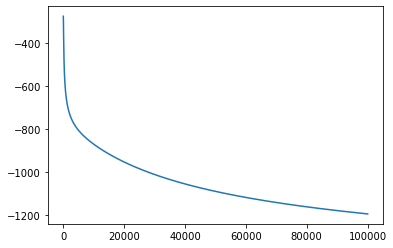

In [121]:
a.plot(loss)